In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from collections import defaultdict
from datetime import datetime
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [121]:
data = pd.read_excel("Retail.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"])

In [122]:
df1 = data["Year 2009-2010"]
df2 = data["Year 2010-2011"]

In [123]:
df1.shape, df2.shape

((525461, 8), (541910, 8))

In [124]:
sum([df1.shape[0], df2.shape[0]])

1067371

In [125]:
df = pd.concat([df1, df2])

In [126]:
df.shape

(1067371, 8)

In [127]:
df=df.sort_values(by = 'InvoiceDate').reset_index(drop = True)

In [128]:
df

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22555            PLASTERS IN TIN STRONGMAN        12   
1067367  581587     22556       PLASTERS IN TIN CIRCUS PARADE         12   
1067368  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067369  581587     22730           ALARM CLOCK BAKELIKE IVORY         4   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                     ...    ...          ...             ...  
1067366 2011-12-09 12:50:00   1.65      12680.0          France  
1067367 2011-12-09 12:50:00   1.65      12680.0          France  
1067368 2011-12-09 12:50:00   4.95      12680.0          France  
1067369 2011-12-09 12:50:00   3.75      12680.0          France  
1067370 2011-12-09 12:50:00  18.00      12680.0          France  

[1067371 rows x 8 columns]

In [129]:
# Get unique Countries
unique_values = df['Country'].unique()
value_counts = df['Country'].value_counts()
# Get the total number of unique countries
total_countries = len(unique_values)
# Print the total number of countries
print("Total number of unique countries:", total_countries)
print(unique_values)
print(value_counts)

Total number of unique countries: 43
['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 'Bahrain' 'RSA' 'Bermuda' 'Hong Kong' 'Singapore' 'Thailand' 'Israel'
 'Lithuania' 'West Indies' 'Lebanon' 'Korea' 'Brazil' 'Canada' 'Iceland'
 'Saudi Arabia' 'Czech Republic' 'European Community']
Country
United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finla

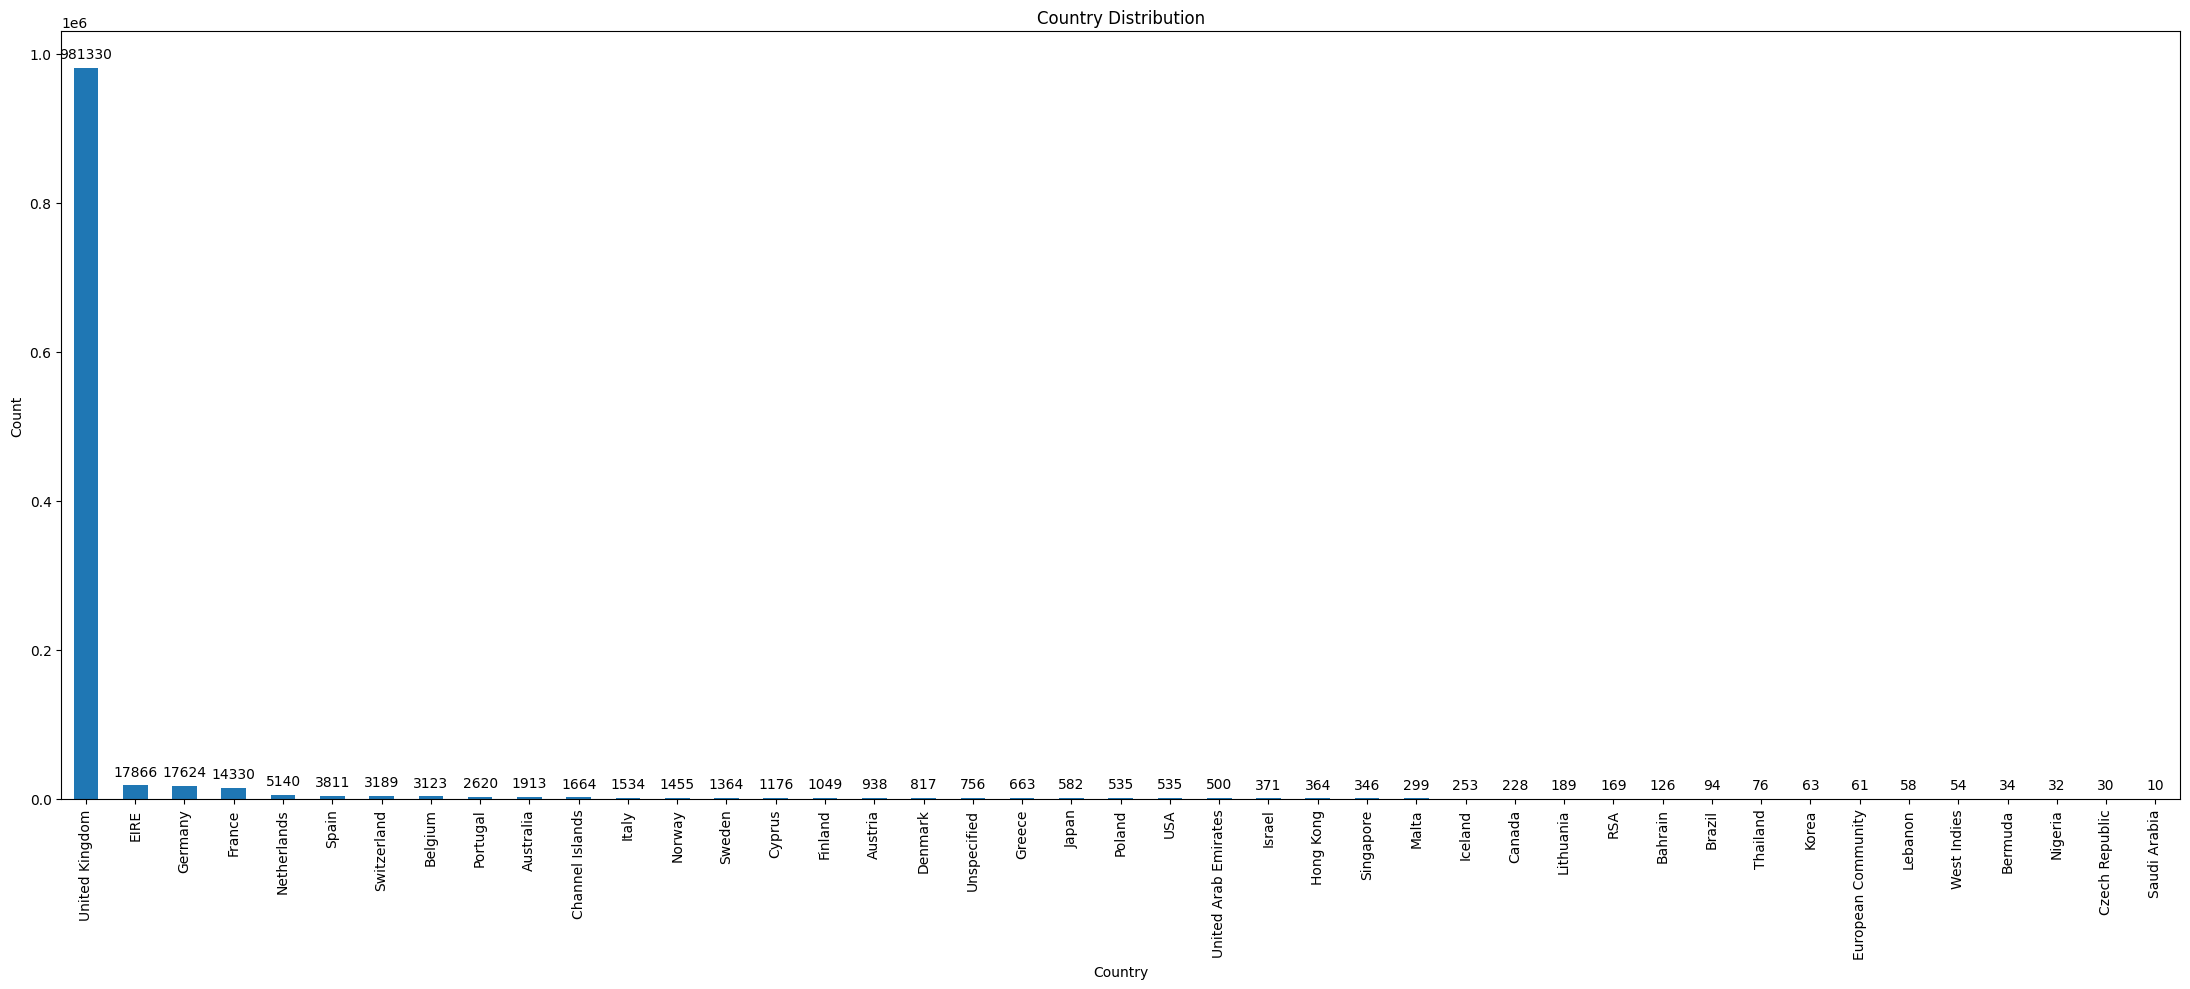

In [130]:
# Create a bar plot for the value counts of countries
plt.figure(figsize=(22, 10))  # Adjust the figure size as needed
ax = value_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Distribution')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()

In [131]:
print('The number of duplicate data records: ', df.sort_values(by = 'InvoiceDate').duplicated().sum())

The number of duplicate data records:  34335


In [132]:
# visually inspect some of the duplicated rows
duplicated = df[df.duplicated(keep = False)].sort_values(by = ['InvoiceDate','Invoice','StockCode'])
duplicated

Invoice StockCode                       Description  Quantity  \
370      489517     21491   SET OF THREE VINTAGE GIFT WRAPS         1   
398      489517     21491   SET OF THREE VINTAGE GIFT WRAPS         1   
366      489517     21821  GLITTER STAR GARLAND WITH BELLS          1   
385      489517     21821  GLITTER STAR GARLAND WITH BELLS          1   
373      489517     21912          VINTAGE SNAKES & LADDERS         1   
...         ...       ...                               ...       ...   
1067153  581538     23275  SET OF 3 HANGING OWLS OLLIE BEAK         1   
1067119  581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
1067152  581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
1067099  581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   
1067108  581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

                InvoiceDate  Price  Customer ID         Country  
370     2009-12-01 11:34:00   1.95      16329.0  United Kingdom  
398     2009-12-01 11:34:00   1.95      16329.0  United Kingdom  
366     2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
385     2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
373     2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
...                     ...    ...          ...             ...  
1067153 2011-12-09 11:34:00   1.25      14446.0  United Kingdom  
1067119 2011-12-09 11:34:00   2.49      14446.0  United Kingdom  
1067152 2011-12-09 11:34:00   2.49      14446.0  United Kingdom  
1067099 2011-12-09 11:34:00   2.08      14446.0  United Kingdom  
1067108 2011-12-09 11:34:00   2.08      14446.0  United Kingdom  

[67242 rows x 8 columns]

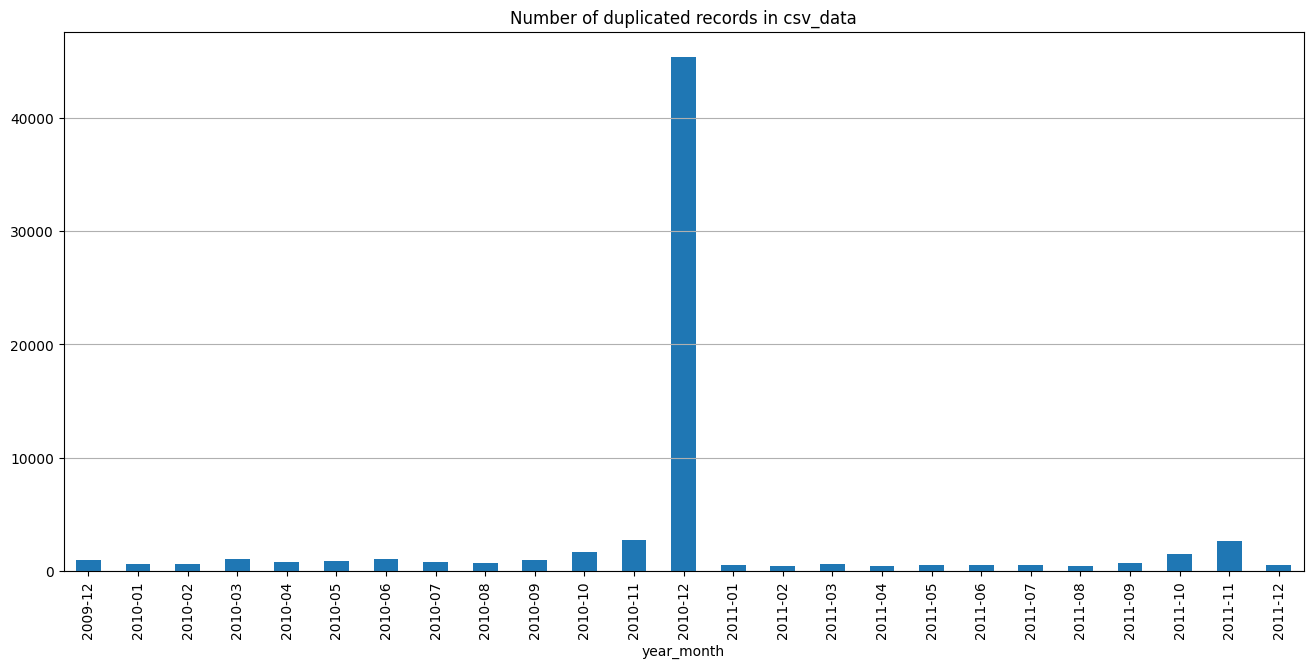

In [133]:
# Add year_month column to duplicated data
duplicated['year_month'] = duplicated['InvoiceDate'].dt.strftime('%Y-%m')

# Plot the number of duplicated records by year and month
plt.figure(figsize=(16,7))
duplicated['year_month'].value_counts(sort=False).plot.bar()
plt.title('Number of duplicated records in csv_data')
plt.grid(which='major', axis='y')
plt.show()


In [134]:
# There is an overlap in dates in the dataset, one reason for duplicates
df1_maxDate = df1['InvoiceDate'].max() # last date in first part of dataset
df2_minDate = df2['InvoiceDate'].min() # start date of the second part of the dataset
print('Final date in part1 of the dataset', df1_maxDate)
print('Start date of part2 of the dataset', df2_minDate)

Final date in part1 of the dataset 2010-12-09 20:01:00
Start date of part2 of the dataset 2010-12-01 08:26:00


In [135]:
# Solution to overlap
df = pd.concat(
    [df1[df1['InvoiceDate'] < df2_minDate],
     df2
    ])
df.shape

(1044848, 8)

In [136]:
print('The number of duplicate data records: ', df.sort_values(by = 'InvoiceDate').duplicated().sum())

The number of duplicate data records:  11812


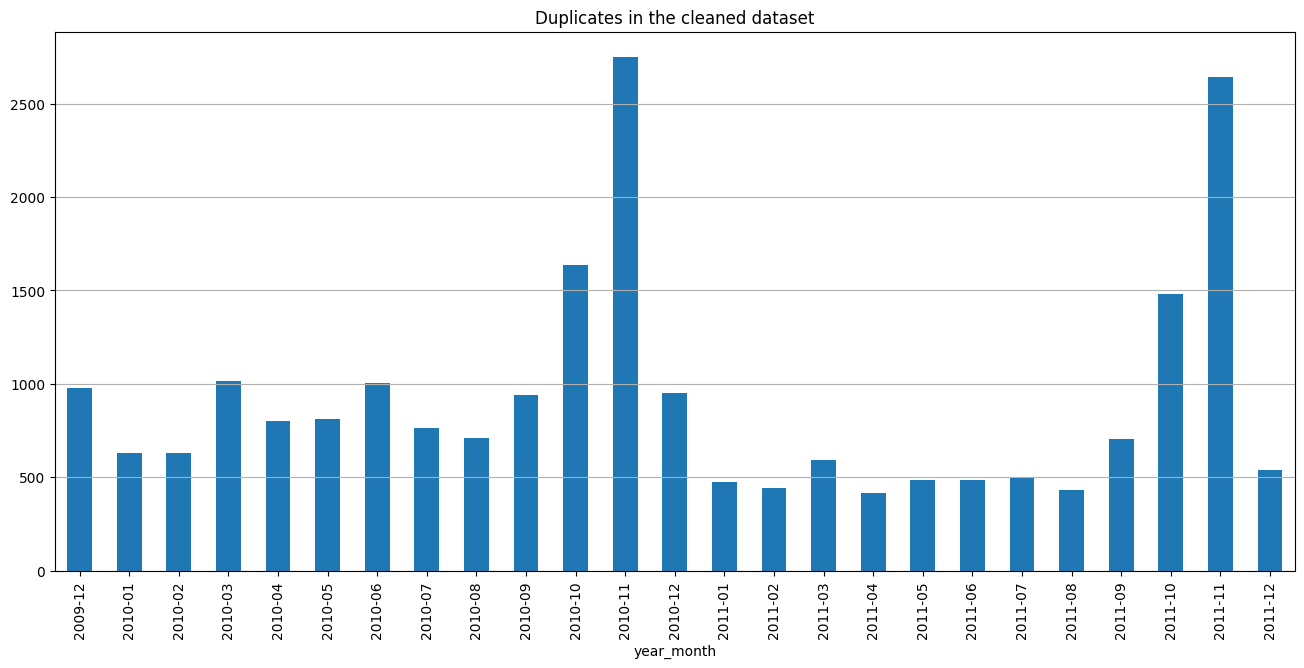

In [137]:
# New duplicated data graph
duplicated_df = df[df.duplicated(keep = False)].sort_values(by = ['InvoiceDate','Invoice','StockCode'])
# add year_month column to duplicated data
duplicated_df['year_month'] = duplicated_df['InvoiceDate'].dt.to_period('M')
plt.figure(figsize=(16,7))
duplicated_df['year_month'].value_counts(sort = False).plot.bar()
plt.title('Duplicates in the cleaned dataset')
plt.grid(which = 'major', axis = 'y')
plt.show()

In [138]:
# These are adjusted rows by someone to tally the data ith no Customer ID
# Extract rows where Invoice starts with 'A'
invoice_a_df = df[df['Invoice'].str.startswith('A', na=False)]

# Display the resulting DataFrame
invoice_a_df

Invoice StockCode      Description  Quantity         InvoiceDate  \
179403  A506401         B  Adjust bad debt         1 2010-04-29 13:36:00   
276274  A516228         B  Adjust bad debt         1 2010-07-19 11:24:00   
403472  A528059         B  Adjust bad debt         1 2010-10-20 12:04:00   
299982  A563185         B  Adjust bad debt         1 2011-08-12 14:50:00   
299983  A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984  A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

           Price  Customer ID         Country  
179403 -53594.36          NaN  United Kingdom  
276274 -44031.79          NaN  United Kingdom  
403472 -38925.87          NaN  United Kingdom  
299982  11062.06          NaN  United Kingdom  
299983 -11062.06          NaN  United Kingdom  
299984 -11062.06          NaN  United Kingdom

In [139]:
# These are cancelled/returned orders
# Extract rows where Invoice starts with 'C'
invoice_c_negdf = df[df['Invoice'].str.startswith('C', na=False)]

# Display the resulting DataFrame
invoice_c_negdf


Invoice StockCode                       Description  Quantity  \
178     C489449     22087          PAPER BUNTING WHITE LACE       -12   
179     C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180     C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181     C489449     21896                POTTING SHED TWINE        -6   
182     C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...         ...       ...                               ...       ...   
540449  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541  C581499         M                            Manual        -1   
541715  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate   Price  Customer ID         Country  
178    2009-12-01 10:33:00    2.95      16321.0       Australia  
179    2009-12-01 10:33:00    1.65      16321.0       Australia  
180    2009-12-01 10:33:00    4.25      16321.0       Australia  
181    2009-12-01 10:33:00    2.10      16321.0       Australia  
182    2009-12-01 10:33:00    2.95      16321.0       Australia  
...                    ...     ...          ...             ...  
540449 2011-12-09 09:57:00    0.83      14397.0  United Kingdom  
541541 2011-12-09 10:28:00  224.69      15498.0  United Kingdom  
541715 2011-12-09 11:57:00   10.95      15311.0  United Kingdom  
541716 2011-12-09 11:58:00    1.25      17315.0  United Kingdom  
541717 2011-12-09 11:58:00    1.25      17315.0  United Kingdom  

[19165 rows x 8 columns]

In [140]:
# Canceled order with positive quantity rather than negative like in previous code line
df[(df['Quantity'] > 0) & (df['Invoice'].str.contains('C', na = False))]

Invoice StockCode Description  Quantity         InvoiceDate   Price  \
76799  C496350         M      Manual         1 2010-02-01 08:24:00  373.57   

       Customer ID         Country  
76799          NaN  United Kingdom

In [141]:
df[df['Customer ID'] == 12346].tail()

Invoice StockCode                     Description  Quantity  \
255595  C514024         M                          Manual        -1   
370048  C525099         D                        Discount        -1   
371779  C525274   TEST001         This is a test product.        -1   
61619    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
61624   C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR    -74215   

               InvoiceDate   Price  Customer ID         Country  
255595 2010-06-30 11:22:00  142.31      12346.0  United Kingdom  
370048 2010-10-04 09:54:00    1.00      12346.0  United Kingdom  
371779 2010-10-04 16:33:00    4.50      12346.0  United Kingdom  
61619  2011-01-18 10:01:00    1.04      12346.0  United Kingdom  
61624  2011-01-18 10:17:00    1.04      12346.0  United Kingdom

In [142]:
print('The number of entries with negative quantinty', df[(df['Quantity'] < 0)].shape[0])

The number of entries with negative quantinty 22557


In [143]:
# Extract rows with NaN values into a new DataFrame
nan_df = df[df.isna().any(axis=1)]

# Display the DataFrame with NaN values
nan_df

Invoice StockCode                     Description  Quantity  \
263     489464     21733                    85123a mixed       -96   
283     489463     71477                           short      -240   
284     489467    85123A                     21733 mixed      -192   
470     489521     21646                             NaN       -50   
577     489525    85226C       BLUE PULL BACK RACING CAR         1   
...        ...       ...                             ...       ...   
541536  581498    85099B         JUMBO BAG RED RETROSPOT         5   
541537  581498    85099C  JUMBO  BAG BAROQUE BLACK WHITE         4   
541538  581498     85150   LADIES & GENTLEMEN METAL SIGN         1   
541539  581498     85174               S/4 CACTI CANDLES         1   
541540  581498       DOT                  DOTCOM POSTAGE         1   

               InvoiceDate    Price  Customer ID         Country  
263    2009-12-01 10:52:00     0.00          NaN  United Kingdom  
283    2009-12-01 10:52:00     0.00          NaN  United Kingdom  
284    2009-12-01 10:53:00     0.00          NaN  United Kingdom  
470    2009-12-01 11:44:00     0.00          NaN  United Kingdom  
577    2009-12-01 11:49:00     0.55          NaN  United Kingdom  
...                    ...      ...          ...             ...  
541536 2011-12-09 10:26:00     4.13          NaN  United Kingdom  
541537 2011-12-09 10:26:00     4.13          NaN  United Kingdom  
541538 2011-12-09 10:26:00     4.96          NaN  United Kingdom  
541539 2011-12-09 10:26:00    10.79          NaN  United Kingdom  
541540 2011-12-09 10:26:00  1714.17          NaN  United Kingdom  

[235287 rows x 8 columns]

In [144]:
# Get unique values of a column
unique_values = nan_df['Country'].unique()
value_counts = nan_df['Country'].value_counts()
# Get the total number of unique countries for nan customer ID
total_countries = len(unique_values)
# Print the total number of countries
print("Total number of unique countries:", total_countries)
print(unique_values)
print(value_counts)

Total number of unique countries: 15
['United Kingdom' 'Nigeria' 'EIRE' 'Bahrain' 'United Arab Emirates'
 'Bermuda' 'Sweden' 'France' 'Hong Kong' 'Lebanon' 'RSA' 'Unspecified'
 'Portugal' 'Israel' 'Switzerland']
Country
United Kingdom          232320
EIRE                      1660
Hong Kong                  364
Unspecified                232
France                     128
Switzerland                125
Portugal                   116
United Arab Emirates       114
Bahrain                     67
Israel                      47
RSA                         46
Bermuda                     34
Sweden                      19
Lebanon                     13
Nigeria                      2
Name: count, dtype: int64


In [145]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235287
Country             0
dtype: int64

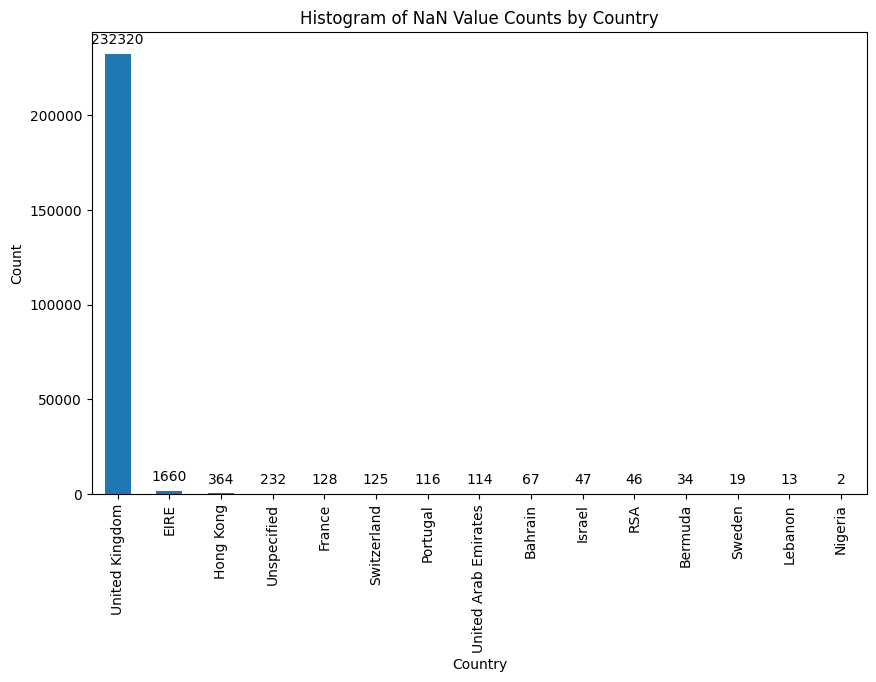

In [146]:
# Get the value counts of the 'Country' column from the DataFrame with NaN values
value_counts = nan_df['Country'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = value_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Country')

plt.ylabel('Count')
plt.title('Histogram of NaN Value Counts by Country')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [147]:
# Extract rows where StockCode starts with 'B'
invoice_sa_df = df[df['StockCode'].str.startswith('B', na=False)]

# Display the resulting DataFrame
invoice_sa_df

Invoice     StockCode    Description  Quantity         InvoiceDate  \
18410   C490943  BANK CHARGES   Bank Charges        -1 2009-12-08 14:08:00   
18466    490948  BANK CHARGES   Bank Charges         1 2009-12-08 14:29:00   
33435   C492206  BANK CHARGES   Bank Charges        -1 2009-12-15 16:32:00   
55948   C494438  BANK CHARGES   Bank Charges        -1 2010-01-14 12:15:00   
94431    498269  BANK CHARGES   Bank Charges         1 2010-02-17 15:03:00   
...         ...           ...            ...       ...                 ...   
440745   574546  BANK CHARGES   Bank Charges         1 2011-11-04 14:59:00   
481152  C577342  BANK CHARGES   Bank Charges        -1 2011-11-18 15:11:00   
481153  C577343  BANK CHARGES   Bank Charges        -1 2011-11-18 15:13:00   
506357   579137  BANK CHARGES   Bank Charges         1 2011-11-28 12:51:00   
534008   581127  BANK CHARGES   Bank Charges         1 2011-12-07 12:45:00   

         Price  Customer ID         Country  
18410    15.00      16703.0  United Kingdom  
18466    15.00      16805.0  United Kingdom  
33435   848.43          NaN  United Kingdom  
55948   767.99          NaN  United Kingdom  
94431    15.00      16928.0  United Kingdom  
...        ...          ...             ...  
440745   15.00      13651.0  United Kingdom  
481152  490.06          NaN  United Kingdom  
481153   27.21          NaN  United Kingdom  
506357   15.00      14704.0  United Kingdom  
534008   15.00      16271.0  United Kingdom  

[106 rows x 8 columns]

In [148]:
# Customer with only negative quantity and no purchase history
df[df['Customer ID'] == 16703].tail()

Invoice     StockCode    Description  Quantity         InvoiceDate  \
18410  C490943  BANK CHARGES   Bank Charges        -1 2009-12-08 14:08:00   

       Price  Customer ID         Country  
18410   15.0      16703.0  United Kingdom

In [149]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [150]:
# Group by Customer ID and filter customers with negative quantities
negative_quantity_df = df[df['Quantity'] < 0]

negative_quantity_df

Invoice StockCode                       Description  Quantity  \
178     C489449     22087          PAPER BUNTING WHITE LACE       -12   
179     C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180     C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181     C489449     21896                POTTING SHED TWINE        -6   
182     C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...         ...       ...                               ...       ...   
540449  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541  C581499         M                            Manual        -1   
541715  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate   Price  Customer ID         Country  
178    2009-12-01 10:33:00    2.95      16321.0       Australia  
179    2009-12-01 10:33:00    1.65      16321.0       Australia  
180    2009-12-01 10:33:00    4.25      16321.0       Australia  
181    2009-12-01 10:33:00    2.10      16321.0       Australia  
182    2009-12-01 10:33:00    2.95      16321.0       Australia  
...                    ...     ...          ...             ...  
540449 2011-12-09 09:57:00    0.83      14397.0  United Kingdom  
541541 2011-12-09 10:28:00  224.69      15498.0  United Kingdom  
541715 2011-12-09 11:57:00   10.95      15311.0  United Kingdom  
541716 2011-12-09 11:58:00    1.25      17315.0  United Kingdom  
541717 2011-12-09 11:58:00    1.25      17315.0  United Kingdom  

[22557 rows x 8 columns]

In [151]:
# Check if customers with negative quantities have no positive quantity values in their history
customers_with_no_positive_history = negative_quantity_df[
    ~negative_quantity_df['Customer ID'].isin(df[df['Quantity'] > 0]['Customer ID'])
]

# Display the resulting DataFrame
customers_with_no_positive_history

Invoice StockCode                          Description  Quantity  \
1134    C489551     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        -1   
2724    C489610     21364             PEACE SMALL WOOD LETTERS        -1   
2725    C489610     22164          STRING OF STARS CARD HOLDER        -1   
2726    C489610     21892   TRADITIONAL WOODEN CATCH CUP GAME         -3   
2727    C489610     20682           RED SPOTTY CHILDS UMBRELLA        -1   
...         ...       ...                                  ...       ...   
394911  C527332         M                               Manual        -1   
462994  C533099     22890   NOVELTY BISCUITS CAKE STAND 3 TIER        -1   
462995  C533099     21843             RED RETROSPOT CAKE STAND        -1   
462996  C533099     22840           ROUND CAKE TIN VINTAGE RED        -1   
4886    C536818     84947    ANTIQUE SILVER TEA GLASS ENGRAVED        -1   

               InvoiceDate   Price  Customer ID         Country  
1134   2009-12-01 12:35:00    6.95      17641.0  United Kingdom  
2724   2009-12-01 14:52:00    6.75      17485.0  United Kingdom  
2725   2009-12-01 14:52:00    2.95      17485.0  United Kingdom  
2726   2009-12-01 14:52:00    1.25      17485.0  United Kingdom  
2727   2009-12-01 14:52:00    3.25      17485.0  United Kingdom  
...                    ...     ...          ...             ...  
394911 2010-10-15 15:25:00  530.31      14781.0  United Kingdom  
462994 2010-11-16 11:14:00    9.95      13353.0  United Kingdom  
462995 2010-11-16 11:14:00   10.95      13353.0  United Kingdom  
462996 2010-11-16 11:14:00    7.95      13353.0  United Kingdom  
4886   2010-12-02 17:09:00    1.25      16995.0  United Kingdom  

[128 rows x 8 columns]

In [152]:
# Get unique customer IDs in customers_with_no_positive_history
unique_customers = customers_with_no_positive_history['Customer ID'].unique()


In [153]:
len(unique_customers)

61

In [154]:
customers_with_no_positive_history[customers_with_no_positive_history['Customer ID'] == 12346].tail()

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044848 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1044848 non-null  object        
 1   StockCode    1044848 non-null  object        
 2   Description  1040573 non-null  object        
 3   Quantity     1044848 non-null  int64         
 4   InvoiceDate  1044848 non-null  datetime64[ns]
 5   Price        1044848 non-null  float64       
 6   Customer ID  809561 non-null   float64       
 7   Country      1044848 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 71.7+ MB


In [156]:
df_l = df.dropna(subset=["Customer ID"])
df_l

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
541905 2011-12-09 12:50:00   2.10      12680.0          France  
541906 2011-12-09 12:50:00   4.15      12680.0          France  
541907 2011-12-09 12:50:00   4.15      12680.0          France  
541908 2011-12-09 12:50:00   4.95      12680.0          France  
541909 2011-12-09 12:50:00  18.00      12680.0          France  

[809561 rows x 8 columns]

In [157]:
# Check if customers with negative quantities have no positive quantity values in their history
customers_with_no_positive_history = df_l[
    ~df_l['Customer ID'].isin(df_l[df_l['Quantity'] > 0]['Customer ID'])
]

# Display the resulting DataFrame
customers_with_no_positive_history

Invoice StockCode                          Description  Quantity  \
1134    C489551     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        -1   
2724    C489610     21364             PEACE SMALL WOOD LETTERS        -1   
2725    C489610     22164          STRING OF STARS CARD HOLDER        -1   
2726    C489610     21892   TRADITIONAL WOODEN CATCH CUP GAME         -3   
2727    C489610     20682           RED SPOTTY CHILDS UMBRELLA        -1   
...         ...       ...                                  ...       ...   
394911  C527332         M                               Manual        -1   
462994  C533099     22890   NOVELTY BISCUITS CAKE STAND 3 TIER        -1   
462995  C533099     21843             RED RETROSPOT CAKE STAND        -1   
462996  C533099     22840           ROUND CAKE TIN VINTAGE RED        -1   
4886    C536818     84947    ANTIQUE SILVER TEA GLASS ENGRAVED        -1   

               InvoiceDate   Price  Customer ID         Country  
1134   2009-12-01 12:35:00    6.95      17641.0  United Kingdom  
2724   2009-12-01 14:52:00    6.75      17485.0  United Kingdom  
2725   2009-12-01 14:52:00    2.95      17485.0  United Kingdom  
2726   2009-12-01 14:52:00    1.25      17485.0  United Kingdom  
2727   2009-12-01 14:52:00    3.25      17485.0  United Kingdom  
...                    ...     ...          ...             ...  
394911 2010-10-15 15:25:00  530.31      14781.0  United Kingdom  
462994 2010-11-16 11:14:00    9.95      13353.0  United Kingdom  
462995 2010-11-16 11:14:00   10.95      13353.0  United Kingdom  
462996 2010-11-16 11:14:00    7.95      13353.0  United Kingdom  
4886   2010-12-02 17:09:00    1.25      16995.0  United Kingdom  

[128 rows x 8 columns]

In [158]:
customers_with_no_positive_history[customers_with_no_positive_history['Quantity']>0]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

In [159]:
customers_with_no_positive_history[customers_with_no_positive_history['Customer ID'] == 17641]

Invoice StockCode                          Description  Quantity  \
1134  C489551     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        -1   

             InvoiceDate  Price  Customer ID         Country  
1134 2009-12-01 12:35:00   6.95      17641.0  United Kingdom

In [160]:
df_l[df_l['Customer ID'] == 17641]

Invoice StockCode                          Description  Quantity  \
1134  C489551     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        -1   

             InvoiceDate  Price  Customer ID         Country  
1134 2009-12-01 12:35:00   6.95      17641.0  United Kingdom

In [161]:
df_l.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [162]:
# Filter out customers with no positive history from df_l
df_l_clean = df_l[~df_l['Customer ID'].isin(customers_with_no_positive_history['Customer ID'])]

In [163]:
# Display the cleaned DataFrame
df_l_clean

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
541905 2011-12-09 12:50:00   2.10      12680.0          France  
541906 2011-12-09 12:50:00   4.15      12680.0          France  
541907 2011-12-09 12:50:00   4.15      12680.0          France  
541908 2011-12-09 12:50:00   4.95      12680.0          France  
541909 2011-12-09 12:50:00  18.00      12680.0          France  

[809433 rows x 8 columns]

In [164]:
df_final = df_l_clean.copy()

In [165]:
df_final

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
541905 2011-12-09 12:50:00   2.10      12680.0          France  
541906 2011-12-09 12:50:00   4.15      12680.0          France  
541907 2011-12-09 12:50:00   4.15      12680.0          France  
541908 2011-12-09 12:50:00   4.95      12680.0          France  
541909 2011-12-09 12:50:00  18.00      12680.0          France  

[809433 rows x 8 columns]

In [166]:
df_final[df_final['Customer ID'] == 17641]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

The number of duplicate data records:  11676


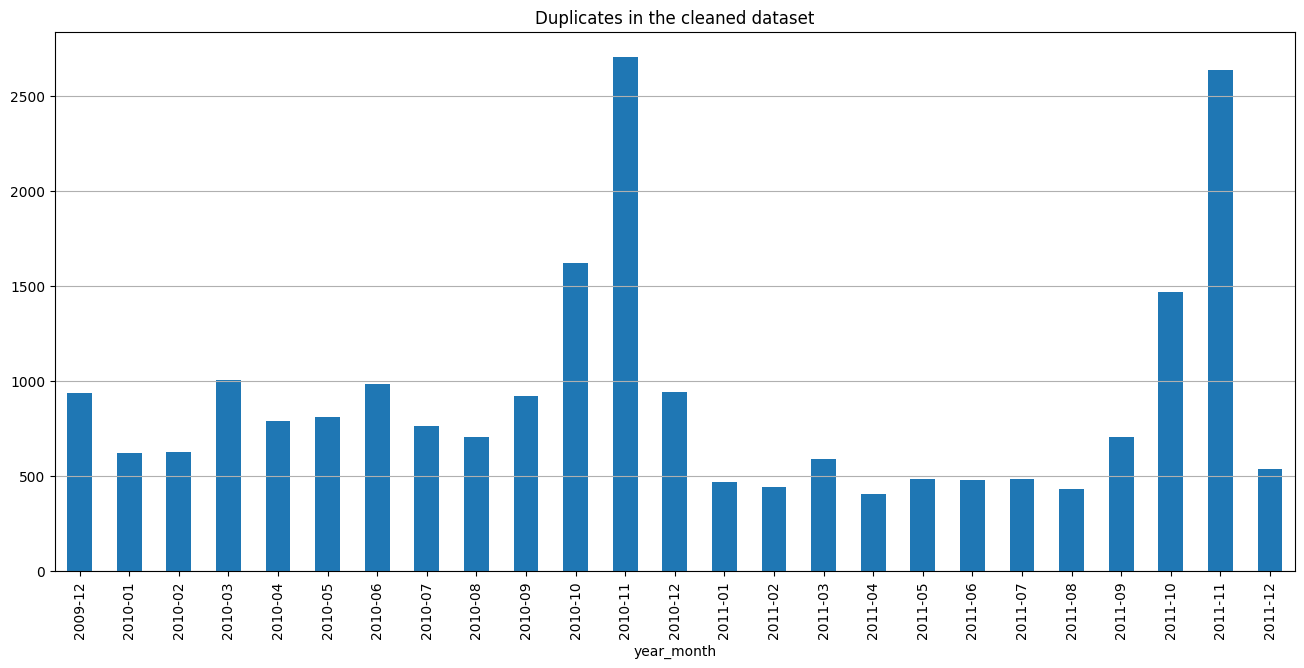

In [167]:
# Duplicates in Final
print('The number of duplicate data records: ', df_final.sort_values(by = 'InvoiceDate').duplicated().sum())
duplicated_df = df_final[df_final.duplicated(keep = False)].sort_values(by = ['InvoiceDate','Invoice','StockCode'])
# add year_month column to duplicated data
duplicated_df['year_month'] = duplicated_df['InvoiceDate'].dt.to_period('M')
plt.figure(figsize=(16,7))
duplicated_df['year_month'].value_counts(sort = False).plot.bar()
plt.title('Duplicates in the cleaned dataset')
plt.grid(which = 'major', axis = 'y')
plt.show()

In [168]:
df_final[df_final['StockCode'].str.startswith('B', na=False)]

Invoice     StockCode    Description  Quantity         InvoiceDate  \
18466    490948  BANK CHARGES   Bank Charges         1 2009-12-08 14:29:00   
94431    498269  BANK CHARGES   Bank Charges         1 2010-02-17 15:03:00   
148098   503497  BANK CHARGES   Bank Charges         1 2010-04-01 12:07:00   
149063  C503571  BANK CHARGES   Bank Charges        -1 2010-04-01 15:45:00   
153573   503960  BANK CHARGES   Bank Charges         1 2010-04-08 16:50:00   
167424   505204  BANK CHARGES   Bank Charges         1 2010-04-20 16:24:00   
206572   509375  BANK CHARGES   Bank Charges         1 2010-05-21 14:40:00   
210149   509669  BANK CHARGES   Bank Charges         1 2010-05-25 12:03:00   
231102   511774  BANK CHARGES   Bank Charges         1 2010-06-10 12:16:00   
240612   512658  BANK CHARGES   Bank Charges         1 2010-06-17 11:24:00   
272460   515845  BANK CHARGES   Bank Charges         1 2010-07-15 11:21:00   
272462   515855  BANK CHARGES   Bank Charges         1 2010-07-15 11:24:00   
290258   517648  BANK CHARGES   Bank Charges         1 2010-07-30 13:52:00   
290308   517652  BANK CHARGES   Bank Charges         1 2010-07-30 14:07:00   
300726   518666  BANK CHARGES   Bank Charges         1 2010-08-10 14:45:00   
300727   518667  BANK CHARGES   Bank Charges         1 2010-08-10 14:47:00   
331934   521809  BANK CHARGES   Bank Charges         1 2010-09-08 14:33:00   
332015   521812  BANK CHARGES   Bank Charges         1 2010-09-08 15:00:00   
343556  C522928  BANK CHARGES   Bank Charges        -1 2010-09-17 14:37:00   
378012  C525876  BANK CHARGES   Bank Charges        -1 2010-10-07 14:12:00   
378780  C525914  BANK CHARGES   Bank Charges        -1 2010-10-07 16:14:00   
455268   532637  BANK CHARGES   Bank Charges         1 2010-11-12 16:18:00   
493162   535474  BANK CHARGES   Bank Charges         1 2010-11-26 13:56:00   
4406     536779  BANK CHARGES   Bank Charges         1 2010-12-02 15:08:00   
62508    541505  BANK CHARGES   Bank Charges         1 2011-01-18 15:58:00   
152966   549717  BANK CHARGES   Bank Charges         1 2011-04-11 14:56:00   
175275   551945  BANK CHARGES   Bank Charges         1 2011-05-05 11:09:00   
327921   565735  BANK CHARGES   Bank Charges         1 2011-09-06 12:25:00   
361740   568375  BANK CHARGES   Bank Charges         1 2011-09-26 17:01:00   
361741   568375  BANK CHARGES   Bank Charges         1 2011-09-26 17:01:00   
407618   571900  BANK CHARGES   Bank Charges         1 2011-10-19 14:26:00   
431363   573586  BANK CHARGES   Bank Charges         1 2011-10-31 14:48:00   
440745   574546  BANK CHARGES   Bank Charges         1 2011-11-04 14:59:00   
506357   579137  BANK CHARGES   Bank Charges         1 2011-11-28 12:51:00   
534008   581127  BANK CHARGES   Bank Charges         1 2011-12-07 12:45:00   

         Price  Customer ID         Country  
18466   15.000      16805.0  United Kingdom  
94431   15.000      16928.0  United Kingdom  
148098  15.000      17539.0  United Kingdom  
149063  15.000      17539.0  United Kingdom  
153573  15.000      12843.0  United Kingdom  
167424  15.000      17448.0  United Kingdom  
206572  15.000      17448.0  United Kingdom  
210149  15.000      17448.0  United Kingdom  
231102  15.000      17032.0  United Kingdom  
240612  15.000      14085.0  United Kingdom  
272460  15.000      14606.0  United Kingdom  
272462  15.000      17448.0  United Kingdom  
290258  15.000      14606.0  United Kingdom  
290308  15.000      17448.0  United Kingdom  
300726  15.000      14606.0  United Kingdom  
300727  15.000      14606.0  United Kingdom  
331934  15.000      14911.0            EIRE  
332015  15.000      16271.0  United Kingdom  
343556  15.000      17032.0  United Kingdom  
378012  15.000      13776.0  United Kingdom  
378780  45.000      13776.0  United Kingdom  
455268  15.000      13174.0  United Kingdom  
493162  15.000      16928.0  United Kingdom  
4406    15.000      15823.0  United Kingdom  
62508   15.000      15939.0  United Kingdom  
152

In [169]:
customer  = df_final[df_final['Customer ID'] == 16805]

In [170]:
customer[customer['StockCode'].str.startswith('B', na=False)]

Invoice     StockCode    Description  Quantity         InvoiceDate  \
18466  490948  BANK CHARGES   Bank Charges         1 2009-12-08 14:29:00   

       Price  Customer ID         Country  
18466   15.0      16805.0  United Kingdom

In [171]:
df_final[df_final['StockCode'].str.startswith('T', na=False)]

Invoice StockCode              Description  Quantity  \
27994    491725   TEST001  This is a test product.        10   
28251    491742   TEST001  This is a test product.         5   
28254    491744   TEST001  This is a test product.         5   
39398    492718   TEST001  This is a test product.         5   
39411    492722   TEST002  This is a test product.         1   
45228    493410   TEST001  This is a test product.         5   
45230    493412   TEST001  This is a test product.         5   
56117    494450   TEST001  This is a test product.         5   
66084    495295   TEST001  This is a test product.         5   
89084    497819   TEST001  This is a test product.         5   
89180    497843   TEST001  This is a test product.         5   
156017   504188   TEST001  This is a test product.         5   
371777  C525272   TEST001  This is a test product.        -1   
371778  C525273   TEST001  This is a test product.        -1   
371779  C525274   TEST001  This is a test product.        -1   
371780  C525275   TEST001  This is a test product.        -2   

               InvoiceDate  Price  Customer ID         Country  
27994  2009-12-14 08:34:00    4.5      12346.0  United Kingdom  
28251  2009-12-14 11:00:00    4.5      12346.0  United Kingdom  
28254  2009-12-14 11:02:00    4.5      12346.0  United Kingdom  
39398  2009-12-18 10:47:00    4.5      12346.0  United Kingdom  
39411  2009-12-18 10:55:00    1.0      12346.0  United Kingdom  
45228  2010-01-04 09:24:00    4.5      12346.0  United Kingdom  
45230  2010-01-04 09:53:00    4.5      12346.0  United Kingdom  
56117  2010-01-14 13:50:00    4.5      12346.0  United Kingdom  
66084  2010-01-22 13:30:00    4.5      12346.0  United Kingdom  
89084  2010-02-12 14:58:00    0.0      14103.0  United Kingdom  
89180  2010-02-12 15:47:00    0.0      14827.0  United Kingdom  
156017 2010-04-12 09:52:00    4.5      16454.0  United Kingdom  
371777 2010-10-04 16:29:00    4.5      16454.0  United Kingdom  
371778 2010-10-04 16:30:00    4.5      16454.0  United Kingdom  
371779 2010-10-04 16:33:00    4.5      12346.0  United Kingdom  
371780 2010-10-04 16:38:00    4.5      16446.0  United Kingdom

In [172]:
# Get unique values of 'StockCode'
unique_stockcodes = df_final['StockCode'].unique()

# Get unique values of 'Description'
unique_descriptions = df_final['Description'].unique()

In [173]:
# Ensure that 'Invoice' is a string before applying the lambda function
df_final['Invoice'] = df_final['Invoice'].astype(str)

# Get unique types of 'Invoice' (for example, if invoices start with different letters like 'A', 'C', etc.)
unique_invoice_types = df_final['Invoice'].apply(lambda x: x[0]).unique()

# Convert the 'Invoice' column back to object type
df_final['Invoice'] = df_final['Invoice'].astype(object)

In [174]:
len(unique_stockcodes)

4643

In [175]:
len(unique_descriptions)

5296

In [176]:
len(unique_invoice_types)

3

In [177]:
print(unique_invoice_types)

['4' 'C' '5']


In [178]:
# Convert unique_descriptions to a DataFrame for easier viewing
unique_descriptions_df = pd.DataFrame(unique_descriptions, columns=['Description'])

# Set the display option to show all rows
#pd.set_option('display.max_rows', None)

# Display the DataFrame
unique_descriptions_df

Description
0     15CM CHRISTMAS GLASS BALL 20 LIGHTS
1                      PINK CHERRY LIGHTS
2                     WHITE CHERRY LIGHTS
3            RECORD FRAME 7" SINGLE SIZE 
4          STRAWBERRY CERAMIC TRINKET BOX
...                                   ...
5291        GIN AND TONIC DIET METAL SIGN
5292               SET OF 6 RIBBONS PARTY
5293      SILVER AND BLACK ORBIT NECKLACE
5294   CREAM HANGING HEART T-LIGHT HOLDER
5295          PAPER CRAFT , LITTLE BIRDIE

[5296 rows x 1 columns]

In [179]:
df_final[df_final["Description"] == "Discount"]

Invoice StockCode Description  Quantity         InvoiceDate  Price  \
735     C489535         D    Discount        -1 2009-12-01 12:11:00   9.00   
736     C489535         D    Discount        -1 2009-12-01 12:11:00  19.00   
24675   C491428         D    Discount        -1 2009-12-10 20:23:00   9.10   
29958   C491962         D    Discount        -1 2009-12-14 16:38:00   0.59   
39127   C492693         D    Discount        -1 2009-12-17 18:47:00   6.85   
...         ...       ...         ...       ...                 ...    ...   
479868  C577227         D    Discount        -1 2011-11-18 12:06:00  19.82   
479869  C577227         D    Discount        -1 2011-11-18 12:06:00  16.76   
493613  C578239         D    Discount        -1 2011-11-23 12:29:00  26.33   
516221  C579884         D    Discount        -1 2011-11-30 17:34:00  20.53   
516455  C579908         D    Discount        -1 2011-12-01 08:49:00  28.68   

        Customer ID         Country  
735         15299.0  United Kingdom  
736         15299.0  United Kingdom  
24675       15494.0  United Kingdom  
29958       13206.0  United Kingdom  
39127       13408.0  United Kingdom  
...             ...             ...  
479868      14527.0  United Kingdom  
479869      14527.0  United Kingdom  
493613      14912.0           Italy  
516221      14527.0  United Kingdom  
516455      14527.0  United Kingdom  

[170 rows x 8 columns]

In [180]:
df_final[(df_final["Description"] == "Discount") & (df_final["Quantity"] > 0)]

Invoice StockCode Description  Quantity         InvoiceDate   Price  \
160443  504700         D    Discount         1 2010-04-15 18:08:00   57.63   
212633  509979         D    Discount         1 2010-05-26 14:07:00  101.99   
312285  519808         D    Discount       192 2010-08-20 12:50:00    1.00   
494226  535657         D    Discount         1 2010-11-28 11:20:00   13.98   
501237  536158         D    Discount         1 2010-11-30 11:57:00   32.29   

        Customer ID         Country  
160443      17032.0  United Kingdom  
212633      12843.0  United Kingdom  
312285      16422.0  United Kingdom  
494226      14527.0  United Kingdom  
501237      13634.0  United Kingdom

In [181]:
df_final[(df_final["Description"] == "Discount") & (~df_final["Invoice"].str.contains('C', na=False))]

Invoice StockCode Description  Quantity         InvoiceDate   Price  \
160443  504700         D    Discount         1 2010-04-15 18:08:00   57.63   
212633  509979         D    Discount         1 2010-05-26 14:07:00  101.99   
312285  519808         D    Discount       192 2010-08-20 12:50:00    1.00   
494226  535657         D    Discount         1 2010-11-28 11:20:00   13.98   
501237  536158         D    Discount         1 2010-11-30 11:57:00   32.29   

        Customer ID         Country  
160443      17032.0  United Kingdom  
212633      12843.0  United Kingdom  
312285      16422.0  United Kingdom  
494226      14527.0  United Kingdom  
501237      13634.0  United Kingdom

In [182]:
df_final[(df_final['Customer ID'] == 16422)&(df_final["Description"]=="Discount")]

Invoice StockCode Description  Quantity         InvoiceDate  Price  \
285954  C517231         D    Discount      -120 2010-07-27 13:34:00   0.27   
286414  C517262         D    Discount        -1 2010-07-27 17:22:00   6.00   
312284  C519807         D    Discount      -192 2010-08-20 12:48:00   1.00   
312285   519808         D    Discount       192 2010-08-20 12:50:00   1.00   
312286  C519809         D    Discount      -192 2010-08-20 12:51:00   0.01   
386471  C526537         D    Discount        -1 2010-10-12 11:29:00   3.39   
31134   C538897         D    Discount        -1 2010-12-15 09:14:00   5.76   
31135   C538897         D    Discount        -1 2010-12-15 09:14:00  42.50   
108088  C545478         D    Discount      -720 2011-03-03 11:08:00   0.01   
320704  C565078         D    Discount        -1 2011-08-31 17:45:00  57.60   

        Customer ID         Country  
285954      16422.0  United Kingdom  
286414      16422.0  United Kingdom  
312284      16422.0  United Kingdom  
312285      16422.0  United Kingdom  
312286      16422.0  United Kingdom  
386471      16422.0  United Kingdom  
31134       16422.0  United Kingdom  
31135       16422.0  United Kingdom  
108088      16422.0  United Kingdom  
320704      16422.0  United Kingdom

In [183]:
df_final[df_final["Invoice"]=="C526537"]

Invoice StockCode Description  Quantity         InvoiceDate  Price  \
386471  C526537         D    Discount        -1 2010-10-12 11:29:00   3.39   

        Customer ID         Country  
386471      16422.0  United Kingdom

In [184]:
#pd.reset_option('display.max_rows')
df_final[df_final['Customer ID'] == 16422]

Invoice StockCode                          Description  Quantity  \
1760    C489587     21639        ASSORTED TUTTI FRUTTI KEYRING        -5   
52785    494216     17003                  BROCADE RING PURSE        720   
52786    494216     20975     12 PENCILS SMALL TUBE RED SPOTTY        96   
52787    494216    47590B          PINK HAPPY BIRTHDAY BUNTING        50   
67035    495359     20676                      RED SPOTTY BOWL        72   
...         ...       ...                                  ...       ...   
489993   578035     20975  12 PENCILS SMALL TUBE RED RETROSPOT        24   
489994   578035     21326     AGED GLASS SILVER T-LIGHT HOLDER        96   
489995   578035     22152             PLACE SETTING WHITE STAR       192   
489996   578035     22333    RETROSPOT PARTY BAG + STICKER SET        48   
489997   578035     21380        WOODEN HAPPY BIRTHDAY GARLAND        12   

               InvoiceDate  Price  Customer ID         Country  
1760   2009-12-01 13:52:00   0.85      16422.0  United Kingdom  
52785  2010-01-12 11:57:00   0.21      16422.0  United Kingdom  
52786  2010-01-12 11:57:00   0.65      16422.0  United Kingdom  
52787  2010-01-12 11:57:00   4.65      16422.0  United Kingdom  
67035  2010-01-24 11:58:00   1.06      16422.0  United Kingdom  
...                    ...    ...          ...             ...  
489993 2011-11-22 14:00:00   0.65      16422.0  United Kingdom  
489994 2011-11-22 14:00:00   0.65      16422.0  United Kingdom  
489995 2011-11-22 14:00:00   0.42      16422.0  United Kingdom  
489996 2011-11-22 14:00:00   1.45      16422.0  United Kingdom  
489997 2011-11-22 14:00:00   2.95      16422.0  United Kingdom  

[748 rows x 8 columns]

In [185]:
df_final[df_final["Description"]=="Manual"]

Invoice StockCode Description  Quantity         InvoiceDate    Price  \
3053    C489651         M      Manual        -1 2009-12-01 16:48:00     5.10   
9259    C490126         M      Manual        -1 2009-12-03 18:12:00     5.95   
9307    C490129         M      Manual        -1 2009-12-03 18:26:00  1998.49   
11310    490300         M      Manual         1 2009-12-04 14:19:00     0.85   
11311    490300         M      Manual         1 2009-12-04 14:19:00     0.21   
...         ...       ...         ...       ...                 ...      ...   
531432   580956         M      Manual         4 2011-12-06 14:23:00     1.25   
533082  C581009         M      Manual        -1 2011-12-07 09:15:00   125.00   
534308  C581145         M      Manual        -1 2011-12-07 13:48:00     9.95   
538321   581405         M      Manual         3 2011-12-08 13:50:00     0.42   
541541  C581499         M      Manual        -1 2011-12-09 10:28:00   224.69   

        Customer ID         Country  
3053        17804.0  United Kingdom  
9259        15884.0  United Kingdom  
9307        15482.0  United Kingdom  
11310       12970.0  United Kingdom  
11311       12970.0  United Kingdom  
...             ...             ...  
531432      17841.0  United Kingdom  
533082      16971.0  United Kingdom  
534308      17490.0  United Kingdom  
538321      13521.0  United Kingdom  
541541      15498.0  United Kingdom  

[1066 rows x 8 columns]

In [186]:
df_final[(df_final["Customer ID"]==15482)&(df_final["Description"]=="Manual")]

Invoice StockCode Description  Quantity         InvoiceDate    Price  \
9307    C490129         M      Manual        -1 2009-12-03 18:26:00  1998.49   
397313   571179         M      Manual         1 2011-10-14 10:42:00    40.00   

        Customer ID         Country  
9307        15482.0  United Kingdom  
397313      15482.0  United Kingdom

In [187]:
df_final[(df_final["Description"]=="Manual")&(df_final["Quantity"]<0)]

Invoice StockCode Description  Quantity         InvoiceDate    Price  \
3053    C489651         M      Manual        -1 2009-12-01 16:48:00     5.10   
9259    C490126         M      Manual        -1 2009-12-03 18:12:00     5.95   
9307    C490129         M      Manual        -1 2009-12-03 18:26:00  1998.49   
17273   C490748         M      Manual        -1 2009-12-07 18:14:00   309.73   
22772   C491157         M      Manual        -1 2009-12-10 10:00:00    40.00   
...         ...       ...         ...       ...                 ...      ...   
520134  C580263         M      Manual       -16 2011-12-02 12:43:00     0.29   
523375  C580510         M      Manual        -1 2011-12-04 13:48:00     1.25   
533082  C581009         M      Manual        -1 2011-12-07 09:15:00   125.00   
534308  C581145         M      Manual        -1 2011-12-07 13:48:00     9.95   
541541  C581499         M      Manual        -1 2011-12-09 10:28:00   224.69   

        Customer ID         Country  
3053        17804.0  United Kingdom  
9259        15884.0  United Kingdom  
9307        15482.0  United Kingdom  
17273       12748.0  United Kingdom  
22772       14942.0  United Kingdom  
...             ...             ...  
520134      12536.0          France  
523375      14456.0  United Kingdom  
533082      16971.0  United Kingdom  
534308      17490.0  United Kingdom  
541541      15498.0  United Kingdom  

[368 rows x 8 columns]

In [188]:
df_final[(df_final["Description"]=="Manual")&(df_final["Quantity"]>0)]

Invoice StockCode Description  Quantity         InvoiceDate   Price  \
11310   490300         M      Manual         1 2009-12-04 14:19:00    0.85   
11311   490300         M      Manual         1 2009-12-04 14:19:00    0.21   
16107   490727         M      Manual         1 2009-12-07 16:38:00    0.00   
17386   490760         M      Manual         1 2009-12-08 09:49:00   10.00   
17887   490881         M      Manual         1 2009-12-08 12:58:00   10.00   
...        ...       ...         ...       ...                 ...     ...   
526015  580645         M      Manual         1 2011-12-05 13:11:00  219.50   
526018  580646         M      Manual       800 2011-12-05 13:13:00    0.25   
530876  580884         M      Manual         1 2011-12-06 12:21:00    0.85   
531432  580956         M      Manual         4 2011-12-06 14:23:00    1.25   
538321  581405         M      Manual         3 2011-12-08 13:50:00    0.42   

        Customer ID         Country  
11310       12970.0  United Kingdom  
11311       12970.0  United Kingdom  
16107       17231.0  United Kingdom  
17386       14295.0  United Kingdom  
17887       16210.0  United Kingdom  
...             ...             ...  
526015      17857.0  United Kingdom  
526018      17857.0  United Kingdom  
530876      15907.0  United Kingdom  
531432      17841.0  United Kingdom  
538321      13521.0  United Kingdom  

[698 rows x 8 columns]

In [189]:
df_final[df_final["Invoice"]=="490300"]

Invoice StockCode                      Description  Quantity  \
11293  490300     21929   JUMBO BAG PINK VINTAGE PAISLEY         1   
11294  490300     21726           MULTI HEARTS  STICKERS         1   
11295  490300     21726           MULTI HEARTS  STICKERS         1   
11296  490300     21726           MULTI HEARTS  STICKERS         1   
11297  490300     21725               SWEETIES  STICKERS         1   
...       ...       ...                              ...       ...   
11383  490300     21724  PANDA AND BUNNIES STICKER SHEET         2   
11384  490300     84691               PACK 20 DOLLY PEGS         1   
11385  490300     21723    ALPHABET HEARTS STICKER SHEET         2   
11386  490300     21590  KINGS CHOICE CIGAR BOX MATCHES          1   
11387  490300     21731    RED TOADSTOOL LED NIGHT LIGHT         1   

              InvoiceDate  Price  Customer ID         Country  
11293 2009-12-04 14:19:00   1.95      12970.0  United Kingdom  
11294 2009-12-04 14:19:00   0.85      12970.0  United Kingdom  
11295 2009-12-04 14:19:00   0.85      12970.0  United Kingdom  
11296 2009-12-04 14:19:00   0.85      12970.0  United Kingdom  
11297 2009-12-04 14:19:00   0.85      12970.0  United Kingdom  
...                   ...    ...          ...             ...  
11383 2009-12-04 14:19:00   0.85      12970.0  United Kingdom  
11384 2009-12-04 14:19:00   0.85      12970.0  United Kingdom  
11385 2009-12-04 14:19:00   0.85      12970.0  United Kingdom  
11386 2009-12-04 14:19:00   1.25      12970.0  United Kingdom  
11387 2009-12-04 14:19:00   1.65      12970.0  United Kingdom  

[95 rows x 8 columns]

In [190]:
len(df_final[df_final["Description"].str.startswith("Bank Charges", na=False)])

33

In [191]:
df_final[df_final["Description"].str.startswith("Bank Charges", na=False)]

Invoice     StockCode   Description  Quantity         InvoiceDate  \
148098   503497  BANK CHARGES  Bank Charges         1 2010-04-01 12:07:00   
149063  C503571  BANK CHARGES  Bank Charges        -1 2010-04-01 15:45:00   
153573   503960  BANK CHARGES  Bank Charges         1 2010-04-08 16:50:00   
167424   505204  BANK CHARGES  Bank Charges         1 2010-04-20 16:24:00   
206572   509375  BANK CHARGES  Bank Charges         1 2010-05-21 14:40:00   
210149   509669  BANK CHARGES  Bank Charges         1 2010-05-25 12:03:00   
231102   511774  BANK CHARGES  Bank Charges         1 2010-06-10 12:16:00   
240612   512658  BANK CHARGES  Bank Charges         1 2010-06-17 11:24:00   
272460   515845  BANK CHARGES  Bank Charges         1 2010-07-15 11:21:00   
272462   515855  BANK CHARGES  Bank Charges         1 2010-07-15 11:24:00   
290258   517648  BANK CHARGES  Bank Charges         1 2010-07-30 13:52:00   
290308   517652  BANK CHARGES  Bank Charges         1 2010-07-30 14:07:00   
300726   518666  BANK CHARGES  Bank Charges         1 2010-08-10 14:45:00   
300727   518667  BANK CHARGES  Bank Charges         1 2010-08-10 14:47:00   
331934   521809  BANK CHARGES  Bank Charges         1 2010-09-08 14:33:00   
332015   521812  BANK CHARGES  Bank Charges         1 2010-09-08 15:00:00   
343556  C522928  BANK CHARGES  Bank Charges        -1 2010-09-17 14:37:00   
378012  C525876  BANK CHARGES  Bank Charges        -1 2010-10-07 14:12:00   
378780  C525914  BANK CHARGES  Bank Charges        -1 2010-10-07 16:14:00   
455268   532637  BANK CHARGES  Bank Charges         1 2010-11-12 16:18:00   
493162   535474  BANK CHARGES  Bank Charges         1 2010-11-26 13:56:00   
4406     536779  BANK CHARGES  Bank Charges         1 2010-12-02 15:08:00   
62508    541505  BANK CHARGES  Bank Charges         1 2011-01-18 15:58:00   
152966   549717  BANK CHARGES  Bank Charges         1 2011-04-11 14:56:00   
175275   551945  BANK CHARGES  Bank Charges         1 2011-05-05 11:09:00   
327921   565735  BANK CHARGES  Bank Charges         1 2011-09-06 12:25:00   
361740   568375  BANK CHARGES  Bank Charges         1 2011-09-26 17:01:00   
361741   568375  BANK CHARGES  Bank Charges         1 2011-09-26 17:01:00   
407618   571900  BANK CHARGES  Bank Charges         1 2011-10-19 14:26:00   
431363   573586  BANK CHARGES  Bank Charges         1 2011-10-31 14:48:00   
440745   574546  BANK CHARGES  Bank Charges         1 2011-11-04 14:59:00   
506357   579137  BANK CHARGES  Bank Charges         1 2011-11-28 12:51:00   
534008   581127  BANK CHARGES  Bank Charges         1 2011-12-07 12:45:00   

         Price  Customer ID         Country  
148098  15.000      17539.0  United Kingdom  
149063  15.000      17539.0  United Kingdom  
153573  15.000      12843.0  United Kingdom  
167424  15.000      17448.0  United Kingdom  
206572  15.000      17448.0  United Kingdom  
210149  15.000      17448.0  United Kingdom  
231102  15.000      17032.0  United Kingdom  
240612  15.000      14085.0  United Kingdom  
272460  15.000      14606.0  United Kingdom  
272462  15.000      17448.0  United Kingdom  
290258  15.000      14606.0  United Kingdom  
290308  15.000      17448.0  United Kingdom  
300726  15.000      14606.0  United Kingdom  
300727  15.000      14606.0  United Kingdom  
331934  15.000      14911.0            EIRE  
332015  15.000      16271.0  United Kingdom  
343556  15.000      17032.0  United Kingdom  
378012  15.000      13776.0  United Kingdom  
378780  45.000      13776.0  United Kingdom  
455268  15.000      13174.0  United Kingdom  
493162  15.000      16928.0  United Kingdom  
4406    15.000      15823.0  United Kingdom  
62508   15.000      15939.0  United Kingdom  
152966  15.000      14606.0  United Kingdom  
175275  15.000      16714.0  United Kingdom  
327921  15.000      16904.0  United Kingdom  
361740  15.000      13405.0  United Kingdom  
361741   0.001      13405.0  United Kingdom  
407618  15.000      13263.0  United Kingdom  
431363  1

In [192]:
df_final[df_final["Customer ID"]==17539]

Invoice     StockCode                          Description  Quantity  \
27005    491683         22217          T-LIGHT HOLDER HANGING LACE         3   
27006    491683         21588       RETRO SPOT GIANT  TUBE MATCHES         1   
27007    491683         21584        RETRO SPOT SMALL TUBE MATCHES         3   
27008    491683        84997B    RED 3 PIECE MINI DOTS CUTLERY SET         2   
27009    491683         21590      KINGS CHOICE CIGAR BOX MATCHES          1   
...         ...           ...                                  ...       ...   
132001   501897         22243  HOOK, 5 HANGER ,MAGIC TOADSTOOL RED         4   
132002   501897         22236       CAKE STAND 3 TIER MAGIC GARDEN         2   
133770  C502092         21658                   GLASS  BEURRE DISH       -10   
148098   503497  BANK CHARGES                         Bank Charges         1   
149063  C503571  BANK CHARGES                         Bank Charges        -1   

               InvoiceDate  Price  Customer ID         Country  
27005  2009-12-13 12:36:00   1.25      17539.0  United Kingdom  
27006  2009-12-13 12:36:00   2.55      17539.0  United Kingdom  
27007  2009-12-13 12:36:00   1.65      17539.0  United Kingdom  
27008  2009-12-13 12:36:00   3.75      17539.0  United Kingdom  
27009  2009-12-13 12:36:00   1.25      17539.0  United Kingdom  
...                    ...    ...          ...             ...  
132001 2010-03-21 15:23:00   1.65      17539.0  United Kingdom  
132002 2010-03-21 15:23:00  12.75      17539.0  United Kingdom  
133770 2010-03-22 16:50:00   3.95      17539.0  United Kingdom  
148098 2010-04-01 12:07:00  15.00      17539.0  United Kingdom  
149063 2010-04-01 15:45:00  15.00      17539.0  United Kingdom  

[152 rows x 8 columns]

In [193]:
df_final[df_final["Description"]=="This is a test product."]

Invoice StockCode              Description  Quantity  \
27994    491725   TEST001  This is a test product.        10   
28251    491742   TEST001  This is a test product.         5   
28254    491744   TEST001  This is a test product.         5   
39398    492718   TEST001  This is a test product.         5   
39411    492722   TEST002  This is a test product.         1   
45228    493410   TEST001  This is a test product.         5   
45230    493412   TEST001  This is a test product.         5   
56117    494450   TEST001  This is a test product.         5   
66084    495295   TEST001  This is a test product.         5   
89084    497819   TEST001  This is a test product.         5   
89180    497843   TEST001  This is a test product.         5   
156017   504188   TEST001  This is a test product.         5   
371777  C525272   TEST001  This is a test product.        -1   
371778  C525273   TEST001  This is a test product.        -1   
371779  C525274   TEST001  This is a test product.        -1   
371780  C525275   TEST001  This is a test product.        -2   

               InvoiceDate  Price  Customer ID         Country  
27994  2009-12-14 08:34:00    4.5      12346.0  United Kingdom  
28251  2009-12-14 11:00:00    4.5      12346.0  United Kingdom  
28254  2009-12-14 11:02:00    4.5      12346.0  United Kingdom  
39398  2009-12-18 10:47:00    4.5      12346.0  United Kingdom  
39411  2009-12-18 10:55:00    1.0      12346.0  United Kingdom  
45228  2010-01-04 09:24:00    4.5      12346.0  United Kingdom  
45230  2010-01-04 09:53:00    4.5      12346.0  United Kingdom  
56117  2010-01-14 13:50:00    4.5      12346.0  United Kingdom  
66084  2010-01-22 13:30:00    4.5      12346.0  United Kingdom  
89084  2010-02-12 14:58:00    0.0      14103.0  United Kingdom  
89180  2010-02-12 15:47:00    0.0      14827.0  United Kingdom  
156017 2010-04-12 09:52:00    4.5      16454.0  United Kingdom  
371777 2010-10-04 16:29:00    4.5      16454.0  United Kingdom  
371778 2010-10-04 16:30:00    4.5      16454.0  United Kingdom  
371779 2010-10-04 16:33:00    4.5      12346.0  United Kingdom  
371780 2010-10-04 16:38:00    4.5      16446.0  United Kingdom

In [194]:
df_final[df_final["Description"].str.contains("Adjustment",na=False)]

Invoice StockCode                          Description  Quantity  \
70976    495733    ADJUST  Adjustment by john on 26/01/2010 16         1   
70977    495735    ADJUST  Adjustment by john on 26/01/2010 16         1   
70978    495734    ADJUST  Adjustment by john on 26/01/2010 16         1   
70980    495736    ADJUST  Adjustment by john on 26/01/2010 16         1   
70982   C495738    ADJUST  Adjustment by john on 26/01/2010 16        -1   
70985    495742    ADJUST  Adjustment by john on 26/01/2010 16         1   
70986   C495741    ADJUST  Adjustment by john on 26/01/2010 16        -1   
71022    495745    ADJUST  Adjustment by john on 26/01/2010 16         1   
71023    495748    ADJUST  Adjustment by john on 26/01/2010 16         1   
71033    495747    ADJUST  Adjustment by john on 26/01/2010 16         1   
71034    495750    ADJUST  Adjustment by john on 26/01/2010 16         1   
71036   C495751    ADJUST  Adjustment by john on 26/01/2010 16        -1   
71037    495756    ADJUST  Adjustment by john on 26/01/2010 16         1   
71038    495755    ADJUST  Adjustment by john on 26/01/2010 16         1   
71039    495753    ADJUST  Adjustment by john on 26/01/2010 16         1   
71040    495754    ADJUST  Adjustment by john on 26/01/2010 16         1   
71042    495758    ADJUST  Adjustment by john on 26/01/2010 16         1   
71043   C495759    ADJUST  Adjustment by john on 26/01/2010 16        -1   
71044    495760    ADJUST  Adjustment by john on 26/01/2010 16         1   
71046   C495762    ADJUST  Adjustment by john on 26/01/2010 16        -1   
71047    495763    ADJUST  Adjustment by john on 26/01/2010 16         1   
71048   C495764    ADJUST  Adjustment by john on 26/01/2010 16        -1   
71050    495766    ADJUST  Adjustment by john on 26/01/2010 16         1   
71051   C495767    ADJUST  Adjustment by john on 26/01/2010 16        -1   
71054   C495771    ADJUST  Adjustment by john on 26/01/2010 16        -1   
71055   C495772    ADJUST  Adjustment by john on 26/01/2010 16        -1   
71056    495773    ADJUST  Adjustment by john on 26/01/2010 16         1   
71058    495776    ADJUST  Adjustment by john on 26/01/2010 17         1   
71059    495777    ADJUST  Adjustment by john on 26/01/2010 17         1   
71060   C495778    ADJUST  Adjustment by john on 26/01/2010 17        -1   
71061    495780    ADJUST  Adjustment by john on 26/01/2010 17         1   
71062   C495779    ADJUST  Adjustment by john on 26/01/2010 17        -1   
71064    495782    ADJUST  Adjustment by john on 26/01/2010 17         1   
71065    495783    ADJUST  Adjustment by john on 26/01/2010 17         1   
71066    495784    ADJUST  Adjustment by john on 26/01/2010 17         1   
71067   C495785    ADJUST  Adjustment by john on 26/01/2010 17        -1   
71068    495788    ADJUST  Adjustment by john on 26/01/2010 17         1   
71070   C495790    ADJUST  Adjustment by john on 26/01/2010 17        -1   
71071    495791    ADJUST  Adjustment by john on 26/01/2010 17         1   
71072    495792    ADJUST  Adjustment by john on 26/01/2010 17         1   
71073   C495793    ADJUST  Adjustment by john on 26/01/2010 17        -1   
71074    495794    ADJUST  Adjustment by john on 26/01/2010 17         1   
71075    495795    ADJUST  Adjustment by john on 26/01/2010 17         1   
71076   C495796    ADJUST  Adjustment by john on 26/01/2010 17        -1   
71078   C495797    ADJUST  Adjustment by john on 26/01/2010 17        -1   
71079    495799    ADJUST  Adjustment by john on 26/01/2010 17         1   
71080   C495800    ADJUST  Adjustment by john on 26/01/2010 17        -1   
71081    495801    ADJUST  Adjustment by john on 26/01/2010 17         1   
71082    495802    ADJUST  Adjustment by john on 26/01/2010 17         1   
208669  C509473    ADJUST  Adjustment by Peter on 24/05/2010 1        -1   
208670  C509474    ADJUST  Adjustment by Peter on 24/05/2010 1        -1   
208671  C509475    ADJUST  Adjustment by Peter on 24/05/

In [195]:
#pd.reset_option("display.max_rows")
df_final[df_final["Description"].str.contains("Next",na=False)]

Invoice StockCode        Description  Quantity         InvoiceDate  \
205748  554835     23444  Next Day Carriage         1 2011-05-26 16:11:00   
209588  555251     23444  Next Day Carriage         1 2011-06-01 15:12:00   
210691  555312     23444  Next Day Carriage         1 2011-06-02 10:39:00   
211341  555367     23444  Next Day Carriage         1 2011-06-02 14:28:00   
218011  555948     23444  Next Day Carriage         1 2011-06-08 10:49:00   
...        ...       ...                ...       ...                 ...   
525425  580622     23444  Next Day Carriage         1 2011-12-05 12:09:00   
525438  580630     23444  Next Day Carriage         1 2011-12-05 12:11:00   
534091  581132     23444  Next Day Carriage         1 2011-12-07 12:55:00   
536863  581221     23444  Next Day Carriage         1 2011-12-08 09:40:00   
537782  581336     23444  Next Day Carriage         1 2011-12-08 12:10:00   

        Price  Customer ID         Country  
205748   15.0      15241.0  United Kingdom  
209588   15.0      13062.0  United Kingdom  
210691   15.0      16484.0  United Kingdom  
211341   15.0      17900.0  United Kingdom  
218011   30.0      13752.0  United Kingdom  
...       ...          ...             ...  
525425   15.0      17006.0  United Kingdom  
525438   15.0      12913.0  United Kingdom  
534091   15.0      17590.0  United Kingdom  
536863   15.0      17856.0  United Kingdom  
537782   15.0      16161.0  United Kingdom  

[80 rows x 8 columns]

In [196]:
df_final[(df_final["Description"].str.contains("Next Day Carriage",na=False))&(df_final["Quantity"]<0)]

Invoice StockCode        Description  Quantity         InvoiceDate  \
252022  C559059     23444  Next Day Carriage        -1 2011-07-06 10:00:00   

        Price  Customer ID         Country  
252022   15.0      13338.0  United Kingdom

In [197]:
df_final[df_final["Invoice"]=="554835"]

Invoice StockCode                         Description  Quantity  \
205735  554835     22406       MONEY BOX KINGS CHOICE DESIGN        12   
205736  554835     20754     RETROSPOT RED WASHING UP GLOVES         6   
205737  554835     21216    SET 3 RETROSPOT TEA,COFFEE,SUGAR         4   
205738  554835     21217       RED RETROSPOT ROUND CAKE TINS         1   
205739  554835     21154           RED RETROSPOT OVEN GLOVE         10   
205740  554835     21535        RED RETROSPOT SMALL MILK JUG         6   
205741  554835     21875                    KINGS CHOICE MUG        12   
205742  554835     21394                RED POLKADOT BEAKER         48   
205743  554835     37370          RETRO COFFEE MUGS ASSORTED        12   
205744  554835    47518F         ICON PLACEMAT POP ART ELVIS        24   
205745  554835     21043         APRON MODERN VINTAGE COTTON        12   
205746  554835     21530                DAIRY MAID TOASTRACK        18   
205747  554835     22965  3 TRADITIONAl BISCUIT CUTTERS  SET         6   
205748  554835     23444                   Next Day Carriage         1   

               InvoiceDate  Price  Customer ID         Country  
205735 2011-05-26 16:11:00   1.25      15241.0  United Kingdom  
205736 2011-05-26 16:11:00   2.10      15241.0  United Kingdom  
205737 2011-05-26 16:11:00   4.95      15241.0  United Kingdom  
205738 2011-05-26 16:11:00   9.95      15241.0  United Kingdom  
205739 2011-05-26 16:11:00   1.25      15241.0  United Kingdom  
205740 2011-05-26 16:11:00   2.55      15241.0  United Kingdom  
205741 2011-05-26 16:11:00   1.25      15241.0  United Kingdom  
205742 2011-05-26 16:11:00   0.39      15241.0  United Kingdom  
205743 2011-05-26 16:11:00   1.25      15241.0  United Kingdom  
205744 2011-05-26 16:11:00   0.12      15241.0  United Kingdom  
205745 2011-05-26 16:11:00   1.95      15241.0  United Kingdom  
205746 2011-05-26 16:11:00   0.79      15241.0  United Kingdom  
205747 2011-05-26 16:11:00   2.10      15241.0  United Kingdom  
205748 2011-05-26 16:11:00  15.00      15241.0  United Kingdom

In [198]:

df_final[(df_final["Customer ID"]==13338)&(df_final["Description"].str.contains("Carriage",na=False))]

Invoice StockCode        Description  Quantity         InvoiceDate  \
249750   558908     23444  Next Day Carriage         1 2011-07-05 09:06:00   
252022  C559059     23444  Next Day Carriage        -1 2011-07-06 10:00:00   

        Price  Customer ID         Country  
249750   15.0      13338.0  United Kingdom  
252022   15.0      13338.0  United Kingdom

In [199]:
df_final[df_final["Description"].str.contains("CRUK",na=False)]

Invoice StockCode      Description  Quantity         InvoiceDate  \
317508  C564763      CRUK  CRUK Commission        -1 2011-08-30 10:49:00   
324003  C565382      CRUK  CRUK Commission        -1 2011-09-02 15:45:00   
333745  C566216      CRUK  CRUK Commission        -1 2011-09-09 15:17:00   
338812  C566565      CRUK  CRUK Commission        -1 2011-09-13 12:32:00   
350582  C567655      CRUK  CRUK Commission        -1 2011-09-21 14:40:00   
361589  C568345      CRUK  CRUK Commission        -1 2011-09-26 15:28:00   
372785  C569245      CRUK  CRUK Commission        -1 2011-10-03 09:57:00   
389964  C570487      CRUK  CRUK Commission        -1 2011-10-10 17:12:00   
401767  C571440      CRUK  CRUK Commission        -1 2011-10-17 13:31:00   
416112  C572551      CRUK  CRUK Commission        -1 2011-10-24 17:07:00   
429996  C573575      CRUK  CRUK Commission        -1 2011-10-31 14:09:00   
455284  C575606      CRUK  CRUK Commission        -1 2011-11-10 12:37:00   
466895  C576338      CRUK  CRUK Commission        -1 2011-11-14 15:27:00   
494744  C578269      CRUK  CRUK Commission        -1 2011-11-23 13:39:00   
508521  C579195      CRUK  CRUK Commission        -1 2011-11-28 15:54:00   
527993  C580726      CRUK  CRUK Commission        -1 2011-12-05 17:17:00   

          Price  Customer ID         Country  
317508     1.60      14096.0  United Kingdom  
324003    13.01      14096.0  United Kingdom  
333745    15.96      14096.0  United Kingdom  
338812    52.24      14096.0  United Kingdom  
350582   608.66      14096.0  United Kingdom  
361589   447.56      14096.0  United Kingdom  
372785   361.59      14096.0  United Kingdom  
389964   411.92      14096.0  United Kingdom  
401767   495.98      14096.0  United Kingdom  
416112   425.14      14096.0  United Kingdom  
429996   606.00      14096.0  United Kingdom  
455284   517.51      14096.0  United Kingdom  
466895  1038.75      14096.0  United Kingdom  
494744   849.93      14096.0  United Kingdom  
508521   987.14      14096.0  United Kingdom  
527993  1100.44      14096.0  United Kingdom

In [200]:
pd.reset_option('display.max_rows')
df_final[df_final["Customer ID"]==14096]

Invoice StockCode                         Description  Quantity  \
317502  564764    16207B              PINK HEART RED HANDBAG         1   
317503  564764     16225                   RATTLE SNAKE EGGS         1   
317504  564764     16254  TRANSPARENT ACRYLIC TAPE DISPENSER         1   
317505  564764    84249A     GREETING CARD,SQUARE, DOUGHNUTS         1   
317506  564764    84659A            WHITE TRAVEL ALARM CLOCK         2   
...        ...       ...                                 ...       ...   
528083  580727       DOT                      DOTCOM POSTAGE         1   
528084  580727     10135        COLOURING PENCILS BROWN TUBE         8   
528085  580727     11001         ASSTD DESIGN RACING CAR PEN         3   
528086  580727    15044A                 PINK PAPER PARASOL          1   
528087  580727   15056BL             EDWARDIAN PARASOL BLACK         1   

               InvoiceDate    Price  Customer ID         Country  
317502 2011-08-30 10:49:00     2.46      14096.0  United Kingdom  
317503 2011-08-30 10:49:00     3.29      14096.0  United Kingdom  
317504 2011-08-30 10:49:00     1.63      14096.0  United Kingdom  
317505 2011-08-30 10:49:00     0.83      14096.0  United Kingdom  
317506 2011-08-30 10:49:00     1.23      14096.0  United Kingdom  
...                    ...      ...          ...             ...  
528083 2011-12-05 17:17:00  1599.26      14096.0  United Kingdom  
528084 2011-12-05 17:17:00     2.46      14096.0  United Kingdom  
528085 2011-12-05 17:17:00     3.29      14096.0  United Kingdom  
528086 2011-12-05 17:17:00     5.79      14096.0  United Kingdom  
528087 2011-12-05 17:17:00    12.46      14096.0  United Kingdom  

[5128 rows x 8 columns]

In [201]:
df_final[df_final["Description"].str.contains("Resolution",na=False)]

Invoice StockCode            Description  Quantity         InvoiceDate  \
406162  571739     23702  High Resolution Image         1 2011-10-19 10:33:00   
460380  575910     23702  High Resolution Image         2 2011-11-11 16:05:00   
471983  576659     23702  High Resolution Image         1 2011-11-16 11:09:00   

        Price  Customer ID         Country  
406162    3.0      12500.0         Germany  
460380    1.5      14836.0  United Kingdom  
471983   21.0      15373.0  United Kingdom

In [202]:
df_final[df_final["Description"].str.contains("DOTCOM",na=False)]

Invoice StockCode               Description  Quantity  \
94777   544411     22351  DOTCOMGIFTSHOP TEA TOWEL        12   
317507  564764       DOT            DOTCOM POSTAGE         1   
324002  565383       DOT            DOTCOM POSTAGE         1   
333756  566217       DOT            DOTCOM POSTAGE         1   
338830  566566       DOT            DOTCOM POSTAGE         1   
350600  567656       DOT            DOTCOM POSTAGE         1   
361584  568346       DOT            DOTCOM POSTAGE         1   
372766  569246       DOT            DOTCOM POSTAGE         1   
389984  570488       DOT            DOTCOM POSTAGE         1   
401766  571441       DOT            DOTCOM POSTAGE         1   
416464  572552       DOT            DOTCOM POSTAGE         1   
429588  573576       DOT            DOTCOM POSTAGE         1   
455261  575607       DOT            DOTCOM POSTAGE         1   
467437  576339       DOT            DOTCOM POSTAGE         1   
494727  578270       DOT            DOTCOM POSTAGE         1   
508459  579196       DOT            DOTCOM POSTAGE         1   
528083  580727       DOT            DOTCOM POSTAGE         1   

               InvoiceDate    Price  Customer ID         Country  
94777  2011-02-18 14:18:00     1.65      13799.0  United Kingdom  
317507 2011-08-30 10:49:00    11.17      14096.0  United Kingdom  
324002 2011-09-02 15:45:00    16.46      14096.0  United Kingdom  
333756 2011-09-09 15:17:00    13.16      14096.0  United Kingdom  
338830 2011-09-13 12:32:00    85.58      14096.0  United Kingdom  
350600 2011-09-21 14:40:00   878.55      14096.0  United Kingdom  
361584 2011-09-26 15:28:00   688.08      14096.0  United Kingdom  
372766 2011-10-03 09:57:00   490.25      14096.0  United Kingdom  
389984 2011-10-10 17:12:00   635.01      14096.0  United Kingdom  
401766 2011-10-17 13:31:00   743.62      14096.0  United Kingdom  
416464 2011-10-24 17:07:00   638.30      14096.0  United Kingdom  
429588 2011-10-31 14:09:00   901.58      14096.0  United Kingdom  
455261 2011-11-10 12:37:00   908.16      14096.0  United Kingdom  
467437 2011-11-14 15:27:00  1500.36      14096.0  United Kingdom  
494727 2011-11-23 13:39:00  1270.06      14096.0  United Kingdom  
508459 2011-11-28 15:54:00  1526.76      14096.0  United Kingdom  
528083 2011-12-05 17:17:00  1599.26      14096.0  United Kingdom

In [203]:
df_final[df_final["Invoice"]=="565383"]

Invoice StockCode                          Description  Quantity  \
323984  565383     20718            RED RETROSPOT SHOPPER BAG         1   
323985  565383     20733              GOLD MINI TAPE MEASURE          2   
323986  565383     21914               BLUE HARMONICA IN BOX          1   
323987  565383     22086      PAPER CHAIN KIT 50'S CHRISTMAS          1   
323988  565383     22188              BLACK HEART CARD HOLDER         1   
323989  565383     22354        RETROSPOT PADDED SEAT CUSHION         1   
323990  565383     22356          CHARLOTTE BAG PINK POLKADOT         2   
323991  565383     22446            PIN CUSHION BABUSHKA PINK         2   
323992  565383     22457      NATURAL SLATE HEART CHALKBOARD          1   
323993  565383     22492              MINI PAINT SET VINTAGE          1   
323994  565383     22812     PACK 3 BOXES CHRISTMAS PANNETONE         1   
323995  565383     22896                PEG BAG APPLES DESIGN         1   
323996  565383     22897              OVEN MITT APPLES DESIGN         1   
323997  565383     22939            ADULT APRON APPLE DELIGHT         1   
323998  565383     22961               JAM MAKING SET PRINTED         1   
323999  565383    51014A                 FEATHER PEN,HOT PINK        14   
324000  565383    84031A   CHARLIE+LOLA RED HOT WATER BOTTLE          1   
324001  565383    85131B  BEADED CRYSTAL HEART GREEN ON STICK         1   
324002  565383       DOT                       DOTCOM POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
323984 2011-09-02 15:45:00   2.46      14096.0  United Kingdom  
323985 2011-09-02 15:45:00   0.83      14096.0  United Kingdom  
323986 2011-09-02 15:45:00   2.46      14096.0  United Kingdom  
323987 2011-09-02 15:45:00   5.79      14096.0  United Kingdom  
323988 2011-09-02 15:45:00   8.29      14096.0  United Kingdom  
323989 2011-09-02 15:45:00   7.46      14096.0  United Kingdom  
323990 2011-09-02 15:45:00   1.63      14096.0  United Kingdom  
323991 2011-09-02 15:45:00   2.46      14096.0  United Kingdom  
323992 2011-09-02 15:45:00   5.79      14096.0  United Kingdom  
323993 2011-09-02 15:45:00   1.63      14096.0  United Kingdom  
323994 2011-09-02 15:45:00   4.13      14096.0  United Kingdom  
323995 2011-09-02 15:45:00   4.96      14096.0  United Kingdom  
323996 2011-09-02 15:45:00   3.29      14096.0  United Kingdom  
323997 2011-09-02 15:45:00  10.79      14096.0  United Kingdom  
323998 2011-09-02 15:45:00   3.29      14096.0  United Kingdom  
323999 2011-09-02 15:45:00   0.83      14096.0  United Kingdom  
324000 2011-09-02 15:45:00   4.13      14096.0  United Kingdom  
324001 2011-09-02 15:45:00   0.83      14096.0  United Kingdom  
324002 2011-09-02 15:45:00  16.46      14096.0  United Kingdom

In [204]:
df_final[df_final["Description"]=="POSTAGE"]

Invoice StockCode Description  Quantity         InvoiceDate   Price  \
89       489439      POST     POSTAGE         3 2009-12-01 09:28:00   18.00   
126      489444      POST     POSTAGE         1 2009-12-01 09:55:00  141.00   
173      489447      POST     POSTAGE         1 2009-12-01 10:10:00  130.00   
625      489526      POST     POSTAGE         6 2009-12-01 11:50:00   18.00   
927     C489538      POST     POSTAGE        -1 2009-12-01 12:18:00    9.58   
...         ...       ...         ...       ...                 ...     ...   
541216   581494      POST     POSTAGE         2 2011-12-09 10:13:00   18.00   
541730   581570      POST     POSTAGE         1 2011-12-09 11:59:00   18.00   
541767   581574      POST     POSTAGE         2 2011-12-09 12:09:00   18.00   
541768   581578      POST     POSTAGE         3 2011-12-09 12:16:00   18.00   
541909   581587      POST     POSTAGE         1 2011-12-09 12:50:00   18.00   

        Customer ID         Country  
89          12682.0          France  
126         12636.0             USA  
173         12362.0         Belgium  
625         12533.0         Germany  
927         15796.0  United Kingdom  
...             ...             ...  
541216      12518.0         Germany  
541730      12662.0         Germany  
541767      12526.0         Germany  
541768      12713.0         Germany  
541909      12680.0          France  

[1983 rows x 8 columns]

In [205]:
df_final[(df_final["Description"]=="POSTAGE")&(df_final["Quantity"]<0)]

Invoice StockCode Description  Quantity         InvoiceDate  Price  \
927     C489538      POST     POSTAGE        -1 2009-12-01 12:18:00   9.58   
3451    C489685      POST     POSTAGE        -1 2009-12-02 10:28:00  18.00   
9103    C490117      POST     POSTAGE        -1 2009-12-03 17:38:00   2.99   
9153    C490120      POST     POSTAGE        -2 2009-12-03 17:52:00  18.00   
11194   C490296      POST     POSTAGE        -1 2009-12-04 13:51:00  28.00   
...         ...       ...         ...       ...                 ...    ...   
507999  C579192      POST     POSTAGE        -4 2011-11-28 15:43:00  18.00   
509585  C579366      POST     POSTAGE        -1 2011-11-29 11:56:00   9.72   
513076  C579532      POST     POSTAGE        -1 2011-11-30 09:21:00  18.00   
519704  C580161      POST     POSTAGE        -2 2011-12-02 10:49:00  18.00   
531616  C580957      POST     POSTAGE        -1 2011-12-06 14:23:00   4.50   

        Customer ID         Country  
927         15796.0  United Kingdom  
3451        12523.0          France  
9103        16570.0  United Kingdom  
9153        14277.0          France  
11194       12510.0           Spain  
...             ...             ...  
507999      12657.0          France  
509585      14205.0  United Kingdom  
513076      12494.0          France  
519704      12700.0          France  
531616      12839.0  United Kingdom  

[180 rows x 8 columns]

In [206]:
df_final[df_final["Invoice"]=="C490117"]

Invoice StockCode              Description  Quantity  \
9103  C490117      POST                  POSTAGE        -1   
9104  C490117     22258  FELT FARM ANIMAL RABBIT       -48   

             InvoiceDate  Price  Customer ID         Country  
9103 2009-12-03 17:38:00   2.99      16570.0  United Kingdom  
9104 2009-12-03 17:38:00   1.25      16570.0  United Kingdom

In [207]:
# Convert unique_descriptions to a DataFrame for easier viewing
unique_stock_df = pd.DataFrame(unique_stockcodes, columns=['StockCode'])

# Set the display option to show all rows
#pd.set_option('display.max_rows', None)

# Display the DataFrame
unique_stock_df

StockCode
0        85048
1       79323P
2       79323W
3        22041
4        21232
...        ...
4638     23560
4639     23576
4640     23562
4641     23561
4642     23843

[4643 rows x 1 columns]

In [208]:
# Extract stock codes containing letters
stockcodes_only_letters = unique_stock_df[unique_stock_df['StockCode'].str.match('[A-Za-z]', na=False)]
#pd.set_option('display.max_rows', None)
# Display the resulting DataFrame
stockcodes_only_letters

StockCode
86            POST
492              D
1023             M
1753            C2
2264  BANK CHARGES
2540       TEST001
2696       TEST002
2911          PADS
2981        ADJUST
3630       ADJUST2
3862        SP1002
4424           DOT
4425          CRUK

In [209]:
# Extract stock codes containing letters
stockcodes_with_letters = unique_stock_df[unique_stock_df['StockCode'].str.contains('[A-Za-z]', na=False)]
#pd.set_option('display.max_rows', None)
# Display the resulting DataFrame
stockcodes_with_letters

StockCode
1       79323P
2       79323W
12      48173C
23      35004B
28      84596F
...        ...
4424       DOT
4425      CRUK
4480    35819P
4551    90012A
4553    79157V

[1314 rows x 1 columns]

In [210]:
df_final[df_final["StockCode"]=="C2"]

Invoice StockCode Description  Quantity         InvoiceDate  Price  \
9292    490127        C2    CARRIAGE         1 2009-12-03 18:13:00   50.0   
14502   490542        C2    CARRIAGE         1 2009-12-07 09:42:00   50.0   
19541   490998        C2    CARRIAGE         1 2009-12-08 17:24:00   50.0   
22803   491160        C2    CARRIAGE         1 2009-12-10 10:29:00   50.0   
32964   492092        C2    CARRIAGE         1 2009-12-15 14:03:00   50.0   
...        ...       ...         ...       ...                 ...    ...   
513202  579539        C2    CARRIAGE         1 2011-11-30 10:06:00   50.0   
515001  579768        C2    CARRIAGE         1 2011-11-30 15:08:00   50.0   
516484  579910        C2    CARRIAGE         1 2011-12-01 08:52:00   50.0   
518905  580127        C2    CARRIAGE         1 2011-12-01 17:51:00   50.0   
524452  580555        C2    CARRIAGE         1 2011-12-05 10:18:00   50.0   

        Customer ID         Country  
9292        14156.0            EIRE  
14502       14911.0            EIRE  
19541       16253.0  United Kingdom  
22803       14911.0            EIRE  
32964       14156.0            EIRE  
...             ...             ...  
513202      14911.0            EIRE  
515001      14911.0            EIRE  
516484      14911.0            EIRE  
518905      14911.0            EIRE  
524452      14911.0            EIRE  

[254 rows x 8 columns]

In [211]:
df_final[(df_final["StockCode"]=="C2")&(df_final["Quantity"]<0)]

Invoice StockCode Description  Quantity         InvoiceDate  Price  \
117005  C500494        C2    CARRIAGE        -1 2010-03-08 12:59:00   50.0   
242350  C512845        C2    CARRIAGE        -1 2010-06-18 11:40:00   50.0   
370069  C525101        C2    CARRIAGE        -1 2010-10-04 10:02:00   50.0   
375249  C525695        C2    CARRIAGE        -1 2010-10-06 12:31:00   25.0   
427312  C530182        C2    CARRIAGE        -1 2010-11-02 10:38:00   50.0   
44302   C540164        C2    CARRIAGE        -1 2011-01-05 12:02:00   50.0   

        Customer ID          Country  
117005      13377.0   United Kingdom  
242350      13338.0   United Kingdom  
370069      13360.0   United Kingdom  
375249      18284.0   United Kingdom  
427312      14934.0  Channel Islands  
44302       14911.0             EIRE

In [212]:
df_final[(df_final["StockCode"]=="C2")&(df_final["Country"]=="United Kingdom")]

Invoice StockCode Description  Quantity         InvoiceDate  Price  \
19541   490998        C2    CARRIAGE         1 2009-12-08 17:24:00   50.0   
34330   492250        C2    CARRIAGE         1 2009-12-16 10:45:00   50.0   
44683   493308        C2    CARRIAGE         1 2009-12-22 16:17:00   50.0   
93664   498149        C2    CARRIAGE         1 2010-02-17 10:24:00   50.0   
110926  500010        C2    CARRIAGE         1 2010-03-04 10:06:00   50.0   
...        ...       ...         ...       ...                 ...    ...   
421456  572969        C2    CARRIAGE         1 2011-10-27 10:46:00   50.0   
476327  577009        C2    CARRIAGE         1 2011-11-17 12:05:00   50.0   
489291  578006        C2    CARRIAGE         1 2011-11-22 12:40:00   50.0   
495650  578314        C2    CARRIAGE         1 2011-11-23 16:33:00   50.0   
508632  579256        C2    CARRIAGE         1 2011-11-29 08:07:00   50.0   

        Customer ID         Country  
19541       16253.0  United Kingdom  
34330       18286.0  United Kingdom  
44683       15064.0  United Kingdom  
93664       18285.0  United Kingdom  
110926      13377.0  United Kingdom  
...             ...             ...  
421456      13363.0  United Kingdom  
476327      12749.0  United Kingdom  
489291      13363.0  United Kingdom  
495650      13350.0  United Kingdom  
508632      13349.0  United Kingdom  

[62 rows x 8 columns]

In [213]:
df_final[df_final["Invoice"]=="580127"]

Invoice StockCode                          Description  Quantity  \
518887  580127     22043         CHRISTMAS CARD SCREEN PRINT         24   
518888  580127     22909  SET OF 20 VINTAGE CHRISTMAS NAPKINS        12   
518889  580127     23220       REINDEER HEART DECORATION GOLD        12   
518890  580127     23224         CHERUB HEART DECORATION GOLD        12   
518891  580127     23225      CHERUB HEART DECORATION SILVER         12   
518892  580127     23221     REINDEER HEART DECORATION SILVER        12   
518893  580127     22574    HEART WOODEN CHRISTMAS DECORATION        12   
518894  580127     22576  SWALLOW WOODEN CHRISTMAS DECORATION        12   
518895  580127     23264   SET OF 3 WOODEN SLEIGH DECORATIONS        12   
518896  580127     22601       CHRISTMAS RETROSPOT ANGEL WOOD        12   
518897  580127     21790                   VINTAGE SNAP CARDS        24   
518898  580127     21705              BAG 500g SWIRLY MARBLES        12   
518899  580127     71053         WHITE MOROCCAN METAL LANTERN         4   
518900  580127     22312           OFFICE MUG WARMER POLKADOT         6   
518901  580127     22311      OFFICE MUG WARMER BLACK+SILVER          6   
518902  580127     21914               BLUE HARMONICA IN BOX         12   
518903  580127     22065       CHRISTMAS PUDDING TRINKET POT         48   
518904  580127     23320         GIANT 50'S CHRISTMAS CRACKER        12   
518905  580127        C2                             CARRIAGE         1   

               InvoiceDate  Price  Customer ID Country  
518887 2011-12-01 17:51:00   0.19      14911.0    EIRE  
518888 2011-12-01 17:51:00   0.85      14911.0    EIRE  
518889 2011-12-01 17:51:00   0.83      14911.0    EIRE  
518890 2011-12-01 17:51:00   0.83      14911.0    EIRE  
518891 2011-12-01 17:51:00   0.83      14911.0    EIRE  
518892 2011-12-01 17:51:00   0.83      14911.0    EIRE  
518893 2011-12-01 17:51:00   0.85      14911.0    EIRE  
518894 2011-12-01 17:51:00   0.85      14911.0    EIRE  
518895 2011-12-01 17:51:00   1.25      14911.0    EIRE  
518896 2011-12-01 17:51:00   0.85      14911.0    EIRE  
518897 2011-12-01 17:51:00   0.85      14911.0    EIRE  
518898 2011-12-01 17:51:00   1.65      14911.0    EIRE  
518899 2011-12-01 17:51:00   3.75      14911.0    EIRE  
518900 2011-12-01 17:51:00   2.95      14911.0    EIRE  
518901 2011-12-01 17:51:00   2.95      14911.0    EIRE  
518902 2011-12-01 17:51:00   1.25      14911.0    EIRE  
518903 2011-12-01 17:51:00   0.39      14911.0    EIRE  
518904 2011-12-01 17:51:00   2.89      14911.0    EIRE  
518905 2011-12-01 17:51:00  50.00      14911.0    EIRE

In [214]:
df_final[(df_final["Customer ID"]==13377)&(df_final["StockCode"]=="C2")]

Invoice StockCode Description  Quantity         InvoiceDate  Price  \
110926   500010        C2    CARRIAGE         1 2010-03-04 10:06:00   50.0   
117005  C500494        C2    CARRIAGE        -1 2010-03-08 12:59:00   50.0   
441046   531437        C2    CARRIAGE         1 2010-11-08 12:20:00   50.0   

        Customer ID         Country  
110926      13377.0  United Kingdom  
117005      13377.0  United Kingdom  
441046      13377.0  United Kingdom

In [215]:
df_final[df_final["Customer ID"]==13377]

Invoice StockCode                          Description  Quantity  \
110909  500010     21539              RETRO SPOTS BUTTER DISH         3   
110910  500010    84909A                  PINK PAISLEY QUILT          4   
110911  500010     84770         ROUND GEORGIAN SILVER MIRROR         6   
110912  500010    47587A              PINK FAIRY CAKE COASTER        24   
110913  500010    84414B  FUSCHIA/GREEN STRIPE WOOLLY BLANKET        10   
...        ...       ...                                  ...       ...   
441042  531437     21539            RED RETROSPOT BUTTER DISH         3   
441043  531437     84987      SET OF 36 TEATIME PAPER DOILIES        12   
441044  531437     22198                LARGE POPCORN HOLDER         12   
441045  531437    84279P     CHERRY BLOSSOM  DECORATIVE FLASK         4   
441046  531437        C2                             CARRIAGE         1   

               InvoiceDate  Price  Customer ID         Country  
110909 2010-03-04 10:06:00   4.95      13377.0  United Kingdom  
110910 2010-03-04 10:06:00  12.75      13377.0  United Kingdom  
110911 2010-03-04 10:06:00   2.95      13377.0  United Kingdom  
110912 2010-03-04 10:06:00   0.19      13377.0  United Kingdom  
110913 2010-03-04 10:06:00   5.95      13377.0  United Kingdom  
...                    ...    ...          ...             ...  
441042 2010-11-08 12:20:00   4.95      13377.0  United Kingdom  
441043 2010-11-08 12:20:00   1.45      13377.0  United Kingdom  
441044 2010-11-08 12:20:00   1.65      13377.0  United Kingdom  
441045 2010-11-08 12:20:00   3.75      13377.0  United Kingdom  
441046 2010-11-08 12:20:00  50.00      13377.0  United Kingdom  

[81 rows x 8 columns]

In [216]:
df1 = df_final[df_final["StockCode"].str.contains("BANK",na=False)]
df2 = df_final[df_final["Description"].str.startswith("Bank Charges", na=False)]

In [217]:
# Find rows in df1 that are not in df2 based on all columns
df_difference = pd.merge(df1, df2, how='left', indicator=True)

# Filter rows that are only in df1
df_unique_in_df1 = df_difference[df_difference['_merge'] == 'left_only']

# Drop the '_merge' column for clarity
df_unique_in_df1 = df_unique_in_df1.drop(columns=['_merge'])

# Display the result
df_unique_in_df1


Invoice     StockCode    Description  Quantity         InvoiceDate  Price  \
0  490948  BANK CHARGES   Bank Charges         1 2009-12-08 14:29:00   15.0   
1  498269  BANK CHARGES   Bank Charges         1 2010-02-17 15:03:00   15.0   

   Customer ID         Country  
0      16805.0  United Kingdom  
1      16928.0  United Kingdom

In [218]:
df_final[df_final["StockCode"].str.contains("BANK",na=False)]

Invoice     StockCode    Description  Quantity         InvoiceDate  \
18466    490948  BANK CHARGES   Bank Charges         1 2009-12-08 14:29:00   
94431    498269  BANK CHARGES   Bank Charges         1 2010-02-17 15:03:00   
148098   503497  BANK CHARGES   Bank Charges         1 2010-04-01 12:07:00   
149063  C503571  BANK CHARGES   Bank Charges        -1 2010-04-01 15:45:00   
153573   503960  BANK CHARGES   Bank Charges         1 2010-04-08 16:50:00   
167424   505204  BANK CHARGES   Bank Charges         1 2010-04-20 16:24:00   
206572   509375  BANK CHARGES   Bank Charges         1 2010-05-21 14:40:00   
210149   509669  BANK CHARGES   Bank Charges         1 2010-05-25 12:03:00   
231102   511774  BANK CHARGES   Bank Charges         1 2010-06-10 12:16:00   
240612   512658  BANK CHARGES   Bank Charges         1 2010-06-17 11:24:00   
272460   515845  BANK CHARGES   Bank Charges         1 2010-07-15 11:21:00   
272462   515855  BANK CHARGES   Bank Charges         1 2010-07-15 11:24:00   
290258   517648  BANK CHARGES   Bank Charges         1 2010-07-30 13:52:00   
290308   517652  BANK CHARGES   Bank Charges         1 2010-07-30 14:07:00   
300726   518666  BANK CHARGES   Bank Charges         1 2010-08-10 14:45:00   
300727   518667  BANK CHARGES   Bank Charges         1 2010-08-10 14:47:00   
331934   521809  BANK CHARGES   Bank Charges         1 2010-09-08 14:33:00   
332015   521812  BANK CHARGES   Bank Charges         1 2010-09-08 15:00:00   
343556  C522928  BANK CHARGES   Bank Charges        -1 2010-09-17 14:37:00   
378012  C525876  BANK CHARGES   Bank Charges        -1 2010-10-07 14:12:00   
378780  C525914  BANK CHARGES   Bank Charges        -1 2010-10-07 16:14:00   
455268   532637  BANK CHARGES   Bank Charges         1 2010-11-12 16:18:00   
493162   535474  BANK CHARGES   Bank Charges         1 2010-11-26 13:56:00   
4406     536779  BANK CHARGES   Bank Charges         1 2010-12-02 15:08:00   
62508    541505  BANK CHARGES   Bank Charges         1 2011-01-18 15:58:00   
152966   549717  BANK CHARGES   Bank Charges         1 2011-04-11 14:56:00   
175275   551945  BANK CHARGES   Bank Charges         1 2011-05-05 11:09:00   
327921   565735  BANK CHARGES   Bank Charges         1 2011-09-06 12:25:00   
361740   568375  BANK CHARGES   Bank Charges         1 2011-09-26 17:01:00   
361741   568375  BANK CHARGES   Bank Charges         1 2011-09-26 17:01:00   
407618   571900  BANK CHARGES   Bank Charges         1 2011-10-19 14:26:00   
431363   573586  BANK CHARGES   Bank Charges         1 2011-10-31 14:48:00   
440745   574546  BANK CHARGES   Bank Charges         1 2011-11-04 14:59:00   
506357   579137  BANK CHARGES   Bank Charges         1 2011-11-28 12:51:00   
534008   581127  BANK CHARGES   Bank Charges         1 2011-12-07 12:45:00   

         Price  Customer ID         Country  
18466   15.000      16805.0  United Kingdom  
94431   15.000      16928.0  United Kingdom  
148098  15.000      17539.0  United Kingdom  
149063  15.000      17539.0  United Kingdom  
153573  15.000      12843.0  United Kingdom  
167424  15.000      17448.0  United Kingdom  
206572  15.000      17448.0  United Kingdom  
210149  15.000      17448.0  United Kingdom  
231102  15.000      17032.0  United Kingdom  
240612  15.000      14085.0  United Kingdom  
272460  15.000      14606.0  United Kingdom  
272462  15.000      17448.0  United Kingdom  
290258  15.000      14606.0  United Kingdom  
290308  15.000      17448.0  United Kingdom  
300726  15.000      14606.0  United Kingdom  
300727  15.000      14606.0  United Kingdom  
331934  15.000      14911.0            EIRE  
332015  15.000      16271.0  United Kingdom  
343556  15.000      17032.0  United Kingdom  
378012  15.000      13776.0  United Kingdom  
378780  45.000      13776.0  United Kingdom  
455268  15.000      13174.0  United Kingdom  
493162  15.000      16928.0  United Kingdom  
4406    15.000      15823.0  United Kingdom  
62508   15.000      15939.0  United Kingdom  
152

In [219]:
df_final[df_final["Description"].str.startswith("Bank Charges", na=False)]

Invoice     StockCode   Description  Quantity         InvoiceDate  \
148098   503497  BANK CHARGES  Bank Charges         1 2010-04-01 12:07:00   
149063  C503571  BANK CHARGES  Bank Charges        -1 2010-04-01 15:45:00   
153573   503960  BANK CHARGES  Bank Charges         1 2010-04-08 16:50:00   
167424   505204  BANK CHARGES  Bank Charges         1 2010-04-20 16:24:00   
206572   509375  BANK CHARGES  Bank Charges         1 2010-05-21 14:40:00   
210149   509669  BANK CHARGES  Bank Charges         1 2010-05-25 12:03:00   
231102   511774  BANK CHARGES  Bank Charges         1 2010-06-10 12:16:00   
240612   512658  BANK CHARGES  Bank Charges         1 2010-06-17 11:24:00   
272460   515845  BANK CHARGES  Bank Charges         1 2010-07-15 11:21:00   
272462   515855  BANK CHARGES  Bank Charges         1 2010-07-15 11:24:00   
290258   517648  BANK CHARGES  Bank Charges         1 2010-07-30 13:52:00   
290308   517652  BANK CHARGES  Bank Charges         1 2010-07-30 14:07:00   
300726   518666  BANK CHARGES  Bank Charges         1 2010-08-10 14:45:00   
300727   518667  BANK CHARGES  Bank Charges         1 2010-08-10 14:47:00   
331934   521809  BANK CHARGES  Bank Charges         1 2010-09-08 14:33:00   
332015   521812  BANK CHARGES  Bank Charges         1 2010-09-08 15:00:00   
343556  C522928  BANK CHARGES  Bank Charges        -1 2010-09-17 14:37:00   
378012  C525876  BANK CHARGES  Bank Charges        -1 2010-10-07 14:12:00   
378780  C525914  BANK CHARGES  Bank Charges        -1 2010-10-07 16:14:00   
455268   532637  BANK CHARGES  Bank Charges         1 2010-11-12 16:18:00   
493162   535474  BANK CHARGES  Bank Charges         1 2010-11-26 13:56:00   
4406     536779  BANK CHARGES  Bank Charges         1 2010-12-02 15:08:00   
62508    541505  BANK CHARGES  Bank Charges         1 2011-01-18 15:58:00   
152966   549717  BANK CHARGES  Bank Charges         1 2011-04-11 14:56:00   
175275   551945  BANK CHARGES  Bank Charges         1 2011-05-05 11:09:00   
327921   565735  BANK CHARGES  Bank Charges         1 2011-09-06 12:25:00   
361740   568375  BANK CHARGES  Bank Charges         1 2011-09-26 17:01:00   
361741   568375  BANK CHARGES  Bank Charges         1 2011-09-26 17:01:00   
407618   571900  BANK CHARGES  Bank Charges         1 2011-10-19 14:26:00   
431363   573586  BANK CHARGES  Bank Charges         1 2011-10-31 14:48:00   
440745   574546  BANK CHARGES  Bank Charges         1 2011-11-04 14:59:00   
506357   579137  BANK CHARGES  Bank Charges         1 2011-11-28 12:51:00   
534008   581127  BANK CHARGES  Bank Charges         1 2011-12-07 12:45:00   

         Price  Customer ID         Country  
148098  15.000      17539.0  United Kingdom  
149063  15.000      17539.0  United Kingdom  
153573  15.000      12843.0  United Kingdom  
167424  15.000      17448.0  United Kingdom  
206572  15.000      17448.0  United Kingdom  
210149  15.000      17448.0  United Kingdom  
231102  15.000      17032.0  United Kingdom  
240612  15.000      14085.0  United Kingdom  
272460  15.000      14606.0  United Kingdom  
272462  15.000      17448.0  United Kingdom  
290258  15.000      14606.0  United Kingdom  
290308  15.000      17448.0  United Kingdom  
300726  15.000      14606.0  United Kingdom  
300727  15.000      14606.0  United Kingdom  
331934  15.000      14911.0            EIRE  
332015  15.000      16271.0  United Kingdom  
343556  15.000      17032.0  United Kingdom  
378012  15.000      13776.0  United Kingdom  
378780  45.000      13776.0  United Kingdom  
455268  15.000      13174.0  United Kingdom  
493162  15.000      16928.0  United Kingdom  
4406    15.000      15823.0  United Kingdom  
62508   15.000      15939.0  United Kingdom  
152966  15.000      14606.0  United Kingdom  
175275  15.000      16714.0  United Kingdom  
327921  15.000      16904.0  United Kingdom  
361740  15.000      13405.0  United Kingdom  
361741   0.001      13405.0  United Kingdom  
407618  15.000      13263.0  United Kingdom  
431363  1

In [220]:
df_final[df_final["StockCode"]=="SP1002"]

Invoice StockCode             Description  Quantity  \
377066  525772    SP1002  KID'S CHALKBOARD/EASEL         1   
377387  525837    SP1002  KID'S CHALKBOARD/EASEL         4   

               InvoiceDate  Price  Customer ID         Country  
377066 2010-10-07 11:12:00   2.95      12748.0  United Kingdom  
377387 2010-10-07 12:23:00   2.95      17841.0  United Kingdom

In [221]:
df_final[df_final["StockCode"]=="PADS"]

Invoice StockCode                 Description  Quantity  \
62299    494914      PADS  PADS TO MATCH ALL CUSHIONS         1   
74731    496222      PADS  PADS TO MATCH ALL CUSHIONS         1   
77702    496473      PADS  PADS TO MATCH ALL CUSHIONS         1   
79794    496643      PADS  PADS TO MATCH ALL CUSHIONS         1   
90798    497935      PADS  PADS TO MATCH ALL CUSHIONS         1   
97716    498562      PADS  PADS TO MATCH ALL CUSHIONS         1   
101718   499056      PADS  PADS TO MATCH ALL CUSHIONS         1   
104480   499399      PADS  PADS TO MATCH ALL CUSHIONS         1   
123947   501176      PADS  PADS TO MATCH ALL CUSHIONS         1   
156809   504332      PADS  PADS TO MATCH ALL CUSHIONS         1   
178629   506303      PADS  PADS TO MATCH ALL CUSHIONS         1   
249035  C513477      PADS  PADS TO MATCH ALL CUSHIONS        -1   
341826   522766      PADS  PADS TO MATCH ALL CUSHIONS         1   
440930   531433      PADS  PADS TO MATCH ALL CUSHIONS         1   
468280   533528      PADS  PADS TO MATCH ALL CUSHIONS         1   
157195   550193      PADS  PADS TO MATCH ALL CUSHIONS         1   
279045   561226      PADS  PADS TO MATCH ALL CUSHIONS         1   
358670   568158      PADS  PADS TO MATCH ALL CUSHIONS         1   
359871   568200      PADS  PADS TO MATCH ALL CUSHIONS         1   

               InvoiceDate   Price  Customer ID         Country  
62299  2010-01-19 17:04:00   0.001      16705.0  United Kingdom  
74731  2010-01-29 13:53:00   0.001      13583.0  United Kingdom  
77702  2010-02-01 15:38:00   0.001      17350.0  United Kingdom  
79794  2010-02-03 11:58:00   0.001      13408.0  United Kingdom  
90798  2010-02-15 10:47:00   0.001      13408.0  United Kingdom  
97716  2010-02-21 12:03:00   0.001      15182.0  United Kingdom  
101718 2010-02-24 13:46:00   0.001      13765.0  United Kingdom  
104480 2010-02-26 13:26:00   0.001      14459.0  United Kingdom  
123947 2010-03-15 11:00:00   0.001      14857.0  United Kingdom  
156809 2010-04-12 16:30:00   0.001      12671.0         Germany  
178629 2010-04-29 10:43:00   0.001      14249.0  United Kingdom  
249035 2010-06-24 16:56:00  36.600      14459.0  United Kingdom  
341826 2010-09-16 13:58:00   0.001      15182.0  United Kingdom  
440930 2010-11-08 11:54:00   0.001      13317.0  United Kingdom  
468280 2010-11-17 15:08:00   0.001      15750.0  United Kingdom  
157195 2011-04-15 09:27:00   0.001      13952.0  United Kingdom  
279045 2011-07-26 10:13:00   0.001      15618.0  United Kingdom  
358670 2011-09-25 12:22:00   0.000      16133.0  United Kingdom  
359871 2011-09-25 14:58:00   0.001      16198.0  United Kingdom

In [222]:
df_final[df_final["StockCode"]=="DOT"]

Invoice StockCode     Description  Quantity         InvoiceDate  \
317507  564764       DOT  DOTCOM POSTAGE         1 2011-08-30 10:49:00   
324002  565383       DOT  DOTCOM POSTAGE         1 2011-09-02 15:45:00   
333756  566217       DOT  DOTCOM POSTAGE         1 2011-09-09 15:17:00   
338830  566566       DOT  DOTCOM POSTAGE         1 2011-09-13 12:32:00   
350600  567656       DOT  DOTCOM POSTAGE         1 2011-09-21 14:40:00   
361584  568346       DOT  DOTCOM POSTAGE         1 2011-09-26 15:28:00   
372766  569246       DOT  DOTCOM POSTAGE         1 2011-10-03 09:57:00   
389984  570488       DOT  DOTCOM POSTAGE         1 2011-10-10 17:12:00   
401766  571441       DOT  DOTCOM POSTAGE         1 2011-10-17 13:31:00   
416464  572552       DOT  DOTCOM POSTAGE         1 2011-10-24 17:07:00   
429588  573576       DOT  DOTCOM POSTAGE         1 2011-10-31 14:09:00   
455261  575607       DOT  DOTCOM POSTAGE         1 2011-11-10 12:37:00   
467437  576339       DOT  DOTCOM POSTAGE         1 2011-11-14 15:27:00   
494727  578270       DOT  DOTCOM POSTAGE         1 2011-11-23 13:39:00   
508459  579196       DOT  DOTCOM POSTAGE         1 2011-11-28 15:54:00   
528083  580727       DOT  DOTCOM POSTAGE         1 2011-12-05 17:17:00   

          Price  Customer ID         Country  
317507    11.17      14096.0  United Kingdom  
324002    16.46      14096.0  United Kingdom  
333756    13.16      14096.0  United Kingdom  
338830    85.58      14096.0  United Kingdom  
350600   878.55      14096.0  United Kingdom  
361584   688.08      14096.0  United Kingdom  
372766   490.25      14096.0  United Kingdom  
389984   635.01      14096.0  United Kingdom  
401766   743.62      14096.0  United Kingdom  
416464   638.30      14096.0  United Kingdom  
429588   901.58      14096.0  United Kingdom  
455261   908.16      14096.0  United Kingdom  
467437  1500.36      14096.0  United Kingdom  
494727  1270.06      14096.0  United Kingdom  
508459  1526.76      14096.0  United Kingdom  
528083  1599.26      14096.0  United Kingdom

In [223]:
df_final[df_final["StockCode"].str.contains('[A-Za-z]', na=False)]

Invoice StockCode                     Description  Quantity  \
1       489434    79323P              PINK CHERRY LIGHTS        12   
2       489434    79323W             WHITE CHERRY LIGHTS        12   
12      489436    48173C           DOOR MAT BLACK FLOCK         10   
23      489436    35004B     SET OF 3 BLACK FLYING DUCKS        12   
28      489436    84596F    SMALL MARSHMALLOWS PINK BOWL         8   
...        ...       ...                             ...       ...   
541809  581579    85099C  JUMBO  BAG BAROQUE BLACK WHITE        10   
541841  581580    84993A       75 GREEN PETIT FOUR CASES         2   
541847  581580    85049A   TRADITIONAL CHRISTMAS RIBBONS         1   
541856  581580    85049E       SCANDINAVIAN REDS RIBBONS         2   
541909  581587      POST                         POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
12     2009-12-01 09:06:00   5.95      13078.0  United Kingdom  
23     2009-12-01 09:06:00   4.65      13078.0  United Kingdom  
28     2009-12-01 09:06:00   1.25      13078.0  United Kingdom  
...                    ...    ...          ...             ...  
541809 2011-12-09 12:19:00   1.79      17581.0  United Kingdom  
541841 2011-12-09 12:20:00   0.42      12748.0  United Kingdom  
541847 2011-12-09 12:20:00   1.25      12748.0  United Kingdom  
541856 2011-12-09 12:20:00   1.25      12748.0  United Kingdom  
541909 2011-12-09 12:50:00  18.00      12680.0          France  

[92867 rows x 8 columns]

In [224]:
df_final[df_final['Customer ID'] < 0]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

In [225]:
df_final[(df_final["Quantity"]<0)&(~df_final["Invoice"].str.contains("C",na=False))]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

In [226]:
df_final[df_final['Price'] < 0]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

In [227]:
df_final.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [228]:
df_final[df_final['StockCode']=='M']

Invoice StockCode Description  Quantity         InvoiceDate    Price  \
3053    C489651         M      Manual        -1 2009-12-01 16:48:00     5.10   
9259    C490126         M      Manual        -1 2009-12-03 18:12:00     5.95   
9307    C490129         M      Manual        -1 2009-12-03 18:26:00  1998.49   
11310    490300         M      Manual         1 2009-12-04 14:19:00     0.85   
11311    490300         M      Manual         1 2009-12-04 14:19:00     0.21   
...         ...       ...         ...       ...                 ...      ...   
531432   580956         M      Manual         4 2011-12-06 14:23:00     1.25   
533082  C581009         M      Manual        -1 2011-12-07 09:15:00   125.00   
534308  C581145         M      Manual        -1 2011-12-07 13:48:00     9.95   
538321   581405         M      Manual         3 2011-12-08 13:50:00     0.42   
541541  C581499         M      Manual        -1 2011-12-09 10:28:00   224.69   

        Customer ID         Country  
3053        17804.0  United Kingdom  
9259        15884.0  United Kingdom  
9307        15482.0  United Kingdom  
11310       12970.0  United Kingdom  
11311       12970.0  United Kingdom  
...             ...             ...  
531432      17841.0  United Kingdom  
533082      16971.0  United Kingdom  
534308      17490.0  United Kingdom  
538321      13521.0  United Kingdom  
541541      15498.0  United Kingdom  

[1066 rows x 8 columns]

In [229]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809433 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      809433 non-null  object        
 1   StockCode    809433 non-null  object        
 2   Description  809433 non-null  object        
 3   Quantity     809433 non-null  int64         
 4   InvoiceDate  809433 non-null  datetime64[ns]
 5   Price        809433 non-null  float64       
 6   Customer ID  809433 non-null  float64       
 7   Country      809433 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.6+ MB


In [230]:
# Remove rows where StockCode is exactly 'M'
df_f1 = df_final[df_final['StockCode'] != 'M']

In [231]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808367 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      808367 non-null  object        
 1   StockCode    808367 non-null  object        
 2   Description  808367 non-null  object        
 3   Quantity     808367 non-null  int64         
 4   InvoiceDate  808367 non-null  datetime64[ns]
 5   Price        808367 non-null  float64       
 6   Customer ID  808367 non-null  float64       
 7   Country      808367 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.5+ MB


In [232]:
df_f1 = df_f1[df_f1['Description'] != 'This is a test product.']

In [233]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808351 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      808351 non-null  object        
 1   StockCode    808351 non-null  object        
 2   Description  808351 non-null  object        
 3   Quantity     808351 non-null  int64         
 4   InvoiceDate  808351 non-null  datetime64[ns]
 5   Price        808351 non-null  float64       
 6   Customer ID  808351 non-null  float64       
 7   Country      808351 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.5+ MB


In [234]:
df_f1 = df_f1[df_f1['StockCode'] != 'ADJUST2']

In [235]:
df_f1 = df_f1[df_f1['StockCode'] != 'ADJUST']

In [236]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808296 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      808296 non-null  object        
 1   StockCode    808296 non-null  object        
 2   Description  808296 non-null  object        
 3   Quantity     808296 non-null  int64         
 4   InvoiceDate  808296 non-null  datetime64[ns]
 5   Price        808296 non-null  float64       
 6   Customer ID  808296 non-null  float64       
 7   Country      808296 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.5+ MB


In [237]:
df_f1 = df_f1[df_f1['StockCode'] != 'CRUK']

In [238]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808280 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      808280 non-null  object        
 1   StockCode    808280 non-null  object        
 2   Description  808280 non-null  object        
 3   Quantity     808280 non-null  int64         
 4   InvoiceDate  808280 non-null  datetime64[ns]
 5   Price        808280 non-null  float64       
 6   Customer ID  808280 non-null  float64       
 7   Country      808280 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.5+ MB


In [239]:
df_f1 = df_f1[df_f1['StockCode'] != 'BANK CHARGES']

In [240]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808245 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      808245 non-null  object        
 1   StockCode    808245 non-null  object        
 2   Description  808245 non-null  object        
 3   Quantity     808245 non-null  int64         
 4   InvoiceDate  808245 non-null  datetime64[ns]
 5   Price        808245 non-null  float64       
 6   Customer ID  808245 non-null  float64       
 7   Country      808245 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.5+ MB


In [241]:
df_f1[(df_f1["Description"] == "Discount") & (~df_f1["Invoice"].str.contains('C', na=False))]

Invoice StockCode Description  Quantity         InvoiceDate   Price  \
160443  504700         D    Discount         1 2010-04-15 18:08:00   57.63   
212633  509979         D    Discount         1 2010-05-26 14:07:00  101.99   
312285  519808         D    Discount       192 2010-08-20 12:50:00    1.00   
494226  535657         D    Discount         1 2010-11-28 11:20:00   13.98   
501237  536158         D    Discount         1 2010-11-30 11:57:00   32.29   

        Customer ID         Country  
160443      17032.0  United Kingdom  
212633      12843.0  United Kingdom  
312285      16422.0  United Kingdom  
494226      14527.0  United Kingdom  
501237      13634.0  United Kingdom

In [242]:
# Filter out rows where Description is 'Discount' and Invoice does not contain 'C'
df_f1= df_f1[~((df_f1["Description"] == "Discount") & (~df_f1["Invoice"].str.contains('C', na=False)))]

# Display the resulting DataFrame
df_f1

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
541905 2011-12-09 12:50:00   2.10      12680.0          France  
541906 2011-12-09 12:50:00   4.15      12680.0          France  
541907 2011-12-09 12:50:00   4.15      12680.0          France  
541908 2011-12-09 12:50:00   4.95      12680.0          France  
541909 2011-12-09 12:50:00  18.00      12680.0          France  

[808240 rows x 8 columns]

In [243]:
df_f1[(df_f1["Description"] == "Discount") & (~df_f1["Invoice"].str.contains('C', na=False))]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

In [244]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808240 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      808240 non-null  object        
 1   StockCode    808240 non-null  object        
 2   Description  808240 non-null  object        
 3   Quantity     808240 non-null  int64         
 4   InvoiceDate  808240 non-null  datetime64[ns]
 5   Price        808240 non-null  float64       
 6   Customer ID  808240 non-null  float64       
 7   Country      808240 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.5+ MB


In [245]:
print('The number of duplicate data records: ', df_f1.sort_values(by = 'InvoiceDate').duplicated().sum())

The number of duplicate data records:  11665


### Dataset with C2, Next Day Carriage, POSTAGE, DOTCOM POSTAGE, Duplicates

In [246]:
data = df_f1.copy()

In [247]:
data.to_csv('data.csv', index=False)

In [248]:
data = pd.read_csv("data.csv")

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808240 entries, 0 to 808239
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      808240 non-null  object 
 1   StockCode    808240 non-null  object 
 2   Description  808240 non-null  object 
 3   Quantity     808240 non-null  int64  
 4   InvoiceDate  808240 non-null  object 
 5   Price        808240 non-null  float64
 6   Customer ID  808240 non-null  float64
 7   Country      808240 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 49.3+ MB


In [250]:
print('Duplicate entries: {}'.format(data.duplicated().sum()))
print('{}% rows are duplicate.'.format(round((data.duplicated().sum()/data.shape[0])*100),2))

Duplicate entries: 11665
1% rows are duplicate.


In [251]:
# Ensure all_customers is a DataFrame
all_customers = pd.DataFrame(data['Customer ID'].unique(), columns=['Customer ID'])

In [252]:
len(all_customers)

5855

In [253]:
# Create revenue colummn
data['Revenue'] = data['Price'] * data['Quantity']
# Convert to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [254]:
# Reindex the data (reset the index)
data = data.reset_index(drop=True)

In [255]:
data

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
808235  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
808236  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
808237  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
808238  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
808239  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  Revenue  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00  
...                    ...    ...          ...             ...      ...  
808235 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
808236 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
808237 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
808238 2011-12-09 12:50:00   4.95      12680.0          France    14.85  
808239 2011-12-09 12:50:00  18.00      12680.0          France    18.00  

[808240 rows x 9 columns]

In [256]:
data[data["Customer ID"]==13085]

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
581328  558996     22617           BAKING SET SPACEBOY DESIGN         3   
581329  558996     22138        BAKING SET 9 PIECE RETROSPOT          3   
581330  558996     20749           ASSORTED COLOUR MINI CASES         2   
581331  558996     22193                 RED DINER WALL CLOCK         2   
581332  558996     23242           TREASURE TIN BUFFALO BILL          6   

               InvoiceDate  Price  Customer ID         Country  Revenue  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00  
...                    ...    ...          ...             ...      ...  
581328 2011-07-05 12:11:00   4.95      13085.0  United Kingdom    14.85  
581329 2011-07-05 12:11:00   4.95      13085.0  United Kingdom    14.85  
581330 2011-07-05 12:11:00   7.95      13085.0  United Kingdom    15.90  
581331 2011-07-05 12:11:00   8.50      13085.0  United Kingdom    17.00  
581332 2011-07-05 12:11:00   2.08      13085.0  United Kingdom    12.48  

[91 rows x 9 columns]

In [257]:
# Function to calculate RFM features ensuring all customers are included
def calculate_rfm_features(data, all_customers):
    end_date = data['InvoiceDate'].max()
    start_date = data["InvoiceDate"].min()

    # Calculate RFM features
    rfm = data.groupby('Customer ID').agg({
        'InvoiceDate': lambda x: (end_date - x.max()).days,  # Recency
        'Invoice': 'count',  # Frequency
        'Revenue': 'sum'  # Monetary value
    }).reset_index()

    # Rename columns after aggregation
    rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary_Sum']

    # Merge with all customers to ensure all customers are included
    rfm = pd.merge(all_customers, rfm, on='Customer ID', how='left')
    # Fill missing values with 0 for Frequency and Monetary_Sum, and a large value for Recency
    rfm["Recency"]=rfm['Recency'].fillna((end_date-start_date).days)
    rfm['Frequency']=rfm['Frequency'].fillna(0)
    rfm['Monetary_Sum']=rfm['Monetary_Sum'].fillna(0)  # Ensure you're filling the right column

    return rfm


In [258]:
# Ensure all_customers is a DataFrame
all_customers = pd.DataFrame(data['Customer ID'].unique(), columns=['Customer ID'])

In [259]:
rfm = calculate_rfm_features(data,all_customers)

In [260]:
rfm

Customer ID  Recency  Frequency  Monetary_Sum
0         13085.0      157         91       2289.58
1         13078.0        0        845      28369.44
2         15362.0      448         40        613.08
3         18102.0        0       1047     577180.22
4         12682.0        3        993      22870.52
...           ...      ...        ...           ...
5850      15195.0        2          1       3861.00
5851      13436.0        1         12        196.89
5852      15520.0        1         18        343.50
5853      13298.0        0          2        360.00
5854      12713.0        0         38        848.55

[5855 rows x 4 columns]

In [261]:
rfm[rfm["Monetary_Sum"]<0]

Customer ID  Recency  Frequency  Monetary_Sum
554       13091.0       20        121 -1.343240e+03
600       15935.0      238         33 -2.007800e+02
605       13112.0      540          5 -5.440000e+00
3915      14213.0      371         10 -1.421085e-14

In [262]:
rfm[rfm["Customer ID"]==12347]

Customer ID  Recency  Frequency  Monetary_Sum
3923      12347.0        1        222       4921.53

In [263]:
rfm[rfm["Frequency"]<0]

Empty DataFrame
Columns: [Customer ID, Recency, Frequency, Monetary_Sum]
Index: []

In [264]:
rfm.isna().sum()

Customer ID     0
Recency         0
Frequency       0
Monetary_Sum    0
dtype: int64

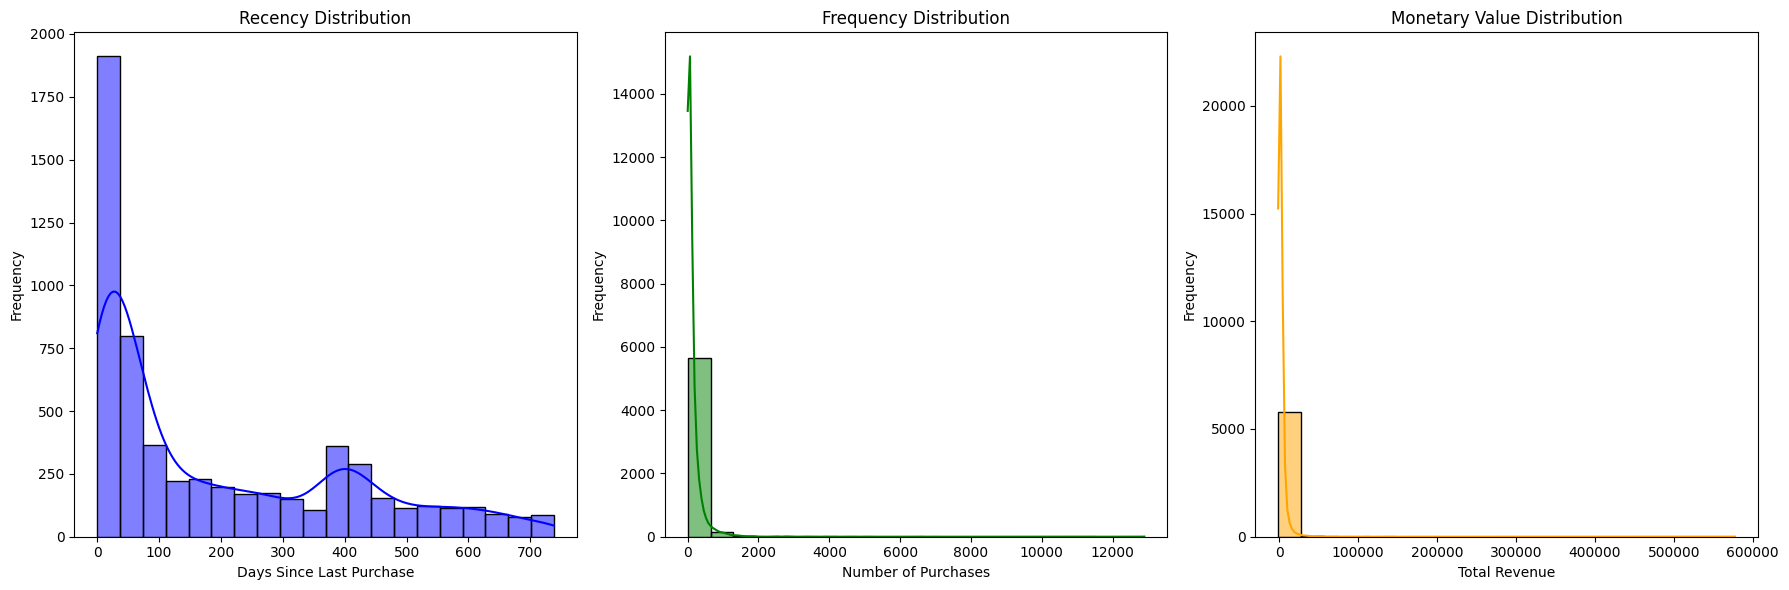

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(18, 6))

# Subplot for Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=20, kde=True, color='blue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')

# Subplot for Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=20, kde=True, color='green')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')

# Subplot for Monetary Value
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary_Sum'], bins=20, kde=True, color='orange')
plt.title('Monetary Value Distribution')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [266]:
import pandas as pd


# Calculate the indices for the splits
n = len(data)
train_size = int(0.7 * n)  # First 70% of data for X_train
validation_size = int(0.15 * n)  # Next 20% for y_train and X_test

# Split the data sequentially
train_data = data.iloc[:train_size]  # First 70% for X_train
validation_data = data.iloc[train_size:train_size + validation_size]  # Next 20% for y_train and X_test
test_data = data.iloc[train_size + validation_size:]  # Remaining 10% for y_test

print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(565768, 9)
(121236, 9)
(121236, 9)


In [267]:
test_data

Invoice StockCode                          Description  Quantity  \
687004  570212     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN         1   
687005  570212     23222          CHRISTMAS TREE HANGING GOLD         2   
687006  570212     23218             LAUREL STAR ANTIQUE GOLD         2   
687007  570212     23216            LAUREL HEART ANTIQUE GOLD         2   
687008  570212     23214       JINGLE BELL HEART ANTIQUE GOLD         4   
...        ...       ...                                  ...       ...   
808235  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
808236  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
808237  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
808238  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
808239  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  Revenue  
687004 2011-10-09 11:29:00   1.25      17811.0  United Kingdom     1.25  
687005 2011-10-09 11:29:00   0.83      17811.0  United Kingdom     1.66  
687006 2011-10-09 11:29:00   1.25      17811.0  United Kingdom     2.50  
687007 2011-10-09 11:29:00   1.25      17811.0  United Kingdom     2.50  
687008 2011-10-09 11:29:00   2.08      17811.0  United Kingdom     8.32  
...                    ...    ...          ...             ...      ...  
808235 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
808236 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
808237 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
808238 2011-12-09 12:50:00   4.95      12680.0          France    14.85  
808239 2011-12-09 12:50:00  18.00      12680.0          France    18.00  

[121236 rows x 9 columns]

In [268]:
# Calculate RFM features for train, validation, and test sets
rfm_train = calculate_rfm_features(train_data, all_customers)
rfm_validation = calculate_rfm_features(validation_data, all_customers)
rfm_test = calculate_rfm_features(test_data, all_customers)

In [269]:
# Prepare X_train and y_train
X_train = rfm_train.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from first 70% (rfm_train)
y_train = rfm_validation['Monetary_Sum']  # Target from next 20% (rfm_validation)

In [270]:
# Prepare X_test and y_test
X_test = rfm_validation.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from next 20% (rfm_validation)
y_test = rfm_test['Monetary_Sum']  # Target from last 10% (rfm_test)

In [271]:
# Train a RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [272]:
# Predict the Monetary_Sum for the test dataset
y_pred = rf_model.predict(X_test)

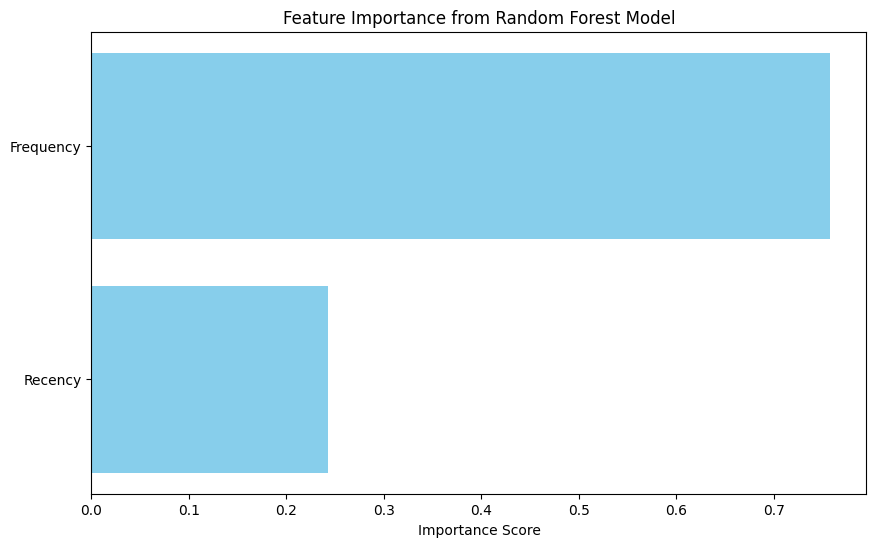

In [273]:
# Get feature importances from the model
importances = rf_model.feature_importances_
# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [274]:
# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 479.86964095750955
RMSE: 44.37516596635958
R-squared: -0.0929248741911779


In [275]:
# Adding predictions to the test set DataFrame
rfm_test['Predicted_Monetary_Sum'] = y_pred

In [276]:
rfm_test

Customer ID  Recency  Frequency  Monetary_Sum  Predicted_Monetary_Sum
0         13085.0     61.0        0.0          0.00               27.263600
1         13078.0      0.0       70.0       3404.33              803.632400
2         15362.0     61.0        0.0          0.00              282.348589
3         18102.0      0.0       95.0      56510.44             1927.335567
4         12682.0      3.0      137.0       3489.01              739.161600
...           ...      ...        ...           ...                     ...
5850      15195.0      2.0        1.0       3861.00              282.348589
5851      13436.0      1.0       12.0        196.89              282.348589
5852      15520.0      1.0       18.0        343.50              282.348589
5853      13298.0      0.0        2.0        360.00              282.348589
5854      12713.0      0.0       38.0        848.55              282.348589

[5855 rows x 5 columns]

### Base model without c2....

In [286]:
dataw = data[data['StockCode'] != 'C2']

In [287]:
dataw = dataw[dataw['Description'] != 'Next Day Carriage']

In [288]:
dataw = dataw[dataw['Description'] != 'POSTAGE']

In [289]:
dataw = dataw[dataw['StockCode'] != 'DOT']

In [290]:
dataw.shape

(805907, 9)

In [291]:
# Drop duplicates from the DataFrame
dataw = dataw.drop_duplicates()

In [292]:
dataw.shape

(794242, 9)

In [293]:
# Reindex the data (reset the index)
dataw = dataw.reset_index(drop=True)

In [294]:
dataw

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
794237  581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
794238  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
794239  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
794240  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
794241  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Price  Customer ID         Country  Revenue  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00  
...                    ...    ...          ...             ...      ...  
794237 2011-12-09 12:50:00   0.85      12680.0          France    10.20  
794238 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
794239 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
794240 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
794241 2011-12-09 12:50:00   4.95      12680.0          France    14.85  

[794242 rows x 9 columns]

In [295]:
# Ensure all_customers is a DataFrame
all_customers = pd.DataFrame(dataw['Customer ID'].unique(), columns=['Customer ID'])

In [296]:
rfm = calculate_rfm_features(dataw,all_customers)

In [297]:
rfm

Customer ID  Recency  Frequency  Monetary_Sum
0         13085.0      157         91       2289.58
1         13078.0        0        845      28369.44
2         15362.0      448         40        613.08
3         18102.0        0       1047     577180.22
4         12682.0        3        944      20648.12
...           ...      ...        ...           ...
5848      15195.0        2          1       3861.00
5849      13436.0        1         12        196.89
5850      15520.0        1         18        343.50
5851      13298.0        0          2        360.00
5852      12713.0        0         37        794.55

[5853 rows x 4 columns]

In [298]:
rfm[rfm["Monetary_Sum"]<0]

Customer ID  Recency  Frequency  Monetary_Sum
552       13091.0       20        121 -1.343240e+03
598       15935.0      238         33 -2.007800e+02
603       13112.0      540          5 -5.440000e+00
3912      14213.0      371         10 -1.421085e-14

In [299]:
rfm[rfm["Customer ID"]==12347]

Customer ID  Recency  Frequency  Monetary_Sum
3920      12347.0        1        222       4921.53

In [300]:
rfm[rfm["Frequency"]<0]

Empty DataFrame
Columns: [Customer ID, Recency, Frequency, Monetary_Sum]
Index: []

In [301]:
rfm.isna().sum()

Customer ID     0
Recency         0
Frequency       0
Monetary_Sum    0
dtype: int64

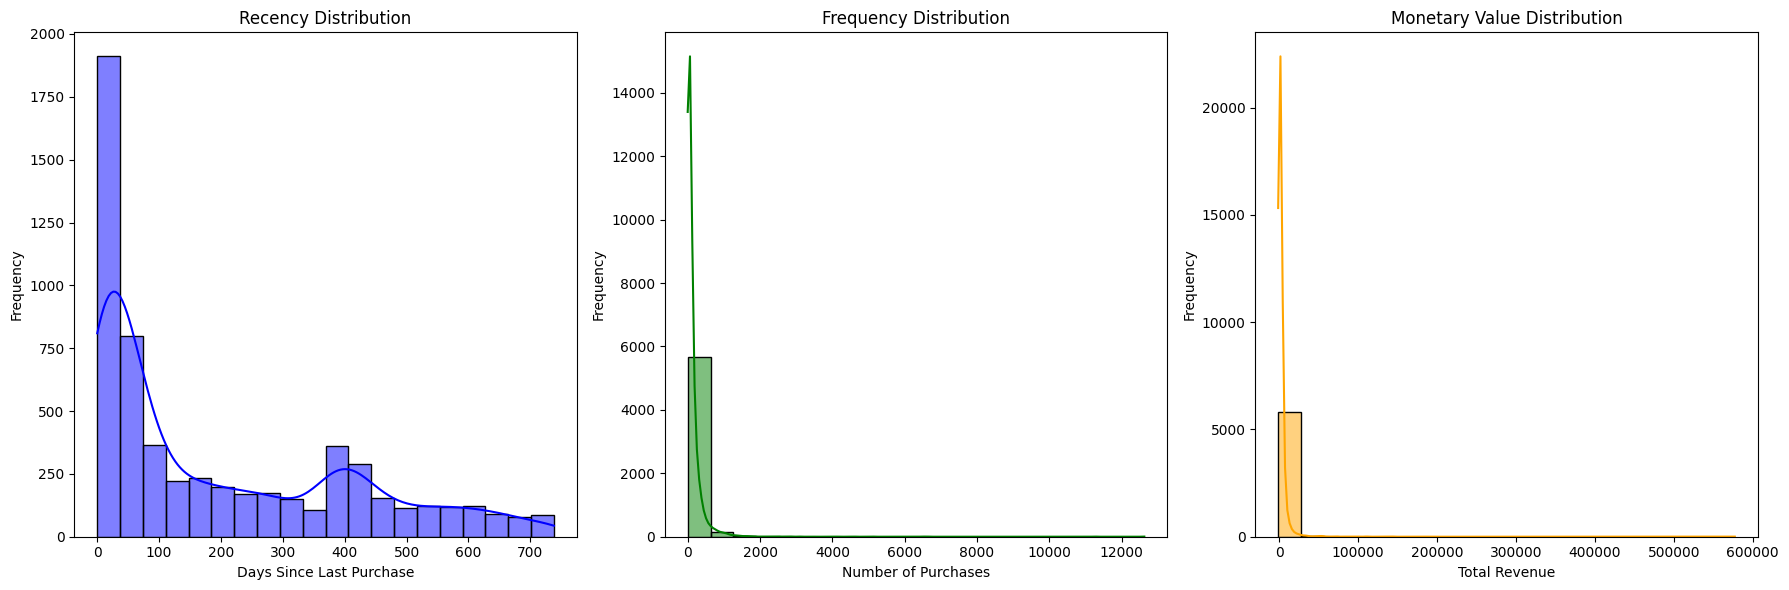

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(18, 6))

# Subplot for Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=20, kde=True, color='blue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')

# Subplot for Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=20, kde=True, color='green')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')

# Subplot for Monetary Value
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary_Sum'], bins=20, kde=True, color='orange')
plt.title('Monetary Value Distribution')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [305]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Calculate the indices for the splits
n = len(dataw)
train_size = int(0.7 * n)  # First 70% of data for X_train
validation_size = int(0.15 * n)  # Next 20% for y_train and X_test

# Split the data sequentially
train_data = dataw.iloc[:train_size]  # First 70% for X_train
validation_data = dataw.iloc[train_size:train_size + validation_size]  # Next 20% for y_train and X_test
test_data = dataw.iloc[train_size + validation_size:]  # Remaining 10% for y_test

print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(555969, 9)
(119136, 9)
(119137, 9)


In [306]:
test_data

Invoice StockCode                      Description  Quantity  \
675105  570183     21533         RETROSPOT LARGE MILK JUG         3   
675106  570183     22759     SET OF 3 NOTEBOOKS IN PARCEL        12   
675107  570183     20979    36 PENCILS TUBE RED RETROSPOT        16   
675108  570183     20978           36 PENCILS TUBE SKULLS        16   
675109  570183     22138    BAKING SET 9 PIECE RETROSPOT          3   
...        ...       ...                              ...       ...   
794237  581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
794238  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
794239  581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
794240  581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
794241  581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Price  Customer ID         Country  Revenue  
675105 2011-10-07 14:43:00   4.95      15208.0  United Kingdom    14.85  
675106 2011-10-07 14:43:00   1.65      15208.0  United Kingdom    19.80  
675107 2011-10-07 14:43:00   1.25      15208.0  United Kingdom    20.00  
675108 2011-10-07 14:43:00   1.25      15208.0  United Kingdom    20.00  
675109 2011-10-07 14:43:00   4.95      15208.0  United Kingdom    14.85  
...                    ...    ...          ...             ...      ...  
794237 2011-12-09 12:50:00   0.85      12680.0          France    10.20  
794238 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
794239 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
794240 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
794241 2011-12-09 12:50:00   4.95      12680.0          France    14.85  

[119137 rows x 9 columns]

In [307]:
# Calculate RFM features for train, validation, and test sets
rfm_train = calculate_rfm_features(train_data, all_customers)
rfm_validation = calculate_rfm_features(validation_data, all_customers)
rfm_test = calculate_rfm_features(test_data, all_customers)

In [308]:
# Prepare X_train and y_train
X_train = rfm_train.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from first 70% (rfm_train)
y_train = rfm_validation['Monetary_Sum']  # Target from next 20% (rfm_validation)

In [309]:
# Prepare X_test and y_test
X_test = rfm_validation.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from next 20% (rfm_validation)
y_test = rfm_test['Monetary_Sum']  # Target from last 10% (rfm_test)

In [310]:
# Train a RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [311]:
# Predict the Monetary_Sum for the test dataset
y_pred = rf_model.predict(X_test)

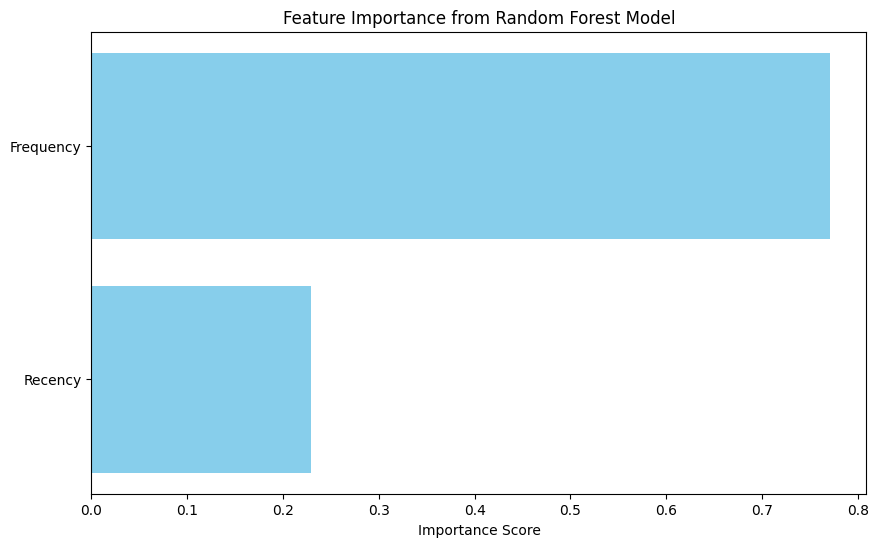

In [312]:
# Get feature importances from the model
importances = rf_model.feature_importances_
# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [313]:
# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 420.60958399644994
RMSE: 42.34566242059892
R-squared: 0.04082029540777443


In [314]:
# Adding predictions to the test set DataFrame
rfm_test['Predicted_Monetary_Sum'] = y_pred

In [315]:
rfm_test

Customer ID  Recency  Frequency  Monetary_Sum  Predicted_Monetary_Sum
0         13085.0     62.0        0.0          0.00               86.442400
1         13078.0      0.0       70.0       3404.33              452.809929
2         15362.0     62.0        0.0          0.00              147.641836
3         18102.0      0.0       95.0      56510.44             1780.692100
4         12682.0      3.0      127.0       3084.61              623.199473
...           ...      ...        ...           ...                     ...
5848      15195.0      2.0        1.0       3861.00              147.641836
5849      13436.0      1.0       12.0        196.89              147.641836
5850      15520.0      1.0       18.0        343.50              147.641836
5851      13298.0      0.0        2.0        360.00              147.641836
5852      12713.0      0.0       37.0        794.55              147.641836

[5853 rows x 5 columns]

### Base Model with Duplicates - Double Orders

In [316]:
datad = data[data['StockCode'] != 'C2']

In [317]:
datad = datad[datad['Description'] != 'Next Day Carriage']

In [318]:
dataw = dataw[dataw['Description'] != 'POSTAGE']

In [319]:
datad = datad[datad['StockCode'] != 'DOT']

In [320]:
datad.shape

(807890, 9)

In [321]:
# Reindex the data (reset the index)
datad = datad.reset_index(drop=True)

In [322]:
datad

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
807885  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
807886  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
807887  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
807888  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
807889  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  Revenue  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00  
...                    ...    ...          ...             ...      ...  
807885 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
807886 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
807887 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
807888 2011-12-09 12:50:00   4.95      12680.0          France    14.85  
807889 2011-12-09 12:50:00  18.00      12680.0          France    18.00  

[807890 rows x 9 columns]

In [323]:
# Ensure all_customers is a DataFrame
all_customers = pd.DataFrame(datad['Customer ID'].unique(), columns=['Customer ID'])

In [324]:
rfm = calculate_rfm_features(datad,all_customers)

In [325]:
rfm

Customer ID  Recency  Frequency  Monetary_Sum
0         13085.0      157         91       2289.58
1         13078.0        0        845      28369.44
2         15362.0      448         40        613.08
3         18102.0        0       1047     577180.22
4         12682.0        3        993      22870.52
...           ...      ...        ...           ...
5849      15195.0        2          1       3861.00
5850      13436.0        1         12        196.89
5851      15520.0        1         18        343.50
5852      13298.0        0          2        360.00
5853      12713.0        0         38        848.55

[5854 rows x 4 columns]

In [326]:
rfm[rfm["Monetary_Sum"]<0]

Customer ID  Recency  Frequency  Monetary_Sum
554       13091.0       20        121 -1.343240e+03
600       15935.0      238         33 -2.007800e+02
605       13112.0      540          5 -5.440000e+00
3914      14213.0      371         10 -1.421085e-14

In [327]:
rfm[rfm["Customer ID"]==12347]

Customer ID  Recency  Frequency  Monetary_Sum
3922      12347.0        1        222       4921.53

In [328]:
rfm[rfm["Frequency"]<0]

Empty DataFrame
Columns: [Customer ID, Recency, Frequency, Monetary_Sum]
Index: []

In [329]:
rfm.isna().sum()

Customer ID     0
Recency         0
Frequency       0
Monetary_Sum    0
dtype: int64

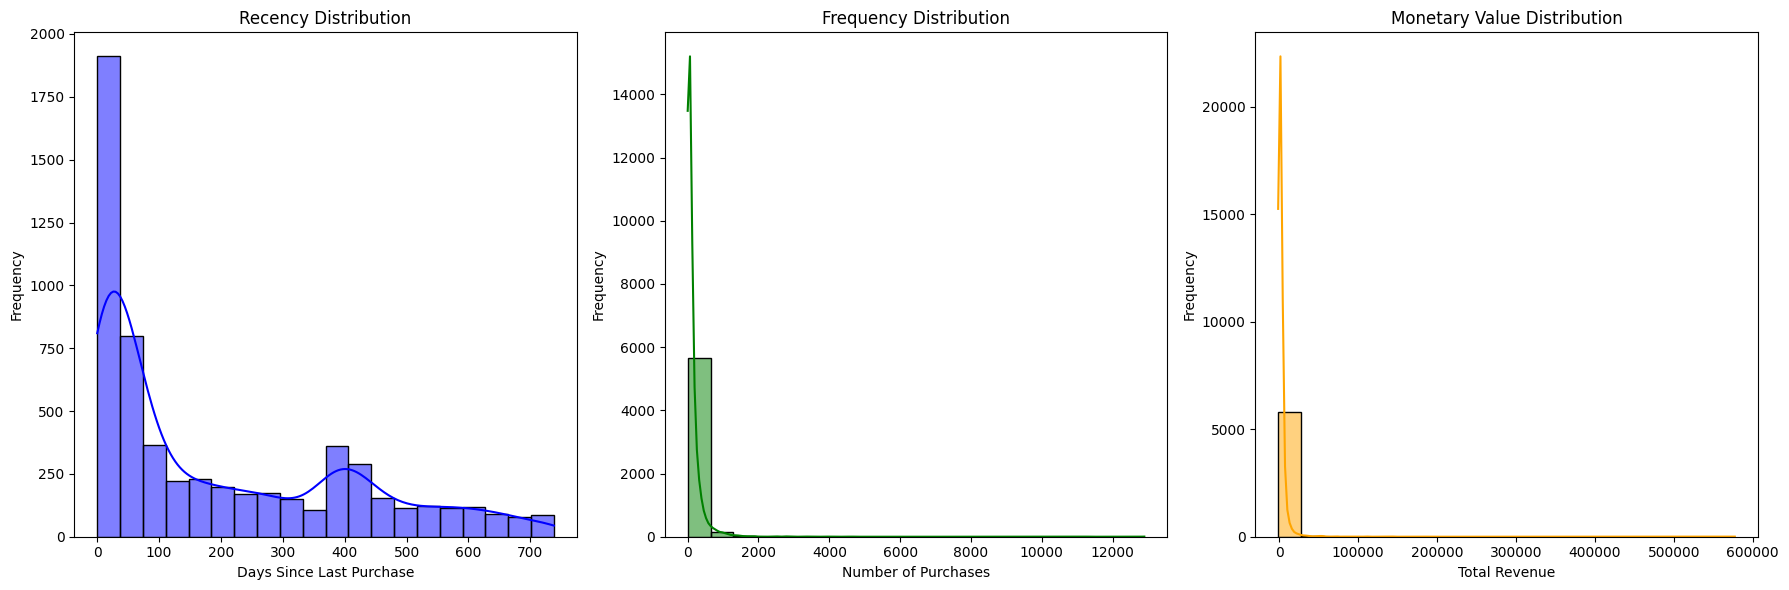

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(18, 6))

# Subplot for Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=20, kde=True, color='blue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')

# Subplot for Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=20, kde=True, color='green')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')

# Subplot for Monetary Value
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary_Sum'], bins=20, kde=True, color='orange')
plt.title('Monetary Value Distribution')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [331]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Calculate the indices for the splits
n = len(datad)
train_size = int(0.7 * n)  # First 70% of data for X_train
validation_size = int(0.15 * n)  # Next 20% for y_train and X_test

# Split the data sequentially
train_data = datad.iloc[:train_size]  # First 70% for X_train
validation_data = datad.iloc[train_size:train_size + validation_size]  # Next 20% for y_train and X_test
test_data = datad.iloc[train_size + validation_size:]  # Remaining 10% for y_test

print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(565523, 9)
(121183, 9)
(121184, 9)


In [332]:
test_data

Invoice StockCode                       Description  Quantity  \
686706  570211     23359  SET OF 12 T-LIGHTS VINTAGE DOILY         2   
686707  570211     22677     FRENCH BLUE METAL DOOR SIGN 2         1   
686708  570211     22680     FRENCH BLUE METAL DOOR SIGN 5         1   
686709  570211     22676     FRENCH BLUE METAL DOOR SIGN 1         1   
686710  570211     22681     FRENCH BLUE METAL DOOR SIGN 6         1   
...        ...       ...                               ...       ...   
807885  581587     22899      CHILDREN'S APRON DOLLY GIRL          6   
807886  581587     23254     CHILDRENS CUTLERY DOLLY GIRL          4   
807887  581587     23255   CHILDRENS CUTLERY CIRCUS PARADE         4   
807888  581587     22138     BAKING SET 9 PIECE RETROSPOT          3   
807889  581587      POST                           POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  Revenue  
686706 2011-10-09 11:15:00   1.95      13558.0  United Kingdom     3.90  
686707 2011-10-09 11:15:00   1.25      13558.0  United Kingdom     1.25  
686708 2011-10-09 11:15:00   1.25      13558.0  United Kingdom     1.25  
686709 2011-10-09 11:15:00   1.25      13558.0  United Kingdom     1.25  
686710 2011-10-09 11:15:00   1.25      13558.0  United Kingdom     1.25  
...                    ...    ...          ...             ...      ...  
807885 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
807886 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
807887 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
807888 2011-12-09 12:50:00   4.95      12680.0          France    14.85  
807889 2011-12-09 12:50:00  18.00      12680.0          France    18.00  

[121184 rows x 9 columns]

In [333]:
# Calculate RFM features for train, validation, and test sets
rfm_train = calculate_rfm_features(train_data, all_customers)
rfm_validation = calculate_rfm_features(validation_data, all_customers)
rfm_test = calculate_rfm_features(test_data, all_customers)

In [334]:
# Prepare X_train and y_train
X_train = rfm_train.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from first 70% (rfm_train)
y_train = rfm_validation['Monetary_Sum']  # Target from next 20% (rfm_validation)

In [335]:
# Prepare X_test and y_test
X_test = rfm_validation.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from next 20% (rfm_validation)
y_test = rfm_test['Monetary_Sum']  # Target from last 10% (rfm_test)

In [336]:
# Train a RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [337]:
# Predict the Monetary_Sum for the test dataset
y_pred = rf_model.predict(X_test)

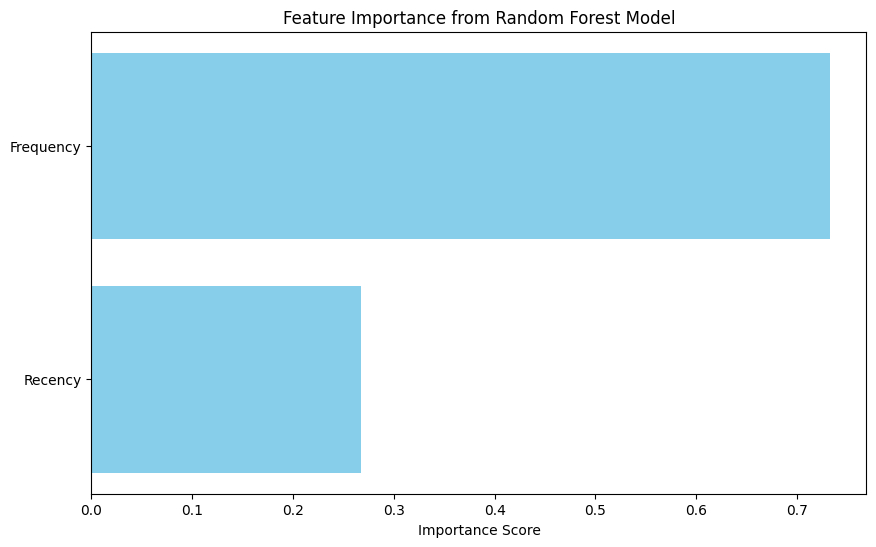

In [338]:
# Get feature importances from the model
importances = rf_model.feature_importances_
# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [339]:

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 432.19772228423284
RMSE: 43.65776477998677
R-squared: -0.07803864901742563


In [340]:
# Adding predictions to the test set DataFrame
rfm_test['Predicted_Monetary_Sum'] = y_pred

In [341]:
rfm_test

Customer ID  Recency  Frequency  Monetary_Sum  Predicted_Monetary_Sum
0         13085.0     61.0        0.0          0.00                56.05480
1         13078.0      0.0       70.0       3404.33               589.65250
2         15362.0     61.0        0.0          0.00               157.76592
3         18102.0      0.0       95.0      56510.44              2208.08050
4         12682.0      3.0      137.0       3489.01               725.24850
...           ...      ...        ...           ...                     ...
5849      15195.0      2.0        1.0       3861.00               157.76592
5850      13436.0      1.0       12.0        196.89               157.76592
5851      15520.0      1.0       18.0        343.50               157.76592
5852      13298.0      0.0        2.0        360.00               157.76592
5853      12713.0      0.0       38.0        848.55               157.76592

[5854 rows x 5 columns]

### Final Dataset

In [342]:
data = pd.read_csv("data.csv")

In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808240 entries, 0 to 808239
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      808240 non-null  object 
 1   StockCode    808240 non-null  object 
 2   Description  808240 non-null  object 
 3   Quantity     808240 non-null  int64  
 4   InvoiceDate  808240 non-null  object 
 5   Price        808240 non-null  float64
 6   Customer ID  808240 non-null  float64
 7   Country      808240 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 49.3+ MB


In [344]:
print('Duplicate entries: {}'.format(data.duplicated().sum()))
print('{}% rows are duplicate.'.format(round((data.duplicated().sum()/data.shape[0])*100),2))

Duplicate entries: 11665
1% rows are duplicate.


In [345]:
data = data.drop_duplicates()

In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 796575 entries, 0 to 808239
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      796575 non-null  object 
 1   StockCode    796575 non-null  object 
 2   Description  796575 non-null  object 
 3   Quantity     796575 non-null  int64  
 4   InvoiceDate  796575 non-null  object 
 5   Price        796575 non-null  float64
 6   Customer ID  796575 non-null  float64
 7   Country      796575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.7+ MB


In [347]:
# Ensure all_customers is a DataFrame
all_customers = pd.DataFrame(data['Customer ID'].unique(), columns=['Customer ID'])

In [348]:
len(all_customers)

5855

In [349]:
# Create revenue colummn
data['Revenue'] = data['Price'] * data['Quantity']
# Convert to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [350]:
# Reindex the data (reset the index)
data = data.reset_index(drop=True)

In [351]:
data

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
796570  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
796571  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
796572  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
796573  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
796574  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  Revenue  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00  
...                    ...    ...          ...             ...      ...  
796570 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
796571 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
796572 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
796573 2011-12-09 12:50:00   4.95      12680.0          France    14.85  
796574 2011-12-09 12:50:00  18.00      12680.0          France    18.00  

[796575 rows x 9 columns]

In [352]:
data = data[data['StockCode'] != 'C2']

In [353]:
data = data[data['Description'] != 'Next Day Carriage']

In [354]:
data = data[data['StockCode'] != 'DOT']

In [355]:
data.shape

(796225, 9)

In [356]:
data = data[data['Description'] != 'POSTAGE']

In [357]:
data.shape

(794242, 9)

In [358]:
# Reindex the data (reset the index)
data = data.reset_index(drop=True)

In [359]:
data

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
794237  581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
794238  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
794239  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
794240  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
794241  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Price  Customer ID         Country  Revenue  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00  
...                    ...    ...          ...             ...      ...  
794237 2011-12-09 12:50:00   0.85      12680.0          France    10.20  
794238 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
794239 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
794240 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
794241 2011-12-09 12:50:00   4.95      12680.0          France    14.85  

[794242 rows x 9 columns]

In [360]:
# Ensure all_customers is a DataFrame
all_customers = pd.DataFrame(data['Customer ID'].unique(), columns=['Customer ID'])

In [361]:
all_customers

Customer ID
0         13085.0
1         13078.0
2         15362.0
3         18102.0
4         12682.0
...           ...
5848      15195.0
5849      13436.0
5850      15520.0
5851      13298.0
5852      12713.0

[5853 rows x 1 columns]

### Outliers

In [11]:
data = pd.read_csv("data2.csv")

In [12]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [13]:
# Ensure all_customers is a DataFrame
all_customers = data['Customer ID'].unique()

In [2]:
data4 = pd.read_csv("data4.csv")

In [9]:
# Function to calculate IQR bounds
def calculate_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculate outlier bounds for Quantity, Price, and Revenue
quantity_lower, quantity_upper = calculate_outliers(data4['Quantity'])
price_lower, price_upper = calculate_outliers(data4['Price'])
revenue_lower, revenue_upper = calculate_outliers(data4['Revenue'])

# Filter transactions that are extreme outliers based on these bounds
outliers = data4[
    (data['Quantity'] < quantity_lower) | (data['Quantity'] > quantity_upper) |
    (data['Price'] < price_lower) | (data['Price'] > price_upper) |
    (data['Revenue'] < revenue_lower) | (data['Revenue'] > revenue_upper)
]

In [10]:
outliers

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
7       489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
...        ...       ...                                  ...       ...   
793604  581583     85038      6 CHOCOLATE LOVE HEART T-LIGHTS        36   
793605  581584     20832     RED FLOCK LOVE HEART PHOTO FRAME        72   
793606  581584     85038      6 CHOCOLATE LOVE HEART T-LIGHTS        48   
793630  581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
793631  581586     20685                DOORMAT RED RETROSPOT        10   

                InvoiceDate  Price  Customer ID         Country  Revenue  
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
7       2009-12-01 07:45:00   5.95      13085.0  United Kingdom    59.50  
...                     ...    ...          ...             ...      ...  
793604  2011-12-09 12:23:00   1.85      13777.0  United Kingdom    66.60  
793605  2011-12-09 12:25:00   0.72      13777.0  United Kingdom    51.84  
793606  2011-12-09 12:25:00   1.85      13777.0  United Kingdom    88.80  
793630  2011-12-09 12:49:00   8.95      13113.0  United Kingdom   214.80  
793631  2011-12-09 12:49:00   7.08      13113.0  United Kingdom    70.80  

[139565 rows x 9 columns]

In [11]:
qr100 = outliers[(outliers['Quantity']>100)&(outliers['Revenue']>1000)]

In [12]:
qr100

Invoice StockCode                          Description  Quantity  \
560     489523     84879        ASSORTED COLOUR BIRD ORNAMENT       800   
2327    489675   15056BL              EDWARDIAN PARASOL BLACK       240   
3793    489831     84347  ROTATING SILVER ANGELS T-LIGHT HLDR       480   
4465    489889    85123A   WHITE HANGING HEART T-LIGHT HOLDER       480   
5019    490010     84347  ROTATING SILVER ANGELS T-LIGHT HLDR       480   
...        ...       ...                                  ...       ...   
791315  581375     21137             BLACK RECORD COVER FRAME       960   
792822  581457     22189              CREAM HEART CARD HOLDER       324   
792823  581457     23543                  WALL ART KEEP CALM        698   
792825  581457     23553          LANDMARK FRAME CAMDEN TOWN        120   
792832  581458     22197                       POPCORN HOLDER      1500   

                InvoiceDate  Price  Customer ID         Country  Revenue  
560     2009-12-01 11:46:00   1.45      12931.0  United Kingdom  1160.00  
2327    2009-12-02 09:47:00   4.60      13777.0  United Kingdom  1104.00  
3793    2009-12-02 13:58:00   2.10      12435.0         Denmark  1008.00  
4465    2009-12-02 16:52:00   2.55      14646.0     Netherlands  1224.00  
5019    2009-12-03 12:15:00   2.10      15061.0  United Kingdom  1008.00  
...                     ...    ...          ...             ...      ...  
791315  2011-12-08 12:36:00   3.39      16210.0  United Kingdom  3254.40  
792822  2011-12-08 18:43:00   3.39      18102.0  United Kingdom  1098.36  
792823  2011-12-08 18:43:00   4.15      18102.0  United Kingdom  2896.70  
792825  2011-12-08 18:43:00  10.95      18102.0  United Kingdom  1314.00  
792832  2011-12-08 18:45:00   0.72      17949.0  United Kingdom  1080.00  

[536 rows x 9 columns]

In [13]:
qr100['Customer ID'].unique()

array([12931., 13777., 12435., 14646., 15061., 17940., 18102., 16013.,
       16029., 14156., 14091., 13902., 15538., 17133., 17949., 16077.,
       16754., 16656., 18052., 14028., 18008., 17511., 17381., 18087.,
       14277., 15838., 17308., 13687., 17450., 17389., 16532., 16210.,
       17404., 16684., 14045., 15299., 12755., 15769., 12415., 12557.,
       15749., 12346., 16333., 12901., 17857., 13113., 13135., 16209.,
       17396., 16041., 17553., 14031., 14607., 12798., 12678., 16986.,
       13868., 13685., 16000.])

In [14]:
qr100[qr100['Customer ID']==12931]

Invoice StockCode                         Description  Quantity  \
560     489523     84879       ASSORTED COLOUR BIRD ORNAMENT       800   
303514  526713     84879       ASSORTED COLOUR BIRD ORNAMENT       800   
320977  528579     84879       ASSORTED COLOUR BIRD ORNAMENT      1240   
355899  532358     84879       ASSORTED COLOUR BIRD ORNAMENT      2880   
599905  562439     22191              IVORY DINER WALL CLOCK       348   
599906  562439     23215    JINGLE BELL HEART ANTIQUE SILVER       576   
599907  562439     21430  SET/3 RED GINGHAM ROSE STORAGE BOX       360   
599908  562439     22197                      POPCORN HOLDER      1900   
599910  562439     84879       ASSORTED COLOUR BIRD ORNAMENT      2880   
605774  563074     84879       ASSORTED COLOUR BIRD ORNAMENT       968   
729039  575335     84879       ASSORTED COLOUR BIRD ORNAMENT      1200   
746908  577021     21479       WHITE SKULL HOT WATER BOTTLE        300   

                InvoiceDate  Price  Customer ID         Country  Revenue  
560     2009-12-01 11:46:00   1.45      12931.0  United Kingdom  1160.00  
303514  2010-10-12 16:38:00   1.45      12931.0  United Kingdom  1160.00  
320977  2010-10-22 13:18:00   1.45      12931.0  United Kingdom  1798.00  
355899  2010-11-11 17:05:00   1.45      12931.0  United Kingdom  4176.00  
599905  2011-08-04 18:06:00   7.65      12931.0  United Kingdom  2662.20  
599906  2011-08-04 18:06:00   1.79      12931.0  United Kingdom  1031.04  
599907  2011-08-04 18:06:00   3.39      12931.0  United Kingdom  1220.40  
599908  2011-08-04 18:06:00   0.72      12931.0  United Kingdom  1368.00  
599910  2011-08-04 18:06:00   1.45      12931.0  United Kingdom  4176.00  
605774  2011-08-11 15:58:00   1.45      12931.0  United Kingdom  1403.60  
729039  2011-11-09 13:56:00   1.45      12931.0  United Kingdom  1740.00  
746908  2011-11-17 12:39:00   3.75      12931.0  United Kingdom  1125.00

In [14]:
pd.set_option('display.max_rows', None)

In [19]:
data4[(data4['Customer ID']==12931)&(data4['Description']=="3 STRIPEY MICE FELTCRAFT")]

Invoice StockCode               Description  Quantity  \
147503   508094     22150  3 STRIPEY MICE FELTCRAFT       150   
147510   508095     22150  3 STRIPEY MICE FELTCRAFT       300   
147525   508096     22150  3 STRIPEY MICE FELTCRAFT       300   
147721  C508132     22150  3 STRIPEY MICE FELTCRAFT      -300   
147732  C508134     22150  3 STRIPEY MICE FELTCRAFT      -300   
147743  C508140     22150  3 STRIPEY MICE FELTCRAFT      -150   
244272   520173     22150  3 STRIPEY MICE FELTCRAFT       150   
285122   524874     22150  3 STRIPEY MICE FELTCRAFT       300   
302448   526585     22150  3 STRIPEY MICE FELTCRAFT       300   

                InvoiceDate  Price  Customer ID         Country  Revenue  
147503  2010-05-13 08:56:00   1.65      12931.0  United Kingdom    247.5  
147510  2010-05-13 08:57:00   1.65      12931.0  United Kingdom    495.0  
147525  2010-05-13 08:59:00   1.65      12931.0  United Kingdom    495.0  
147721  2010-05-13 10:54:00   1.65      12931.0  United Kingdom   -495.0  
147732  2010-05-13 10:56:00   1.65      12931.0  United Kingdom   -495.0  
147743  2010-05-13 10:58:00   1.65      12931.0  United Kingdom   -247.5  
244272  2010-08-24 13:20:00   1.65      12931.0  United Kingdom    247.5  
285122  2010-10-01 10:28:00   1.65      12931.0  United Kingdom    495.0  
302448  2010-10-12 11:52:00   1.65      12931.0  United Kingdom    495.0

In [18]:
data4[(data4['Customer ID']==12931)&(data4['Invoice'].str.startswith('C'))]

Invoice StockCode                          Description  Quantity  \
42006   C494909         D                             Discount       -30   
42007   C494909         D                             Discount       -30   
86542   C500750     21186   WHITE DOVE HONEYCOMB PAPER GARLAND       -10   
86543   C500750     21172                    PARTY METAL SIGN         -4   
91039   C501343     20972   PINK CREAM FELT CRAFT TRINKET BOX        -50   
147716  C508132     10002          INFLATABLE POLITICAL GLOBE       -400   
147717  C508132     20829     GLITTER HANGING BUTTERFLY STRING      -200   
147718  C508132     11001          ASSTD DESIGN RACING CAR PEN      -240   
147719  C508132     22139    RETRO SPOT TEA SET CERAMIC 11 PC       -144   
147720  C508132     20972   PINK CREAM FELT CRAFT TRINKET BOX       -500   
147721  C508132     22150             3 STRIPEY MICE FELTCRAFT      -300   
147722  C508132     21481           FAWN BLUE HOT WATER BOTTLE      -280   
147723  C508132     21915               RED  HARMONICA IN BOX       -300   
147724  C508132     21731        RED TOADSTOOL LED NIGHT LIGHT      -300   
147725  C508132     20975     12 PENCILS SMALL TUBE RED SPOTTY      -500   
147726  C508132     21791   VINTAGE HEADS AND TAILS CARD GAME       -400   
147727  C508134     10002          INFLATABLE POLITICAL GLOBE       -400   
147728  C508134     20829     GLITTER HANGING BUTTERFLY STRING      -200   
147729  C508134     11001          ASSTD DESIGN RACING CAR PEN      -240   
147730  C508134     22139    RETRO SPOT TEA SET CERAMIC 11 PC       -140   
147731  C508134     20972   PINK CREAM FELT CRAFT TRINKET BOX       -500   
147732  C508134     22150             3 STRIPEY MICE FELTCRAFT      -300   
147733  C508134     21481           FAWN BLUE HOT WATER BOTTLE      -280   
147734  C508134     21915               RED  HARMONICA IN BOX       -300   
147735  C508134     21731        RED TOADSTOOL LED NIGHT LIGHT      -300   
147736  C508134     20975     12 PENCILS SMALL TUBE RED SPOTTY      -500   
147737  C508134     21791   VINTAGE HEADS AND TAILS CARD GAME       -400   
147738  C508140     10002          INFLATABLE POLITICAL GLOBE       -200   
147739  C508140     20829     GLITTER HANGING BUTTERFLY STRING      -100   
147740  C508140     11001          ASSTD DESIGN RACING CAR PEN      -128   
147741  C508140     22139    RETRO SPOT TEA SET CERAMIC 11 PC        -72   
147742  C508140     20972   PINK CREAM FELT CRAFT TRINKET BOX       -250   
147743  C508140     22150             3 STRIPEY MICE FELTCRAFT      -150   
147744  C508140     21481           FAWN BLUE HOT WATER BOTTLE      -140   
147745  C508140     21915               RED  HARMONICA IN BOX       -156   
147746  C508140     21731        RED TOADSTOOL LED NIGHT LIGHT      -150   
147747  C508140     20975     12 PENCILS SMALL TUBE RED SPOTTY      -250   
147748  C508140     21791   VINTAGE HEADS AND TAILS CARD GAME       -200   
276919  C523987         D                             Discount      -250   
276920  C523987         D                             Discount      -156   
276921  C523987         D                             Discount      -128   
293102  C525699     20829     GLITTER HANGING BUTTERFLY STRING      -200   
334736  C530063     20975  12 PENCILS SMALL TUBE RED RETROSPOT       -56   
622036  C564940     22564               ALPHABET STENCIL CRAFT      -432   
622037  C564940     23207            LUNCH BAG ALPHABET DESIGN      -250   
622038  C564940     23203             JUMBO BAG VINTAGE DOILY       -200   
622039  C564940     23201                   JUMBO BAG ALPHABET      -140   
622040  C564940     22992               REVOLVER WOODEN RULER       -400   
622041  C564940     22991                 GIRAFFE WOODEN RULER      -400   
622042  C564940     22561          WOODEN SCHOOL COLOURING SET      -252   
622043  C564940     22493            PAINT YOUR OWN CANVAS SET      -110   
622044  C564940     20974          12 PENCILS SMALL TUBE

In [15]:
# Group by 'Customer ID' and count the number of transactions per customer
customer_transaction_counts = data['Customer ID'].value_counts()

# Filter customers with only a few transactions (e.g., less than 5 transactions)
few_transaction_customers = customer_transaction_counts[customer_transaction_counts < 2]

# Display customer IDs and their transaction counts
print("Customers with fewer than 2 transactions:")
print(few_transaction_customers)
print(f"\nTotal number of customers with fewer than 2 transactions: {few_transaction_customers.shape[0]}")

Customers with fewer than 2 transactions:
Customer ID
13017.0    1
18184.0    1
18113.0    1
14576.0    1
14424.0    1
14190.0    1
13383.0    1
13256.0    1
12603.0    1
17925.0    1
15195.0    1
15284.0    1
16219.0    1
16443.0    1
13366.0    1
15893.0    1
15233.0    1
14266.0    1
17008.0    1
13535.0    1
14580.0    1
17102.0    1
14144.0    1
13942.0    1
16257.0    1
14351.0    1
15040.0    1
14090.0    1
13215.0    1
13841.0    1
17986.0    1
13906.0    1
17336.0    1
13105.0    1
15118.0    1
15999.0    1
16881.0    1
14086.0    1
14106.0    1
14095.0    1
13185.0    1
15316.0    1
18233.0    1
14705.0    1
13391.0    1
17956.0    1
17533.0    1
16144.0    1
15510.0    1
13864.0    1
16605.0    1
14900.0    1
17291.0    1
17948.0    1
15753.0    1
15929.0    1
16738.0    1
18068.0    1
14366.0    1
13172.0    1
15273.0    1
15313.0    1
17331.0    1
14845.0    1
17369.0    1
15371.0    1
13099.0    1
12503.0    1
13270.0    1
13120.0    1
13438.0    1
13205.0    1
18133.0   

In [ ]:
# Group by 'Customer ID' and count the number of transactions per customer
customer_transaction_counts = data['Customer ID'].value_counts()

# Filter customers with fewer than 5 transactions
few_transaction_customers = customer_transaction_counts[customer_transaction_counts < 2].index

# Create a DataFrame with transactions of customers who have fewer than 5 transactions
few_transactions_df = data[data['Customer ID'].isin(few_transaction_customers)]
# Sort the DataFrame by 'Customer ID' so transactions for each customer are grouped together
sorted_few_transactions_df = few_transactions_df.sort_values(by='Customer ID').reset_index(drop=True)

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
sorted_few_transactions_df

Invoice StockCode                          Description  Quantity  \
0   506839    84760L     LARGE HANGING GLASS+ZINC LANTERN       560   
1   577168     22423             REGENCY CAKESTAND 3 TIER        56   
2   564819     23084                   RABBIT NIGHT LIGHT        48   
3   580331     22112           CHOCOLATE HOT WATER BOTTLE        48   
4   532047     21769          VINTAGE POST OFFICE CABINET         6   
5   565217     21422                 PORCELAIN ROSE SMALL       288   
6   524536     22355            CHARLOTTE BAG SUKI DESIGN       100   
7   550198     82482    WOODEN PICTURE FRAME WHITE FINISH        12   
8   501670     21621           VINTAGE UNION JACK BUNTING        31   
9   530894     21186   WHITE DOVE HONEYCOMB PAPER GARLAND        48   
10  546828     22502           PICNIC BASKET WICKER SMALL        12   
11  579185     23045     PAPER LANTERN 5 POINT STAR MOON         24   
12  523576     22423             REGENCY CAKESTAND 3 TIER       256   
13  530412    75049L         LARGE CIRCULAR MIRROR MOBILE        96   
14  507844     21933      PINK VINTAGE PAISLEY PICNIC BAG        30   
15  578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   
16  537833     51008             AFGHAN SLIPPER SOCK PAIR       200   
17  572071     21983     PACK OF 12 BLUE PAISLEY TISSUES        144   
18  512169     21232       STRAWBERRY CERAMIC TRINKET BOX       288   
19  553952     84352  SILVER CHRISTMAS TREE BAUBLE STAND          4   
20  511847     47566                        PARTY BUNTING        10   
21  530271     35400          WOODEN BOX ADVENT CALENDAR         10   
22  516751     21430   SET/3 RED GINGHAM ROSE STORAGE BOX         1   
23  548623     16016          LARGE CHINESE STYLE SCISSOR       100   
24  533625     21488    RED WHITE SCARF  HOT WATER BOTTLE       192   
25  529136     16014          SMALL CHINESE STYLE SCISSOR       100   
26  513271     16014          SMALL CHINESE STYLE SCISSOR      1000   
27  510669     72232              FENG SHUI PILLAR CANDLE       576   
28  521227    84078A     SET/4 WHITE RETRO STORAGE CUBES          1   
29  541525     84946      ANTIQUE SILVER TEA GLASS ETCHED        72   
30  492530     21740         COSY SLIPPER SHOES LARGE RED         1   
31  489834     21217           RED SPOTTY ROUND CAKE TINS        24   
32  518670    85023B      EAU DE NILE JEWELLED PHOTOFRAME        12   
33  497678     20785              FUSCHIA RETRO BAR STOOL         2   
34  525868     85106     CUT GLASS HEXAGON T-LIGHT HOLDER        24   
35  558325     22784                LANTERN CREAM GAZEBO         12   
36  514495     21621           VINTAGE UNION JACK BUNTING        16   
37  577897     23328   SET 6 SCHOOL MILK BOTTLES IN CRATE        48   
38  536834     21111   SWISS ROLL TOWEL, CHOCOLATE  SPOTS        12   
39  515295     22476     EMPIRE UNION JACK TV DINNER TRAY         3   
40  496014     84947    ANTIQUE SILVER TEA GLASS ENGRAVED        72   
41  554647    85099C       JUMBO  BAG BAROQUE BLACK WHITE       100   
42  504914     40016        CHINESE DRAGON PAPER LANTERNS       600   
43  514696    51020B             STRIPY DESIGN SHOWER CAP        48   
44  512519    48173C                DOOR MAT BLACK FLOCK          1   
45  561638     84568      GIRLS ALPHABET IRON ON PATCHES       1440   
46  581115     22413      METAL SIGN TAKE IT OR LEAVE IT       1404   
47  530556    85232D        SET/3 DECOUPAGE STACKING TINS        12   
48  504937     84947    ANTIQUE SILVER TEA GLASS ENGRAVED       216   
49  517229     21539            RED RETROSPOT BUTTER DISH         5   
50  563934    85099B              JUMBO BAG RED RETROSPOT        25   
51  541276     20713                       JUMBO BAG OWLS       100   
52  497957     22278   OVERNIGHT BAG VINTAGE ROSE PAISLEY        12   
53  514130     22090            PAPER BUNTING RETRO SPOTS        40   
54  541043     22655          VINTAGE RED KITCHEN CABINET         2   
55  577011     22993       

In [16]:
# List of Customer IDs to remove
customer_ids_to_remove = [
    13017.0, 18184.0, 18113.0, 14576.0, 14424.0, 14190.0, 13383.0, 13256.0, 12603.0,
    17925.0, 15195.0, 15284.0, 16219.0, 16443.0, 13366.0, 15893.0, 15233.0, 14266.0,
    17008.0, 13535.0, 14580.0, 17102.0, 14144.0, 13942.0, 16257.0, 14351.0, 15040.0,
    14090.0, 13215.0, 13841.0, 17986.0, 13906.0, 17336.0, 13105.0, 15118.0, 15999.0,
    16881.0, 14086.0, 14106.0, 14095.0, 13185.0, 15316.0, 18233.0, 14705.0, 13391.0,
    17956.0, 17533.0, 16144.0, 15510.0, 13864.0, 16605.0, 14900.0, 17291.0, 17948.0,
    15753.0, 15929.0, 16738.0, 18068.0, 14366.0, 13172.0, 15273.0, 15313.0, 17331.0,
    14845.0, 17369.0, 15371.0, 13099.0, 12503.0, 13270.0, 13120.0, 13438.0, 13205.0,
    18133.0, 15486.0, 15913.0, 13096.0, 13128.0, 17347.0, 14033.0, 16663.0, 16786.0,
    14613.0, 13222.0, 17077.0, 16093.0, 17443.0, 15668.0, 15693.0, 12814.0, 17752.0,
    15686.0, 16953.0, 16417.0, 16165.0, 13788.0, 15657.0, 13188.0
]

# Remove the rows with these Customer IDs from the data
data1= data[~data['Customer ID'].isin(customer_ids_to_remove)]


In [17]:
data1.shape

(794145, 9)

In [18]:
# Group by 'Customer ID' and count the number of transactions per customer
customer_transaction_counts = data1['Customer ID'].value_counts()

# Filter customers with only a few transactions (e.g., less than 5 transactions)
few_transaction_customers = customer_transaction_counts[customer_transaction_counts < 3]

# Display customer IDs and their transaction counts
print("Customers with fewer than 2 transactions:")
print(few_transaction_customers)
print(f"\nTotal number of customers with fewer than 2 transactions: {few_transaction_customers.shape[0]}")

Customers with fewer than 2 transactions:
Customer ID
16941.0    2
14642.0    2
17942.0    2
15455.0    2
16073.0    2
13298.0    2
17186.0    2
17831.0    2
14707.0    2
13130.0    2
15940.0    2
16454.0    2
17959.0    2
17310.0    2
14559.0    2
17715.0    2
14207.0    2
17427.0    2
14603.0    2
18080.0    2
17378.0    2
18174.0    2
16990.0    2
13829.0    2
16162.0    2
15698.0    2
15442.0    2
14405.0    2
12934.0    2
16976.0    2
17129.0    2
17747.0    2
12850.0    2
13559.0    2
13228.0    2
15477.0    2
16970.0    2
16058.0    2
17079.0    2
16429.0    2
16420.0    2
15635.0    2
16737.0    2
16659.0    2
13068.0    2
15431.0    2
16537.0    2
17896.0    2
Name: count, dtype: int64

Total number of customers with fewer than 2 transactions: 48


In [19]:
# Group by 'Customer ID' and count the number of transactions per customer
customer_transaction_counts = data1['Customer ID'].value_counts()

# Filter customers with fewer than 5 transactions
few_transaction_customers = customer_transaction_counts[customer_transaction_counts < 3].index

# Create a DataFrame with transactions of customers who have fewer than 5 transactions
few_transactions_df = data1[data1['Customer ID'].isin(few_transaction_customers)]
# Sort the DataFrame by 'Customer ID' so transactions for each customer are grouped together
sorted_few_transactions_df = few_transactions_df.sort_values(by='Customer ID').reset_index(drop=True)

In [20]:
sorted_few_transactions_df

Invoice StockCode                          Description  Quantity  \
0    523106     21928       JUMBO BAG SCANDINAVIAN PAISLEY       100   
1    523106     22411    JUMBO SHOPPER VINTAGE RED PAISLEY       100   
2    489935    84884A          ANT WHITE WIRE HEART SPIRAL        30   
3    489935     21769          VINTAGE POST OFFICE CABINET         1   
4    541865    85099C       JUMBO  BAG BAROQUE BLACK WHITE       100   
5    579469    85099C       JUMBO  BAG BAROQUE BLACK WHITE       100   
6    565780     21035      SET/2 RED RETROSPOT TEA TOWELS         12   
7    565780     21154            RED RETROSPOT OVEN GLOVE         20   
8    567325    85099C       JUMBO  BAG BAROQUE BLACK WHITE       100   
9    567325    85099B              JUMBO BAG RED RETROSPOT       100   
10   581385     21479        WHITE SKULL HOT WATER BOTTLE         72   
11   581385    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        24   
12   512172     71477    COLOUR GLASS. STAR T-LIGHT HOLDER       120   
13   515817     71477    COLOUR GLASS. STAR T-LIGHT HOLDER       240   
14  C539055     22890   NOVELTY BISCUITS CAKE STAND 3 TIER       -12   
15   527119     22890   NOVELTY BISCUITS CAKE STAND 3 TIER        12   
16   495078    35004C      SET OF 3 COLOURED  FLYING DUCKS        12   
17   495078     79320                      FLAMINGO LIGHTS        24   
18   533583    85099B              JUMBO BAG RED RETROSPOT        40   
19   533583    85099C       JUMBO  BAG BAROQUE BLACK WHITE        60   
20   532815     21809     CHRISTMAS HANGING TREE WITH BELL        36   
21   532815     22577  WOODEN HEART CHRISTMAS SCANDINAVIAN        36   
22   546169     21112         SWISS ROLL TOWEL PINK  SPOTS       200   
23   546169     15036            ASSORTED COLOURS SILK FAN       200   
24   570722     47566                        PARTY BUNTING         4   
25   570722     84946         ANTIQUE SILVER T-LIGHT GLASS        72   
26   524662     22464          HANGING METAL HEART LANTERN        48   
27   507997     22464          HANGING METAL HEART LANTERN        48   
28   516928     22070      SMALL RED RETROSPOT MUG IN BOX         36   
29   516928     20975     12 PENCILS SMALL TUBE RED SPOTTY        48   
30   548981    15056N            EDWARDIAN PARASOL NATURAL        60   
31   548981    15056P               EDWARDIAN PARASOL PINK        60   
32   505333     22236       CAKE STAND 3 TIER MAGIC GARDEN         1   
33   505333     22423             REGENCY CAKESTAND 3 TIER         2   
34   499455     84755  COLOUR GLASS T-LIGHT HOLDER HANGING        96   
35   499455     22090            PAPER BUNTING RETRO SPOTS       120   
36   531547     22764   RUSTIC WOODEN CABINET, GLASS DOORS         3   
37   531547     21735               TWO DOOR CURIO CABINET         2   
38   502665     22178      VICTORIAN GLASS HANGING T-LIGHT        12   
39   502665     21666          RIDGED GLASS T-LIGHT HOLDER        48   
40   542915     35400          WOODEN BOX ADVENT CALENDAR          4   
41  C529176     35400          WOODEN BOX ADVENT CALENDAR         -4   
42   529793     22700             BLACK AND WHITE DOG BOWL         6   
43   529793     22349         DOG BOWL CHASING BALL DESIGN        12   
44  C544558     22360      GLASS JAR ENGLISH CONFECTIONERY       -11   
45   544078     22360      GLASS JAR ENGLISH CONFECTIONERY        48   
46   548668     21259          VICTORIAN SEWING BOX SMALL          2   
47   548668     85066          CREAM SWEETHEART MINI CHEST         2   
48   531494     22738            RIBBON REEL SNOWY VILLAGE        20   
49   531494     22959               WRAP CHRISTMAS VILLAGE       100   
50   564485    84078A     SET/4 WHITE RETRO STORAGE CUBES          8   
51   564485     21770               OPEN CLOSED METAL SIGN         1   
52   569915    90012A  MIDNIGHT BLUE DROP CRYSTAL NECKLACE         2   
53   503830    46000M         POLYESTER FILLER PAD 45x45cm         1   
54   500504     35652   VINTAGE BEAD CHAISE 

In [21]:
data1[data1['Customer ID']==13829]

Invoice StockCode                         Description  Quantity  \
307922   527119     22890  NOVELTY BISCUITS CAKE STAND 3 TIER        12   
415974  C539055     22890  NOVELTY BISCUITS CAKE STAND 3 TIER       -12   

               InvoiceDate  Price  Customer ID         Country  Revenue  
307922 2010-10-14 18:19:00    8.5      13829.0  United Kingdom    102.0  
415974 2010-12-15 16:36:00    8.5      13829.0  United Kingdom   -102.0

In [22]:
data1[data1['Customer ID']==15940]

Invoice StockCode                  Description  Quantity  \
327883  C529176     35400  WOODEN BOX ADVENT CALENDAR         -4   
443607   542915     35400  WOODEN BOX ADVENT CALENDAR          4   

               InvoiceDate  Price  Customer ID         Country  Revenue  
327883 2010-10-26 18:17:00   7.95      15940.0  United Kingdom    -31.8  
443607 2011-02-01 16:18:00   8.95      15940.0  United Kingdom     35.8

In [23]:
data1[data1['Customer ID']==16073]

Invoice StockCode                      Description  Quantity  \
452065   544078     22360  GLASS JAR ENGLISH CONFECTIONERY        48   
456080  C544558     22360  GLASS JAR ENGLISH CONFECTIONERY       -11   

               InvoiceDate  Price  Customer ID         Country  Revenue  
452065 2011-02-15 15:41:00   2.55      16073.0  United Kingdom   122.40  
456080 2011-02-21 12:33:00   2.55      16073.0  United Kingdom   -28.05

In [24]:
data1[data1['Customer ID']==17378]

Invoice StockCode               Description  Quantity  \
394186  C536265     21843  RED RETROSPOT CAKE STAND        -1   
394512   536361     21843  RED RETROSPOT CAKE STAND         1   

               InvoiceDate  Price  Customer ID         Country  Revenue  
394186 2010-11-30 15:52:00  10.95      17378.0  United Kingdom   -10.95  
394512 2010-11-30 18:46:00  10.95      17378.0  United Kingdom    10.95

In [ ]:
# List of Customer IDs to remove
customer_ids_to_remove_2 = [
    16941.0, 14642.0, 17942.0, 15455.0, 16073.0, 13298.0, 17186.0, 17831.0, 14707.0,
    13130.0, 15940.0, 16454.0, 17959.0, 17310.0, 14559.0, 17715.0, 14207.0, 17427.0,
    14603.0, 18080.0, 17378.0, 18174.0, 16990.0, 13829.0, 16162.0, 15698.0, 15442.0,
    14405.0, 12934.0, 16976.0, 17129.0, 17747.0, 12850.0, 13559.0, 13228.0, 15477.0,
    16970.0, 16058.0, 17079.0, 16429.0, 16420.0, 15635.0, 16737.0, 16659.0, 13068.0,
    15431.0, 16537.0, 17896.0
]

# Remove the rows with these Customer IDs from the data
data2 = data1[~data1['Customer ID'].isin(customer_ids_to_remove_2)]

In [26]:
data2.shape

(794049, 9)

In [27]:
# Group by 'Customer ID' and count the number of transactions per customer
customer_transaction_counts = data2['Customer ID'].value_counts()

# Filter customers with only a few transactions (e.g., less than 5 transactions)
few_transaction_customers = customer_transaction_counts[customer_transaction_counts < 4]

# Display customer IDs and their transaction counts
print("Customers with fewer than 2 transactions:")
print(few_transaction_customers)
print(f"\nTotal number of customers with fewer than 2 transactions: {few_transaction_customers.shape[0]}")

Customers with fewer than 2 transactions:
Customer ID
14279.0    3
14300.0    3
15575.0    3
17923.0    3
14384.0    3
17638.0    3
14946.0    3
13682.0    3
15672.0    3
15286.0    3
15744.0    3
16319.0    3
15049.0    3
16171.0    3
18063.0    3
15178.0    3
13132.0    3
12487.0    3
14743.0    3
15250.0    3
12366.0    3
12776.0    3
13452.0    3
17395.0    3
16506.0    3
14185.0    3
12736.0    3
13380.0    3
18115.0    3
14117.0    3
17775.0    3
13302.0    3
17319.0    3
16530.0    3
14435.0    3
17494.0    3
17391.0    3
17024.0    3
16694.0    3
14589.0    3
13011.0    3
13913.0    3
12587.0    3
14835.0    3
14785.0    3
15619.0    3
Name: count, dtype: int64

Total number of customers with fewer than 2 transactions: 46


In [28]:
# Group by 'Customer ID' and count the number of transactions per customer
customer_transaction_counts = data2['Customer ID'].value_counts()

# Filter customers with fewer than 5 transactions
few_transaction_customers = customer_transaction_counts[customer_transaction_counts < 4].index

# Create a DataFrame with transactions of customers who have fewer than 5 transactions
few_transactions_df = data2[data2['Customer ID'].isin(few_transaction_customers)]
# Sort the DataFrame by 'Customer ID' so transactions for each customer are grouped together
sorted_few_transactions_df = few_transactions_df.sort_values(by='Customer ID').reset_index(drop=True)

In [29]:
sorted_few_transactions_df

Invoice StockCode                          Description  Quantity  \
0     501333     21135     VICTORIAN  METAL POSTCARD SPRING        96   
1     501333     21136         PAINTED METAL PEARS ASSORTED        96   
2     501333     84879        ASSORTED COLOUR BIRD ORNAMENT       104   
3    C491036     21680                   WOODLAND  STICKERS       -30   
4     491059     21252       SET OF MEADOW  FLOWER STICKERS        30   
5     491059     21731        RED TOADSTOOL LED NIGHT LIGHT       144   
6     580265     23200                      JUMBO BAG PEARS        20   
7     580265     20713                       JUMBO BAG OWLS        10   
8     580265     22386              JUMBO BAG PINK POLKADOT        20   
9     540688     22222            CAKE PLATE LOVEBIRD WHITE        24   
10    540688     21212      PACK OF 72 RETROSPOT CAKE CASES       120   
11    540688     22223             CAKE PLATE LOVEBIRD PINK        24   
12    497510    16161U                WRAP,SUKI AND FRIENDS        25   
13    497510     22355          CHARLOTTE BAG , SUKI DESIGN        10   
14    497510     20719               WOODLAND CHARLOTTE BAG        10   
15    536823    82494L          WOODEN FRAME ANTIQUE WHITE          6   
16    536823    85014A         BLACK/BLUE POLKADOT UMBRELLA         3   
17    536823     22508             DOORSTOP RETROSPOT HEART         4   
18    547503     21137             BLACK RECORD COVER FRAME        12   
19    547503     22168        ORGANISER WOOD ANTIQUE WHITE          2   
20    547503     22041         RECORD FRAME 7" SINGLE SIZE          6   
21    559353    84968C  SET OF 16 VINTAGE PISTACHIO CUTLERY         5   
22    514298    84968B           S/16 VINTAGE IVORY CUTLERY         6   
23    514298     85067        CREAM SWEETHEART WALL CABINET         1   
24    525001     21232       STRAWBERRY CERAMIC TRINKET BOX        12   
25    525001     22299      PIG KEYRING WITH LIGHT & SOUND         24   
26    525001     22645  CERAMIC HEART FAIRY CAKE MONEY BANK        12   
27    520078    84078A     SET/4 WHITE RETRO STORAGE CUBES          4   
28    546480     22656         VINTAGE BLUE KITCHEN CABINET         1   
29    547814     22656         VINTAGE BLUE KITCHEN CABINET         1   
30    555557    85035C        ROSE 3 WICK MORRIS BOX CANDLE         4   
31    555557    72807A    SET/3 ROSE CANDLE IN JEWELLED BOX         4   
32    555557     84813        SET OF 4 DIAMOND NAPKIN RINGS         2   
33    516490     21359             RELAX LARGE WOOD LETTERS         1   
34    516490     22423             REGENCY CAKESTAND 3 TIER         1   
35    516490     84879        ASSORTED COLOUR BIRD ORNAMENT         8   
36    560450     84946         ANTIQUE SILVER T-LIGHT GLASS        24   
37    560450     84947    ANTIQUE SILVER TEA GLASS ENGRAVED        24   
38    560450     22791         T-LIGHT GLASS FLUTED ANTIQUE        24   
39    540970     22827   RUSTIC  SEVENTEEN DRAWER SIDEBOARD         1   
40    540970     21366       MIRRORED WALL ART PHOTO FRAMES         3   
41    540970     21784                      SHOE SHINE BOX          2   
42    495946     48138                  DOOR MAT UNION FLAG        10   
43    514858    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        24   
44    495946     78033              FLAG OF ST GEORGE CHAIR        12   
45    577604     84832     ZINC WILLIE WINKIE  CANDLE STICK        12   
46    577604     22736          RIBBON REEL MAKING SNOWMEN         10   
47    577604     22081           RIBBON REEL FLORA + FAUNA         10   
48    517128    85099F                 JUMBO BAG STRAWBERRY        10   
49    517128     21929       JUMBO BAG PINK VINTAGE PAISLEY        10   
50    517128     22386      JUMBO BAG PINK WITH WHITE SPOTS        10   
51    517051     21829           DINOSAUR KEYRINGS ASSORTED       108   
52    517051     17003                  BROCADE RING PURSE        144   
53    517051     21224                   SET/4 SKULL BADGES    

In [30]:
data2[data2['Customer ID']==12487]

Invoice StockCode                     Description  Quantity  \
14819  C491036     21680              WOODLAND  STICKERS       -30   
15003   491059     21731   RED TOADSTOOL LED NIGHT LIGHT       144   
15004   491059     21252  SET OF MEADOW  FLOWER STICKERS        30   

              InvoiceDate  Price  Customer ID Country  Revenue  
14819 2009-12-09 09:16:00   0.85      12487.0  Sweden    -25.5  
15003 2009-12-09 11:36:00   1.45      12487.0  Sweden    208.8  
15004 2009-12-09 11:36:00   2.55      12487.0  Sweden     76.5

In [31]:
# List of new Customer IDs to remove
customer_ids_to_remove_3 = [
    14279.0, 14300.0, 15575.0, 17923.0, 14384.0, 17638.0, 14946.0, 13682.0, 15672.0,
    15286.0, 15744.0, 16319.0, 15049.0, 16171.0, 18063.0, 15178.0, 13132.0, 12487.0,
    14743.0, 15250.0, 12366.0, 12776.0, 13452.0, 17395.0, 16506.0, 14185.0, 12736.0,
    13380.0, 18115.0, 14117.0, 17775.0, 13302.0, 17319.0, 16530.0, 14435.0, 17494.0,
    17391.0, 17024.0, 16694.0, 14589.0, 13011.0, 13913.0, 12587.0, 14835.0, 14785.0, 15619.0
]

# Remove the rows with these Customer IDs from the data
data3 = data2[~data2['Customer ID'].isin(customer_ids_to_remove_3)]


In [32]:
data3.shape

(793911, 9)

In [33]:
# Group by 'Customer ID' and count the number of transactions per customer
customer_transaction_counts = data3['Customer ID'].value_counts()

# Filter customers with only a few transactions (e.g., less than 5 transactions)
few_transaction_customers = customer_transaction_counts[customer_transaction_counts < 5]

# Display customer IDs and their transaction counts
print("Customers with fewer than 2 transactions:")
print(few_transaction_customers)
print(f"\nTotal number of customers with fewer than 2 transactions: {few_transaction_customers.shape[0]}")

Customers with fewer than 2 transactions:
Customer ID
17620.0    4
13084.0    4
13180.0    4
15595.0    4
12401.0    4
13303.0    4
17074.0    4
17327.0    4
14457.0    4
17151.0    4
16196.0    4
13009.0    4
12861.0    4
13051.0    4
13006.0    4
17467.0    4
13640.0    4
14373.0    4
17532.0    4
17089.0    4
15588.0    4
13254.0    4
15899.0    4
13160.0    4
15470.0    4
12984.0    4
12659.0    4
15242.0    4
14792.0    4
14661.0    4
17876.0    4
15564.0    4
13147.0    4
15868.0    4
18017.0    4
18131.0    4
14650.0    4
16462.0    4
13907.0    4
17616.0    4
12568.0    4
13306.0    4
13022.0    4
14371.0    4
12756.0    4
16692.0    4
18028.0    4
14520.0    4
17788.0    4
15170.0    4
13915.0    4
18273.0    4
17174.0    4
16446.0    4
16323.0    4
14977.0    4
17394.0    4
15098.0    4
14816.0    4
14926.0    4
14464.0    4
12548.0    4
16505.0    4
15526.0    4
14956.0    4
13163.0    4
Name: count, dtype: int64

Total number of customers with fewer than 2 transactions: 66


In [34]:
# Group by 'Customer ID' and count the number of transactions per customer
customer_transaction_counts = data3['Customer ID'].value_counts()

# Filter customers with fewer than 5 transactions
few_transaction_customers = customer_transaction_counts[customer_transaction_counts < 5].index

# Create a DataFrame with transactions of customers who have fewer than 5 transactions
few_transactions_df = data3[data3['Customer ID'].isin(few_transaction_customers)]
# Sort the DataFrame by 'Customer ID' so transactions for each customer are grouped together
sorted_few_transactions_df = few_transactions_df.sort_values(by='Customer ID').reset_index(drop=True)

In [35]:
sorted_few_transactions_df

Invoice StockCode                          Description  Quantity  \
0     543537     22423             REGENCY CAKESTAND 3 TIER         2   
1     543537     21843             RED RETROSPOT CAKE STAND         1   
2     543537    84279B      CHERRY BLOSSOM DECORATIVE FLASK         4   
3     543537   15056BL              EDWARDIAN PARASOL BLACK         3   
4     558108     21210   SET OF 72 RETROSPOT PAPER  DOILIES        12   
5     558108     84988   SET OF 72 PINK HEART PAPER DOILIES        12   
6     558108     84380    SET OF 3 BUTTERFLY COOKIE CUTTERS        12   
7     558108     21211       SET OF 72 SKULL PAPER  DOILIES        12   
8     500167     22348            TEA BAG PLATE RED SPOTTY         12   
9     500167     47570             ENGLISH ROSE TABLE CLOTH         2   
10    500167     20676                      RED SPOTTY BOWL         8   
11    500167    16161P                   WRAP ENGLISH ROSE         25   
12    575581     23395       BELLE JARDINIERE CUSHION COVER         4   
13    575581     85015      SET OF 12  VINTAGE POSTCARD SET        24   
14    575581     22944  CHRISTMAS METAL POSTCARD WITH BELLS        72   
15    575581     23396    LE JARDIN BOTANIQUE CUSHION COVER         4   
16    566623     21786                   POLKADOT RAIN HAT         24   
17    566623     21787                RAIN PONCHO RETROSPOT        72   
18    566623     21789                   KIDS RAIN MAC PINK        24   
19    566623     21788                   KIDS RAIN MAC BLUE        24   
20    503116     22465           HANGING METAL STAR LANTERN        12   
21    503116     22283             6 EGG HOUSE PAINTED WOOD         2   
22    503116    84968C       S/16 VINTAGE PISTACHIO CUTLERY         1   
23    503116     22464          HANGING METAL HEART LANTERN        12   
24    577724     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         8   
25    577724     22273                 FELTCRAFT DOLL MOLLY         6   
26    577724     23126            FELTCRAFT GIRL AMELIE KIT         4   
27    577724     20969    RED FLORAL FELTCRAFT SHOULDER BAG         8   
28    571226     22423             REGENCY CAKESTAND 3 TIER         3   
29    571226     20749           ASSORTED COLOUR MINI CASES         4   
30    571226     22161     HEART DECORATION RUSTIC HANGING         24   
31    571226     22577  WOODEN HEART CHRISTMAS SCANDINAVIAN        24   
32    497005     21929       JUMBO BAG PINK VINTAGE PAISLEY        30   
33    497005    85099F                 JUMBO BAG STRAWBERRY        30   
34    497005    85099B          JUMBO BAG RED WHITE SPOTTY         30   
35    497005     21931               JUMBO STORAGE BAG SUKI        30   
36    525578     21349                     IVY HEART WREATH         2   
37    525578     72816    SET/3 CHRISTMAS DECOUPAGE CANDLES        12   
38    525578     21018   BIRD BOX CHRISTMAS TREE DECORATION        12   
39    525578     20957         PORCELAIN HANGING BELL SMALL         8   
40    507437     22184  CAKE STAND VICTORIAN FILIGREE LARGE         4   
41    507437     22182  CAKE STAND VICTORIAN FILIGREE SMALL         4   
42    503073     22178      VICTORIAN GLASS HANGING T-LIGHT        60   
43    507437     22183    CAKE STAND VICTORIAN FILIGREE MED         4   
44   C518499    84507B           STRIPES DESIGN MONKEY DOLL        -4   
45    518152    84507C      BLUE CIRCLES DESIGN MONKEY DOLL        48   
46    518152    84507B           STRIPES DESIGN MONKEY DOLL        96   
47   C518499    84507C      BLUE CIRCLES DESIGN MONKEY DOLL        -3   
48    573129     79321                        CHILLI LIGHTS        24   
49    565127     79321                        CHILLI LIGHTS        24   
50    575205     79321                        CHILLI LIGHTS        48   
51    579451     79321                        CHILLI LIGHTS        48   
52    577032     23035            DRAWER KNOB CERAMIC IVORY        18   
53    577032     23212    HEART WREATH DECORATION WITH BELL    

In [36]:
data3[data3['Customer ID']==16446]

Invoice StockCode                  Description  Quantity  \
529364   553573     22980       PANTRY SCRUBBING BRUSH         1   
529365   553573     22982          PANTRY PASTRY BRUSH         1   
793775   581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   
793776  C581484     23843  PAPER CRAFT , LITTLE BIRDIE    -80995   

               InvoiceDate  Price  Customer ID         Country    Revenue  
529364 2011-05-18 09:52:00   1.65      16446.0  United Kingdom       1.65  
529365 2011-05-18 09:52:00   1.25      16446.0  United Kingdom       1.25  
793775 2011-12-09 09:15:00   2.08      16446.0  United Kingdom  168469.60  
793776 2011-12-09 09:27:00   2.08      16446.0  United Kingdom -168469.60

In [37]:
data3[data3['Customer ID']==14792]

Invoice StockCode                   Description  Quantity  \
673165  C569954    47594A       CAROUSEL DESIGN WASHBAG        -1   
673166  C569954     22371  AIRLINE BAG VINTAGE TOKYO 78        -1   
673560   570003    47594A       CAROUSEL DESIGN WASHBAG         1   
673561   570003     22371  AIRLINE BAG VINTAGE TOKYO 78         1   

               InvoiceDate  Price  Customer ID         Country  Revenue  
673165 2011-10-06 18:34:00   1.95      14792.0  United Kingdom    -1.95  
673166 2011-10-06 18:34:00   4.25      14792.0  United Kingdom    -4.25  
673560 2011-10-07 09:19:00   1.95      14792.0  United Kingdom     1.95  
673561 2011-10-07 09:19:00   4.25      14792.0  United Kingdom     4.25

In [ ]:
# List of new Customer IDs to remove
customer_ids_to_remove_4 = [
    17620.0, 13084.0, 13180.0, 15595.0, 12401.0, 13303.0, 17074.0, 17327.0, 14457.0,
    17151.0, 16196.0, 13009.0, 12861.0, 13051.0, 13006.0, 17467.0, 13640.0, 14373.0,
    17532.0, 17089.0, 15588.0, 13254.0, 15899.0, 13160.0, 15470.0, 12984.0, 12659.0,
    15242.0, 14792.0, 14661.0, 17876.0, 15564.0, 13147.0, 15868.0, 18017.0, 18131.0,
    14650.0, 16462.0, 13907.0, 17616.0, 12568.0, 13306.0, 13022.0, 14371.0, 12756.0,
    16692.0, 18028.0, 14520.0, 17788.0, 15170.0, 13915.0, 18273.0, 17174.0, 16446.0,
    16323.0, 14977.0, 17394.0, 15098.0, 14816.0, 14926.0, 14464.0, 12548.0, 16505.0,
    15526.0, 14956.0, 13163.0
]

# Remove the rows with these Customer IDs from the data
data4 = data3[~data3['Customer ID'].isin(customer_ids_to_remove_4)]

In [39]:
data4.shape

(793647, 9)

In [16]:
data4 = pd.read_csv('data4.csv')

In [18]:
# Group by 'Customer ID' and count the number of transactions per customer
customer_transaction_counts = data4['Customer ID'].value_counts()

# Filter customers with only a few transactions (e.g., less than 5 transactions)
few_transaction_customers = customer_transaction_counts[customer_transaction_counts < 6]

# Display customer IDs and their transaction counts
print("Customers with fewer than 2 transactions:")
print(few_transaction_customers)
print(f"\nTotal number of customers with fewer than 2 transactions: {few_transaction_customers.shape[0]}")

Customers with fewer than 2 transactions:
Customer ID
15461.0    5
17500.0    5
13522.0    5
16789.0    5
14542.0    5
17743.0    5
16363.0    5
12774.0    5
17575.0    5
17225.0    5
15083.0    5
13580.0    5
16617.0    5
13645.0    5
17304.0    5
16061.0    5
17352.0    5
17628.0    5
18019.0    5
13818.0    5
18195.0    5
14007.0    5
13312.0    5
16459.0    5
18246.0    5
14616.0    5
15612.0    5
13947.0    5
16630.0    5
15593.0    5
15833.0    5
13112.0    5
13216.0    5
12789.0    5
13688.0    5
17026.0    5
15305.0    5
15761.0    5
14933.0    5
13702.0    5
15703.0    5
17060.0    5
12995.0    5
18032.0    5
13218.0    5
12969.0    5
16568.0    5
14259.0    5
13747.0    5
16564.0    5
14124.0    5
16028.0    5
16405.0    5
15603.0    5
13551.0    5
16698.0    5
16410.0    5
17844.0    5
15094.0    5
12968.0    5
17599.0    5
14752.0    5
14393.0    5
15063.0    5
13620.0    5
14943.0    5
15871.0    5
15168.0    5
Name: count, dtype: int64

Total number of customers with fewe

In [19]:
# Group by 'Customer ID' and count the number of transactions per customer
customer_transaction_counts = data4['Customer ID'].value_counts()

# Filter customers with fewer than 5 transactions
few_transaction_customers = customer_transaction_counts[customer_transaction_counts < 6].index

# Create a DataFrame with transactions of customers who have fewer than 5 transactions
few_transactions_df = data4[data4['Customer ID'].isin(few_transaction_customers)]
# Sort the DataFrame by 'Customer ID' so transactions for each customer are grouped together
sorted_few_transactions_df = few_transactions_df.sort_values(by='Customer ID').reset_index(drop=True)

In [20]:
sorted_few_transactions_df

Invoice StockCode                          Description  Quantity  \
0     513147     22295            HEART FILIGREE DOVE LARGE        12   
1     513147     84836          ZINC METAL HEART DECORATION        12   
2     513147     22078             RIBBON REEL LACE DESIGN         10   
3     513147     35961     FOLKART ZINC HEART CHRISTMAS DEC        12   
4     513147    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
5     515904     84854                  GIRLY PINK TOOL SET        15   
6     494591     84854                  GIRLY PINK TOOL SET        15   
7     569665     22803             IVORY EMBROIDERED QUILT          1   
8     569665     22802             FAUX FUR CHOCOLATE THROW         1   
9     569665    46775D   SUNSET COLOUR CHUNKY KNITTED THROW         1   
10    563857     21925          UNION STRIPE CUSHION COVER         12   
11    563857    46000S         POLYESTER FILLER PAD 40x40cm        24   
12    563857     22110          BIRD HOUSE HOT WATER BOTTLE        24   
13    563857     22487       WHITE WOOD GARDEN PLANT LADDER         1   
14    563857     21927     BLUE/CREAM STRIPE CUSHION COVER         12   
15    504718     21977   PACK OF 60 PINK PAISLEY CAKE CASES        24   
16    504718     22236       CAKE STAND 3 TIER MAGIC GARDEN         1   
17    504718     21524      DOOR MAT SPOTTY HOME SWEET HOME        10   
18    504718     20726                   LUNCH BAG WOODLAND        10   
19    504718     20725                 LUNCH BAG RED SPOTTY        10   
20   C567964     22307     GOLD MUG BONE CHINA TREE OF LIFE        -7   
21   C567964     22306   SILVER MUG BONE CHINA TREE OF LIFE        -3   
22    566937     22307     GOLD MUG BONE CHINA TREE OF LIFE        36   
23    566937     22306   SILVER MUG BONE CHINA TREE OF LIFE        36   
24    566937     22113          GREY HEART HOT WATER BOTTLE        36   
25   C491005    79340W           WHITE ORCHID FLOWER LIGHTS        -1   
26    512601     21713          CITRONELLA CANDLE FLOWERPOT         9   
27    512601     21790                   VINTAGE SNAP CARDS         2   
28   C512267     21790                   VINTAGE SNAP CARDS        -2   
29   C512267     21713          CITRONELLA CANDLE FLOWERPOT        -9   
30    546832     22380                  TOY TIDY SPACEBOY          50   
31    546832     21078     SET/20 STRAWBERRY PAPER NAPKINS         96   
32    546832     21080  SET/20 RED RETROSPOT PAPER NAPKINS         96   
33    546832     22381               TOY TIDY PINK POLKADOT        50   
34    546832     22379             RECYCLING BAG RETROSPOT          5   
35    562422     21439                 BASKET OF TOADSTOOLS        12   
36    562422     16238            PARTY TIME PENCIL ERASERS        28   
37    562422    84569D       PACK 6 HEART/ICE-CREAM PATCHES        12   
38    562422     21981         PACK OF 12 WOODLAND TISSUES         24   
39    562422    85040A      S/4 PINK FLOWER CANDLES IN BOWL        12   
40    522446     21351             CINAMMON & ORANGE WREATH        12   
41    522446    85099F                 JUMBO BAG STRAWBERRY         3   
42    522446     21166           COOK WITH WINE METAL SIGN          1   
43    522446     22502           PICNIC BASKET WICKER SMALL         1   
44    522446     21591         COSY HOUR CIGAR BOX MATCHES         24   
45    575370     22086      PAPER CHAIN KIT 50'S CHRISTMAS          6   
46    575370     22113          GREY HEART HOT WATER BOTTLE         8   
47    575370     23356                LOVE HOT WATER BOTTLE         6   
48    575370     22077               6 RIBBONS RUSTIC CHARM        12   
49    575370     22585            PACK OF 6 BIRDY GIFT TAGS        12   
50    497682     20750             RED/WHITE DOT MINI CASES        24   
51    541978   15056BL              EDWARDIAN PARASOL BLACK         3   
52    541978    15056N            EDWARDIAN PARASOL NATURAL         3   
53    541978     21631        HIPPY CHIC DECORATIVE PARASOL    

In [23]:
data4

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
793642  581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
793643  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
793644  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
793645  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
793646  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  Price  Customer ID         Country  Revenue  
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00  
...                     ...    ...          ...             ...      ...  
793642  2011-12-09 12:50:00   0.85      12680.0          France    10.20  
793643  2011-12-09 12:50:00   2.10      12680.0          France    12.60  
793644  2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793645  2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793646  2011-12-09 12:50:00   4.95      12680.0          France    14.85  

[793647 rows x 9 columns]

In [25]:
customer_ids_to_remove_5 = [
    15461.0, 17500.0, 13522.0, 16789.0, 14542.0, 17743.0, 16363.0, 12774.0, 
    17575.0, 17225.0, 15083.0, 13580.0, 16617.0, 13645.0, 17304.0, 16061.0, 
    17352.0, 17628.0, 18019.0, 13818.0, 18195.0, 14007.0, 13312.0, 16459.0, 
    18246.0, 14616.0, 15612.0, 13947.0, 16630.0, 15593.0, 15833.0, 13112.0, 
    13216.0, 12789.0, 13688.0, 17026.0, 15305.0, 15761.0, 14933.0, 13702.0, 
    15703.0, 17060.0, 12995.0, 18032.0, 13218.0, 12969.0, 16568.0, 14259.0, 
    13747.0, 16564.0, 14124.0, 16028.0, 16405.0, 15603.0, 13551.0, 16698.0, 
    16410.0, 17844.0, 15094.0, 12968.0, 17599.0, 14752.0, 14393.0, 15063.0, 
    13620.0, 14943.0, 15871.0, 15168.0
]

# Remove the rows with these Customer IDs from the data
data5 = data4[~data4['Customer ID'].isin(customer_ids_to_remove_5)]

In [26]:
data5

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
793642  581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
793643  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
793644  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
793645  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
793646  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  Price  Customer ID         Country  Revenue  
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00  
...                     ...    ...          ...             ...      ...  
793642  2011-12-09 12:50:00   0.85      12680.0          France    10.20  
793643  2011-12-09 12:50:00   2.10      12680.0          France    12.60  
793644  2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793645  2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793646  2011-12-09 12:50:00   4.95      12680.0          France    14.85  

[793307 rows x 9 columns]

In [27]:
# Group by 'Customer ID' and count the number of transactions per customer
customer_transaction_counts = data5['Customer ID'].value_counts()

# Filter customers with fewer than 5 transactions
few_transaction_customers = customer_transaction_counts[customer_transaction_counts < 6].index

# Create a DataFrame with transactions of customers who have fewer than 5 transactions
few_transactions_df = data5[data5['Customer ID'].isin(few_transaction_customers)]
# Sort the DataFrame by 'Customer ID' so transactions for each customer are grouped together
sorted_few_transactions_df = few_transactions_df.sort_values(by='Customer ID').reset_index(drop=True)

In [28]:
sorted_few_transactions_df

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country, Revenue]
Index: []

### Feature Extraction

In [29]:
data5.to_csv('data4.csv', index=False)

In [2]:
data = pd.read_csv("data4.csv")

In [3]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [4]:
# Ensure Price and Revenue columns are strings or non-numeric data
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')  # Convert to numeric, replace invalid values with NaN
data['Revenue'] = pd.to_numeric(data['Revenue'], errors='coerce')

# Round to 2 decimal places
data['Price'] = data['Price'].round(2)
data['Revenue'] = data['Revenue'].round(2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793280 entries, 0 to 793279
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      793280 non-null  object        
 1   StockCode    793280 non-null  object        
 2   Description  793280 non-null  object        
 3   Quantity     793280 non-null  int64         
 4   InvoiceDate  793280 non-null  datetime64[ns]
 5   Price        793280 non-null  float64       
 6   Customer ID  793280 non-null  float64       
 7   Country      793280 non-null  object        
 8   Revenue      793280 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 54.5+ MB


In [6]:
# Ensure all_customers is a DataFrame
all_customers = pd.DataFrame(data['Customer ID'].unique(), columns=['Customer ID'])

In [7]:
all_customers

Customer ID
0         13085.0
1         13078.0
2         15362.0
3         18102.0
4         12682.0
...           ...
5522      14578.0
5523      16000.0
5524      13436.0
5525      15520.0
5526      12713.0

[5527 rows x 1 columns]

In [8]:
# Ensure all_customers is a DataFrame
all_customers = data['Customer ID'].unique()

In [9]:
all_customers

array([13085., 13078., 15362., ..., 13436., 15520., 12713.])

In [10]:
data

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
793275  581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
793276  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
793277  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
793278  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
793279  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Price  Customer ID         Country  Revenue  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00  
...                    ...    ...          ...             ...      ...  
793275 2011-12-09 12:50:00   0.85      12680.0          France    10.20  
793276 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
793277 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793278 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793279 2011-12-09 12:50:00   4.95      12680.0          France    14.85  

[793280 rows x 9 columns]

#### Product Description Analysis

In [50]:
refunds_data = data[(data['Invoice'].str.startswith('C'))&(data['StockCode'] != 'D')]
refunds_data


Invoice StockCode                       Description  Quantity  \
175     C489449     22087          PAPER BUNTING WHITE LACE       -12   
176     C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
177     C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
178     C489449     21896                POTTING SHED TWINE        -6   
179     C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...         ...       ...                               ...       ...   
792867  C581490     22178   VICTORIAN GLASS HANGING T-LIGHT       -12   
792868  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
793116  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
793117  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
793118  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  Price  Customer ID         Country  Revenue  
175    2009-12-01 10:33:00   2.95      16321.0       Australia   -35.40  
176    2009-12-01 10:33:00   1.65      16321.0       Australia    -9.90  
177    2009-12-01 10:33:00   4.25      16321.0       Australia   -17.00  
178    2009-12-01 10:33:00   2.10      16321.0       Australia   -12.60  
179    2009-12-01 10:33:00   2.95      16321.0       Australia   -35.40  
...                    ...    ...          ...             ...      ...  
792867 2011-12-09 09:57:00   1.95      14397.0  United Kingdom   -23.40  
792868 2011-12-09 09:57:00   0.83      14397.0  United Kingdom    -9.13  
793116 2011-12-09 11:57:00  10.95      15311.0  United Kingdom   -54.75  
793117 2011-12-09 11:58:00   1.25      17315.0  United Kingdom    -1.25  
793118 2011-12-09 11:58:00   1.25      17315.0  United Kingdom    -6.25  

[17463 rows x 9 columns]

In [51]:
refunds_data.to_csv('refunds',index=False)

In [58]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Download NLTK resources if needed
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/shashwat/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shashwat/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/shashwat/nltk_data...


True

In [63]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/shashwat/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

/tmp/ipykernel_137892/3173750205.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refunds_data['Cleaned_Description'] = refunds_data['Description'].apply(preprocess_text)


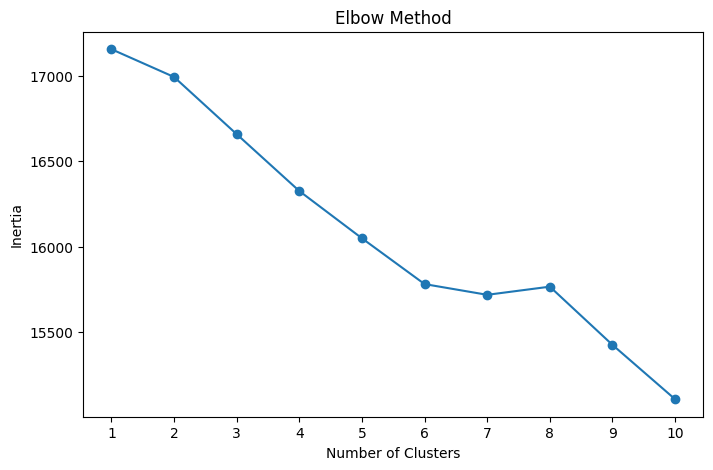

In [73]:
# Preprocessing function
def preprocess_text(text):
    # Lowercase and tokenize
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# Apply preprocessing to the 'Description' column
refunds_data['Cleaned_Description'] = refunds_data['Description'].apply(preprocess_text)

# Convert descriptions into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(refunds_data['Cleaned_Description'])
# Calculate inertia for different cluster numbers
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.show()



In [74]:
# Perform clustering (e.g., K-Means)
kmeans = KMeans(n_clusters=6, random_state=42)  # Adjust clusters based on your data
refunds_data['Cluster'] = kmeans.fit_predict(tfidf_matrix)

/tmp/ipykernel_137892/567586693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refunds_data['Cluster'] = kmeans.fit_predict(tfidf_matrix)


/tmp/ipykernel_137892/1230466287.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refunds_data['PCA1'] = reduced_data[:, 0]
/tmp/ipykernel_137892/1230466287.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refunds_data['PCA2'] = reduced_data[:, 1]


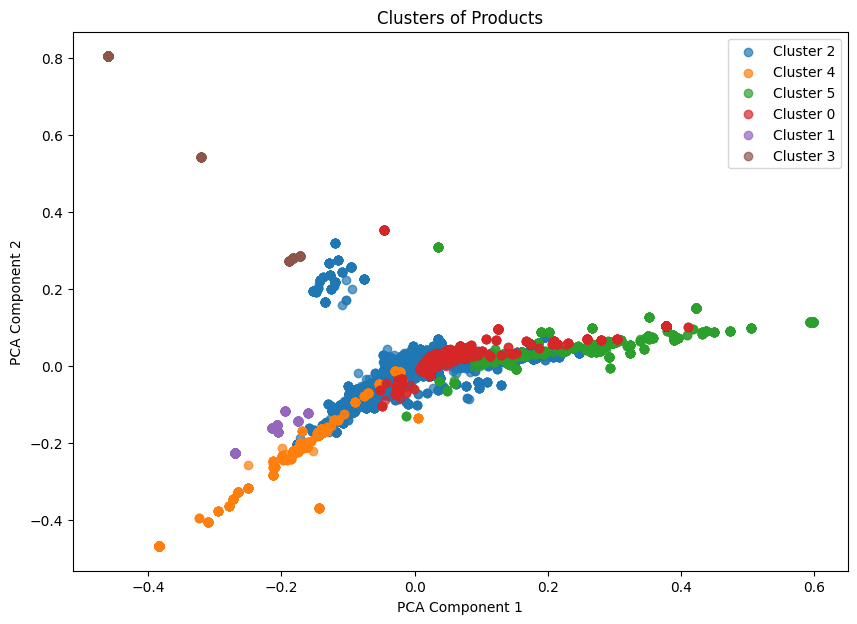

In [75]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Add the reduced coordinates to the DataFrame
refunds_data['PCA1'] = reduced_data[:, 0]
refunds_data['PCA2'] = reduced_data[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 7))
for cluster in refunds_data['Cluster'].unique():
    cluster_data = refunds_data[refunds_data['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('Clusters of Products')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [77]:
# Create separate DataFrames for each cluster
clusters = {}
for cluster in refunds_data['Cluster'].unique():
    clusters[cluster] = refunds_data[refunds_data['Cluster'] == cluster]

In [89]:
# Cluster 0 - Kitchen/ 1 - Lights/ 2 - Potting/GlassPaper/ 3 - Regency Cakestand/ 4- Hanging/ 5 - Red and Spotty

clusters[3]

Invoice StockCode                       Description  Quantity  \
107291  C503210     22423          REGENCY CAKESTAND 3 TIER        -1   
107659  C503249     22423          REGENCY CAKESTAND 3 TIER        -1   
116511  C504359     22423          REGENCY CAKESTAND 3 TIER        -4   
118557  C504570     22423          REGENCY CAKESTAND 3 TIER        -2   
125291  C505353     22423          REGENCY CAKESTAND 3 TIER        -1   
...         ...       ...                               ...       ...   
776361  C579945     22697   GREEN REGENCY TEACUP AND SAUCER        -1   
776362  C579945     22699  ROSES REGENCY TEACUP AND SAUCER         -1   
781306  C580507     22423          REGENCY CAKESTAND 3 TIER        -1   
790287  C581228     22423          REGENCY CAKESTAND 3 TIER        -6   
790360  C581235     22423          REGENCY CAKESTAND 3 TIER        -1   

               InvoiceDate  Price  Customer ID         Country  Revenue  \
107291 2010-03-30 15:57:00  12.75      13371.0  United Kingdom   -12.75   
107659 2010-03-31 10:24:00  12.75      12533.0         Germany   -12.75   
116511 2010-04-13 10:31:00  12.75      13767.0  United Kingdom   -51.00   
118557 2010-04-14 14:23:00  10.95      17511.0  United Kingdom   -21.90   
125291 2010-04-21 14:40:00  12.75      12402.0         Belgium   -12.75   
...                    ...    ...          ...             ...      ...   
776361 2011-12-01 10:41:00   2.95      15993.0  United Kingdom    -2.95   
776362 2011-12-01 10:41:00   2.95      15993.0  United Kingdom    -2.95   
781306 2011-12-04 13:37:00  12.75      15867.0  United Kingdom   -12.75   
790287 2011-12-08 10:06:00  10.95      16019.0  United Kingdom   -65.70   
790360 2011-12-08 10:34:00  12.75      15950.0  United Kingdom   -12.75   

                Cleaned_Description  Cluster      PCA1      PCA2  
107291       regency cakestand tier        3 -0.460685  0.803869  
107659       regency cakestand tier        3 -0.460685  0.803869  
116511       regency cakestand tier        3 -0.460685  0.803869  
118557       regency cakestand tier        3 -0.460685  0.803869  
125291       regency cakestand tier        3 -0.460685  0.803869  
...                             ...      ...       ...       ...  
776361  green regency teacup saucer        3 -0.182390  0.279078  
776362   rose regency teacup saucer        3 -0.172263  0.284661  
781306       regency cakestand tier        3 -0.460685  0.803869  
790287       regency cakestand tier        3 -0.460685  0.803869  
790360       regency cakestand tier        3 -0.460685  0.803869  

[547 rows x 13 columns]

In [155]:
total_refunds = refunds_data.groupby('Customer ID')['Revenue'].sum().reindex(all_customers, fill_value=0)

In [156]:
refunds_data

Invoice StockCode                       Description  Quantity  \
175     C489449     22087          PAPER BUNTING WHITE LACE       -12   
176     C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
177     C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
178     C489449     21896                POTTING SHED TWINE        -6   
179     C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...         ...       ...                               ...       ...   
793207  C581490     22178   VICTORIAN GLASS HANGING T-LIGHT       -12   
793208  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
793456  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
793457  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
793458  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  Price  Customer ID         Country  Revenue  
175    2009-12-01 10:33:00   2.95      16321.0       Australia   -35.40  
176    2009-12-01 10:33:00   1.65      16321.0       Australia    -9.90  
177    2009-12-01 10:33:00   4.25      16321.0       Australia   -17.00  
178    2009-12-01 10:33:00   2.10      16321.0       Australia   -12.60  
179    2009-12-01 10:33:00   2.95      16321.0       Australia   -35.40  
...                    ...    ...          ...             ...      ...  
793207 2011-12-09 09:57:00   1.95      14397.0  United Kingdom   -23.40  
793208 2011-12-09 09:57:00   0.83      14397.0  United Kingdom    -9.13  
793456 2011-12-09 11:57:00  10.95      15311.0  United Kingdom   -54.75  
793457 2011-12-09 11:58:00   1.25      17315.0  United Kingdom    -1.25  
793458 2011-12-09 11:58:00   1.25      17315.0  United Kingdom    -6.25  

[17480 rows x 9 columns]

In [157]:
total_refunds

Customer ID
13085.0    -143.70
13078.0    -648.62
15362.0       0.00
18102.0   -2578.40
12682.0     -88.10
            ...   
14578.0       0.00
16000.0       0.00
13436.0       0.00
15520.0       0.00
12713.0       0.00
Name: Revenue, Length: 5596, dtype: float64

In [158]:
refund_frequency = refunds_data.groupby('Customer ID').size().reindex(all_customers, fill_value=0)
refund_frequency

Customer ID
13085.0     7
13078.0    54
15362.0     0
18102.0     4
12682.0     3
           ..
14578.0     0
16000.0     0
13436.0     0
15520.0     0
12713.0     0
Length: 5596, dtype: int64

In [159]:
# Extract all unique year-month combinations from the data
year_months = data['InvoiceDate'].dt.to_period('M').unique()
# Calculate first two weeks and last two weeks start and end dates for each month
first_two_weeks_dates = []
last_two_weeks_dates = []
for year_month in year_months:
    start_date = year_month.start_time
    end_first_two_weeks = start_date + timedelta(days=13)
    end_last_two_weeks = year_month.end_time
    start_last_two_weeks = end_last_two_weeks - timedelta(days=13)
    first_two_weeks_dates.append((start_date, end_first_two_weeks))
    last_two_weeks_dates.append((start_last_two_weeks, end_last_two_weeks))

In [160]:
item_refunds_counts = refunds_data.groupby(['Customer ID', 'StockCode']).size().unstack(fill_value=0)

In [161]:
item_refunds_counts.sum(axis=1).reindex(all_customers, fill_value=0)

Customer ID
13085.0     7
13078.0    54
15362.0     0
18102.0     4
12682.0     3
           ..
14578.0     0
16000.0     0
13436.0     0
15520.0     0
12713.0     0
Length: 5596, dtype: int64

In [162]:
total_refunds = refunds_data.groupby('Customer ID')['Revenue'].sum()
total_refunds[total_refunds<-70000]

Customer ID
12346.0   -77183.6
Name: Revenue, dtype: float64

In [163]:
data[data["Customer ID"]==16446]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country, Revenue]
Index: []

In [164]:
#pd.reset_option('display.max_rows')

In [165]:
# Add discount flag to the data
discount_data = data[data['StockCode']=="D"]
discount_data[discount_data['Customer ID']==15299]

Invoice StockCode Description  Quantity         InvoiceDate  Price  \
712     C489535         D    Discount        -1 2009-12-01 12:11:00   9.00   
713     C489535         D    Discount        -1 2009-12-01 12:11:00  19.00   
449292  C543758         D    Discount        -1 2011-02-11 15:07:00  65.91   

        Customer ID         Country  Revenue  
712         15299.0  United Kingdom    -9.00  
713         15299.0  United Kingdom   -19.00  
449292      15299.0  United Kingdom   -65.91

In [166]:
# Discount frequency
discount_frequency = discount_data.groupby('Customer ID').size().reindex(all_customers, fill_value=0)

discount_frequency


Customer ID
13085.0    0
13078.0    0
15362.0    0
18102.0    3
12682.0    0
          ..
14578.0    0
16000.0    0
13436.0    0
15520.0    0
12713.0    0
Length: 5596, dtype: int64

In [167]:
# Check if Customer ID 152911 exists in discount_frequency and display its value
if 15299 in discount_frequency.index:
    print("Discount frequency for Customer ID 152911:", discount_frequency.loc[15299])
else:
    print("Customer ID 152911 not found in discount_frequency.")


Discount frequency for Customer ID 152911: 3


In [168]:
# Discount monetary value
discount_monetary_value = discount_data.groupby('Customer ID')['Revenue'].sum().reindex(all_customers, fill_value=0)

In [169]:
discount_monetary_value

Customer ID
13085.0       0.00
13078.0       0.00
15362.0       0.00
18102.0   -1228.42
12682.0       0.00
            ...   
14578.0       0.00
16000.0       0.00
13436.0       0.00
15520.0       0.00
12713.0       0.00
Name: Revenue, Length: 5596, dtype: float64

In [170]:
weekdays_data = data[data['InvoiceDate'].dt.weekday < 5]

In [171]:
weekdays_data

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
793642  581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
793643  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
793644  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
793645  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
793646  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Price  Customer ID         Country  Revenue  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00  
...                    ...    ...          ...             ...      ...  
793642 2011-12-09 12:50:00   0.85      12680.0          France    10.20  
793643 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
793644 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793645 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793646 2011-12-09 12:50:00   4.95      12680.0          France    14.85  

[662380 rows x 9 columns]

In [172]:
# Filter out refund transactions where the 'Invoice' starts with 'C'
first_date = data["InvoiceDate"].min()
end_date = data['InvoiceDate'].max()    
refunds_data = data[(data['Invoice'].str.startswith('C'))&(data['StockCode'] != 'D')]

# Calculate refund-related features directly and add to the rfm dataset
last_refund_date = refunds_data.groupby('Customer ID')['InvoiceDate'].max().reindex(all_customers, fill_value=pd.NaT)
refund_recency = (end_date - last_refund_date).dt.days.fillna((end_date - first_date).days)

In [11]:
def calculate_rfm_features(m_data, all_customers):
    end_date = m_data['InvoiceDate'].max()
    first_date = m_data["InvoiceDate"].min()

    data = m_data[~m_data['Invoice'].str.startswith('C')]
    # Calculate RFM features
    rfm = data.groupby('Customer ID').agg({
        'InvoiceDate': [
            lambda x: (end_date - x.max()).days,  # Recency
            lambda x: (end_date - x.min()).days,  # T
        ],
        'Invoice': 'count',  # Frequency
        'Revenue': ['mean', 'sum', 'min', 'max'],  # Monetary value
        'StockCode': 'nunique',  # Number of Unique Items
        'Price': ['mean', 'min', 'max', 'var','sum'],  # Mean, Min, Max, and Variance of Unit Price
        'Quantity': 'sum',  # Total Quantity
        'Country': 'nunique',  # Unique number of countries
    })
    rfm.columns = [
        'Recency', 'T', 'Frequency', 'Monetary_Mean', 'Monetary_Sum', 'Monetary_Min', 'Monetary_Max',
        'Unique_Items', 'UnitPrice_Mean', 'UnitPrice_Min', 'UnitPrice_Max', 'UnitPrice_Var','Total_Price_Sum',
        'Total_Quantity', 'Unique_Countries'
    ]

    # Extract all unique year-month combinations from the data
    year_months = m_data['InvoiceDate'].dt.to_period('M').unique()
    
    # Calculate first two weeks and last two weeks start and end dates for each month
    first_two_weeks_dates = []
    last_two_weeks_dates = []
    for year_month in year_months:
        start_date = year_month.start_time
        end_first_two_weeks = start_date + timedelta(days=13)
        end_last_two_weeks = year_month.end_time
        start_last_two_weeks = end_last_two_weeks - timedelta(days=13)
        first_two_weeks_dates.append((start_date, end_first_two_weeks))
        last_two_weeks_dates.append((start_last_two_weeks, end_last_two_weeks))
    
    # Filter the data to get transactions within the first two weeks
    first_two_weeks_data = pd.concat([
        data[(data['InvoiceDate'] >= start_date) & (data['InvoiceDate'] <= end_date)]
        for start_date, end_date in first_two_weeks_dates
    ])
    
    freq_first_two_weeks = first_two_weeks_data.groupby('Customer ID').size().reindex(all_customers, fill_value=0)
    monetary_first_two_weeks = first_two_weeks_data.groupby('Customer ID')['Revenue'].sum().reindex(all_customers, fill_value=0)
    quantity_first_two_weeks = first_two_weeks_data.groupby('Customer ID')['Quantity'].sum().reindex(all_customers, fill_value=0)
    
    # Filter the data to get transactions within the last two weeks
    last_two_weeks_data = pd.concat([
        data[(data['InvoiceDate'] >= start_date) & (data['InvoiceDate'] <= end_date)]
        for start_date, end_date in last_two_weeks_dates
    ])
    freq_last_two_weeks = last_two_weeks_data.groupby('Customer ID').size().reindex(all_customers, fill_value=0)
    monetary_last_two_weeks = last_two_weeks_data.groupby('Customer ID')['Revenue'].sum().reindex(all_customers, fill_value=0)
    quantity_last_two_weeks = last_two_weeks_data.groupby('Customer ID')['Quantity'].sum().reindex(all_customers, fill_value=0)

    # Frequency and monetary value for weekdays
    weekdays_data = data[data['InvoiceDate'].dt.weekday < 5]
    freq_weekdays = weekdays_data.groupby('Customer ID').size().reindex(all_customers, fill_value=0)
    monetary_weekdays = weekdays_data.groupby('Customer ID')['Revenue'].sum().reindex(all_customers, fill_value=0)
    quantity_weekdays = weekdays_data.groupby('Customer ID')['Quantity'].sum().reindex(all_customers, fill_value=0)

    # Frequency and monetary value for weekends
    weekends_data = data[data['InvoiceDate'].dt.weekday >= 5]
    freq_weekends = weekends_data.groupby('Customer ID').size().reindex(all_customers, fill_value=0)
    monetary_weekends = weekends_data.groupby('Customer ID')['Revenue'].sum().reindex(all_customers, fill_value=0)
    quantity_weekends = weekends_data.groupby('Customer ID')['Quantity'].sum().reindex(all_customers, fill_value=0)

    # Average frequency (number of invoices per period)
    total_periods = (data['InvoiceDate'].max() - data['InvoiceDate'].min()).days / 30.0
    avg_frequency = rfm['Frequency'] / total_periods
    avg_frequency = avg_frequency.reindex(all_customers, fill_value=0)

    # Calculate days between orders and its statistics
    days_between_orders = data.groupby('Customer ID')['InvoiceDate'].apply(lambda x: x.diff().dt.days.dropna())
    mean_days_between_orders = days_between_orders.groupby('Customer ID').mean().reindex(all_customers, fill_value=0)
    std_days_between_orders = days_between_orders.groupby('Customer ID').std().fillna(0).reindex(all_customers, fill_value=0)
    max_days_between_orders = days_between_orders.groupby('Customer ID').max().reindex(all_customers, fill_value=0)
    
    # Count occurrences of each item for each customer
    item_counts = data.groupby(['Customer ID', 'StockCode']).size().unstack(fill_value=0)

    # Calculate repurchase metrics
    repurchase_counts = (item_counts > 1).sum(axis=1)  # Count of repurchased items
    total_counts = item_counts.sum(axis=1)  # Total items purchased
    repurchase_ratio = repurchase_counts / total_counts  # Relative repurchase ratio
    repurchase_counts = repurchase_counts.reindex(all_customers, fill_value=0)
    repurchase_ratio = repurchase_ratio.reindex(all_customers, fill_value=0)

    # Filter out refund transactions where the 'Invoice' starts with 'C'
    refunds_data = m_data[(m_data['Invoice'].str.startswith('C'))&(m_data['StockCode'] != 'D')]

     # Calculate refund-related features directly and add to the rfm dataset
    last_refund_date = refunds_data.groupby('Customer ID')['InvoiceDate'].max().reindex(all_customers, fill_value=pd.NaT)
    refund_recency = (end_date - last_refund_date).dt.days.fillna((end_date - first_date).days)

    refund_frequency = refunds_data.groupby('Customer ID').size().reindex(all_customers, fill_value=0)
    refund_monetary_mean = refunds_data.groupby('Customer ID')['Revenue'].mean().reindex(all_customers, fill_value=0)
    refund_monetary_sum = refunds_data.groupby('Customer ID')['Revenue'].sum().reindex(all_customers, fill_value=0)
    refund_monetary_min = refunds_data.groupby('Customer ID')['Revenue'].min().reindex(all_customers, fill_value=0)
    refund_monetary_max = refunds_data.groupby('Customer ID')['Revenue'].max().reindex(all_customers, fill_value=0)
    refund_unique_items = refunds_data.groupby('Customer ID')['StockCode'].nunique().reindex(all_customers, fill_value=0)
    refund_unitprice_mean = refunds_data.groupby('Customer ID')['Price'].mean().reindex(all_customers, fill_value=0)
    refund_unitprice_min = refunds_data.groupby('Customer ID')['Price'].min().reindex(all_customers, fill_value=0)
    refund_unitprice_max = refunds_data.groupby('Customer ID')['Price'].max().reindex(all_customers, fill_value=0)
    refund_unitprice_var = refunds_data.groupby('Customer ID')['Price'].var().reindex(all_customers, fill_value=0)
    refund_total_price_sum = refunds_data.groupby('Customer ID')['Revenue'].sum().reindex(all_customers, fill_value=0)
    refund_total_quantity = refunds_data.groupby('Customer ID')['Quantity'].sum().reindex(all_customers, fill_value=0)
    

    # 3. Refunds to Purchases Ratio
    purchase_count = data.groupby('Customer ID').size().reindex(all_customers, fill_value=0)
    refund_to_purchase_ratio = (refund_frequency / purchase_count).reindex(all_customers, fill_value=0)

    # 5. Refund Frequency in Specific Time Periods (First and Last Two Weeks)
    first_two_weeks_refunds = pd.concat([
        refunds_data[(refunds_data['InvoiceDate'] >= start_date) & (refunds_data['InvoiceDate'] <= end_date)]
        for start_date, end_date in first_two_weeks_dates
    ])
    freq_first_two_weeks_refunds = first_two_weeks_refunds.groupby('Customer ID').size().reindex(all_customers, fill_value=0)
    

    last_two_weeks_refunds = pd.concat([
        refunds_data[(refunds_data['InvoiceDate'] >= start_date) & (refunds_data['InvoiceDate'] <= end_date)]
        for start_date, end_date in last_two_weeks_dates
    ])
    freq_last_two_weeks_refunds = last_two_weeks_refunds.groupby('Customer ID').size().reindex(all_customers, fill_value=0)

    # 6. Refund Monetary Value in Specific Time Periods
    monetary_first_two_weeks_refunds = first_two_weeks_refunds.groupby('Customer ID')['Revenue'].sum().reindex(all_customers, fill_value=0)
    monetary_last_two_weeks_refunds = last_two_weeks_refunds.groupby('Customer ID')['Revenue'].sum().reindex(all_customers, fill_value=0)
    quantity_first_two_weeks_refunds = first_two_weeks_refunds.groupby('Customer ID')['Quantity'].sum().reindex(all_customers, fill_value=0)
    quantity_last_two_weeks_refunds = last_two_weeks_refunds.groupby('Customer ID')['Quantity'].sum().reindex(all_customers, fill_value=0)

    # 8. Refunds for Weekdays and Weekends
    weekdays_refunds_data = refunds_data[refunds_data['InvoiceDate'].dt.weekday < 5]
    freq_weekdays_refunds = weekdays_refunds_data.groupby('Customer ID').size().reindex(all_customers, fill_value=0)
    monetary_weekdays_refunds = weekdays_refunds_data.groupby('Customer ID')['Revenue'].sum().reindex(all_customers, fill_value=0)
    quantity_weekdays_refunds = weekdays_refunds_data.groupby('Customer ID')['Quantity'].sum().reindex(all_customers, fill_value=0)

    weekends_refunds_data = refunds_data[refunds_data['InvoiceDate'].dt.weekday >= 5]
    freq_weekends_refunds = weekends_refunds_data.groupby('Customer ID').size().reindex(all_customers, fill_value=0)
    monetary_weekends_refunds = weekends_refunds_data.groupby('Customer ID')['Revenue'].sum().reindex(all_customers, fill_value=0)
    quantity_weekends_refunds = weekends_refunds_data.groupby('Customer ID')['Quantity'].sum().reindex(all_customers, fill_value=0)
    

    discount_data = data[data['StockCode']=="D"]

    # Discount frequency
    discount_frequency = discount_data.groupby('Customer ID').size().reindex(all_customers, fill_value=0)

    # Discount monetary value
    discount_monetary_value = discount_data.groupby('Customer ID')['Revenue'].sum().reindex(all_customers, fill_value=0)

    # Discount monetary value
    discount_quantity_value = discount_data.groupby('Customer ID')['Quantity'].sum().reindex(all_customers, fill_value=0)

    # Discount ratio (discounted transactions to total transactions)
    discount_ratio = (discount_frequency / rfm['Frequency']).fillna(0)

    # Discount to total revenue ratio
    discount_revenue_ratio = (discount_monetary_value / rfm['Monetary_Sum']).fillna(0)

    # Ensure all customers are included
    rfm = rfm.reindex(all_customers)
    rfm["Recency"] = rfm['Recency'].fillna((end_date - first_date).days)

    # Add new features to RFM dataframe
    rfm['Frequency_First_Two_Weeks'] = freq_first_two_weeks.values
    rfm['Monetary_First_Two_Weeks'] = monetary_first_two_weeks.values
    rfm['Quantity_First_Two_Weeks'] = quantity_first_two_weeks.values
    rfm['Frequency_Last_Two_Weeks'] = freq_last_two_weeks.values
    rfm['Monetary_Last_Two_Weeks'] = monetary_last_two_weeks.values
    rfm['Quantity_Last_Two_Weeks'] = quantity_last_two_weeks.values
    rfm['Frequency_Weekdays'] = freq_weekdays.values
    rfm['Monetary_Weekdays'] = monetary_weekdays.values
    rfm['Quantity_Weekdays'] = quantity_weekdays.values
    rfm['Frequency_Weekends'] = freq_weekends.values
    rfm['Monetary_Weekends'] = monetary_weekends.values
    rfm['Quantity_Weekends'] = quantity_weekends.values
    rfm['Avg_Frequency'] = avg_frequency.values
    rfm['Mean_Days_Between_Orders'] = mean_days_between_orders.values
    rfm['Std_Days_Between_Orders'] = std_days_between_orders.values
    rfm['Max_Days_Between_Orders'] = max_days_between_orders.values
    rfm['Repurchase_Absolute'] = repurchase_counts.values
    rfm['Repurchase_Ratio'] = repurchase_ratio.values
    # Adding all refund features to RFM DataFrame
    rfm['Refund_Frequency'] = refund_frequency.values
    rfm['Refund_to_Purchase_Ratio'] = refund_to_purchase_ratio.values
    rfm['Frequency_First_Two_Weeks_Refunds'] = freq_first_two_weeks_refunds.values
    rfm['Monetary_First_Two_Weeks_Refunds'] = monetary_first_two_weeks_refunds.values
    rfm['Quantity_First_Two_Weeks_Refunds'] = quantity_first_two_weeks_refunds.values
    rfm['Frequency_Last_Two_Weeks_Refunds'] = freq_last_two_weeks_refunds.values
    rfm['Monetary_Last_Two_Weeks_Refunds'] = monetary_last_two_weeks_refunds.values
    rfm['Quantity_Last_Two_Weeks_Refunds'] = quantity_last_two_weeks_refunds.values
    rfm['Frequency_Weekdays_Refunds'] = freq_weekdays_refunds.values
    rfm['Monetary_Weekdays_Refunds'] = monetary_weekdays_refunds.values
    rfm['Quantity_Weekdays_Refunds'] = quantity_weekdays_refunds.values
    rfm['Frequency_Weekends_Refunds'] = freq_weekends_refunds.values
    rfm['Monetary_Weekends_Refunds'] = monetary_weekends_refunds.values
    rfm['Quantity_Weekends_Refunds'] = quantity_weekends_refunds.values
    rfm['Refund_Recency'] = refund_recency.values
    rfm['Refund_Monetary_Mean'] = refund_monetary_mean.values
    rfm['Refund_Monetary_Sum'] = refund_monetary_sum.values
    rfm['Refund_Monetary_Min'] = refund_monetary_min.values
    rfm['Refund_Monetary_Max'] = refund_monetary_max.values
    rfm['Refund_Unique_Items'] = refund_unique_items.values
    rfm['Refund_Unitprice_Mean'] = refund_unitprice_mean.values
    rfm['refund_unitprice_min'] = refund_unitprice_min.values
    rfm['refund_unitprice_max'] = refund_unitprice_max.values
    rfm['refund_unitprice_var'] = refund_unitprice_var.values
    rfm['refund_total_price_sum'] = refund_total_price_sum.values
    rfm['refund_total_quantity'] = refund_total_quantity.values
    # Adding discount features to RFM DataFrame
    rfm['Discount_Frequency'] = discount_frequency.values
    rfm['Discount_Monetary_Value'] = discount_monetary_value.values
    rfm['Discount_Ratio'] = discount_ratio.values
    rfm['Discount_Revenue_Ratio'] = discount_revenue_ratio.values
    rfm['Discount_Quantity_Value'] = discount_quantity_value.values
    
    # Reset index and return final RFM DataFrame
    rfm = rfm.reset_index()
    rfm.rename(columns={'index': 'Customer ID'}, inplace=True)
    rfm = rfm.fillna(0)
    return rfm


In [14]:
rfm = calculate_rfm_features(data, all_customers)

In [ ]:
import numpy as np

# Check for `inf` values in the dataset
inf_columns = rfm.columns[np.isinf(rfm).any()]
if inf_columns.empty:
    print("No infinite values found in the dataset.")
else:
    print("Columns with infinite values:", inf_columns)

    # Display rows with `inf` values
    print("Rows with `inf` values:")
    print(rfm[np.isinf(rfm).any(axis=1)])


No infinite values found in the dataset.


In [17]:
# Ensure Price and Revenue columns are strings or non-numeric data
rfm['Discount_Frequency'] = pd.to_numeric(rfm['Discount_Frequency'], errors='coerce')  # Convert to numeric, replace invalid values with NaN
rfm['Discount_Monetary_Value'] = pd.to_numeric(rfm['Discount_Monetary_Value'], errors='coerce')
rfm['Discount_Ratio'] = pd.to_numeric(rfm['Discount_Ratio'], errors='coerce')
rfm['Discount_Revenue_Ratio'] = pd.to_numeric(rfm['Discount_Revenue_Ratio'], errors='coerce')
rfm['Discount_Quantity_Value'] = pd.to_numeric(rfm['Discount_Quantity_Value'], errors='coerce')

# Round to 2 decimal places
rfm['Discount_Frequency'] = rfm['Discount_Frequency'].round(2)
rfm['Discount_Monetary_Value'] = rfm['Discount_Monetary_Value'].round(2)
rfm['Discount_Ratio'] = rfm['Discount_Ratio'].round(2)
rfm['Discount_Revenue_Ratio'] = rfm['Discount_Revenue_Ratio'].round(2)
rfm['Discount_Quantity_Value'] = rfm['Discount_Quantity_Value'].round(2)

In [18]:
rfm

Customer ID  Recency    T  Frequency  Monetary_Mean  Monetary_Sum  \
0         13085.0      157  738         84      28.967619       2433.28   
1         13078.0        2  738        791      36.685284      29018.06   
2         15362.0      448  738         40      15.327000        613.08   
3         18102.0        0  738       1040     558.641385     580987.04   
4         12682.0        3  738        941      22.036366      20736.22   
...           ...      ...  ...        ...            ...           ...   
5522      14578.0        2    2         24       7.026250        168.63   
5523      16000.0        2    2          9    1377.077778      12393.70   
5524      13436.0        1    1         12      16.407500        196.89   
5525      15520.0        1    1         18      19.083333        343.50   
5526      12713.0        0    0         37      21.474324        794.55   

      Monetary_Min  Monetary_Max  Unique_Items  UnitPrice_Mean  ...  \
0            10.20        100.80            50        3.561071  ...   
1             2.28        237.60           153        3.887446  ...   
2             6.30         35.80            38        3.612000  ...   
3             1.70       3884.00           382        3.794740  ...   
4             2.52        386.64           326        2.879957  ...   
...            ...           ...           ...             ...  ...   
5522          1.25         28.08            24        2.451250  ...   
5523        855.60       2046.00             9        3.345556  ...   
5524         10.20         25.50            12        5.830000  ...   
5525          9.48         34.68            18        1.724444  ...   
5526          5.04         71.70            37        2.084595  ...   

      refund_unitprice_min  refund_unitprice_max  refund_unitprice_var  \
0                     0.85                  2.95              0.485714   
1                     0.19                 12.75             11.671437   
2                     0.00                  0.00              0.000000   
3                     3.00                  4.58              0.832133   
4                     8.50                  9.95              0.700833   
...                    ...                   ...                   ...   
5522                  0.00                  0.00              0.000000   
5523                  0.00                  0.00              0.000000   
5524                  0.00                  0.00              0.000000   
5525                  0.00                  0.00              0.000000   
5526                  0.00                  0.00              0.000000   

      refund_total_price_sum  refund_total_quantity  Discount_Frequency  \
0                    -143.70                   -108                   0   
1                    -648.62                   -160                   0   
2                       0.00                      0                   0   
3                   -2578.40                   -712                   0   
4                     -88.10                     -9                   0   
...                      ...                    ...                 ...   
5522                    0.00                      0                   0   
5523                    0.00                      0                   0   
5524                    0.00                      0                   0   
5525                    0.00                      0                   0   
5526                    0.00                      0                   0   

      Discount_Monetary_Value  Discount_Ratio  Discount_Revenue_Ratio  \
0                         0.0             0.0                     0.0   
1                         0.0             0.0                     0.0   
2                         0.0             0.0                     0.0   
3                         0.0             0.0                     0.0   
4                         0.0             0.0                     0.0   
...                     

In [19]:
data

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
793275  581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
793276  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
793277  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
793278  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
793279  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Price  Customer ID         Country  Revenue  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00  
...                    ...    ...          ...             ...      ...  
793275 2011-12-09 12:50:00   0.85      12680.0          France    10.20  
793276 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
793277 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793278 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793279 2011-12-09 12:50:00   4.95      12680.0          France    14.85  

[793280 rows x 9 columns]

In [20]:
# Assuming 'rfm' DataFrame has been created in a previous code section
# List all column names in the rfm DataFrame to get an overview of the features

rfm_columns = rfm.columns.tolist()
rfm_columns


['Customer ID',
 'Recency',
 'T',
 'Frequency',
 'Monetary_Mean',
 'Monetary_Sum',
 'Monetary_Min',
 'Monetary_Max',
 'Unique_Items',
 'UnitPrice_Mean',
 'UnitPrice_Min',
 'UnitPrice_Max',
 'UnitPrice_Var',
 'Total_Price_Sum',
 'Total_Quantity',
 'Unique_Countries',
 'Frequency_First_Two_Weeks',
 'Monetary_First_Two_Weeks',
 'Quantity_First_Two_Weeks',
 'Frequency_Last_Two_Weeks',
 'Monetary_Last_Two_Weeks',
 'Quantity_Last_Two_Weeks',
 'Frequency_Weekdays',
 'Monetary_Weekdays',
 'Quantity_Weekdays',
 'Frequency_Weekends',
 'Monetary_Weekends',
 'Quantity_Weekends',
 'Avg_Frequency',
 'Mean_Days_Between_Orders',
 'Std_Days_Between_Orders',
 'Max_Days_Between_Orders',
 'Repurchase_Absolute',
 'Repurchase_Ratio',
 'Refund_Frequency',
 'Refund_to_Purchase_Ratio',
 'Frequency_First_Two_Weeks_Refunds',
 'Monetary_First_Two_Weeks_Refunds',
 'Quantity_First_Two_Weeks_Refunds',
 'Frequency_Last_Two_Weeks_Refunds',
 'Monetary_Last_Two_Weeks_Refunds',
 'Quantity_Last_Two_Weeks_Refunds',
 'Frequ

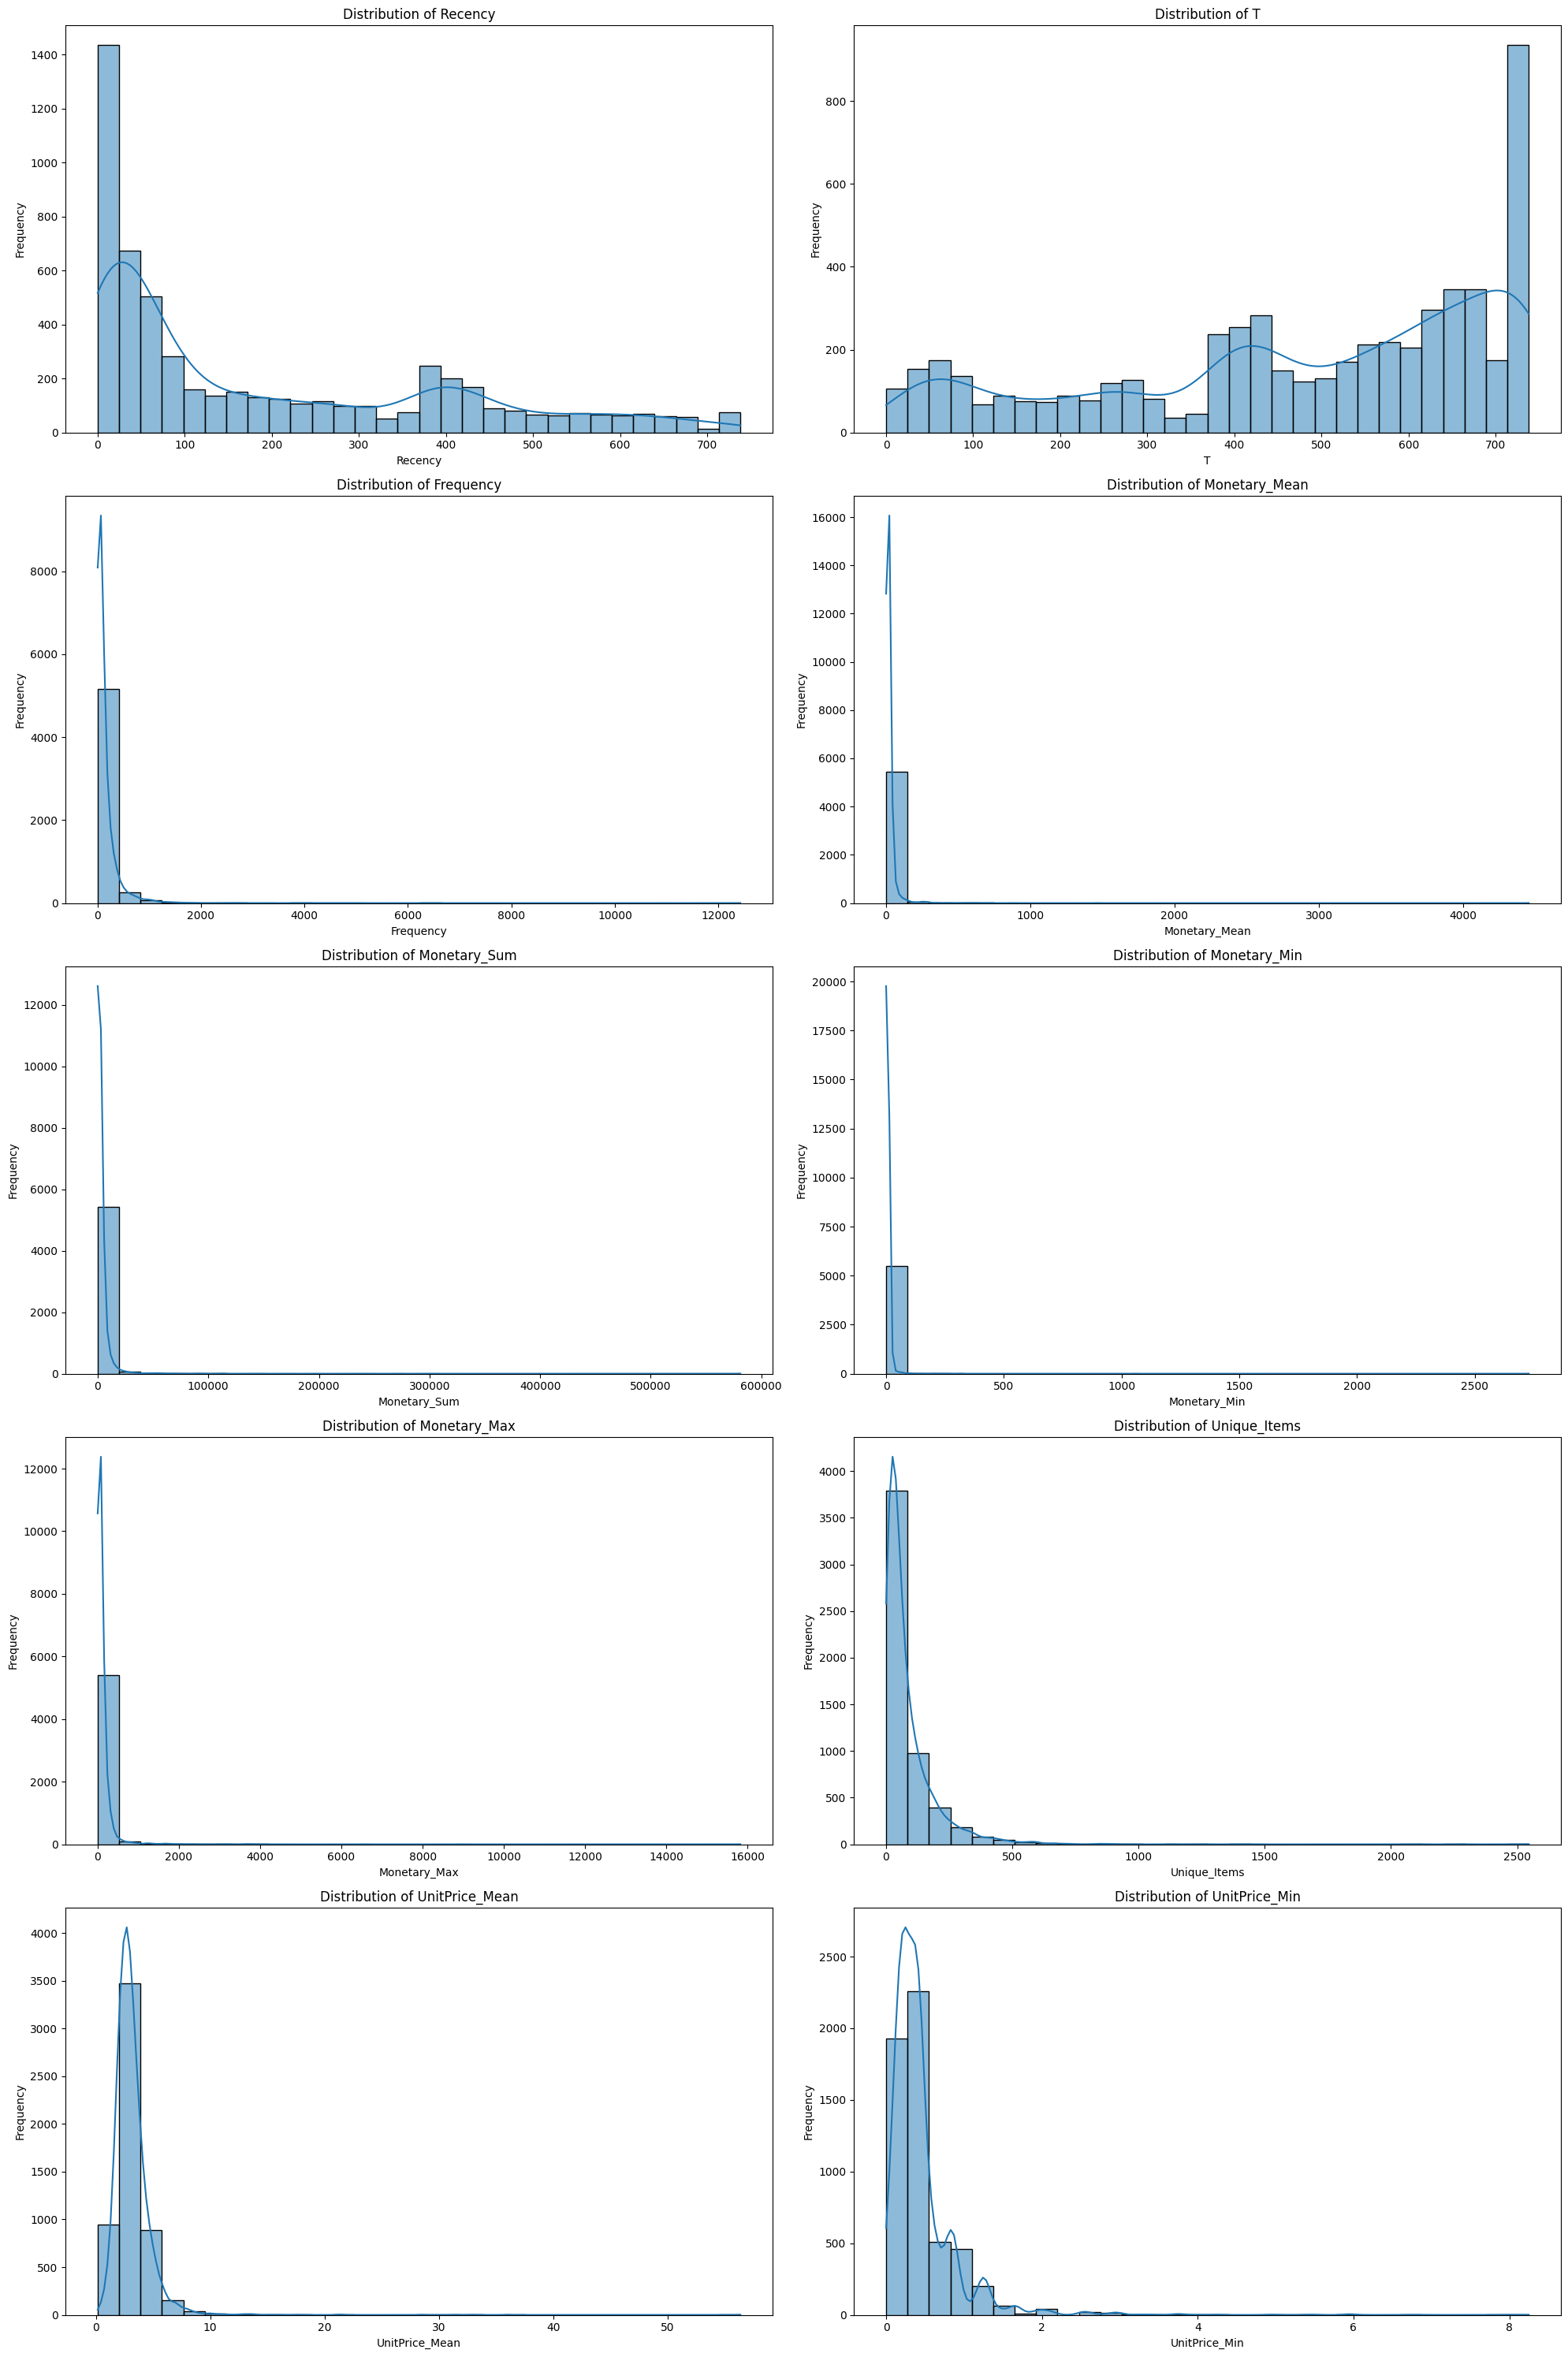

In [21]:
rfm_columns = [
 'Recency',
 'T',
 'Frequency',
 'Monetary_Mean',
 'Monetary_Sum',
 'Monetary_Min',
 'Monetary_Max',
 'Unique_Items',
 'UnitPrice_Mean',
 'UnitPrice_Min'
 ]

# Set up a plotting grid
n_cols = 2
n_rows = (len(rfm_columns) + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()

# Plot a distribution for each feature in `rfm_columns`
for i, col in enumerate(rfm_columns):
    sns.histplot(rfm[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


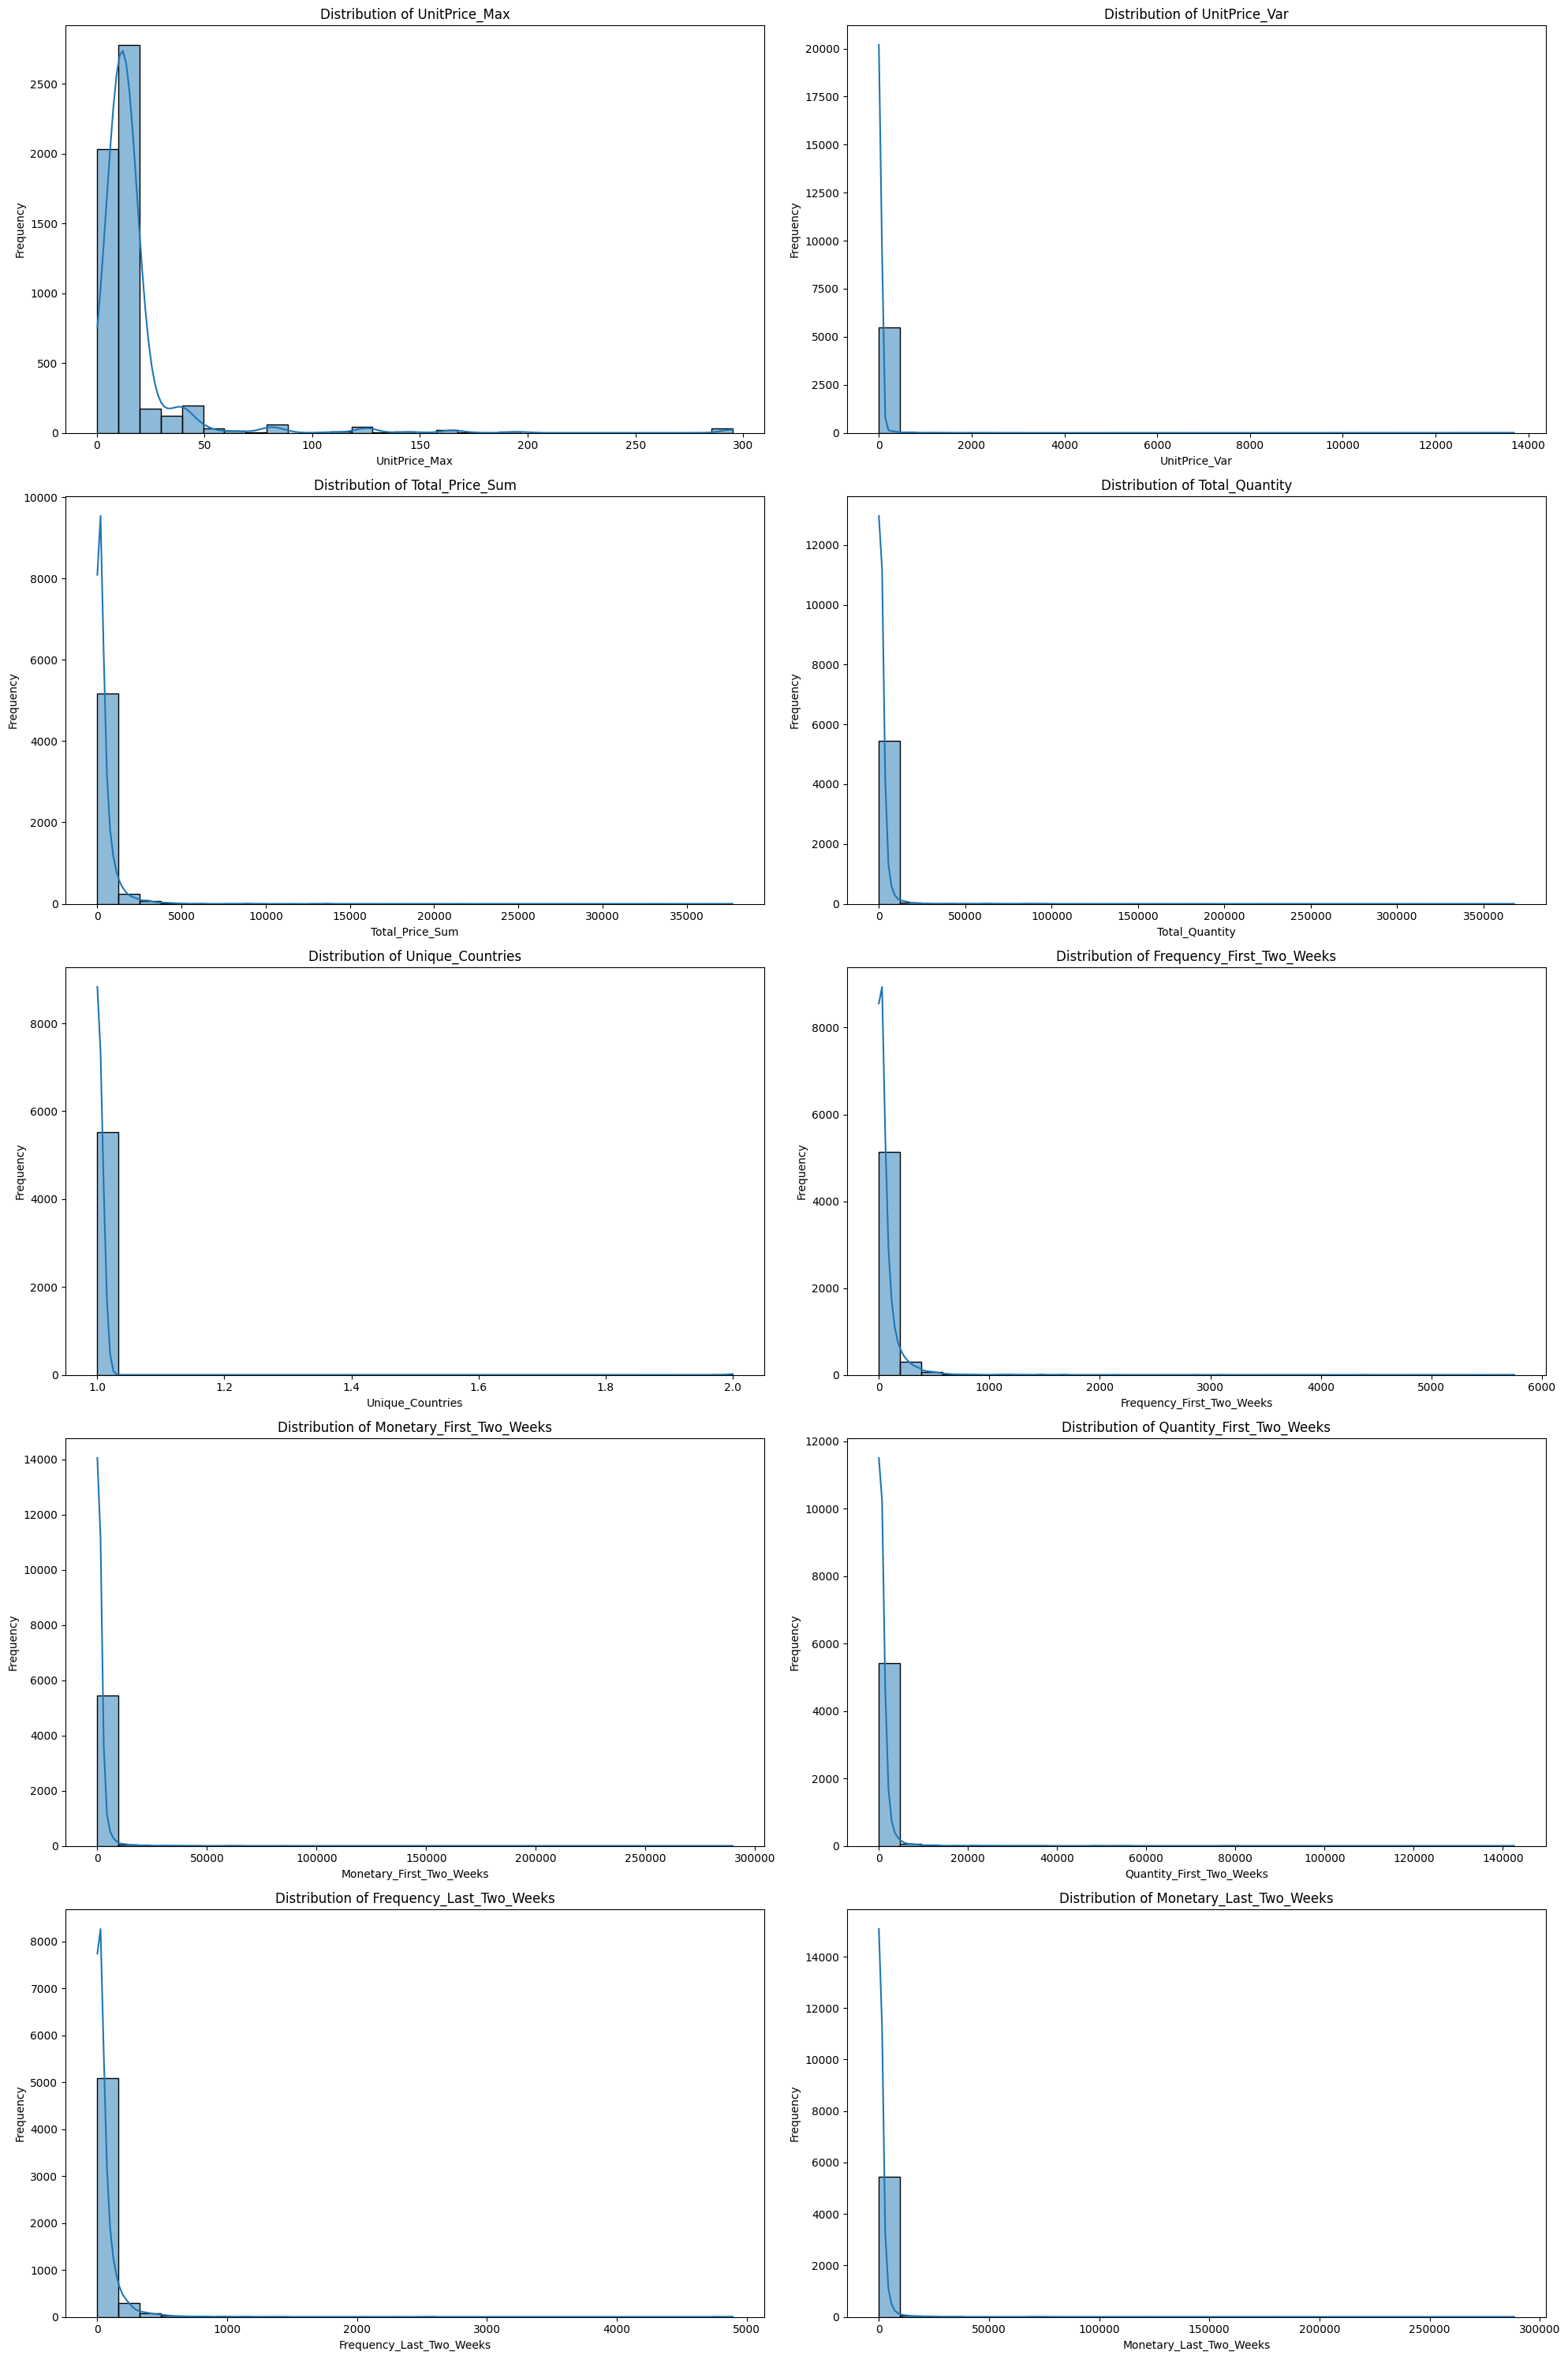

In [22]:
rfm_columns = [
 
 'UnitPrice_Max',
 'UnitPrice_Var',
 'Total_Price_Sum',
 'Total_Quantity',
 'Unique_Countries',
 'Frequency_First_Two_Weeks',
 'Monetary_First_Two_Weeks',
 'Quantity_First_Two_Weeks',
 'Frequency_Last_Two_Weeks',
 'Monetary_Last_Two_Weeks'
 ]

# Set up a plotting grid
n_cols = 2
n_rows = (len(rfm_columns) + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()

# Plot a distribution for each feature in `rfm_columns`
for i, col in enumerate(rfm_columns):
    sns.histplot(rfm[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


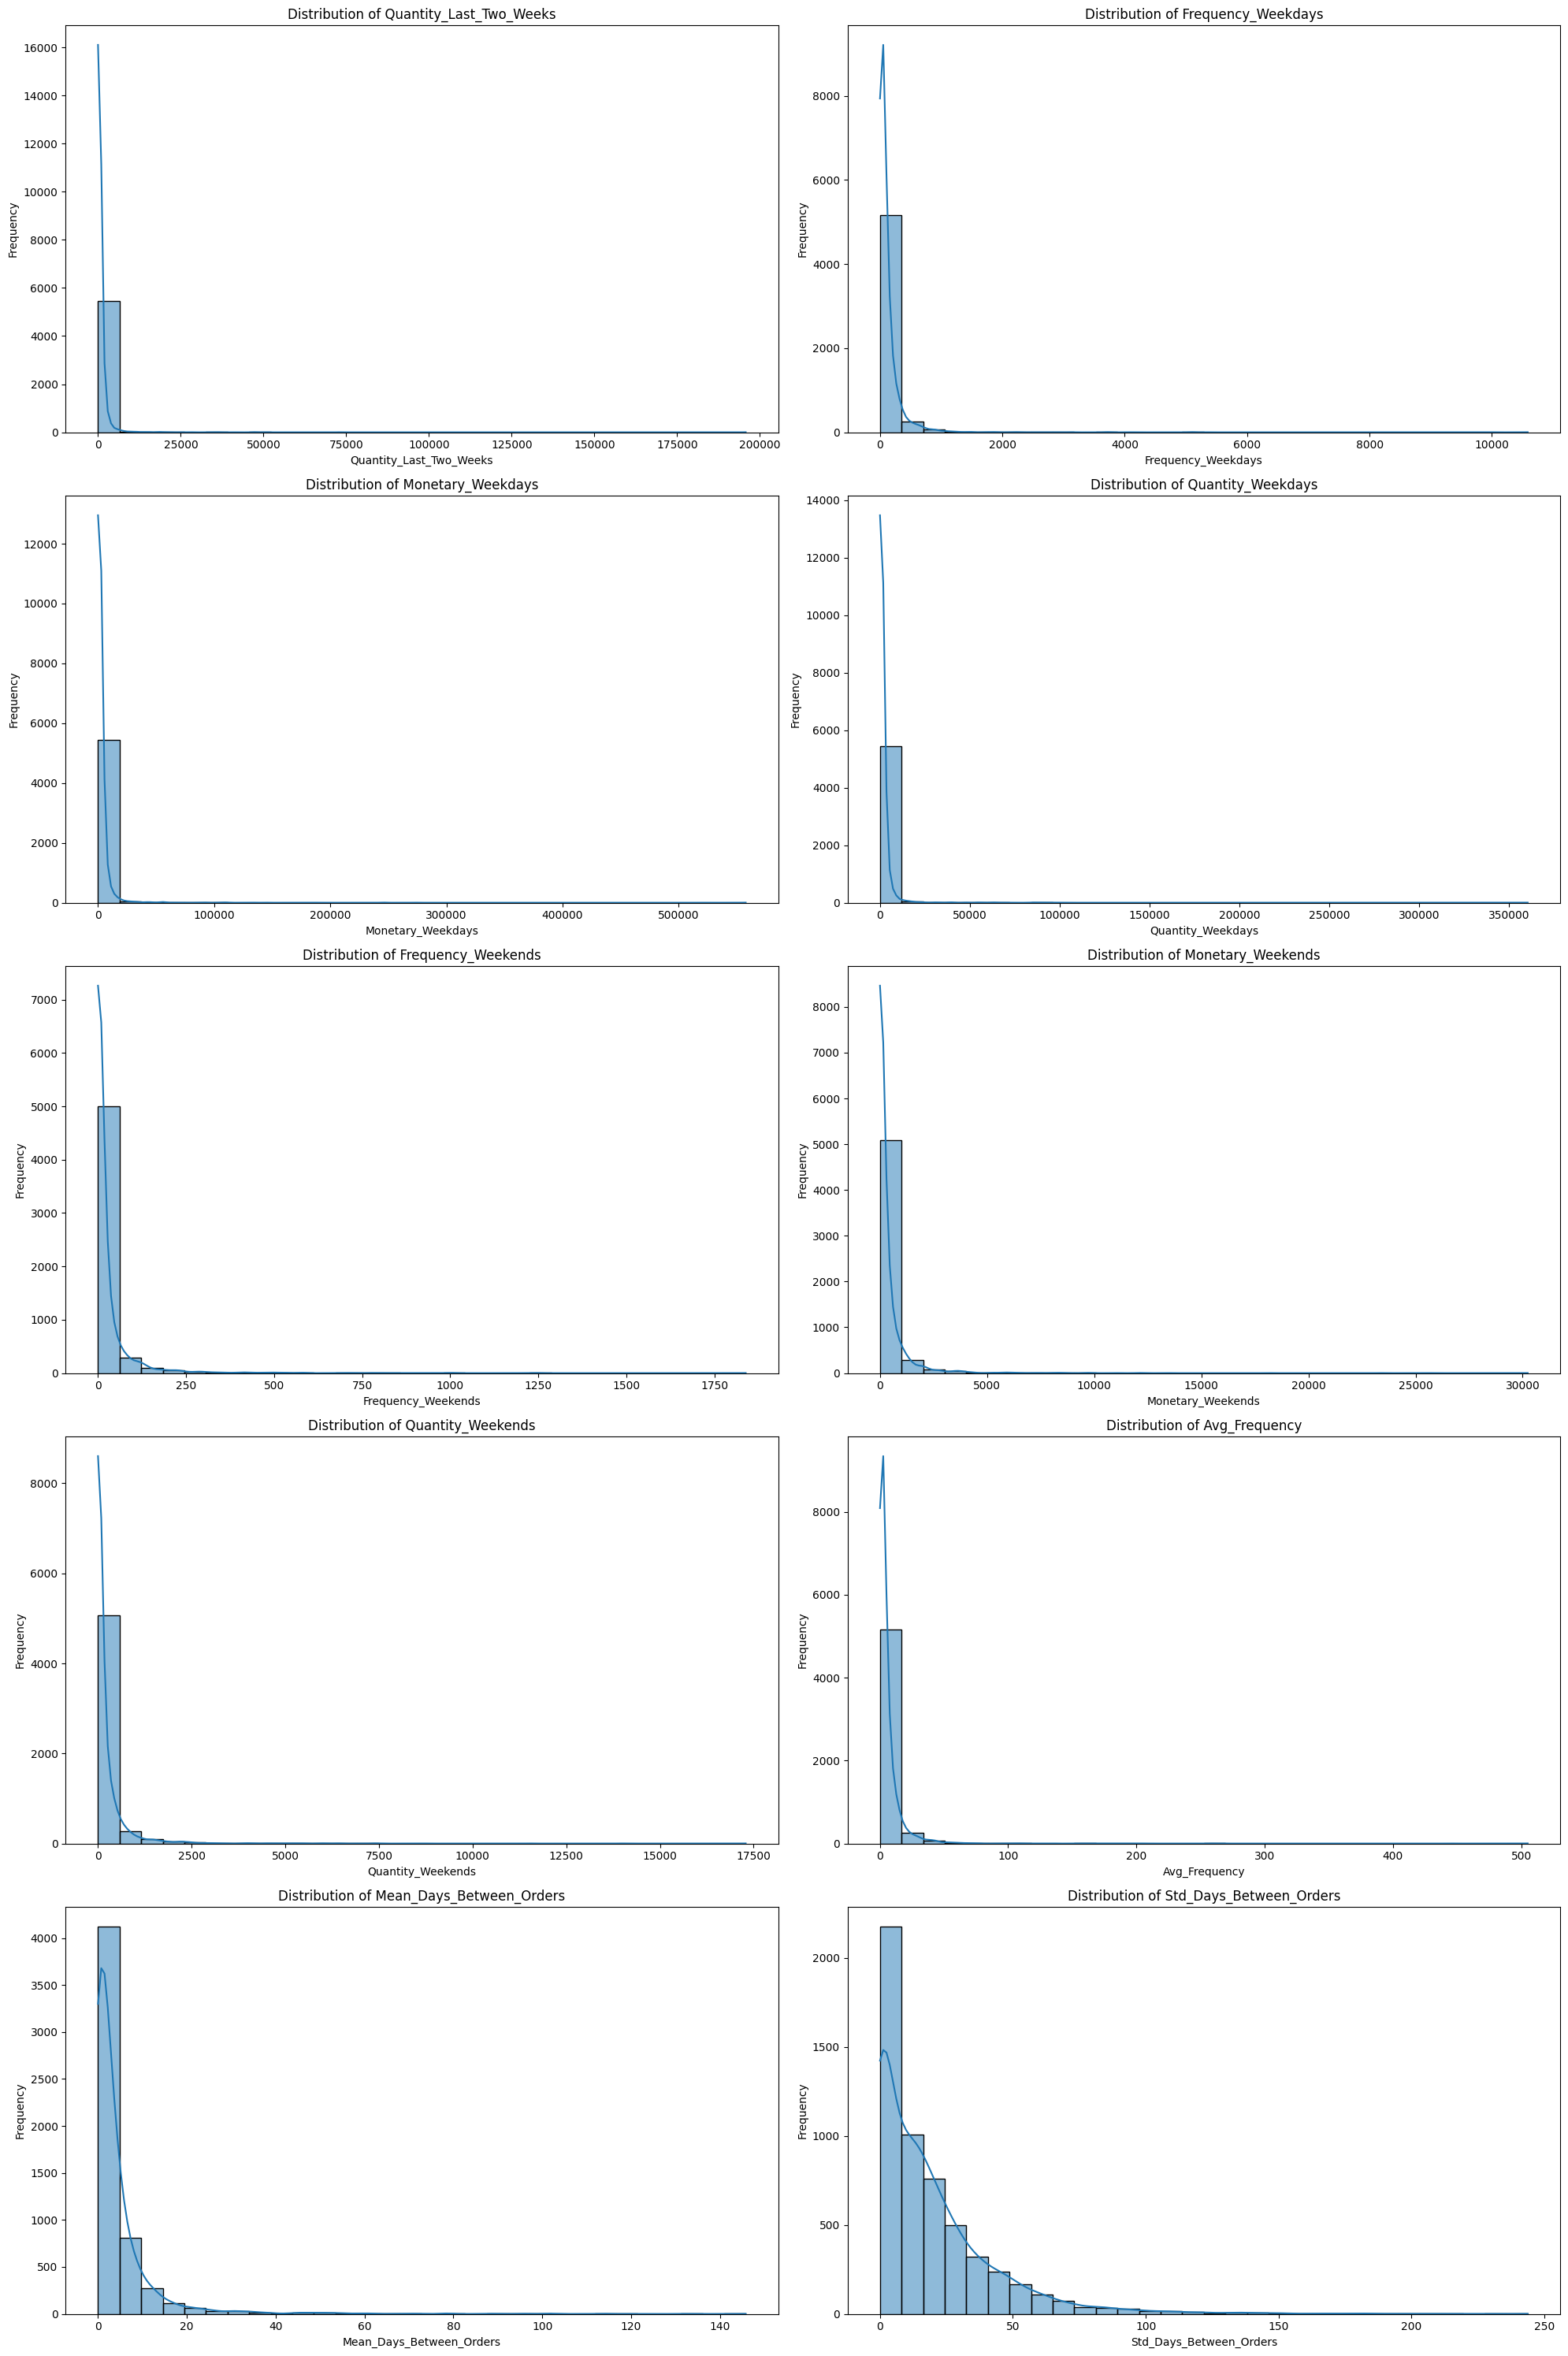

In [23]:
rfm_columns = [
 'Quantity_Last_Two_Weeks',
 'Frequency_Weekdays',
 'Monetary_Weekdays',
 'Quantity_Weekdays',
 'Frequency_Weekends',
 'Monetary_Weekends',
 'Quantity_Weekends',
 'Avg_Frequency',
 'Mean_Days_Between_Orders',
 'Std_Days_Between_Orders'
 ]

# Set up a plotting grid
n_cols = 2
n_rows = (len(rfm_columns) + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()

# Plot a distribution for each feature in `rfm_columns`
for i, col in enumerate(rfm_columns):
    sns.histplot(rfm[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [24]:
data[data['Customer ID']==12346]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country, Revenue]
Index: []

In [25]:
rfm[rfm['Customer ID']==12346]

Empty DataFrame
Columns: [Customer ID, Recency, T, Frequency, Monetary_Mean, Monetary_Sum, Monetary_Min, Monetary_Max, Unique_Items, UnitPrice_Mean, UnitPrice_Min, UnitPrice_Max, UnitPrice_Var, Total_Price_Sum, Total_Quantity, Unique_Countries, Frequency_First_Two_Weeks, Monetary_First_Two_Weeks, Quantity_First_Two_Weeks, Frequency_Last_Two_Weeks, Monetary_Last_Two_Weeks, Quantity_Last_Two_Weeks, Frequency_Weekdays, Monetary_Weekdays, Quantity_Weekdays, Frequency_Weekends, Monetary_Weekends, Quantity_Weekends, Avg_Frequency, Mean_Days_Between_Orders, Std_Days_Between_Orders, Max_Days_Between_Orders, Repurchase_Absolute, Repurchase_Ratio, Refund_Frequency, Refund_to_Purchase_Ratio, Frequency_First_Two_Weeks_Refunds, Monetary_First_Two_Weeks_Refunds, Quantity_First_Two_Weeks_Refunds, Frequency_Last_Two_Weeks_Refunds, Monetary_Last_Two_Weeks_Refunds, Quantity_Last_Two_Weeks_Refunds, Frequency_Weekdays_Refunds, Monetary_Weekdays_Refunds, Quantity_Weekdays_Refunds, Frequency_Weekends_Refunds, Monetary_Weekends_Refunds, Quantity_Weekends_Refunds, Refund_Recency, Refund_Monetary_Mean, Refund_Monetary_Sum, Refund_Monetary_Min, Refund_Monetary_Max, Refund_Unique_Items, Refund_Unitprice_Mean, refund_unitprice_min, refund_unitprice_max, refund_unitprice_var, refund_total_price_sum, refund_total_quantity, Discount_Frequency, Discount_Monetary_Value, Discount_Ratio, Discount_Revenue_Ratio, Discount_Quantity_Value]
Index: []

[0 rows x 65 columns]

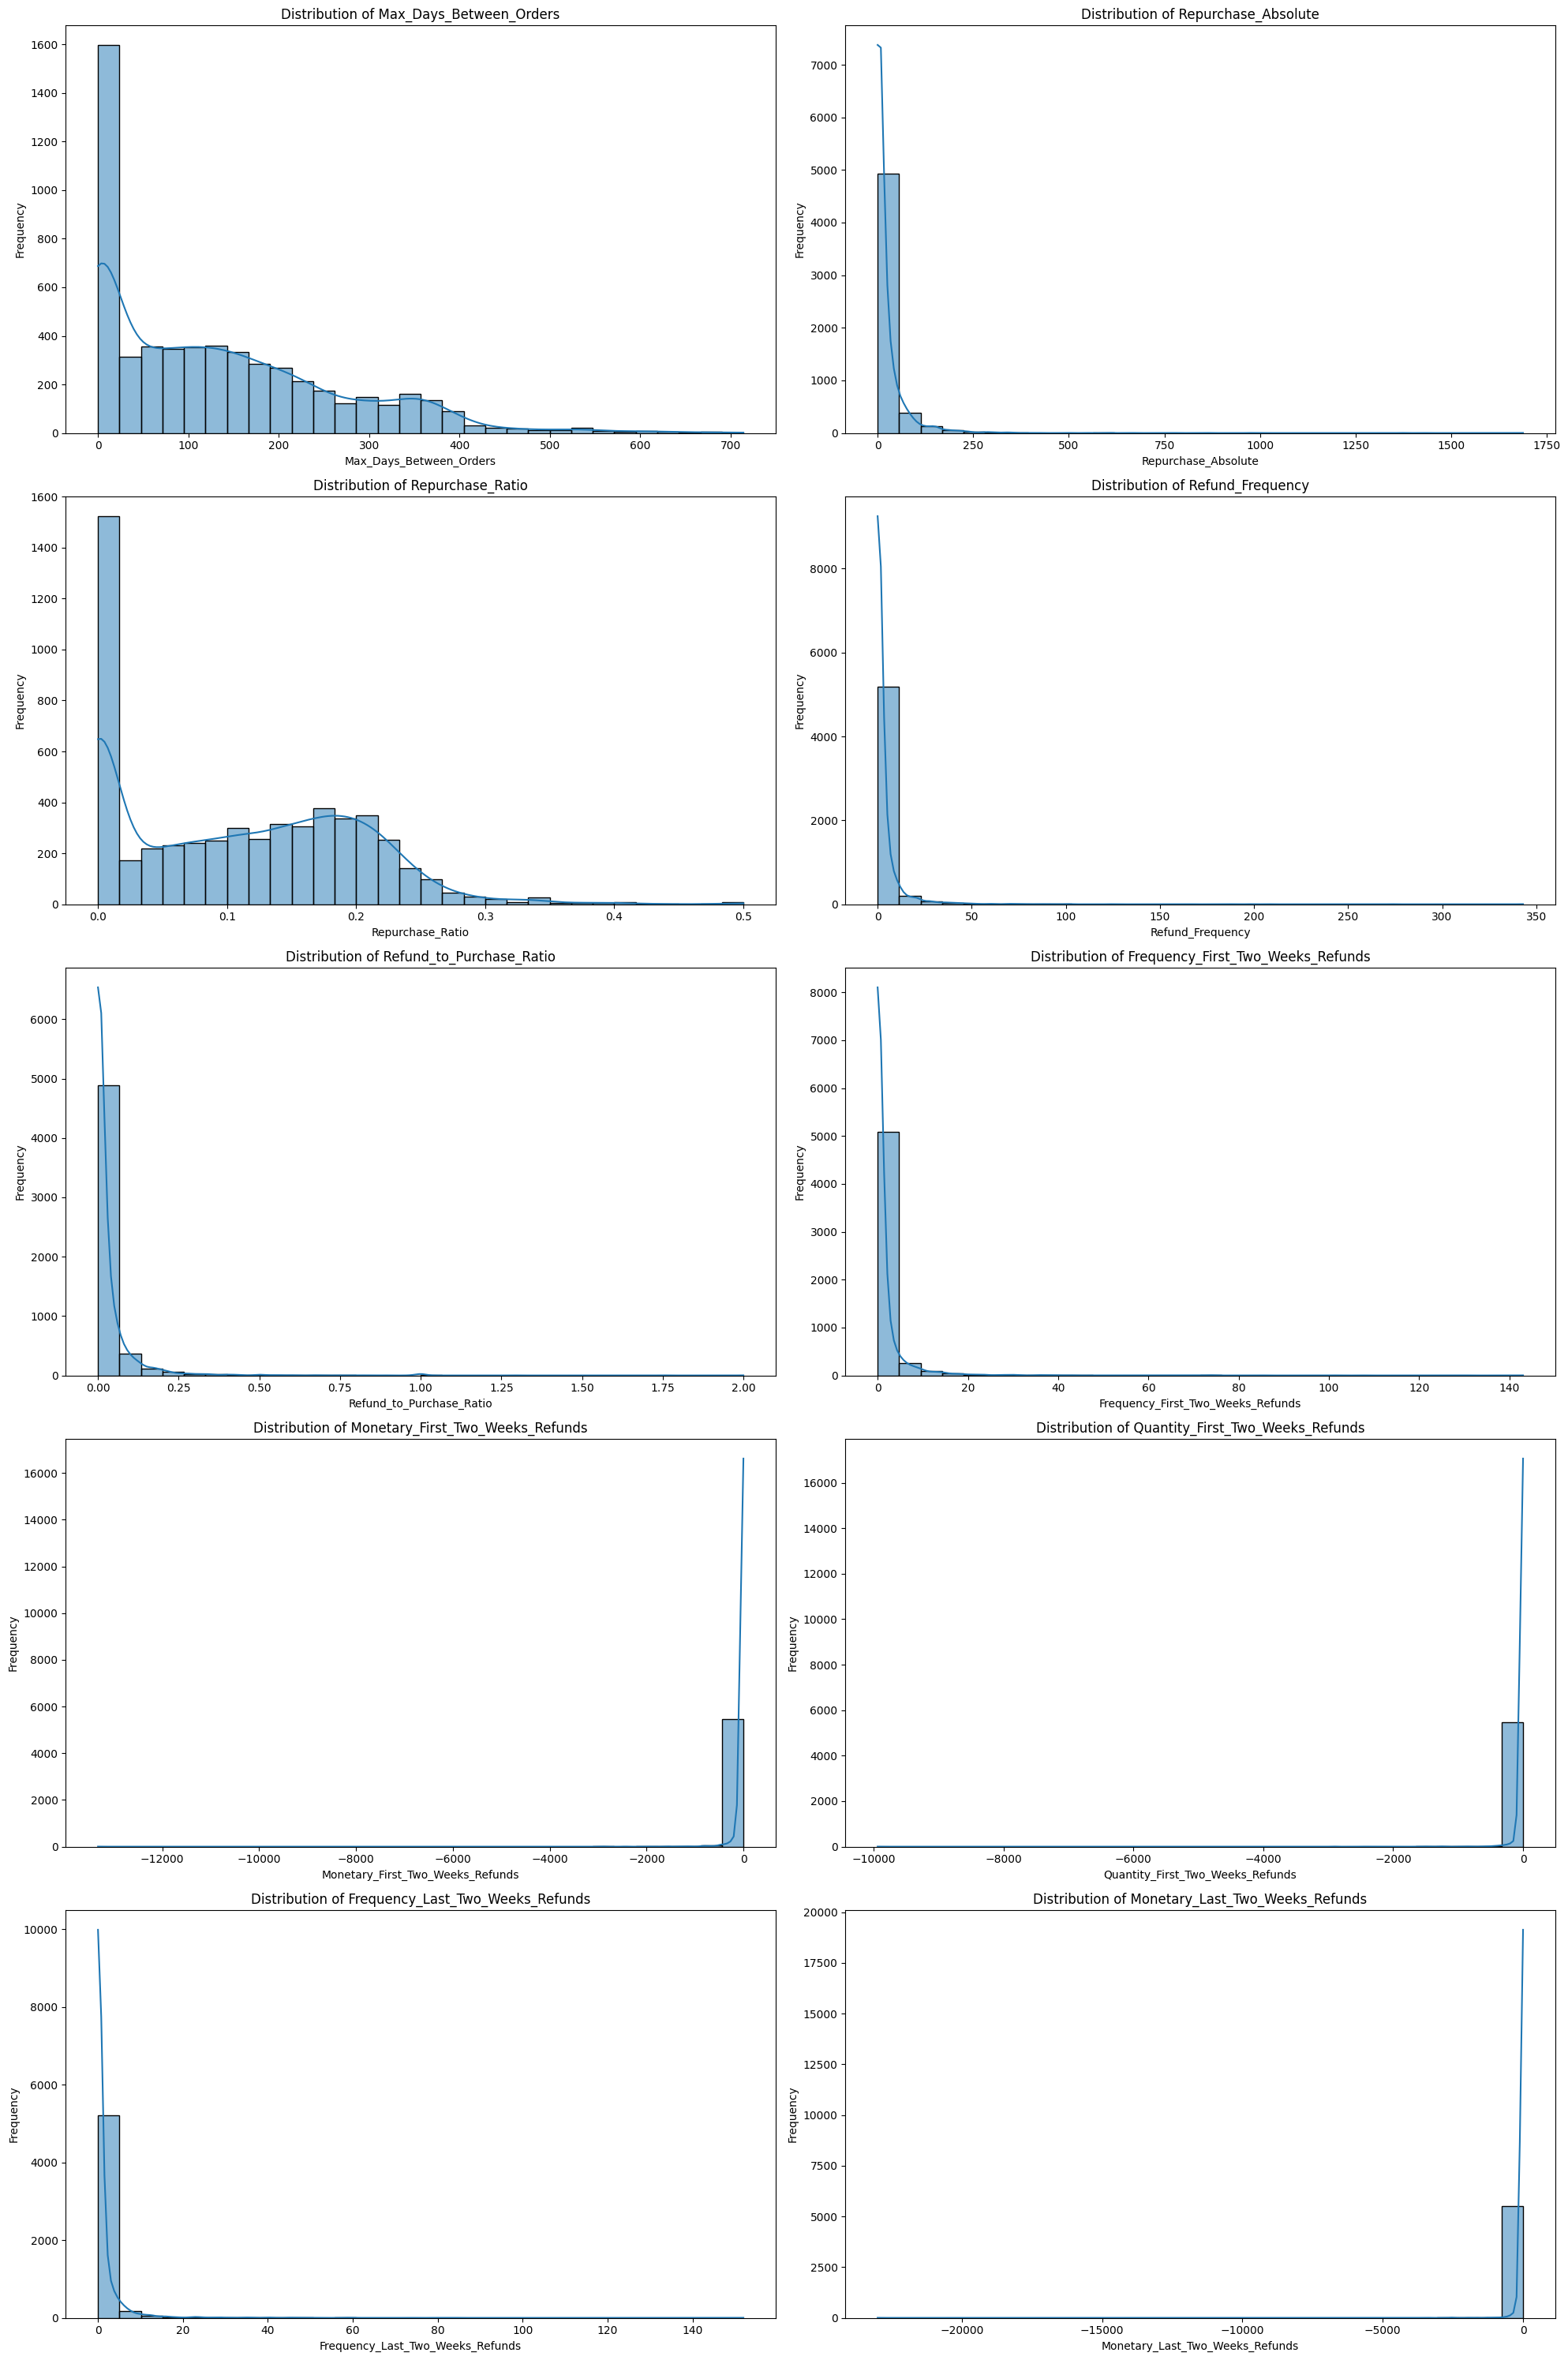

In [26]:
rfm_columns = [
 'Max_Days_Between_Orders',
 'Repurchase_Absolute',
 'Repurchase_Ratio',
 'Refund_Frequency',
 'Refund_to_Purchase_Ratio',
 'Frequency_First_Two_Weeks_Refunds',
 'Monetary_First_Two_Weeks_Refunds',
 'Quantity_First_Two_Weeks_Refunds',
 'Frequency_Last_Two_Weeks_Refunds',
 'Monetary_Last_Two_Weeks_Refunds',
 ]

# Set up a plotting grid
n_cols = 2
n_rows = (len(rfm_columns) + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()

# Plot a distribution for each feature in `rfm_columns`
for i, col in enumerate(rfm_columns):
    sns.histplot(rfm[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


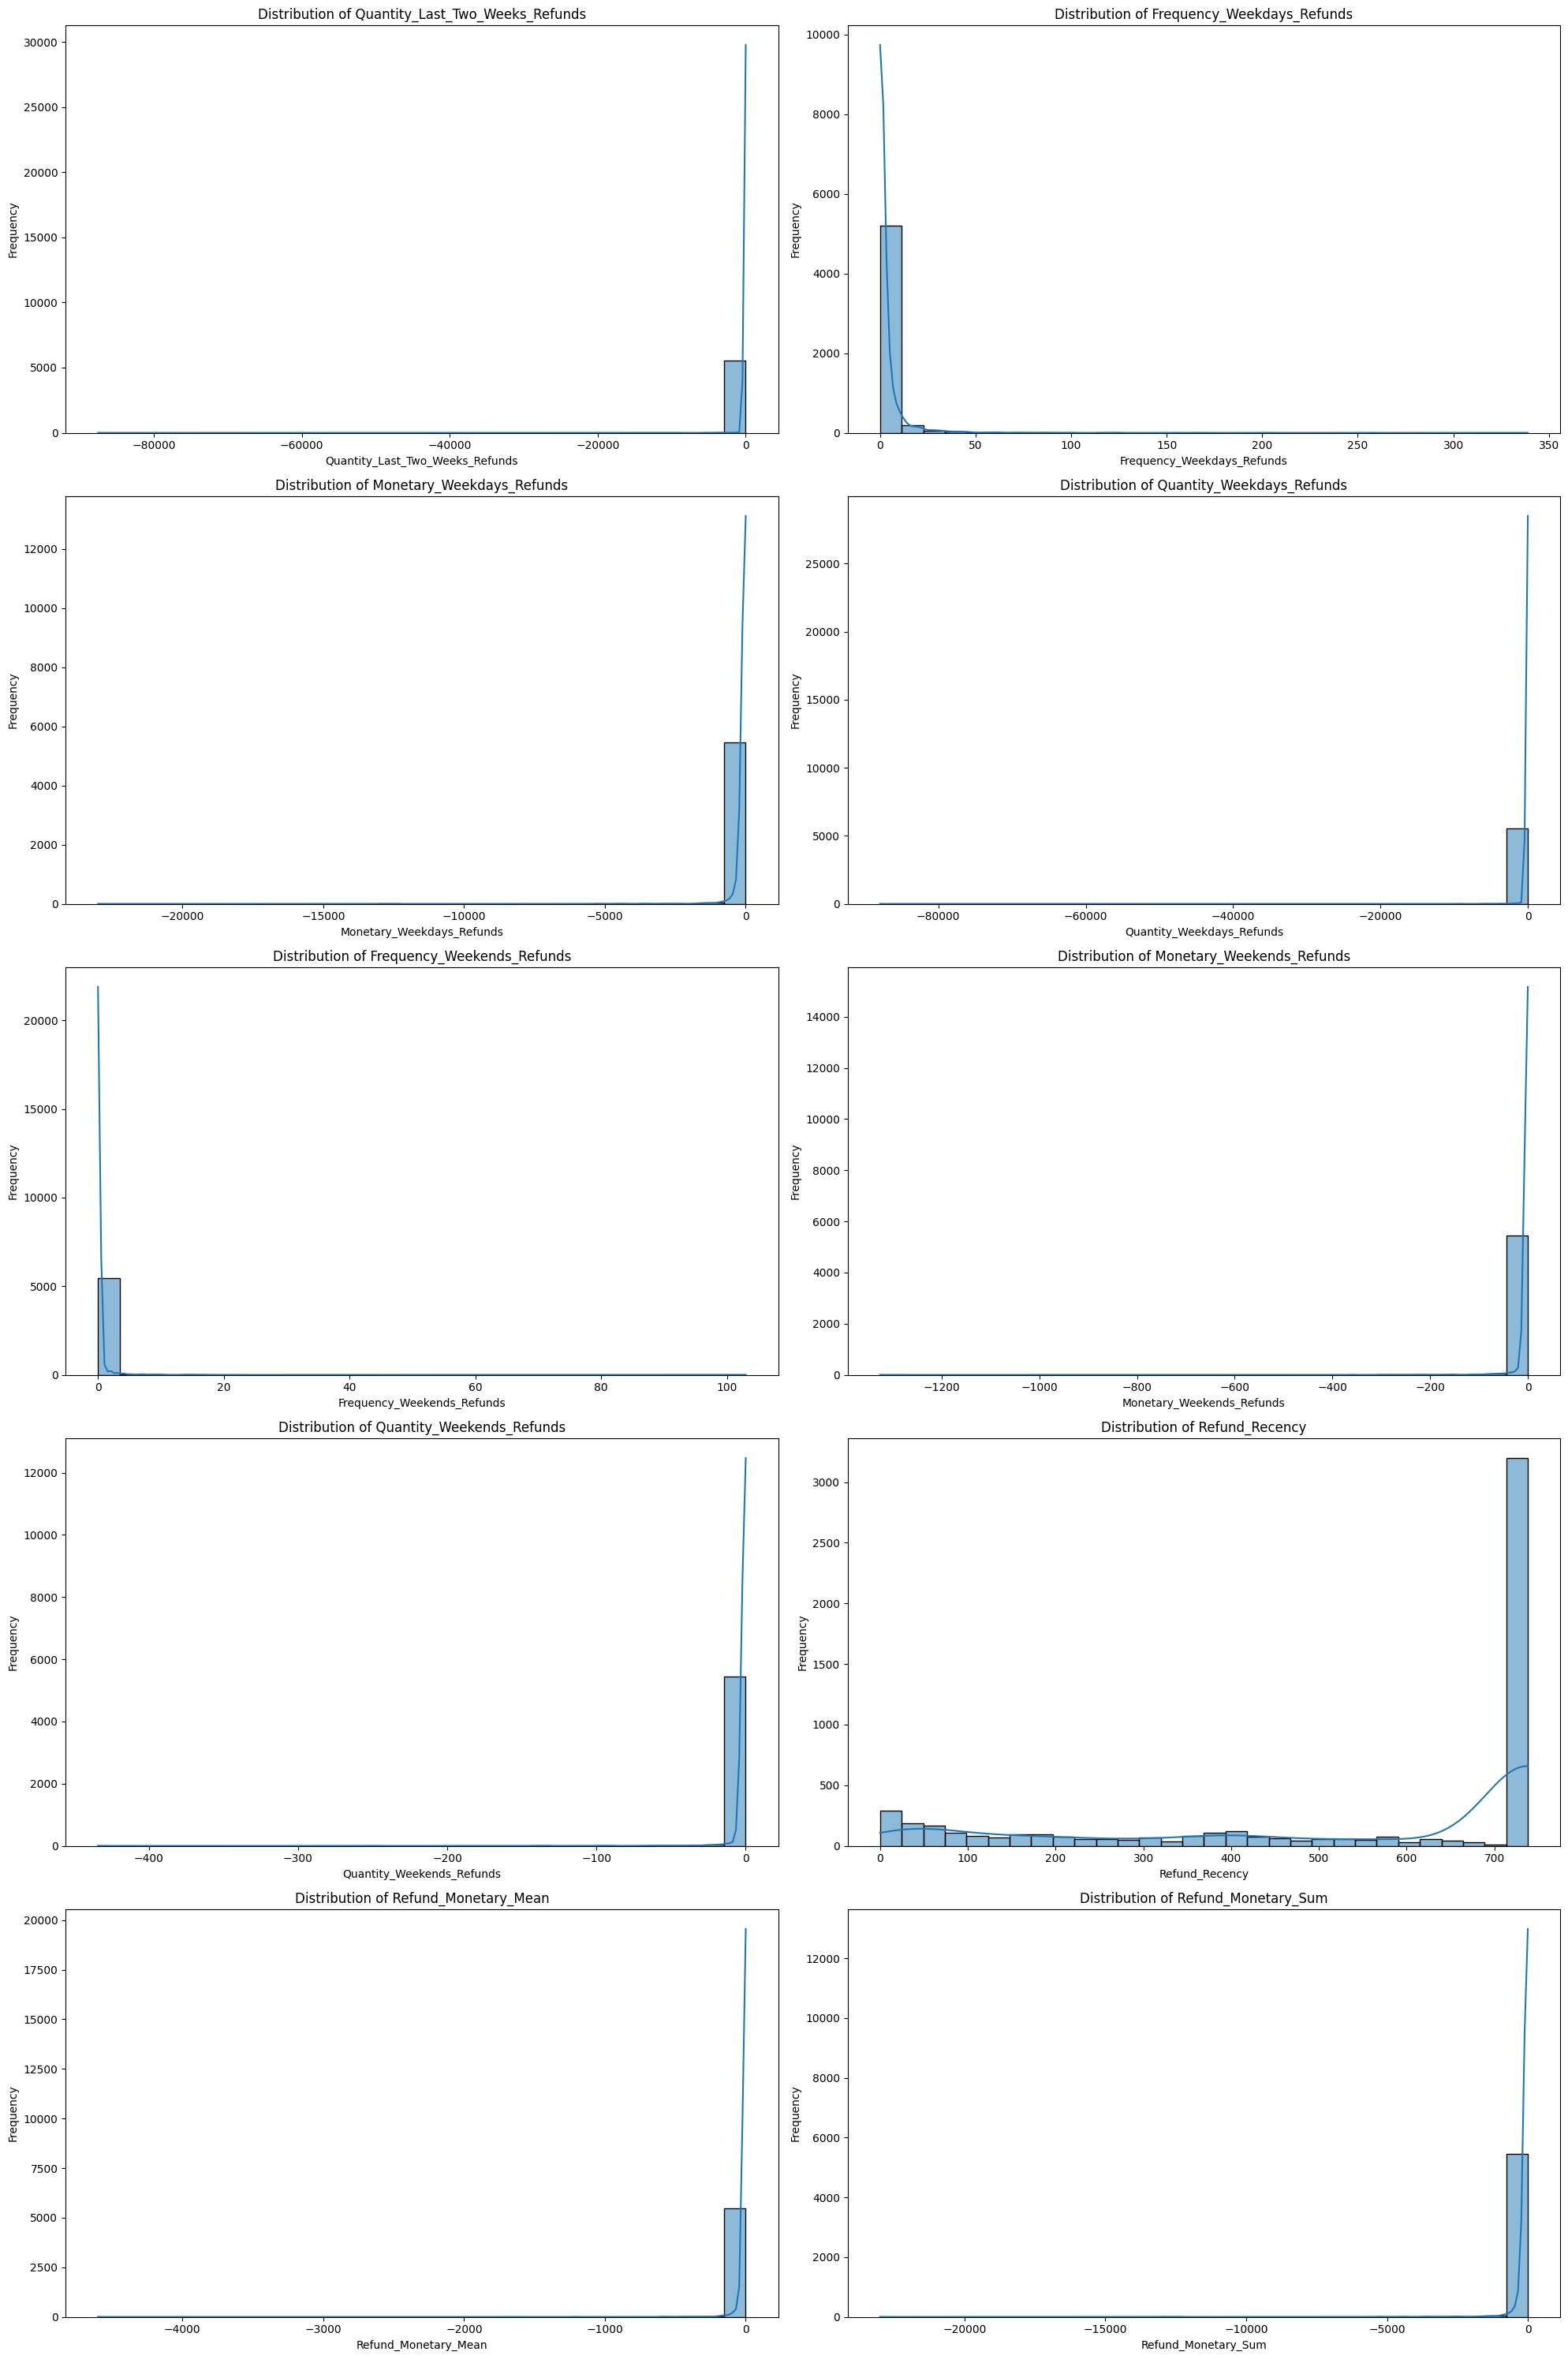

In [27]:
rfm_columns = [
 'Quantity_Last_Two_Weeks_Refunds',
 'Frequency_Weekdays_Refunds',
 'Monetary_Weekdays_Refunds',
 'Quantity_Weekdays_Refunds',
 'Frequency_Weekends_Refunds',
 'Monetary_Weekends_Refunds',
 'Quantity_Weekends_Refunds',
 'Refund_Recency',
 'Refund_Monetary_Mean',
 'Refund_Monetary_Sum']

# Set up a plotting grid
n_cols = 2
n_rows = (len(rfm_columns) + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()

# Plot a distribution for each feature in `rfm_columns`
for i, col in enumerate(rfm_columns):
    sns.histplot(rfm[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


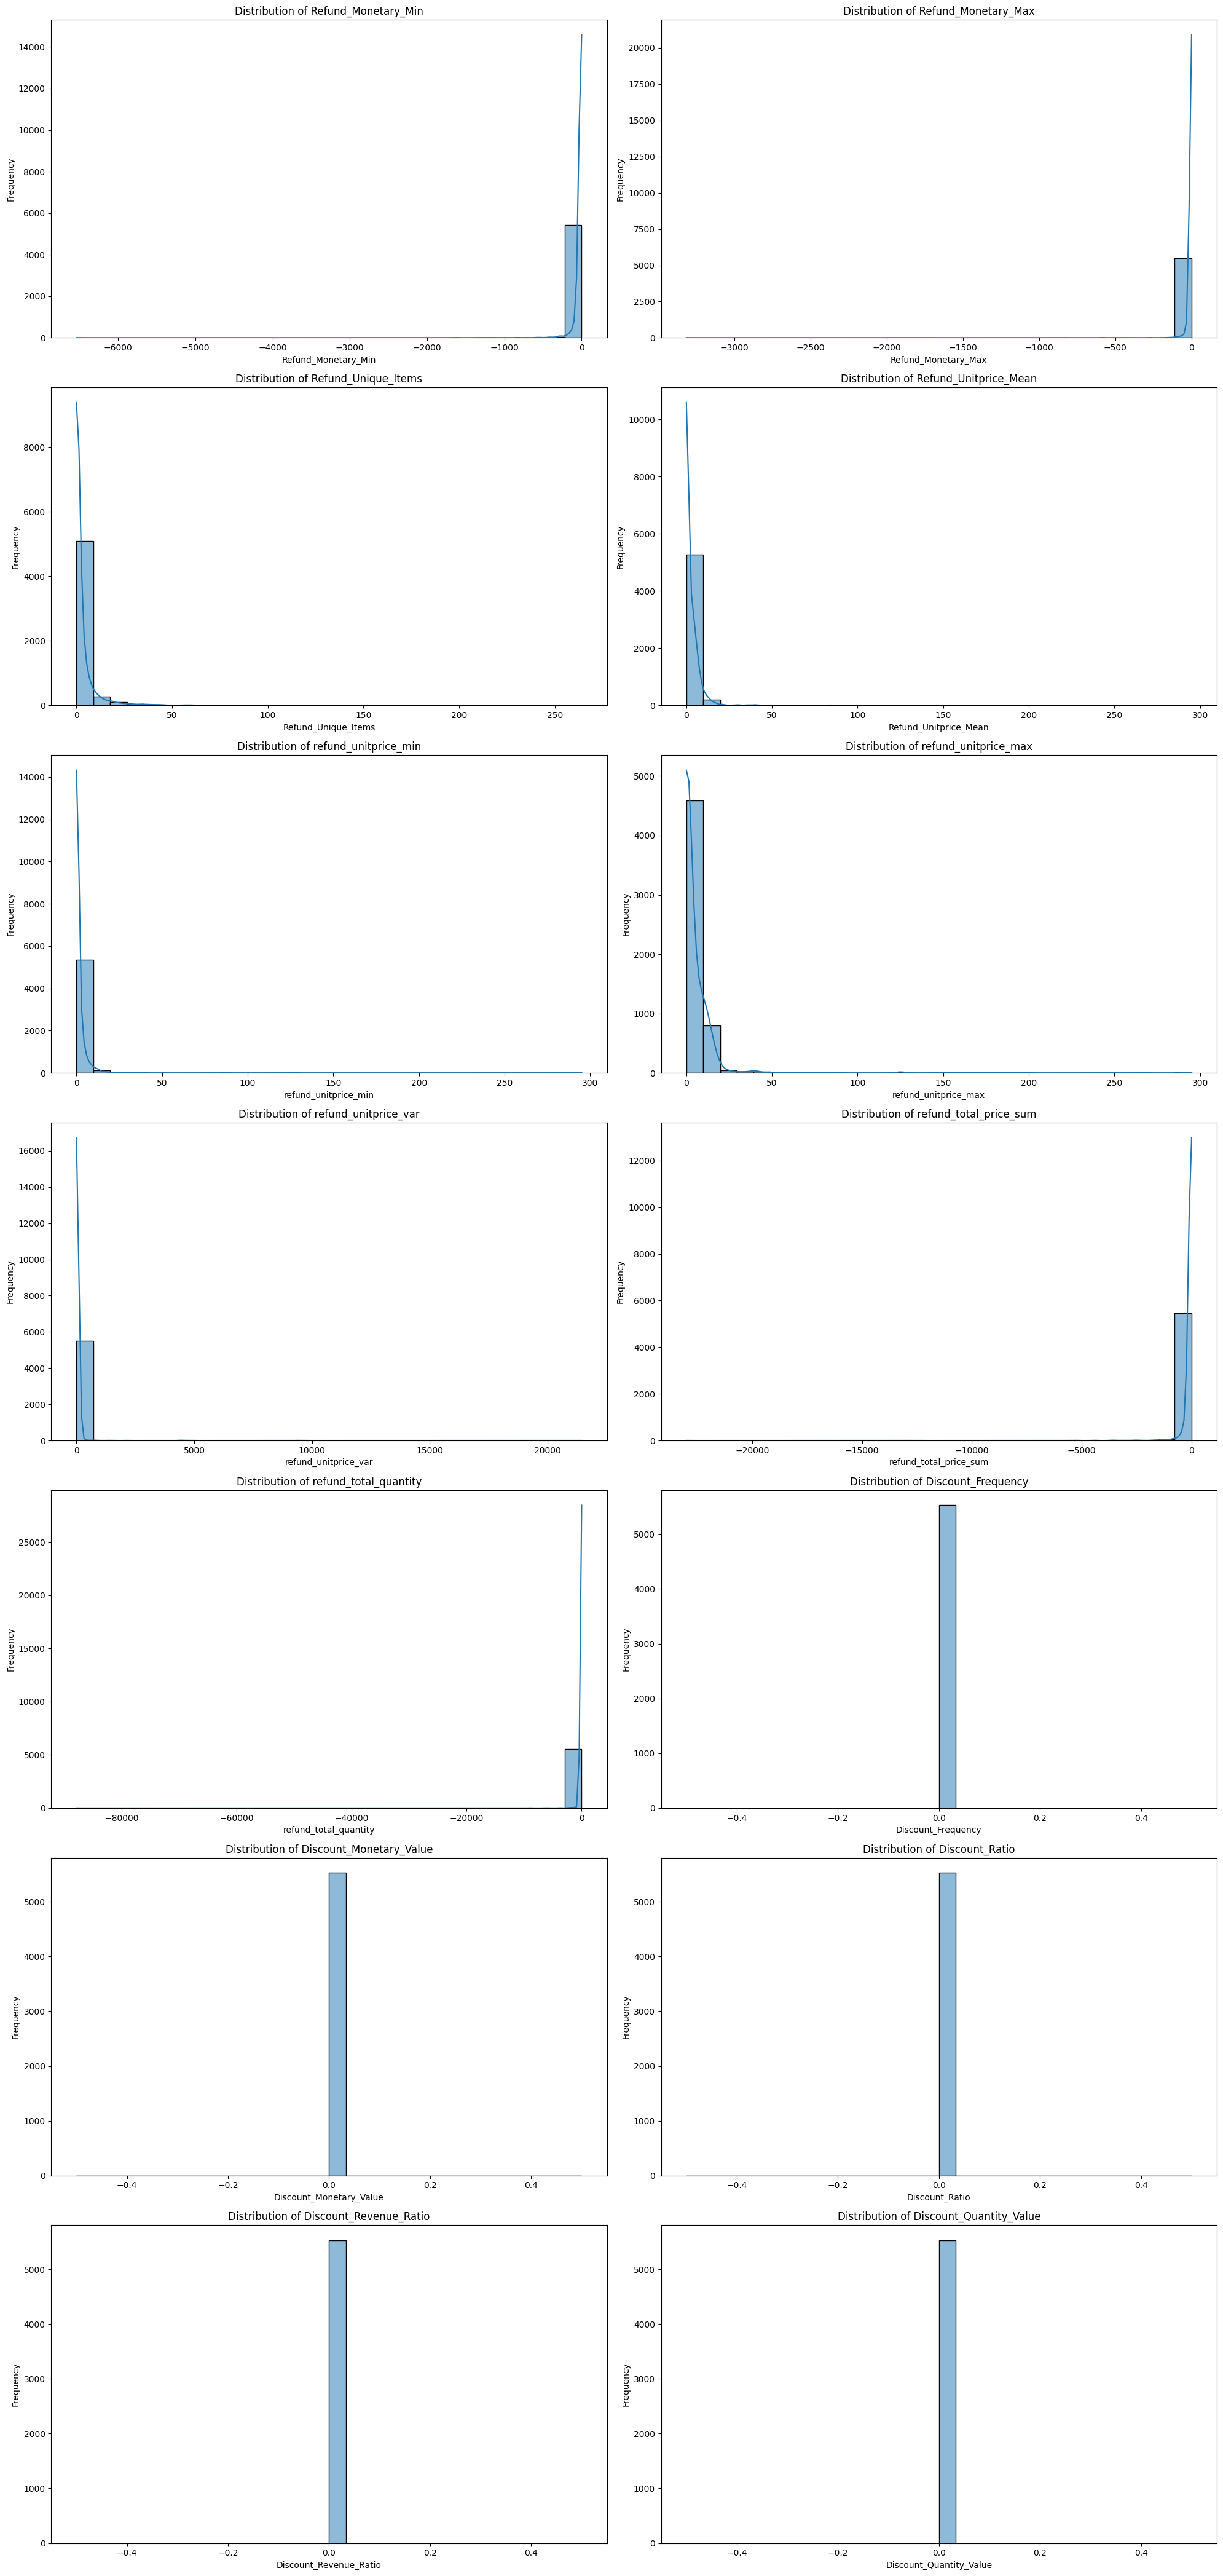

In [28]:
rfm_columns = [
 'Refund_Monetary_Min',
 'Refund_Monetary_Max',
 'Refund_Unique_Items',
 'Refund_Unitprice_Mean',
 'refund_unitprice_min',
 'refund_unitprice_max',
 'refund_unitprice_var',
 'refund_total_price_sum',
 'refund_total_quantity',
 'Discount_Frequency',
 'Discount_Monetary_Value',
 'Discount_Ratio',
 'Discount_Revenue_Ratio',
 'Discount_Quantity_Value']

# Set up a plotting grid
n_cols = 2
n_rows = (len(rfm_columns) + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()

# Plot a distribution for each feature in `rfm_columns`
for i, col in enumerate(rfm_columns):
    sns.histplot(rfm[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [29]:
def get_outliers_for_feature(data, rfm, feature, method="IQR", threshold=1.5):
    """
    Identifies outliers in a specified feature of the RFM DataFrame and returns a combined DataFrame
    with outlier data from both the RFM DataFrame and the original data.
    
    Parameters:
    - data: Original DataFrame containing transaction data.
    - rfm: RFM DataFrame with customer metrics.
    - feature: The feature/column in the RFM DataFrame for which to detect outliers.
    - method: Outlier detection method ("IQR" or "Z-score").
    - threshold: Multiplier for IQR or Z-score threshold (default is 1.5 for IQR and 3 for Z-score).
    
    Returns:
    - merged_outliers: DataFrame with the outliers in the specified feature and corresponding data from original data.
    """
    
    if feature not in rfm.columns:
        raise ValueError(f"{feature} is not a column in the RFM DataFrame.")
        
    # Determine outliers based on the specified method
    if method == "IQR":
        Q1 = rfm[feature].quantile(0.25)
        Q3 = rfm[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        outliers = rfm[(rfm[feature] < lower_bound) | (rfm[feature] > upper_bound)]
    elif method == "Z-score":
        mean = rfm[feature].mean()
        std = rfm[feature].std()
        outliers = rfm[(rfm[feature] - mean).abs() > threshold * std]
    else:
        raise ValueError("Method must be 'IQR' or 'Z-score'")
    
    # Retrieve the original data for these outlier customers
    original_data_for_outliers = data[data['Customer ID'].isin(outliers['Customer ID'])]
    
    # Merge outliers from RFM and original data on 'Customer ID'
    merged_outliers = pd.merge(
        outliers, 
        original_data_for_outliers, 
        on='Customer ID', 
        suffixes=('_RFM', '_Original')
    )
    
    return outliers


In [30]:
# Example usage:
# Specify the feature to find outliers
feature_to_check = 'Frequency'
outliers_frq = get_outliers_for_feature(data, rfm, feature=feature_to_check, method="IQR", threshold=20.0)

# Displaying the resulting DataFrame
outliers_frq

Customer ID  Recency    T  Frequency  Monetary_Mean  Monetary_Sum  \
21        15311.0        0  738       4303      26.649180     114671.42   
24        14911.0        0  738      10911      24.952139     272252.79   
46        14156.0        9  738       3994      75.881292     303069.88   
149       14527.0        2  737       2635      10.319203      27191.10   
195       17841.0        1  736      12425       5.514684      68519.95   
196       13089.0        2  736       3316      34.202928     113416.91   
201       14646.0        1  736       3824     137.748828     526751.52   
244       14606.0        0  736       6347       4.671301      29648.75   
293       16549.0        9  620       3093       4.132493      12781.80   
374       12748.0        0  734       6558       7.498740      49176.74   
671       15039.0        9  729       2695      14.523740      39141.48   
751       14298.0        7  727       2864      31.841652      91194.49   
4950      14096.0        3  101       5095      10.453078      53258.43   

      Monetary_Min  Monetary_Max  Unique_Items  UnitPrice_Mean  ...  \
21            0.21        408.00           863        2.676721  ...   
24            0.00        540.00          2546        3.456844  ...   
46            1.25       2365.20          1443        3.419629  ...   
149           0.39        207.60           605        5.193237  ...   
195           0.19        349.50          2115        2.711412  ...   
196           0.00       1051.20           857        2.692765  ...   
201           0.00       4992.00           961        2.347563  ...   
244           0.12        139.30          1259        2.801120  ...   
293           0.29         61.20           836        2.059421  ...   
374           0.00        590.00          2284        2.414870  ...   
671           0.29        375.00           562        3.246857  ...   
751           0.19        650.25          1370        1.578198  ...   
4950          0.42        264.32          1118        4.205317  ...   

      refund_unitprice_min  refund_unitprice_max  refund_unitprice_var  \
21                    0.38                 14.95              7.101389   
24                    0.19                 49.95             23.093344   
46                    0.55                 12.75             13.829521   
149                   0.85                 39.95             52.702690   
195                   0.19                 39.95             17.977860   
196                   0.42                 34.95             24.773238   
201                   0.36                150.00            752.836473   
244                   0.12                 16.95             11.364846   
293                   1.95                  5.95              2.443000   
374                   0.29                 12.75              7.200729   
671                   0.64                 24.95             40.050038   
751                   0.38                  2.55              1.163158   
4950                  0.00                  0.00              0.000000   

      refund_total_price_sum  refund_total_quantity  Discount_Frequency  \
21                  -3227.06                  -1267                   0   
24                 -13730.36                  -6450                   0   
46                  -5294.87                  -2072                   0   
149                  -831.92                   -131                   0   
195                 -1232.89                   -428                   0   
196                 -3523.67                   -991                   0   
201                 -3548.78                  -2116                   0   
244                  -735.53                   -331                   0   
293                   -22.55                     -5                   0   
374                 -2502.56                  -2018                   0   
671                  -288.44                   -125                   0   
751                  -7

In [31]:
data[data["Customer ID"]==14096]

Invoice StockCode                         Description  Quantity  \
621146  564764    16207B              PINK HEART RED HANDBAG         1   
621147  564764     16225                   RATTLE SNAKE EGGS         1   
621148  564764     16254  TRANSPARENT ACRYLIC TAPE DISPENSER         1   
621149  564764    84249A     GREETING CARD,SQUARE, DOUGHNUTS         1   
621150  564764    84659A            WHITE TRAVEL ALARM CLOCK         2   
...        ...       ...                                 ...       ...   
785313  580727     90119           METALIC LEAVES BAG CHARMS         9   
785314  580727     10135        COLOURING PENCILS BROWN TUBE         8   
785315  580727     11001         ASSTD DESIGN RACING CAR PEN         3   
785316  580727    15044A                 PINK PAPER PARASOL          1   
785317  580727   15056BL             EDWARDIAN PARASOL BLACK         1   

               InvoiceDate  Price  Customer ID         Country  Revenue  
621146 2011-08-30 10:49:00   2.46      14096.0  United Kingdom     2.46  
621147 2011-08-30 10:49:00   3.29      14096.0  United Kingdom     3.29  
621148 2011-08-30 10:49:00   1.63      14096.0  United Kingdom     1.63  
621149 2011-08-30 10:49:00   0.83      14096.0  United Kingdom     0.83  
621150 2011-08-30 10:49:00   1.23      14096.0  United Kingdom     2.46  
...                    ...    ...          ...             ...      ...  
785313 2011-12-05 17:17:00   2.46      14096.0  United Kingdom    22.14  
785314 2011-12-05 17:17:00   2.46      14096.0  United Kingdom    19.68  
785315 2011-12-05 17:17:00   3.29      14096.0  United Kingdom     9.87  
785316 2011-12-05 17:17:00   5.79      14096.0  United Kingdom     5.79  
785317 2011-12-05 17:17:00  12.46      14096.0  United Kingdom    12.46  

[5095 rows x 9 columns]

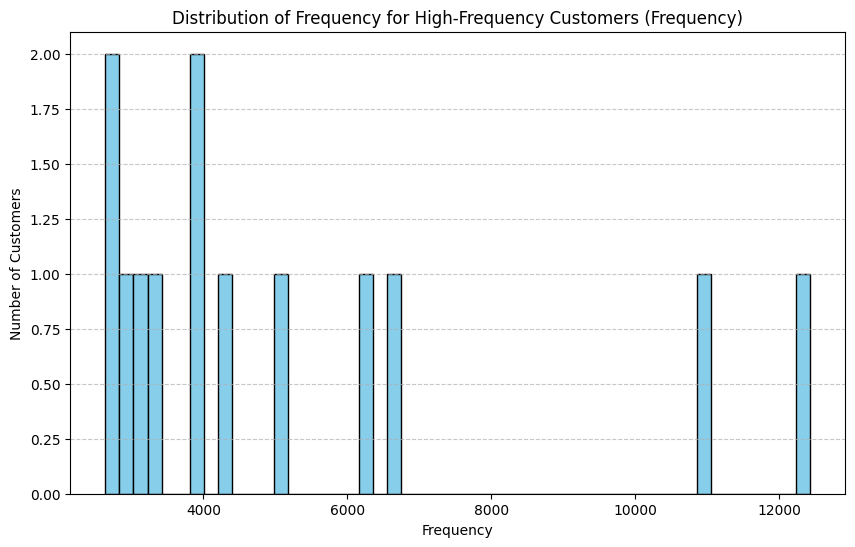

In [32]:
# Plotting the distribution of 'Frequency' for these high-frequency customers
plt.figure(figsize=(10, 6))
plt.hist(outliers_frq['Frequency'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Number of Customers')
plt.title('Distribution of Frequency for High-Frequency Customers (Frequency)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
# Specify the feature to find outliers

outliers_mm = get_outliers_for_feature(data, rfm, feature='Monetary_Sum', method="IQR", threshold=20.0)

# Displaying the resulting DataFrame
outliers_mm

Customer ID  Recency    T  Frequency  Monetary_Mean  Monetary_Sum  \
3         18102.0        0  738       1040     558.641385     580987.04   
21        15311.0        0  738       4303      26.649180     114671.42   
24        14911.0        0  738      10911      24.952139     272252.79   
26        12931.0       21  738        218     423.611651      92347.34   
42        15061.0        3  738        897     140.900301     126387.57   
46        14156.0        9  738       3994      75.881292     303069.88   
79        16422.0       16  696        696      88.586810      61656.42   
117       13777.0        0  737        356     139.433315      49638.26   
132       17511.0        2  737       1868      92.148217     172132.87   
135       17949.0        0  737        153     704.793987     107833.48   
195       17841.0        1  736      12425       5.514684      68519.95   
196       13089.0        2  736       3316      34.202928     113416.91   
201       14646.0        1  736       3824     137.748828     526751.52   
311       13408.0        1  735        826      60.744286      50174.78   
318       13093.0      275  735       1037      52.212392      54144.25   
328       17389.0        0  735        429     133.369068      57215.33   
337       14680.0       24  735       1273      43.734093      55673.50   
361       13694.0        3  734       1519     128.795714     195640.69   
374       12748.0        0  734       6558       7.498740      49176.74   
384       17850.0      371  734       2499      20.491745      51208.87   
489       16684.0        3  731        718     204.934220     147142.77   
533       16013.0        3  731        216     259.622407      56078.44   
537       16029.0       38  731        369     297.075528     109620.87   
566       13081.0       11  730       2284      24.885451      56838.37   
576       13798.0        0  730        721     104.617018      75428.87   
635       16705.0        0  729        691      62.974023      43515.05   
726       15769.0        6  728        223     397.365561      88612.52   
751       14298.0        7  727       2864      31.841652      91194.49   
851       15838.0       10  724        206     355.366505      73205.50   
1033      17404.0        3  701        288     165.410139      47638.12   
1768      13881.0        3  644        457      98.860175      45179.10   
1822      16754.0      371  641        140     467.857643      65500.07   
2854      12415.0       23  527        924     155.880271     144033.37   
3354      17450.0        7  437        421     581.435273     244784.25   
3580      14088.0        9  420        682      93.895601      64036.80   
4142      15749.0      234  331         10    4453.430000      44534.30   
4950      14096.0        3  101       5095      10.453078      53258.43   

      Monetary_Min  Monetary_Max  Unique_Items  UnitPrice_Mean  ...  \
3             1.70       3884.00           382        3.794740  ...   
21            0.21        408.00           863        2.676721  ...   
24            0.00        540.00          2546        3.456844  ...   
26            6.36       4176.00            37        1.968899  ...   
42            0.32       2978.40           130        2.413177  ...   
46            1.25       2365.20          1443        3.419629  ...   
79            7.80        974.40           109        1.803333  ...   
117           1.44       1383.12            44        2.280197  ...   
132           1.17       1401.60           657        2.399786  ...   
135          23.20       4401.00            56        2.888824  ...   
195           0.19        349.50          2115        2.711412  ...   
196           0.00       1051.20           857        2.692765  ...   
201           0.00       4992.00           961        2.347563  ...   
311           0.00        306.00           321        2.508341  ...   
318           5.04        734.40           199        2.844455  ...   
328           0.42 

In [34]:
data[data['Customer ID']==14646]

Invoice StockCode                       Description  Quantity  \
4447    489889     22271              FELTCRAFT DOLL ROSIE        96   
4448    489889     22078          RIBBON REEL LACE DESIGN        120   
4449    489889     22082       RIBBON REEL STRIPES DESIGN        120   
4450    489889     22149        FELTCRAFT 6 FLOWER FRIENDS       120   
4451    489889     22294        HEART FILIGREE DOVE  SMALL       288   
...        ...       ...                               ...       ...   
789767  581176     22908     PACK OF 20 NAPKINS RED APPLES        96   
789768  581176     22907  PACK OF 20 NAPKINS PANTRY DESIGN        96   
789769  581176     22029            SPACEBOY BIRTHDAY CARD        72   
789770  581176     22712                  CARD DOLLY GIRL         72   
790852  581338     23344         JUMBO BAG 50'S CHRISTMAS        140   

               InvoiceDate  Price  Customer ID      Country  Revenue  
4447   2009-12-02 16:52:00   2.55      14646.0  Netherlands   244.80  
4448   2009-12-02 16:52:00   1.85      14646.0  Netherlands   222.00  
4449   2009-12-02 16:52:00   1.45      14646.0  Netherlands   174.00  
4450   2009-12-02 16:52:00   2.10      14646.0  Netherlands   252.00  
4451   2009-12-02 16:52:00   1.06      14646.0  Netherlands   305.28  
...                    ...    ...          ...          ...      ...  
789767 2011-12-07 15:19:00   0.72      14646.0  Netherlands    69.12  
789768 2011-12-07 15:19:00   0.72      14646.0  Netherlands    69.12  
789769 2011-12-07 15:19:00   0.36      14646.0  Netherlands    25.92  
789770 2011-12-07 15:19:00   0.36      14646.0  Netherlands    25.92  
790852 2011-12-08 12:12:00   1.79      14646.0  Netherlands   250.60  

[3857 rows x 9 columns]

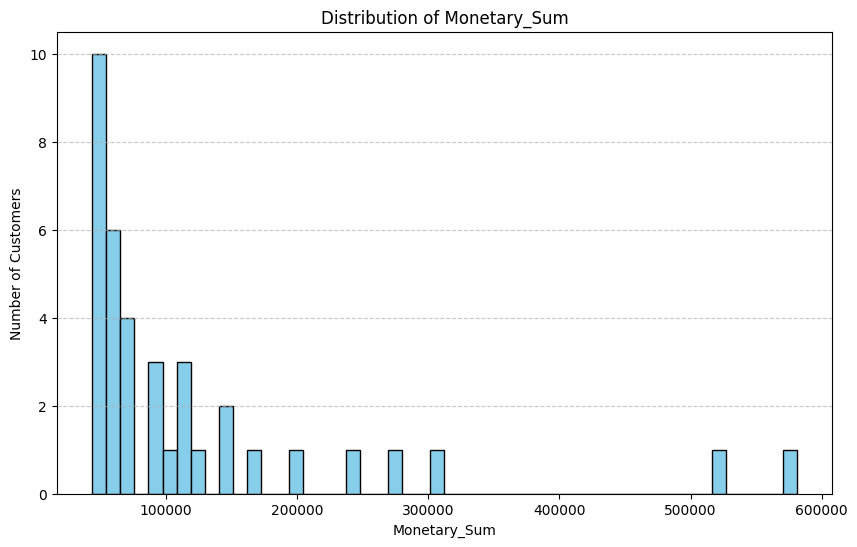

In [35]:
# Plotting the distribution of 'Frequency' for these high-frequency customers
plt.figure(figsize=(10, 6))
plt.hist(outliers_mm['Monetary_Sum'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Monetary_Sum')
plt.ylabel('Number of Customers')
plt.title('Distribution of Monetary_Sum')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [36]:
# Specify the feature to find outliers

outliers_rf = get_outliers_for_feature(data, rfm, feature='Refund_Frequency', method="IQR", threshold=20.0)

# Displaying the resulting DataFrame
outliers_rf

Customer ID  Recency    T  Frequency  Monetary_Mean  Monetary_Sum  \
1         13078.0        2  738        791      36.685284      29018.06   
14        17865.0       30  738       1009      26.075411      26310.09   
15        13767.0        1  738        764      44.376401      33903.57   
21        15311.0        0  738       4303      26.649180     114671.42   
24        14911.0        0  738      10911      24.952139     272252.79   
26        12931.0       21  738        218     423.611651      92347.34   
46        14156.0        9  738       3994      75.881292     303069.88   
62        15005.0       15  737       2385       5.766281      13752.58   
72        12921.0        8  737       1499      23.504496      35233.24   
74        14543.0       28  737        209      69.608708      14548.22   
132       17511.0        2  737       1868      92.148217     172132.87   
133       12755.0      280  693         63      83.115238       5236.26   
149       14527.0        2  737       2635      10.319203      27191.10   
185       12471.0        1  732       1088      32.260938      35099.90   
195       17841.0        1  736      12425       5.514684      68519.95   
196       13089.0        2  736       3316      34.202928     113416.91   
244       14606.0        0  736       6347       4.671301      29648.75   
291       14277.0       14  725        376      44.652021      16789.16   
318       13093.0      275  735       1037      52.212392      54144.25   
333       18223.0        4  735        576      24.307031      14000.85   
337       14680.0       24  735       1273      43.734093      55673.50   
374       12748.0        0  734       6558       7.498740      49176.74   
411       15555.0       11  733       1587       7.078626      11233.78   
509       13148.0       28  731        761      11.154166       8488.32   
545       13091.0       27  729         44      25.200000       1108.80   
566       13081.0       11  730       2284      24.885451      56838.37   
576       13798.0        0  730        721     104.617018      75428.87   
612       12472.0       31  725        822      18.213248      14971.29   
637       12709.0       14  729        480      61.431625      29487.18   
682       16057.0       15  700        218      17.682798       3854.85   
747       17677.0        1  723        685      51.180234      35058.46   
849       16554.0       41  724        167      17.016287       2841.72   
897       13047.0       56  723        380      22.167316       8423.58   
1484      12474.0       16  666        681      16.609031      11310.75   
1767      14426.0       23  644        604      19.417119      11727.94   
1898      14534.0        2  633        713       8.671893       6183.06   
2063      13113.0        0  620        378      48.227698      18230.07   
2132      15215.0       46  612        113      21.437434       2422.43   
2746      13069.0        0  542       1038       8.944557       9284.45   
2854      12415.0       23  527        924     155.880271     144033.37   
2903      12749.0        3  520        337      20.318576       6847.36   
2906      13534.0        1  519        392      19.696173       7720.90   
2979      16555.0       34  504         66      29.025455       1915.68   
2999      12476.0       15  501        498      24.738775      12319.91   
3335      14934.0       81  441        183      18.598361       3403.50   
3366      14410.0       91  436        385       6.833506       2630.90   
4368      16801.0      162  272         75      21.256400       1594.23   
5209      12607.0       59   59        101      15.638713       1579.51   

      Monetary_Min  Monetary_Max  Unique_Items  UnitPrice_Mean  ...  \
1             2.28        237.60           153        3.887446  ...   
14            0.42        356.40           390        3.083627  ...   
15            6.96        532.80           117        3.742592  ...   
21            0.21        408.00           863

In [37]:
outliers_rf[outliers_rf["Refund_Frequency"]>150]

Customer ID  Recency    T  Frequency  Monetary_Mean  Monetary_Sum  \
21       15311.0        0  738       4303      26.649180     114671.42   
24       14911.0        0  738      10911      24.952139     272252.79   
132      17511.0        2  737       1868      92.148217     172132.87   
185      12471.0        1  732       1088      32.260938      35099.90   
195      17841.0        1  736      12425       5.514684      68519.95   
337      14680.0       24  735       1273      43.734093      55673.50   
576      13798.0        0  730        721     104.617018      75428.87   

     Monetary_Min  Monetary_Max  Unique_Items  UnitPrice_Mean  ...  \
21           0.21         408.0           863        2.676721  ...   
24           0.00         540.0          2546        3.456844  ...   
132          1.17        1401.6           657        2.399786  ...   
185          0.00         876.0           252        2.724311  ...   
195          0.19         349.5          2115        2.711412  ...   
337          0.76         622.5           221        2.723417  ...   
576          0.39         510.0           168        2.295908  ...   

     refund_unitprice_min  refund_unitprice_max  refund_unitprice_var  \
21                   0.38                 14.95              7.101389   
24                   0.19                 49.95             23.093344   
132                  0.39                 12.75              8.728892   
185                  0.42                 18.00             15.558267   
195                  0.19                 39.95             17.977860   
337                  0.42                 10.95              5.991655   
576                  0.42                 10.95              4.087355   

     refund_total_price_sum  refund_total_quantity  Discount_Frequency  \
21                 -3227.06                  -1267                   0   
24                -13730.36                  -6450                   0   
132                -3628.43                  -1723                   0   
185                -1804.98                   -414                   0   
195                -1232.89                   -428                   0   
337                -2608.48                  -1343                   0   
576                -2251.37                   -934                   0   

     Discount_Monetary_Value  Discount_Ratio  Discount_Revenue_Ratio  \
21                       0.0             0.0                     0.0   
24                       0.0             0.0                     0.0   
132                      0.0             0.0                     0.0   
185                      0.0             0.0                     0.0   
195                      0.0             0.0                     0.0   
337                      0.0             0.0                     0.0   
576                      0.0             0.0                     0.0   

     Discount_Quantity_Value  
21                         0  
24                         0  
132                        0  
185                        0  
195                        0  
337                        0  
576                        0  

[7 rows x 65 columns]

In [38]:
data[data["Customer ID"]==17841]

Invoice StockCode                      Description  Quantity  \
4176    489875     79160    HEART SHAPE WIRELESS DOORBELL        11   
4177    489875     20620        RED SPOTTY PASSPORT COVER         1   
4178    489875    84750B     BLACK SMALL GLASS CAKE STAND         1   
4179    489875     21218           RED SPOTTY BISCUIT TIN         1   
4180    489875     84765         SILVER ROCOCO CANDELABRA         3   
...        ...       ...                              ...       ...   
790819  581334     22077           6 RIBBONS RUSTIC CHARM         1   
790820  581334     23399    HOME SWEET HOME HANGING HEART         3   
790821  581334     22893   MINI CAKE STAND T-LIGHT HOLDER        12   
790822  581334     22371     AIRLINE BAG VINTAGE TOKYO 78         1   
790823  581334     21926  RED/CREAM STRIPE CUSHION COVER          8   

               InvoiceDate  Price  Customer ID         Country  Revenue  
4176   2009-12-02 15:41:00   2.10      17841.0  United Kingdom    23.10  
4177   2009-12-02 15:41:00   2.10      17841.0  United Kingdom     2.10  
4178   2009-12-02 15:41:00   1.95      17841.0  United Kingdom     1.95  
4179   2009-12-02 15:41:00   3.75      17841.0  United Kingdom     3.75  
4180   2009-12-02 15:41:00  12.75      17841.0  United Kingdom    38.25  
...                    ...    ...          ...             ...      ...  
790819 2011-12-08 12:07:00   1.95      17841.0  United Kingdom     1.95  
790820 2011-12-08 12:07:00   0.85      17841.0  United Kingdom     2.55  
790821 2011-12-08 12:07:00   0.42      17841.0  United Kingdom     5.04  
790822 2011-12-08 12:07:00   4.25      17841.0  United Kingdom     4.25  
790823 2011-12-08 12:07:00   1.25      17841.0  United Kingdom    10.00  

[12625 rows x 9 columns]

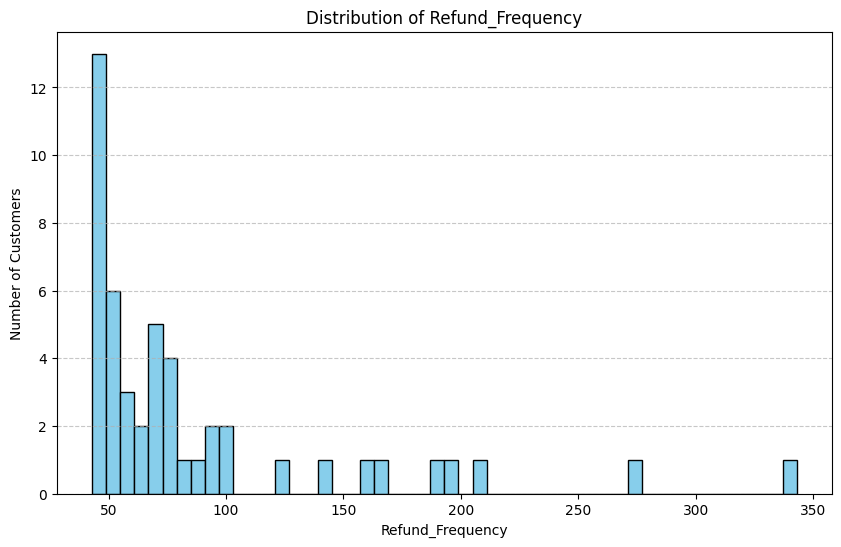

In [39]:
# Plotting the distribution of 'Frequency' for these high-frequency customers
plt.figure(figsize=(10, 6))
plt.hist(outliers_rf['Refund_Frequency'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Refund_Frequency')
plt.ylabel('Number of Customers')
plt.title('Distribution of Refund_Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [40]:
# Specify the feature to find outliers

outliers_rfm = get_outliers_for_feature(data, rfm, feature='Refund_Monetary_Sum', method="IQR", threshold=20.0)

# Displaying the resulting DataFrame
outliers_rfm

Customer ID  Recency    T  Frequency  Monetary_Mean  Monetary_Sum  \
1         13078.0        2  738        791      36.685284      29018.06   
3         18102.0        0  738       1040     558.641385     580987.04   
14        17865.0       30  738       1009      26.075411      26310.09   
21        15311.0        0  738       4303      26.649180     114671.42   
24        14911.0        0  738      10911      24.952139     272252.79   
...           ...      ...  ...        ...            ...           ...   
4142      15749.0      234  331         10    4453.430000      44534.30   
4368      16801.0      162  272         75      21.256400       1594.23   
4376      12901.0        8  270        116     152.194310      17654.54   
5021      14557.0       84   84         16      49.273750        788.38   
5209      12607.0       59   59        101      15.638713       1579.51   

      Monetary_Min  Monetary_Max  Unique_Items  UnitPrice_Mean  ...  \
1             2.28        237.60           153        3.887446  ...   
3             1.70       3884.00           382        3.794740  ...   
14            0.42        356.40           390        3.083627  ...   
21            0.21        408.00           863        2.676721  ...   
24            0.00        540.00          2546        3.456844  ...   
...            ...           ...           ...             ...  ...   
4142       2730.00       6539.40             5        3.044000  ...   
4368          4.95         74.85            72        6.002267  ...   
4376          0.85       1519.80            30        1.466379  ...   
5021         13.00        102.00            16        1.590000  ...   
5209          5.04         39.60           101        2.157723  ...   

      refund_unitprice_min  refund_unitprice_max  refund_unitprice_var  \
1                     0.19                 12.75             11.671437   
3                     3.00                  4.58              0.832133   
14                    1.06                 12.75             17.892766   
21                    0.38                 14.95              7.101389   
24                    0.19                 49.95             23.093344   
...                    ...                   ...                   ...   
4142                  1.85                  6.75              4.118000   
4368                  1.25                 16.95             10.047071   
4376                  0.11                 12.75             20.211557   
5021                  0.42                  3.75              0.972773   
5209                  0.42                 16.95              5.166142   

      refund_total_price_sum  refund_total_quantity  Discount_Frequency  \
1                    -648.62                   -160                   0   
3                   -2578.40                   -712                   0   
14                   -725.34                   -158                   0   
21                  -3227.06                  -1267                   0   
24                 -13730.36                  -6450                   0   
...                      ...                    ...                 ...   
4142               -22998.40                  -9014                   0   
4368                 -751.90                   -186                   0   
4376                -1338.40                  -1776                   0   
5021                 -788.38                   -510                   0   
5209                -1579.51                  -1228                   0   

      Discount_Monetary_Value  Discount_Ratio  Discount_Revenue_Ratio  \
1                         0.0             0.0                     0.0   
3                         0.0             0.0                     0.0   
14                        0.0             0.0                     0.0   
21                        0.0             0.0                     0.0   
24                        0.0             0.0                     0.0   
...                     

In [41]:
outliers_rfm[outliers_rfm['Refund_Monetary_Sum']<-70000]

Empty DataFrame
Columns: [Customer ID, Recency, T, Frequency, Monetary_Mean, Monetary_Sum, Monetary_Min, Monetary_Max, Unique_Items, UnitPrice_Mean, UnitPrice_Min, UnitPrice_Max, UnitPrice_Var, Total_Price_Sum, Total_Quantity, Unique_Countries, Frequency_First_Two_Weeks, Monetary_First_Two_Weeks, Quantity_First_Two_Weeks, Frequency_Last_Two_Weeks, Monetary_Last_Two_Weeks, Quantity_Last_Two_Weeks, Frequency_Weekdays, Monetary_Weekdays, Quantity_Weekdays, Frequency_Weekends, Monetary_Weekends, Quantity_Weekends, Avg_Frequency, Mean_Days_Between_Orders, Std_Days_Between_Orders, Max_Days_Between_Orders, Repurchase_Absolute, Repurchase_Ratio, Refund_Frequency, Refund_to_Purchase_Ratio, Frequency_First_Two_Weeks_Refunds, Monetary_First_Two_Weeks_Refunds, Quantity_First_Two_Weeks_Refunds, Frequency_Last_Two_Weeks_Refunds, Monetary_Last_Two_Weeks_Refunds, Quantity_Last_Two_Weeks_Refunds, Frequency_Weekdays_Refunds, Monetary_Weekdays_Refunds, Quantity_Weekdays_Refunds, Frequency_Weekends_Refunds, Monetary_Weekends_Refunds, Quantity_Weekends_Refunds, Refund_Recency, Refund_Monetary_Mean, Refund_Monetary_Sum, Refund_Monetary_Min, Refund_Monetary_Max, Refund_Unique_Items, Refund_Unitprice_Mean, refund_unitprice_min, refund_unitprice_max, refund_unitprice_var, refund_total_price_sum, refund_total_quantity, Discount_Frequency, Discount_Monetary_Value, Discount_Ratio, Discount_Revenue_Ratio, Discount_Quantity_Value]
Index: []

[0 rows x 65 columns]

In [42]:
data[data['Customer ID']==12346]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country, Revenue]
Index: []

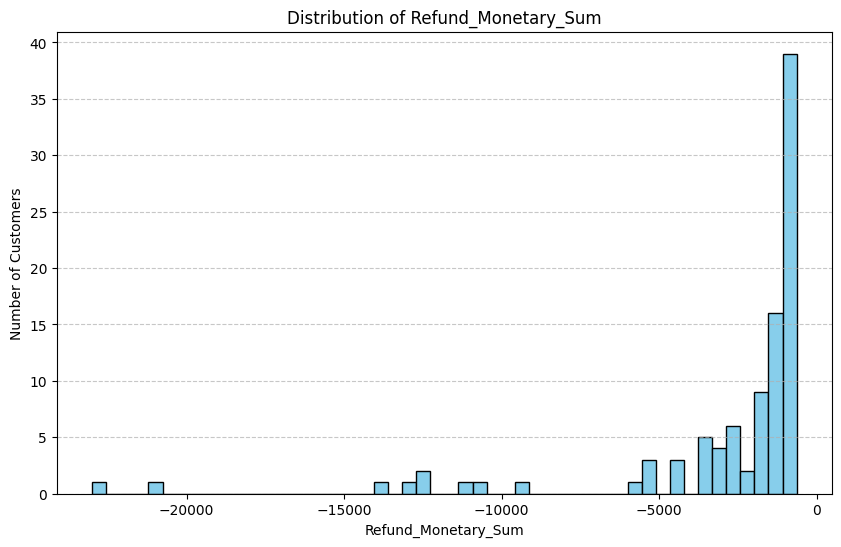

In [43]:
# Plotting the distribution of 'Frequency' for these high-frequency customers
plt.figure(figsize=(10, 6))
plt.hist(outliers_rfm['Refund_Monetary_Sum'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Refund_Monetary_Sum')
plt.ylabel('Number of Customers')
plt.title('Distribution of Refund_Monetary_Sum')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [44]:
'''customer_ids_to_remove = [
    12346
]

# Remove the rows with these Customer IDs from the data
data = data[~data['Customer ID'].isin(customer_ids_to_remove)]'''

"customer_ids_to_remove = [\n    12346\n]\n\n# Remove the rows with these Customer IDs from the data\ndata = data[~data['Customer ID'].isin(customer_ids_to_remove)]"

In [45]:
data[data['Customer ID']==12346]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country, Revenue]
Index: []

In [ ]:
'''data.to_csv('data4.csv',index=False)'''

In [52]:
# Identify columns with constant values (i.e., all values are the same)
constant_columns = rfm.columns[rfm.nunique() <= 1]

# Display the constant columns
constant_columns.tolist()


['Discount_Frequency',
 'Discount_Monetary_Value',
 'Discount_Ratio',
 'Discount_Revenue_Ratio',
 'Discount_Quantity_Value']

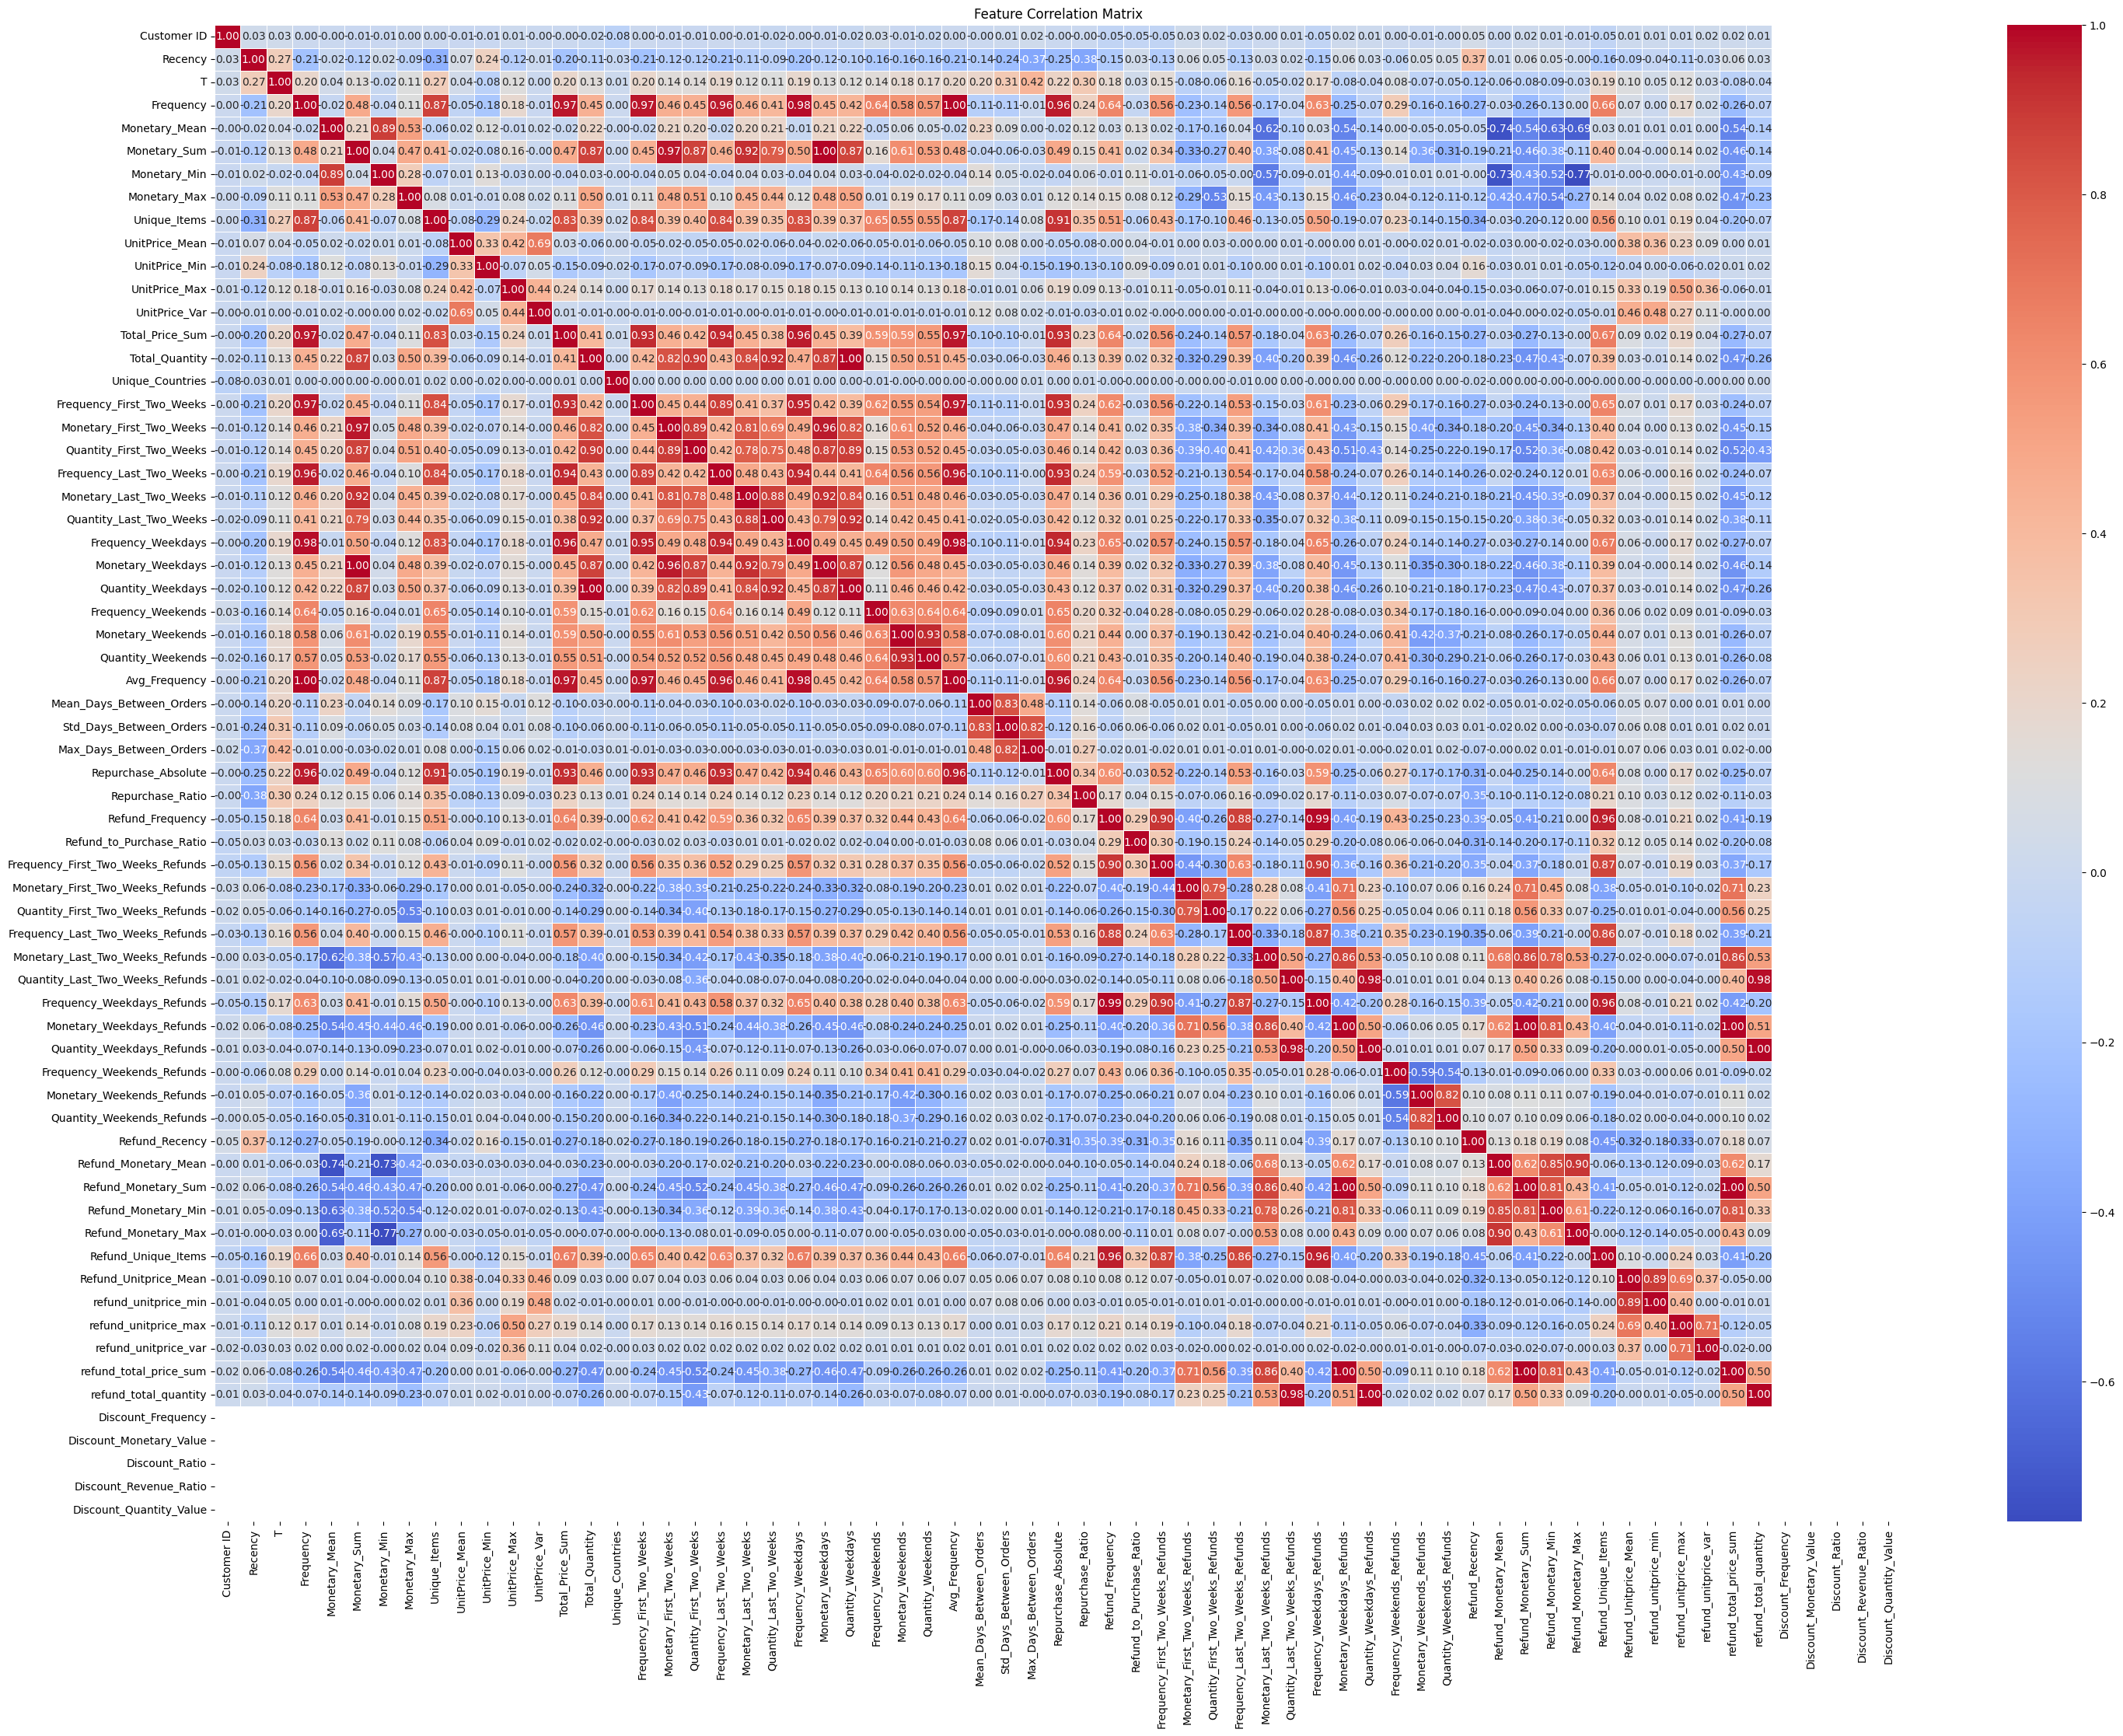

In [46]:
correlation_matrix = rfm.corr()

# Plot heatmap
plt.figure(figsize=(35, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [47]:
# Print correlations above a threshold
threshold = 0.8
for col in correlation_matrix.columns:
    high_corr = correlation_matrix[col][(correlation_matrix[col] >= threshold) & (correlation_matrix[col] < 1)]
    if not high_corr.empty:
        print(f"Features highly correlated with {col}:")
        print(high_corr)

Features highly correlated with Frequency:
Unique_Items                 0.871422
Total_Price_Sum              0.970968
Frequency_First_Two_Weeks    0.968480
Frequency_Last_Two_Weeks     0.964233
Frequency_Weekdays           0.981365
Repurchase_Absolute          0.964817
Name: Frequency, dtype: float64
Features highly correlated with Monetary_Mean:
Monetary_Min    0.886814
Name: Monetary_Mean, dtype: float64
Features highly correlated with Monetary_Sum:
Total_Quantity              0.873301
Monetary_First_Two_Weeks    0.966584
Quantity_First_Two_Weeks    0.874898
Monetary_Last_Two_Weeks     0.919354
Monetary_Weekdays           0.998218
Quantity_Weekdays           0.866187
Name: Monetary_Sum, dtype: float64
Features highly correlated with Monetary_Min:
Monetary_Mean    0.886814
Name: Monetary_Min, dtype: float64
Features highly correlated with Unique_Items:
Frequency                    0.871422
Total_Price_Sum              0.832559
Frequency_First_Two_Weeks    0.840479
Frequency_Last_Two_

In [53]:
# Columns to remove
columns_to_remove = ['Discount_Frequency', 'Discount_Monetary_Value','Discount_Ratio','Discount_Revenue_Ratio','Discount_Quantity_Value',
                    'Customer ID','Monetary_Weekends_Refunds','refund_total_price_sum',
                    'Quantity_Weekdays_Refunds','Quantity_Last_Two_Weeks_Refunds','refund_unitprice_min','Monetary_Last_Two_Weeks_Refunds',
                    'Refund_Unique_Items','Refund_Monetary_Max','Quantity_Weekends','Quantity_Weekdays','Refund_Monetary_Mean','Refund_Monetary_Min',
                    'Std_Days_Between_Orders','Quantity_Weekdays','Quantity_First_Two_Weeks','Quantity_Last_Two_Weeks','Unique_Items','UnitPrice_Var', 
                    'Monetary_First_Two_Weeks', 'Monetary_Last_Two_Weeks','Frequency_Last_Two_Weeks_Refunds','Monetary_First_Two_Weeks_Refunds',
                    'Frequency_First_Two_Weeks_Refunds', 'Repurchase_Absolute','Frequency_Weekdays_Refunds','Monetary_Weekdays_Refunds','Monetary_Min', 
                    'Avg_Frequency','Frequency_First_Two_Weeks','Frequency_Last_Two_Weeks','Frequency_Weekdays','Total_Price_Sum','Total_Quantity']

# Drop the specified columns if they exist in the rfm DataFrame
rfm_reduced = rfm.drop(columns=columns_to_remove)

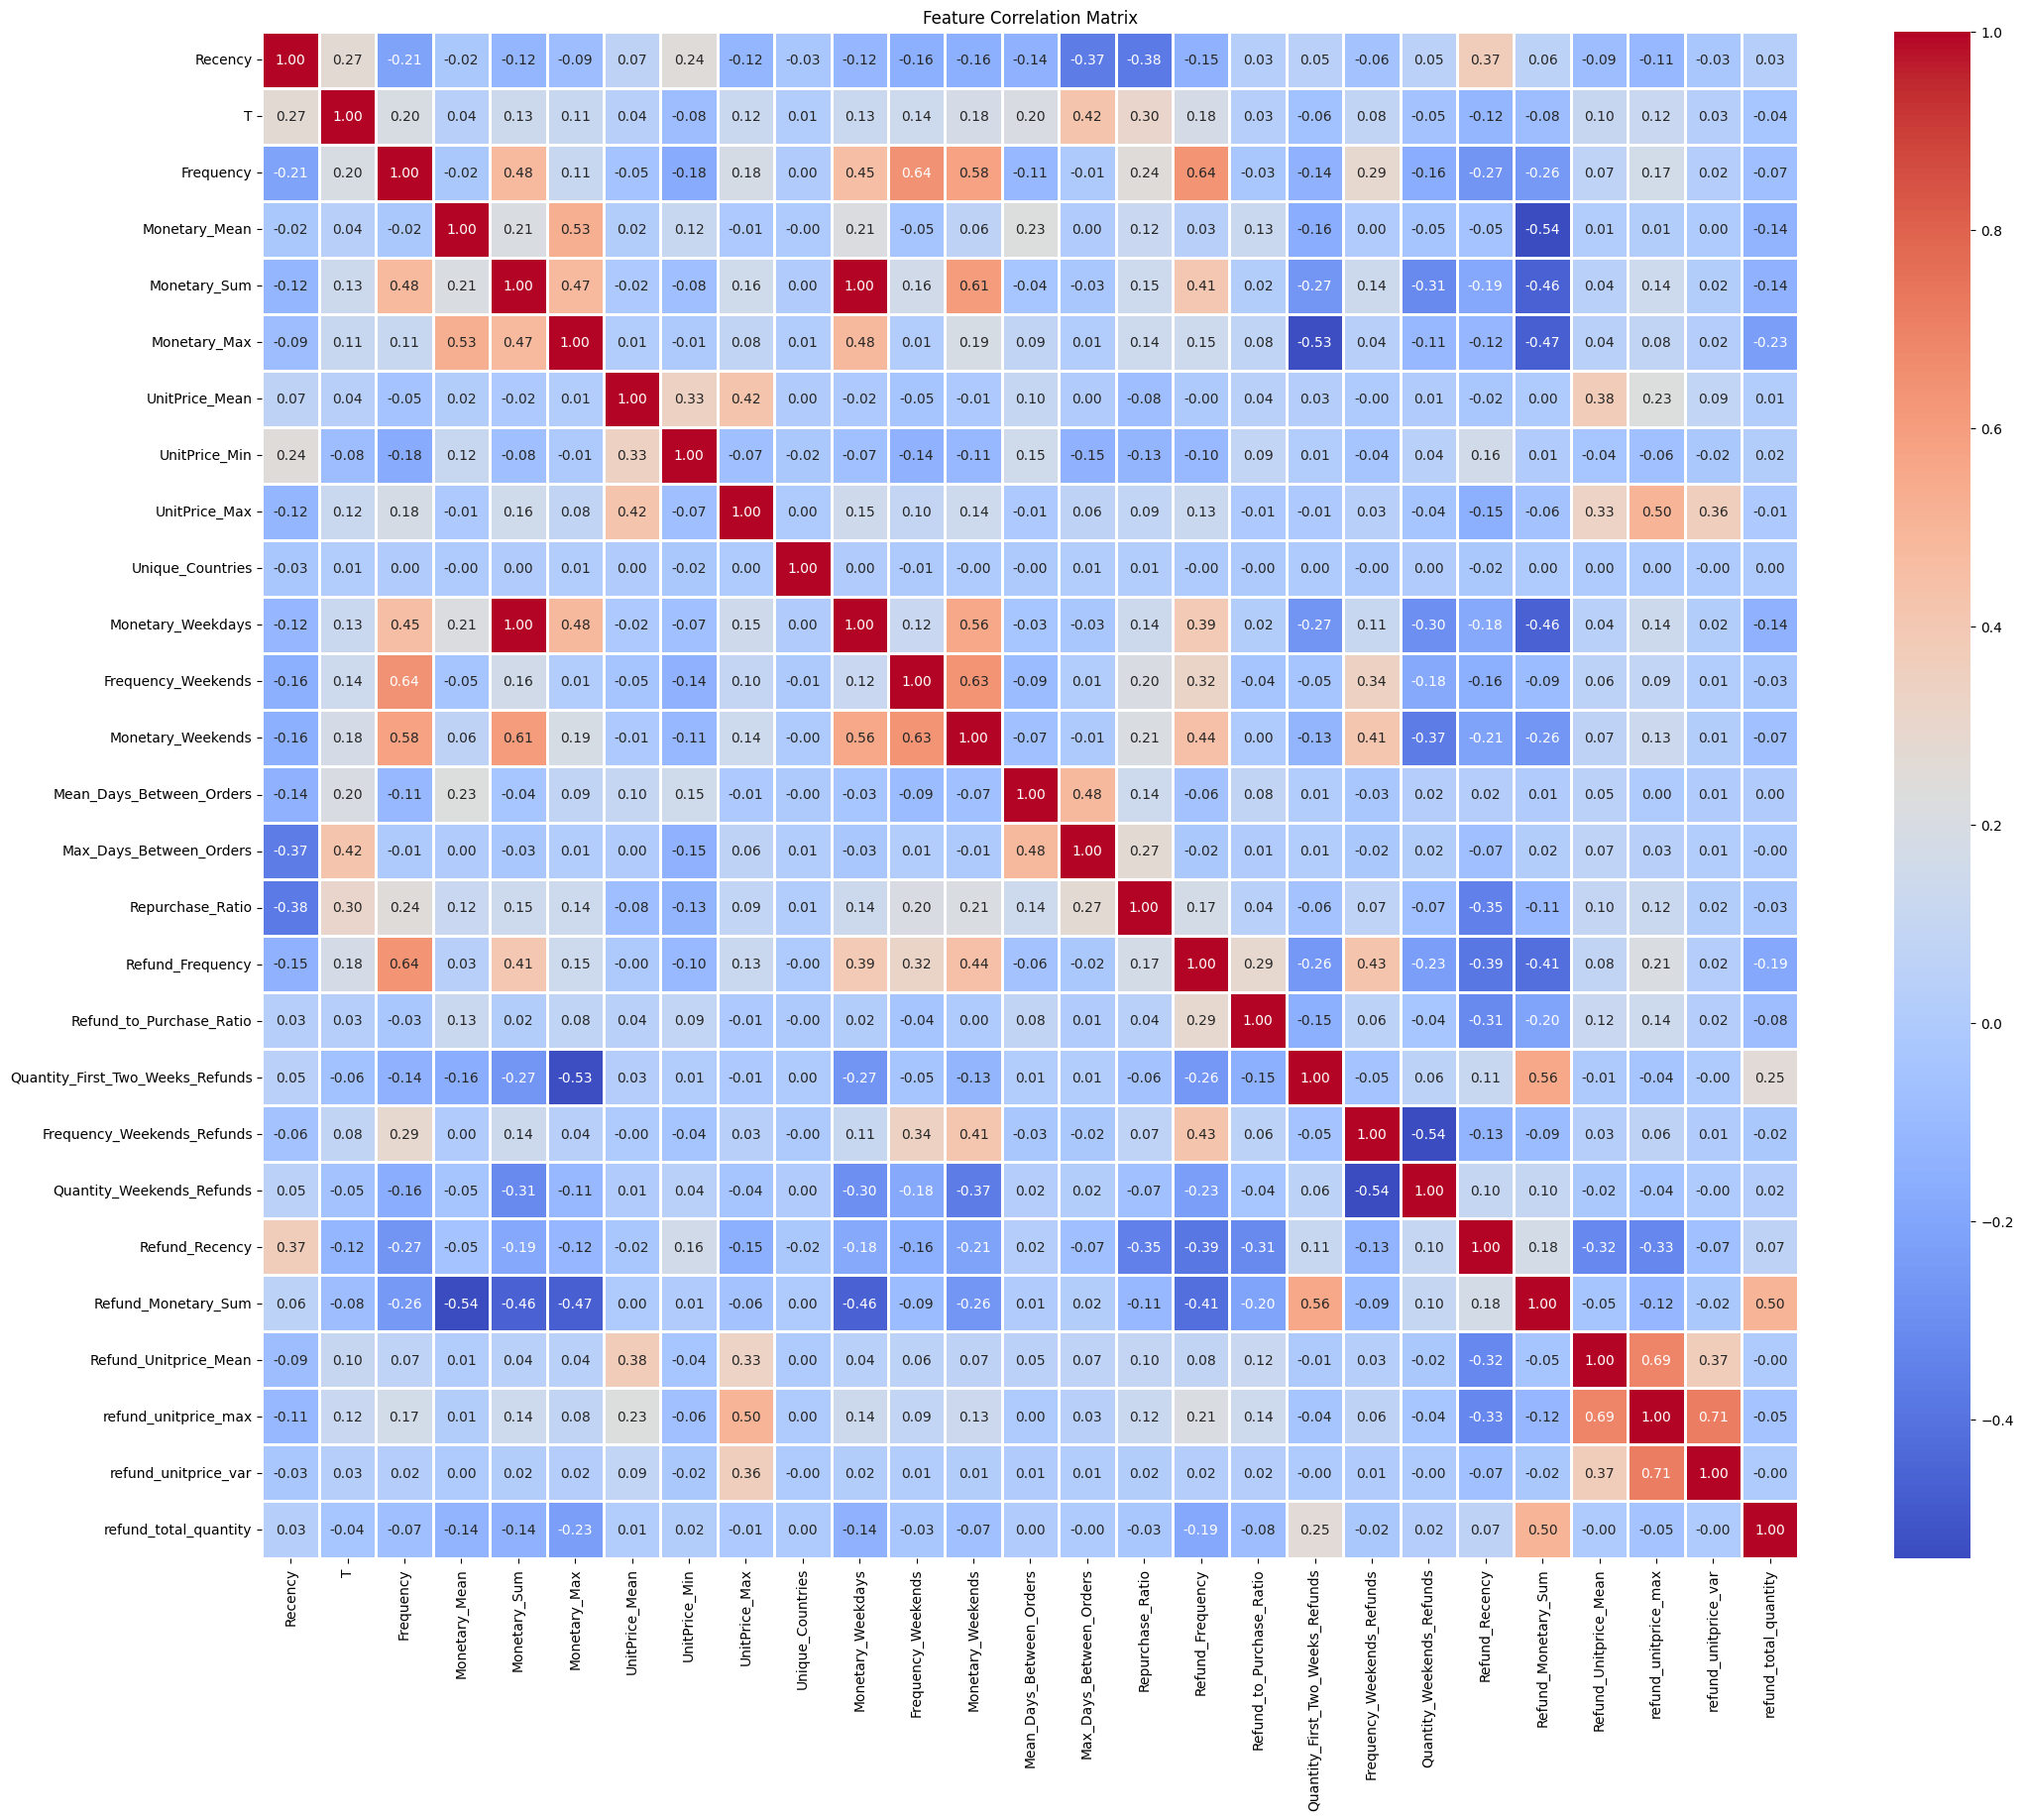

Features highly correlated with Monetary_Sum:
Monetary_Weekdays    0.998218
Name: Monetary_Sum, dtype: float64
Features highly correlated with Monetary_Weekdays:
Monetary_Sum    0.998218
Name: Monetary_Weekdays, dtype: float64


In [54]:
correlation_matrix = rfm_reduced.corr()

# Plot heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1.0)
plt.title('Feature Correlation Matrix')
plt.show()

#Print correlations above a threshold
threshold = 0.8
for col in correlation_matrix.columns:
    high_corr = correlation_matrix[col][(correlation_matrix[col] >= threshold) & (correlation_matrix[col] < 1)]
    if not high_corr.empty:
        print(f"Features highly correlated with {col}:")
        print(high_corr)

### RandomForest

In [72]:
# Calculate the indices for the splits
n = len(data)
train_size = int(0.7 * n)  # First 70% of data for X_train
validation_size = int(0.15 * n)  # Next 15% for y_train and X_test

# Split the data sequentially
train_data = data.iloc[:train_size]  # First 70% for X_train
validation_data = data.iloc[train_size:train_size + validation_size]  # Next 15% for y_train and X_test
test_data = data.iloc[train_size + validation_size:]  # Remaining 15% for y_test

print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(555296, 9)
(118992, 9)
(118992, 9)


In [73]:
test_data

Invoice StockCode                         Description  Quantity  \
674288  570184     21912            VINTAGE SNAKES & LADDERS        12   
674289  570184     22693  GROW A FLYTRAP OR SUNFLOWER IN TIN        24   
674290  570184     22616          PACK OF 12 LONDON TISSUES         24   
674291  570184     23501   KEY RING BASEBALL BOOT UNION JACK        40   
674292  570184     23500    KEY RING BASEBALL BOOT ASSORTED         20   
...        ...       ...                                 ...       ...   
793275  581587     22613         PACK OF 20 SPACEBOY NAPKINS        12   
793276  581587     22899        CHILDREN'S APRON DOLLY GIRL          6   
793277  581587     23254       CHILDRENS CUTLERY DOLLY GIRL          4   
793278  581587     23255     CHILDRENS CUTLERY CIRCUS PARADE         4   
793279  581587     22138       BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Price  Customer ID         Country  Revenue  
674288 2011-10-07 14:46:00   3.75      14029.0  United Kingdom    45.00  
674289 2011-10-07 14:46:00   1.25      14029.0  United Kingdom    30.00  
674290 2011-10-07 14:46:00   0.39      14029.0  United Kingdom     9.36  
674291 2011-10-07 14:46:00   1.25      14029.0  United Kingdom    50.00  
674292 2011-10-07 14:46:00   1.25      14029.0  United Kingdom    25.00  
...                    ...    ...          ...             ...      ...  
793275 2011-12-09 12:50:00   0.85      12680.0          France    10.20  
793276 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
793277 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793278 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793279 2011-12-09 12:50:00   4.95      12680.0          France    14.85  

[118992 rows x 9 columns]

In [74]:
# Calculate RFM features for train, validation, and test sets
rfm_train = calculate_rfm_features(train_data, all_customers)
rfm_validation = calculate_rfm_features(validation_data, all_customers)
rfm_test = calculate_rfm_features(test_data, all_customers)

In [75]:
# Columns to remove
# Columns to remove
columns_to_remove = ['Discount_Frequency', 'Discount_Monetary_Value','Discount_Ratio','Discount_Revenue_Ratio','Discount_Quantity_Value',
                    'Monetary_Weekends_Refunds','refund_total_price_sum',
                    'Quantity_Weekdays_Refunds','Quantity_Last_Two_Weeks_Refunds','refund_unitprice_min','Monetary_Last_Two_Weeks_Refunds',
                    'Refund_Unique_Items','Refund_Monetary_Max','Quantity_Weekends','Quantity_Weekdays','Refund_Monetary_Mean','Refund_Monetary_Min',
                    'Std_Days_Between_Orders','Quantity_Weekdays','Quantity_First_Two_Weeks','Quantity_Last_Two_Weeks','Unique_Items','UnitPrice_Var', 
                    'Monetary_First_Two_Weeks', 'Monetary_Last_Two_Weeks','Frequency_Last_Two_Weeks_Refunds','Monetary_First_Two_Weeks_Refunds',
                    'Frequency_First_Two_Weeks_Refunds', 'Repurchase_Absolute','Frequency_Weekdays_Refunds','Monetary_Weekdays_Refunds','Monetary_Min', 
                    'Avg_Frequency','Frequency_First_Two_Weeks','Frequency_Last_Two_Weeks','Frequency_Weekdays','Total_Price_Sum','Total_Quantity','Refund_to_Purchase_Ratio']

# Drop the specified columns if they exist in the rfm DataFrame
rfm_train = rfm_train.drop(columns=columns_to_remove)
rfm_validation = rfm_validation.drop(columns=columns_to_remove)
rfm_test = rfm_test.drop(columns=columns_to_remove)

In [84]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_train[float_columns] = rfm_train[float_columns].round(2)

In [85]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_validation[float_columns] = rfm_validation[float_columns].round(2)

In [86]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_test[float_columns] = rfm_test[float_columns].round(2)

In [87]:
# Prepare X_train and y_train
X_train = rfm_train.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from first 70% (rfm_train)
y_train = rfm_validation['Monetary_Sum']  # Target from next 15% (rfm_validation)

In [88]:
# Prepare X_test and y_test
X_test = rfm_validation.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from next 15% (rfm_validation)
y_test = rfm_test['Monetary_Sum']  # Target from last 15% (rfm_test)

In [89]:
import numpy as np

# Check for `inf` values in the dataset
inf_columns = X_test.columns[np.isinf(X_test).any()]
if inf_columns.empty:
    print("No infinite values found in the dataset.")
else:
    print("Columns with infinite values:", inf_columns)

    # Display rows with `inf` values
    print("Rows with `inf` values:")
    print(X_test[np.isinf(X_test).any(axis=1)])

No infinite values found in the dataset.


In [90]:
import numpy as np

# Check for `inf` values in the dataset
inf_columns = X_train.columns[np.isinf(X_train).any()]
if inf_columns.empty:
    print("No infinite values found in the dataset.")
else:
    print("Columns with infinite values:", inf_columns)

    # Display rows with `inf` values
    print("Rows with `inf` values:")
    print(X_train[np.isinf(X_train).any(axis=1)])

No infinite values found in the dataset.


In [92]:
# Train a RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [93]:
# Predict the Monetary_Sum for the test dataset
y_pred = rf_model.predict(X_test)

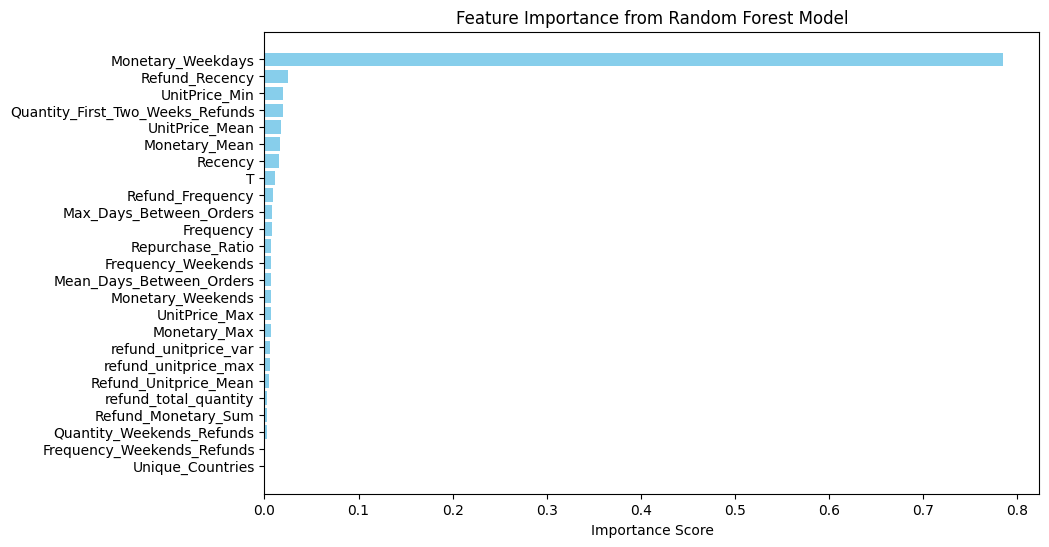

In [94]:
# Get feature importances from the model
importances = rf_model.feature_importances_
# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [95]:

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 477.7170706251268
RMSE: 36.79683882932
R-squared: 0.49849773416662435


### PCA

In [158]:
# Calculate the indices for the splits
n = len(data)
train_size = int(0.7 * n)  # First 70% of data for X_train
validation_size = int(0.15 * n)  # Next 20% for y_train and X_test

# Split the data sequentially
train_data = data.iloc[:train_size]  # First 70% for X_train
validation_data = data.iloc[train_size:train_size + validation_size]  # Next 20% for y_train and X_test
test_data = data.iloc[train_size + validation_size:]  # Remaining 10% for y_test

print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(555296, 9)
(118992, 9)
(118992, 9)


In [159]:
test_data

Invoice StockCode                         Description  Quantity  \
674288  570184     21912            VINTAGE SNAKES & LADDERS        12   
674289  570184     22693  GROW A FLYTRAP OR SUNFLOWER IN TIN        24   
674290  570184     22616          PACK OF 12 LONDON TISSUES         24   
674291  570184     23501   KEY RING BASEBALL BOOT UNION JACK        40   
674292  570184     23500    KEY RING BASEBALL BOOT ASSORTED         20   
...        ...       ...                                 ...       ...   
793275  581587     22613         PACK OF 20 SPACEBOY NAPKINS        12   
793276  581587     22899        CHILDREN'S APRON DOLLY GIRL          6   
793277  581587     23254       CHILDRENS CUTLERY DOLLY GIRL          4   
793278  581587     23255     CHILDRENS CUTLERY CIRCUS PARADE         4   
793279  581587     22138       BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Price  Customer ID         Country  Revenue  
674288 2011-10-07 14:46:00   3.75      14029.0  United Kingdom    45.00  
674289 2011-10-07 14:46:00   1.25      14029.0  United Kingdom    30.00  
674290 2011-10-07 14:46:00   0.39      14029.0  United Kingdom     9.36  
674291 2011-10-07 14:46:00   1.25      14029.0  United Kingdom    50.00  
674292 2011-10-07 14:46:00   1.25      14029.0  United Kingdom    25.00  
...                    ...    ...          ...             ...      ...  
793275 2011-12-09 12:50:00   0.85      12680.0          France    10.20  
793276 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
793277 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793278 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793279 2011-12-09 12:50:00   4.95      12680.0          France    14.85  

[118992 rows x 9 columns]

In [160]:
# Calculate RFM features for train, validation, and test sets
rfm_train = calculate_rfm_features(train_data, all_customers)
rfm_validation = calculate_rfm_features(validation_data, all_customers)
rfm_test = calculate_rfm_features(test_data, all_customers)

In [161]:
# Columns to remove
# Columns to remove
columns_to_remove = ['Discount_Frequency', 'Discount_Monetary_Value','Discount_Ratio','Discount_Revenue_Ratio','Discount_Quantity_Value',
                    'Monetary_Weekends_Refunds','refund_total_price_sum',
                    'Quantity_Weekdays_Refunds','Quantity_Last_Two_Weeks_Refunds','refund_unitprice_min','Monetary_Last_Two_Weeks_Refunds',
                    'Refund_Unique_Items','Refund_Monetary_Max','Quantity_Weekends','Quantity_Weekdays','Refund_Monetary_Mean','Refund_Monetary_Min',
                    'Std_Days_Between_Orders','Quantity_Weekdays','Quantity_First_Two_Weeks','Quantity_Last_Two_Weeks','Unique_Items','UnitPrice_Var', 
                    'Monetary_First_Two_Weeks', 'Monetary_Last_Two_Weeks','Frequency_Last_Two_Weeks_Refunds','Monetary_First_Two_Weeks_Refunds',
                    'Frequency_First_Two_Weeks_Refunds', 'Repurchase_Absolute','Frequency_Weekdays_Refunds','Monetary_Weekdays_Refunds','Monetary_Min', 
                    'Avg_Frequency','Frequency_First_Two_Weeks','Frequency_Last_Two_Weeks','Frequency_Weekdays','Total_Price_Sum','Total_Quantity','Refund_to_Purchase_Ratio']

# Drop the specified columns if they exist in the rfm DataFrame
rfm_train = rfm_train.drop(columns=columns_to_remove)
rfm_validation = rfm_validation.drop(columns=columns_to_remove)
rfm_test = rfm_test.drop(columns=columns_to_remove)

In [162]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_train[float_columns] = rfm_train[float_columns].round(2)

In [163]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_validation[float_columns] = rfm_validation[float_columns].round(2)

In [164]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_test[float_columns] = rfm_test[float_columns].round(2)

In [165]:
# Prepare X_train and y_train
X_train = rfm_train.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from first 70% (rfm_train)
y_train = rfm_validation['Monetary_Sum']  # Target from next 15% (rfm_validation)

In [166]:
# Prepare X_test and y_test
X_test = rfm_validation.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from next 20% (rfm_validation)
y_test = rfm_test['Monetary_Sum']  # Target from last 15% (rfm_test)

In [167]:
# Step 1: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [168]:
# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [169]:
X_train_pca

array([[-2.36244849e+00,  1.81114575e+00,  7.70504492e-01, ...,
         1.48702097e+00, -3.59157523e-03,  9.26721060e-01],
       [-5.05372695e+00, -2.29515056e+00, -1.16494367e+00, ...,
        -3.02071301e-01,  1.01494854e+00,  2.27121233e-01],
       [-4.31163790e-02,  1.20194686e+00,  5.86908539e-01, ...,
         6.69748939e-01,  1.02092812e-01,  4.09666561e-01],
       ...,
       [ 3.06356107e+00, -2.02289400e+00, -5.27802973e-01, ...,
         2.26501091e-01, -6.55213753e-03,  1.79704951e-01],
       [ 3.06356107e+00, -2.02289400e+00, -5.27802973e-01, ...,
         2.26501091e-01, -6.55213753e-03,  1.79704951e-01],
       [ 3.06356107e+00, -2.02289400e+00, -5.27802973e-01, ...,
         2.26501091e-01, -6.55213753e-03,  1.79704951e-01]])

In [170]:
# Step 3: Train the RandomForest model on PCA-transformed data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

RandomForestRegressor(random_state=42)

In [171]:
# Step 4: Predict and Evaluate the Model
y_pred = rf_model.predict(X_test_pca)

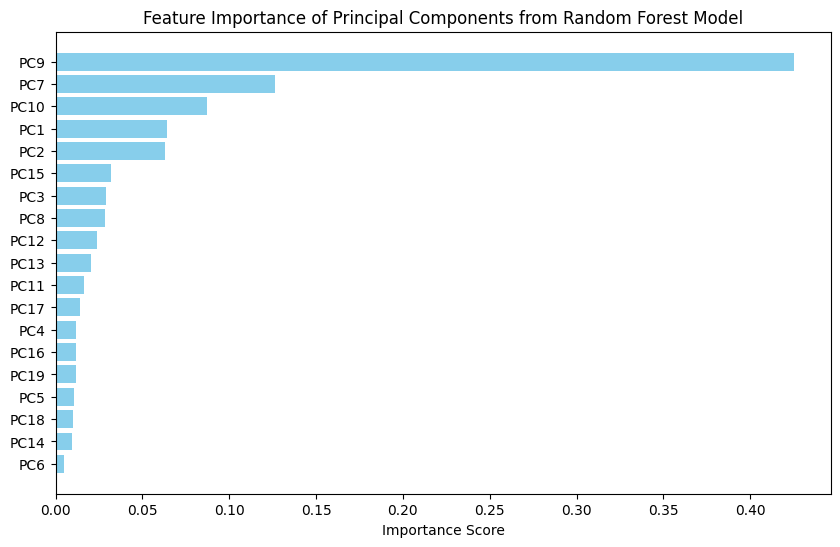

In [172]:
# Get feature importances from the model on the PCA-transformed components
importances = rf_model.feature_importances_
feature_names = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]

# Create a DataFrame for better visualization of feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance of Principal Components from Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


In [173]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_absolute_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 892.0420499782404
Root Mean Squared Error (RMSE): 29.867073006544185
R-squared (R2): -0.09343152457439641


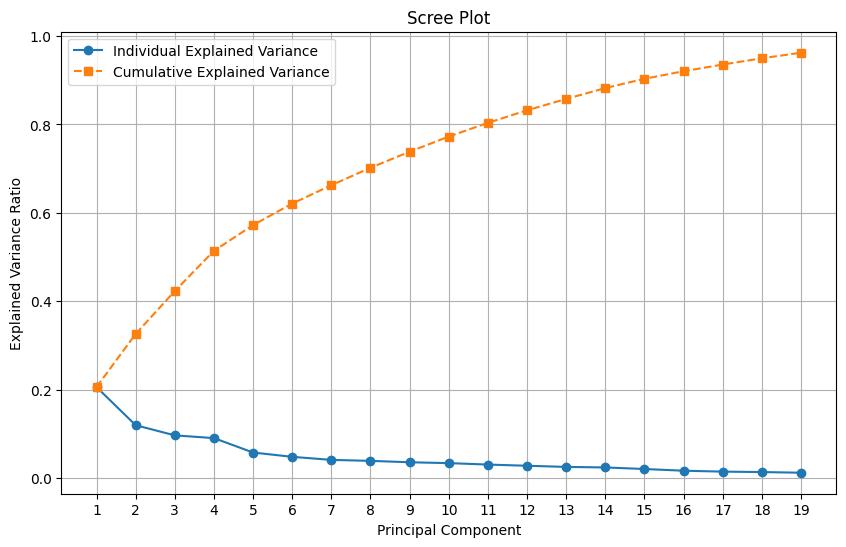

In [174]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', linestyle='--', label='Cumulative Explained Variance')

# Add labels, title, and legend
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.legend(loc='best')
plt.show()


### NN

In [133]:
data = pd.read_csv("data2.csv")

In [134]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [135]:
# Ensure all_customers is a DataFrame
all_customers = pd.DataFrame(data['Customer ID'].unique(), columns=['Customer ID'])

In [136]:
all_customers

Customer ID
0         13085.0
1         13078.0
2         15362.0
3         18102.0
4         12682.0
...           ...
5848      15195.0
5849      13436.0
5850      15520.0
5851      13298.0
5852      12713.0

[5853 rows x 1 columns]

In [137]:
# Ensure all_customers is a DataFrame
all_customers = data['Customer ID'].unique()

In [138]:
len(all_customers)

5853

In [139]:
data

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
794237  581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
794238  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
794239  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
794240  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
794241  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Price  Customer ID         Country  Revenue  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00  
...                    ...    ...          ...             ...      ...  
794237 2011-12-09 12:50:00   0.85      12680.0          France    10.20  
794238 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
794239 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
794240 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
794241 2011-12-09 12:50:00   4.95      12680.0          France    14.85  

[794242 rows x 9 columns]

In [140]:
'''from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode 'Country' as a single numeric column
data['Country'] = label_encoder.fit_transform(data['Country'])

# Convert 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract Year, Month, Weekday, and Hour from 'InvoiceDate'
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Weekday'] = data['InvoiceDate'].dt.weekday  # Monday=0, Sunday=6
data['Hour'] = data['InvoiceDate'].dt.hour
data['Minute'] = data['InvoiceDate'].dt.minute'''



"from sklearn.preprocessing import LabelEncoder\n\n# Initialize label encoder\nlabel_encoder = LabelEncoder()\n\n# Encode 'Country' as a single numeric column\ndata['Country'] = label_encoder.fit_transform(data['Country'])\n\n# Convert 'InvoiceDate' to datetime format\ndata['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])\n\n# Extract Year, Month, Weekday, and Hour from 'InvoiceDate'\ndata['Year'] = data['InvoiceDate'].dt.year\ndata['Month'] = data['InvoiceDate'].dt.month\ndata['Weekday'] = data['InvoiceDate'].dt.weekday  # Monday=0, Sunday=6\ndata['Hour'] = data['InvoiceDate'].dt.hour\ndata['Minute'] = data['InvoiceDate'].dt.minute"

In [141]:
# Drop 'InvoiceDate' if you no longer need it
#data.drop(columns=['InvoiceDate'], inplace=True)

In [175]:
data

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
793275  581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
793276  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
793277  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
793278  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
793279  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Price  Customer ID         Country  Revenue  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00  
...                    ...    ...          ...             ...      ...  
793275 2011-12-09 12:50:00   0.85      12680.0          France    10.20  
793276 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
793277 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793278 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793279 2011-12-09 12:50:00   4.95      12680.0          France    14.85  

[793280 rows x 9 columns]

In [176]:
# Calculate the indices for the splits
n = len(data)
train_size = int(0.7 * n)  # First 70% for X_train
validation1_size = int(0.1 * n)  # Next 10% for validation1
validation2_size = int(0.1 * n)  # Following 10% for validation2
test_size = int(0.1 * n)  # Last 10% for test

# Split the data sequentially
train_data = data.iloc[:train_size]  # First 70%
validation_data1 = data.iloc[train_size:train_size + validation1_size]  # Next 10%
validation_data2 = data.iloc[train_size + validation1_size:train_size + validation1_size + validation2_size]  # Following 10%
test_data = data.iloc[train_size + validation1_size + validation2_size:]  # Remaining 10%

# Check the shapes of each split to verify
print("Train data shape:", train_data.shape)
print("Validation data 1 shape:", validation_data1.shape)
print("Validation data 2 shape:", validation_data2.shape)
print("Test data shape:", test_data.shape)

Train data shape: (555296, 9)
Validation data 1 shape: (79328, 9)
Validation data 2 shape: (79328, 9)
Test data shape: (79328, 9)


In [177]:
validation_data2

Invoice StockCode                   Description  Quantity  \
634624  566394     20728           LUNCH BAG CARS BLUE        10   
634625  566394     22383        LUNCH BAG SUKI DESIGN         10   
634626  566394     23203      JUMBO BAG VINTAGE DOILY         10   
634627  566394     23201            JUMBO BAG ALPHABET        10   
634628  566394     22147    FELTCRAFT BUTTERFLY HEARTS        12   
...        ...       ...                           ...       ...   
713947  573927     21257   VICTORIAN SEWING BOX MEDIUM         2   
713948  573927     21259   VICTORIAN SEWING BOX SMALL          2   
713949  573927     22795  SWEETHEART RECIPE BOOK STAND         2   
713950  573927     23536        WALL ART VILLAGE SHOW          4   
713951  573927     82583          HOT BATHS METAL SIGN        12   

               InvoiceDate  Price  Customer ID         Country  Revenue  
634624 2011-09-12 12:45:00   1.65      13650.0  United Kingdom     16.5  
634625 2011-09-12 12:45:00   1.65      13650.0  United Kingdom     16.5  
634626 2011-09-12 12:45:00   2.08      13650.0  United Kingdom     20.8  
634627 2011-09-12 12:45:00   2.08      13650.0  United Kingdom     20.8  
634628 2011-09-12 12:45:00   1.45      13650.0  United Kingdom     17.4  
...                    ...    ...          ...             ...      ...  
713947 2011-11-02 09:59:00   7.95      13890.0  United Kingdom     15.9  
713948 2011-11-02 09:59:00   5.95      13890.0  United Kingdom     11.9  
713949 2011-11-02 09:59:00   6.75      13890.0  United Kingdom     13.5  
713950 2011-11-02 09:59:00   5.95      13890.0  United Kingdom     23.8  
713951 2011-11-02 09:59:00   2.10      13890.0  United Kingdom     25.2  

[79328 rows x 9 columns]

In [178]:
# Calculate RFM features for train, validation, and test sets
rfm_train = calculate_rfm_features(train_data, all_customers)
rfm_validation1 = calculate_rfm_features(validation_data1, all_customers)
rfm_validation2 = calculate_rfm_features(validation_data2, all_customers)
rfm_test = calculate_rfm_features(test_data, all_customers)

In [179]:
# Columns to remove
# Columns to remove
columns_to_remove = ['Discount_Frequency', 'Discount_Monetary_Value','Discount_Ratio','Discount_Revenue_Ratio','Discount_Quantity_Value',
                    'Monetary_Weekends_Refunds','refund_total_price_sum',
                    'Quantity_Weekdays_Refunds','Quantity_Last_Two_Weeks_Refunds','refund_unitprice_min','Monetary_Last_Two_Weeks_Refunds',
                    'Refund_Unique_Items','Refund_Monetary_Max','Quantity_Weekends','Quantity_Weekdays','Refund_Monetary_Mean','Refund_Monetary_Min',
                    'Std_Days_Between_Orders','Quantity_Weekdays','Quantity_First_Two_Weeks','Quantity_Last_Two_Weeks','Unique_Items','UnitPrice_Var', 
                    'Monetary_First_Two_Weeks', 'Monetary_Last_Two_Weeks','Frequency_Last_Two_Weeks_Refunds','Monetary_First_Two_Weeks_Refunds',
                    'Frequency_First_Two_Weeks_Refunds', 'Repurchase_Absolute','Frequency_Weekdays_Refunds','Monetary_Weekdays_Refunds','Monetary_Min', 
                    'Avg_Frequency','Frequency_First_Two_Weeks','Frequency_Last_Two_Weeks','Frequency_Weekdays','Total_Price_Sum','Total_Quantity','Refund_to_Purchase_Ratio']
# Drop the specified columns if they exist in the rfm DataFrame
rfm_train = rfm_train.drop(columns=columns_to_remove)
rfm_validation1 = rfm_validation1.drop(columns=columns_to_remove)
rfm_validation2 = rfm_validation2.drop(columns=columns_to_remove)
rfm_test = rfm_test.drop(columns=columns_to_remove)

In [180]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_train[float_columns] = rfm_train[float_columns].round(2)

In [181]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_validation1[float_columns] = rfm_validation1[float_columns].round(2)

In [182]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_validation2[float_columns] = rfm_validation2[float_columns].round(2)

In [183]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_test[float_columns] = rfm_test[float_columns].round(2)

In [184]:
# Prepare X_train and y_train
X_train = rfm_train.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from first 70% (rfm_train)
y_train = rfm_validation1['Monetary_Sum']  # Target from next 10% (rfm_validation)

In [185]:
X_val = rfm_validation1.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from first 70% (rfm_train)
y_val = rfm_validation2['Monetary_Sum']  # Target from next 10% (rfm_validation)

In [186]:
# Prepare X_test and y_test
X_test = rfm_validation2.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from next 20% (rfm_validation)
y_test = rfm_test['Monetary_Sum']  # Target from last 10% (rfm_test)

In [187]:
X_train

Recency      T  Frequency  Monetary_Mean  Monetary_Max  UnitPrice_Mean  \
0       118.0  562.0       75.0          30.60        100.80            3.36   
1         3.0  562.0      610.0          34.69        237.60            4.01   
2       272.0  562.0       40.0          15.33         35.80            3.61   
3         1.0  562.0      728.0         587.82       3884.00            3.69   
4         1.0  562.0      697.0          21.73        171.84            2.92   
...       ...    ...        ...            ...           ...             ...   
5522    562.0    0.0        0.0           0.00          0.00            0.00   
5523    562.0    0.0        0.0           0.00          0.00            0.00   
5524    562.0    0.0        0.0           0.00          0.00            0.00   
5525    562.0    0.0        0.0           0.00          0.00            0.00   
5526    562.0    0.0        0.0           0.00          0.00            0.00   

      UnitPrice_Min  UnitPrice_Max  Unique_Countries  Monetary_Weekdays  ...  \
0              0.55           7.95               1.0            2295.30  ...   
1              0.19          12.75               1.0           18935.55  ...   
2              0.21           9.95               1.0             613.08  ...   
3              0.27          52.78               1.0          404591.29  ...   
4              0.21          12.75               1.0           14459.42  ...   
...             ...            ...               ...                ...  ...   
5522           0.00           0.00               0.0               0.00  ...   
5523           0.00           0.00               0.0               0.00  ...   
5524           0.00           0.00               0.0               0.00  ...   
5525           0.00           0.00               0.0               0.00  ...   
5526           0.00           0.00               0.0               0.00  ...   

      Refund_Frequency  Quantity_First_Two_Weeks_Refunds  \
0                    7                                 0   
1                   42                               -31   
2                    0                                 0   
3                    4                                 0   
4                    3                                -9   
...                ...                               ...   
5522                 0                                 0   
5523                 0                                 0   
5524                 0                                 0   
5525                 0                                 0   
5526                 0                                 0   

      Frequency_Weekends_Refunds  Quantity_Weekends_Refunds  Refund_Recency  \
0                              0                          0            48.0   
1                              0                          0            22.0   
2                              0                          0           562.0   
3                              2                       -432           323.0   
4                              0                          0           371.0   
...                          ...                        ...             ...   
5522                           0                          0           562.0   
5523                           0                          0           562.0   
5524                           0                          0           562.0   
5525                           0                          0           562.0   
5526                           0                          0           562.0   

      Refund_Monetary_Sum  Refund_Unitprice_Mean  refund_unitprice_max  \
0                 -143.70                   1.83                  2.95   
1                 -576.01                   5.70                 12.75   
2                    0.00                   0.00                  0.00   
3                -2578.40                   3.79                  4.58   
4                  -88.10                   

In [188]:
import tensorflow as tf

# Check if any GPU is detected
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-12-02 10:13:40.463475: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 10:13:44.400466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733156025.690750     914 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733156026.037902     914 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 10:13:49.333739: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Num GPUs Available:  1


In [189]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set TensorFlow to use only the first GPU
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print(f"Using GPU: {gpus[0]}")
    except RuntimeError as e:
        print(e)

Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [190]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [191]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [192]:
# Build the FCNN model and train it on the GPU
with tf.device('/GPU:0'):  # Use GPU if available
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

I0000 00:00:1733156101.179099     914 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1778 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
/mnt/c/Users/Shashwat/Documents/CapstoneCoding/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [193]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50


I0000 00:00:1733156107.729319   15755 service.cc:148] XLA service 0x7efa340038c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733156107.729741   15755 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-12-02 10:15:08.126654: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733156108.667789   15755 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-02 10:15:08.975491: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.3 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


 42/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 542728.6875 - mae: 280.6991

I0000 00:00:1733156113.575242   15755 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 1496413.2500 - mae: 296.1473 - val_loss: 3842646.5000 - val_mae: 293.9827
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 719357.4375 - mae: 273.3727 - val_loss: 4304645.0000 - val_mae: 303.8977
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 711671.8750 - mae: 279.8958 - val_loss: 4060601.5000 - val_mae: 299.6716
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 997602.6875 - mae: 296.5958 - val_loss: 4202876.5000 - val_mae: 304.4761
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1111620.8750 - mae: 257.9887 - val_loss: 4089744.5000 - val_mae: 299.5535
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1401623.3750 - mae: 305.3204 - val_loss: 4096970.0000 - val_mae: 301.2457
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1515461.6250 - mae: 291.7189 - val_loss: 4179577.5000 - val_mae: 302.2843
Epoch 8/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1145706.6250 -

In [194]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2338835.2500 - mae: 396.3053
Test MAE: 250.77322387695312


In [195]:
import matplotlib.pyplot as plt

# Plot training & validation loss and MAE over epochs
def plot_performance(history):
    # Loss plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # MAE plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Training and Validation MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()




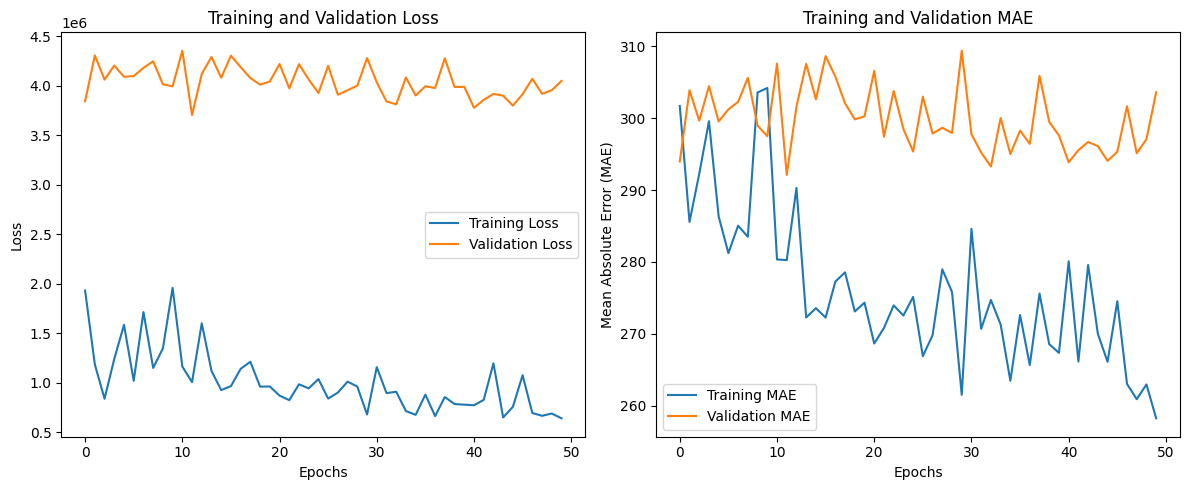

In [196]:
# Call the function with the training history
plot_performance(history)

### RandomForest without Monetary_weekdays

In [197]:
# Calculate the indices for the splits
n = len(data)
train_size = int(0.7 * n)  # First 70% of data for X_train
validation_size = int(0.15 * n)  # Next 15% for y_train and X_test

# Split the data sequentially
train_data = data.iloc[:train_size]  # First 70% for X_train
validation_data = data.iloc[train_size:train_size + validation_size]  # Next 15% for y_train and X_test
test_data = data.iloc[train_size + validation_size:]  # Remaining 15% for y_test

print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(555296, 9)
(118992, 9)
(118992, 9)


In [198]:
test_data

Invoice StockCode                         Description  Quantity  \
674288  570184     21912            VINTAGE SNAKES & LADDERS        12   
674289  570184     22693  GROW A FLYTRAP OR SUNFLOWER IN TIN        24   
674290  570184     22616          PACK OF 12 LONDON TISSUES         24   
674291  570184     23501   KEY RING BASEBALL BOOT UNION JACK        40   
674292  570184     23500    KEY RING BASEBALL BOOT ASSORTED         20   
...        ...       ...                                 ...       ...   
793275  581587     22613         PACK OF 20 SPACEBOY NAPKINS        12   
793276  581587     22899        CHILDREN'S APRON DOLLY GIRL          6   
793277  581587     23254       CHILDRENS CUTLERY DOLLY GIRL          4   
793278  581587     23255     CHILDRENS CUTLERY CIRCUS PARADE         4   
793279  581587     22138       BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Price  Customer ID         Country  Revenue  
674288 2011-10-07 14:46:00   3.75      14029.0  United Kingdom    45.00  
674289 2011-10-07 14:46:00   1.25      14029.0  United Kingdom    30.00  
674290 2011-10-07 14:46:00   0.39      14029.0  United Kingdom     9.36  
674291 2011-10-07 14:46:00   1.25      14029.0  United Kingdom    50.00  
674292 2011-10-07 14:46:00   1.25      14029.0  United Kingdom    25.00  
...                    ...    ...          ...             ...      ...  
793275 2011-12-09 12:50:00   0.85      12680.0          France    10.20  
793276 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
793277 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793278 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793279 2011-12-09 12:50:00   4.95      12680.0          France    14.85  

[118992 rows x 9 columns]

In [199]:
# Calculate RFM features for train, validation, and test sets
rfm_train = calculate_rfm_features(train_data, all_customers)
rfm_validation = calculate_rfm_features(validation_data, all_customers)
rfm_test = calculate_rfm_features(test_data, all_customers)

In [200]:
# Columns to remove
# Columns to remove
columns_to_remove = ['Discount_Frequency', 'Discount_Monetary_Value','Discount_Ratio','Discount_Revenue_Ratio','Discount_Quantity_Value',
                    'Monetary_Weekends_Refunds','refund_total_price_sum',
                    'Quantity_Weekdays_Refunds','Quantity_Last_Two_Weeks_Refunds','refund_unitprice_min','Monetary_Last_Two_Weeks_Refunds',
                    'Refund_Unique_Items','Refund_Monetary_Max','Quantity_Weekends','Quantity_Weekdays','Refund_Monetary_Mean','Refund_Monetary_Min',
                    'Std_Days_Between_Orders','Quantity_Weekdays','Quantity_First_Two_Weeks','Quantity_Last_Two_Weeks','Unique_Items','UnitPrice_Var', 
                    'Monetary_First_Two_Weeks', 'Monetary_Last_Two_Weeks','Frequency_Last_Two_Weeks_Refunds','Monetary_First_Two_Weeks_Refunds',
                    'Frequency_First_Two_Weeks_Refunds', 'Repurchase_Absolute','Frequency_Weekdays_Refunds','Monetary_Weekdays_Refunds','Monetary_Min', 
                    'Avg_Frequency','Frequency_First_Two_Weeks','Frequency_Last_Two_Weeks','Frequency_Weekdays','Total_Price_Sum','Total_Quantity','Refund_to_Purchase_Ratio']

# Drop the specified columns if they exist in the rfm DataFrame
rfm_train = rfm_train.drop(columns=columns_to_remove)
rfm_validation = rfm_validation.drop(columns=columns_to_remove)
rfm_test = rfm_test.drop(columns=columns_to_remove)

In [201]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_train[float_columns] = rfm_train[float_columns].round(2)

In [202]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_validation[float_columns] = rfm_validation[float_columns].round(2)

In [203]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_test[float_columns] = rfm_test[float_columns].round(2)

In [205]:
rfm_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5527 entries, 0 to 5526
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer ID                       5527 non-null   float64
 1   Recency                           5527 non-null   float64
 2   T                                 5527 non-null   float64
 3   Frequency                         5527 non-null   float64
 4   Monetary_Mean                     5527 non-null   float64
 5   Monetary_Sum                      5527 non-null   float64
 6   Monetary_Max                      5527 non-null   float64
 7   UnitPrice_Mean                    5527 non-null   float64
 8   UnitPrice_Min                     5527 non-null   float64
 9   UnitPrice_Max                     5527 non-null   float64
 10  Unique_Countries                  5527 non-null   float64
 11  Monetary_Weekdays                 5527 non-null   float64
 12  Freque

In [206]:
# Prepare X_train and y_train
X_train = rfm_train.drop(['Monetary_Sum', 'Customer ID', 'Monetary_Weekdays'], axis=1)  # Features from first 70% (rfm_train)
y_train = rfm_validation['Monetary_Sum']  # Target from next 15% (rfm_validation)

In [207]:
# Prepare X_test and y_test
X_test = rfm_validation.drop(['Monetary_Sum', 'Customer ID', 'Monetary_Weekdays'], axis=1)  # Features from next 15% (rfm_validation)
y_test = rfm_test['Monetary_Sum']  # Target from last 15% (rfm_test)

In [208]:
import numpy as np

# Check for `inf` values in the dataset
inf_columns = X_test.columns[np.isinf(X_test).any()]
if inf_columns.empty:
    print("No infinite values found in the dataset.")
else:
    print("Columns with infinite values:", inf_columns)

    # Display rows with `inf` values
    print("Rows with `inf` values:")
    print(X_test[np.isinf(X_test).any(axis=1)])

No infinite values found in the dataset.


In [209]:
import numpy as np

# Check for `inf` values in the dataset
inf_columns = X_train.columns[np.isinf(X_train).any()]
if inf_columns.empty:
    print("No infinite values found in the dataset.")
else:
    print("Columns with infinite values:", inf_columns)

    # Display rows with `inf` values
    print("Rows with `inf` values:")
    print(X_train[np.isinf(X_train).any(axis=1)])

No infinite values found in the dataset.


In [210]:
# Train a RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [211]:
# Predict the Monetary_Sum for the test dataset
y_pred = rf_model.predict(X_test)

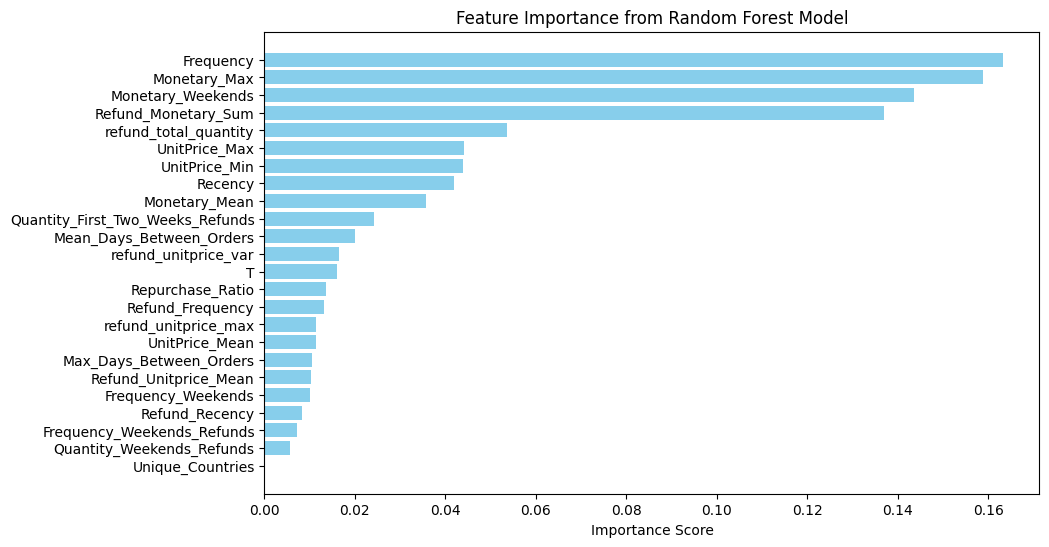

In [212]:
# Get feature importances from the model
importances = rf_model.feature_importances_
# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [213]:

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 480.4712640208031
RMSE: 38.968588098740504
R-squared: 0.369203114317152


### PCA without Monetary_Weekdays

In [214]:
# Calculate the indices for the splits
n = len(data)
train_size = int(0.7 * n)  # First 70% of data for X_train
validation_size = int(0.15 * n)  # Next 20% for y_train and X_test

# Split the data sequentially
train_data = data.iloc[:train_size]  # First 70% for X_train
validation_data = data.iloc[train_size:train_size + validation_size]  # Next 20% for y_train and X_test
test_data = data.iloc[train_size + validation_size:]  # Remaining 10% for y_test

print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(555296, 9)
(118992, 9)
(118992, 9)


In [215]:
test_data

Invoice StockCode                         Description  Quantity  \
674288  570184     21912            VINTAGE SNAKES & LADDERS        12   
674289  570184     22693  GROW A FLYTRAP OR SUNFLOWER IN TIN        24   
674290  570184     22616          PACK OF 12 LONDON TISSUES         24   
674291  570184     23501   KEY RING BASEBALL BOOT UNION JACK        40   
674292  570184     23500    KEY RING BASEBALL BOOT ASSORTED         20   
...        ...       ...                                 ...       ...   
793275  581587     22613         PACK OF 20 SPACEBOY NAPKINS        12   
793276  581587     22899        CHILDREN'S APRON DOLLY GIRL          6   
793277  581587     23254       CHILDRENS CUTLERY DOLLY GIRL          4   
793278  581587     23255     CHILDRENS CUTLERY CIRCUS PARADE         4   
793279  581587     22138       BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Price  Customer ID         Country  Revenue  
674288 2011-10-07 14:46:00   3.75      14029.0  United Kingdom    45.00  
674289 2011-10-07 14:46:00   1.25      14029.0  United Kingdom    30.00  
674290 2011-10-07 14:46:00   0.39      14029.0  United Kingdom     9.36  
674291 2011-10-07 14:46:00   1.25      14029.0  United Kingdom    50.00  
674292 2011-10-07 14:46:00   1.25      14029.0  United Kingdom    25.00  
...                    ...    ...          ...             ...      ...  
793275 2011-12-09 12:50:00   0.85      12680.0          France    10.20  
793276 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
793277 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793278 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793279 2011-12-09 12:50:00   4.95      12680.0          France    14.85  

[118992 rows x 9 columns]

In [216]:
# Calculate RFM features for train, validation, and test sets
rfm_train = calculate_rfm_features(train_data, all_customers)
rfm_validation = calculate_rfm_features(validation_data, all_customers)
rfm_test = calculate_rfm_features(test_data, all_customers)

In [217]:
# Columns to remove
# Columns to remove
columns_to_remove = ['Discount_Frequency', 'Discount_Monetary_Value','Discount_Ratio','Discount_Revenue_Ratio','Discount_Quantity_Value',
                    'Monetary_Weekends_Refunds','refund_total_price_sum',
                    'Quantity_Weekdays_Refunds','Quantity_Last_Two_Weeks_Refunds','refund_unitprice_min','Monetary_Last_Two_Weeks_Refunds',
                    'Refund_Unique_Items','Refund_Monetary_Max','Quantity_Weekends','Quantity_Weekdays','Refund_Monetary_Mean','Refund_Monetary_Min',
                    'Std_Days_Between_Orders','Quantity_Weekdays','Quantity_First_Two_Weeks','Quantity_Last_Two_Weeks','Unique_Items','UnitPrice_Var', 
                    'Monetary_First_Two_Weeks', 'Monetary_Last_Two_Weeks','Frequency_Last_Two_Weeks_Refunds','Monetary_First_Two_Weeks_Refunds',
                    'Frequency_First_Two_Weeks_Refunds', 'Repurchase_Absolute','Frequency_Weekdays_Refunds','Monetary_Weekdays_Refunds','Monetary_Min', 
                    'Avg_Frequency','Frequency_First_Two_Weeks','Frequency_Last_Two_Weeks','Frequency_Weekdays','Total_Price_Sum','Total_Quantity','Refund_to_Purchase_Ratio']

# Drop the specified columns if they exist in the rfm DataFrame
rfm_train = rfm_train.drop(columns=columns_to_remove)
rfm_validation = rfm_validation.drop(columns=columns_to_remove)
rfm_test = rfm_test.drop(columns=columns_to_remove)

In [218]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_train[float_columns] = rfm_train[float_columns].round(2)

In [219]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_validation[float_columns] = rfm_validation[float_columns].round(2)

In [220]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_test[float_columns] = rfm_test[float_columns].round(2)

In [221]:
# Prepare X_train and y_train
X_train = rfm_train.drop(['Monetary_Sum', 'Customer ID', 'Monetary_Weekdays'], axis=1)  # Features from first 70% (rfm_train)
y_train = rfm_validation['Monetary_Sum']  # Target from next 15% (rfm_validation)

In [222]:
# Prepare X_test and y_test
X_test = rfm_validation.drop(['Monetary_Sum', 'Customer ID','Monetary_Weekdays'], axis=1)  # Features from next 20% (rfm_validation)
y_test = rfm_test['Monetary_Sum']  # Target from last 15% (rfm_test)

In [223]:
# Step 1: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [224]:
# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [225]:
X_train_pca

array([[-2.54682353e+00, -1.51163232e+00,  7.97278810e-01, ...,
        -7.01571500e-01,  1.40390602e+00, -8.27781483e-03],
       [-4.63424505e+00,  2.61357471e+00, -9.19451927e-01, ...,
         5.21291490e-01, -1.95978747e-01,  1.07600254e+00],
       [-1.58450807e-01, -1.18096743e+00,  5.56650022e-01, ...,
        -2.57716355e-01,  6.41532656e-01,  1.05763265e-01],
       ...,
       [ 3.22924843e+00,  1.72393012e+00, -5.03324979e-01, ...,
        -4.22957374e-02,  2.24486694e-01, -2.29029078e-03],
       [ 3.22924843e+00,  1.72393012e+00, -5.03324979e-01, ...,
        -4.22957374e-02,  2.24486694e-01, -2.29029078e-03],
       [ 3.22924843e+00,  1.72393012e+00, -5.03324979e-01, ...,
        -4.22957374e-02,  2.24486694e-01, -2.29029078e-03]])

In [226]:
# Step 3: Train the RandomForest model on PCA-transformed data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

RandomForestRegressor(random_state=42)

In [227]:
# Step 4: Predict and Evaluate the Model
y_pred = rf_model.predict(X_test_pca)

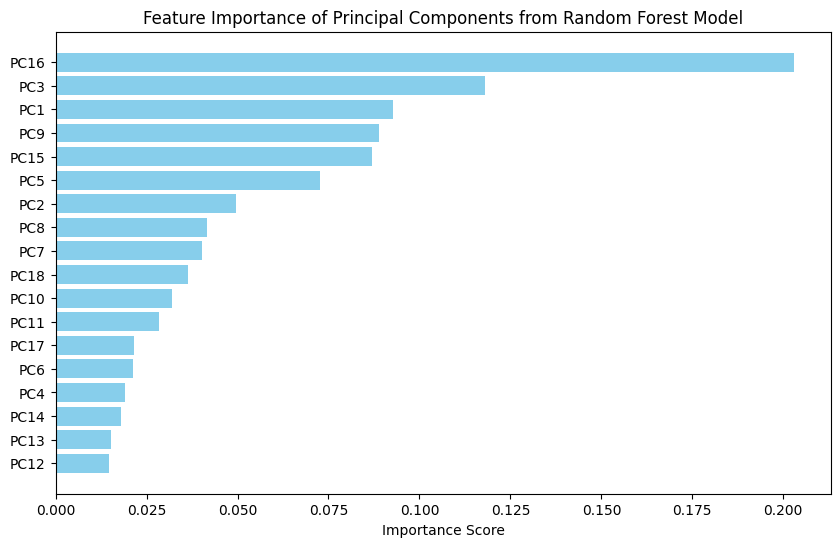

In [228]:
# Get feature importances from the model on the PCA-transformed components
importances = rf_model.feature_importances_
feature_names = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]

# Create a DataFrame for better visualization of feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance of Principal Components from Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


In [229]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_absolute_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 678.088739613014
Root Mean Squared Error (RMSE): 26.040137088982732
R-squared (R2): 0.13442581031335876


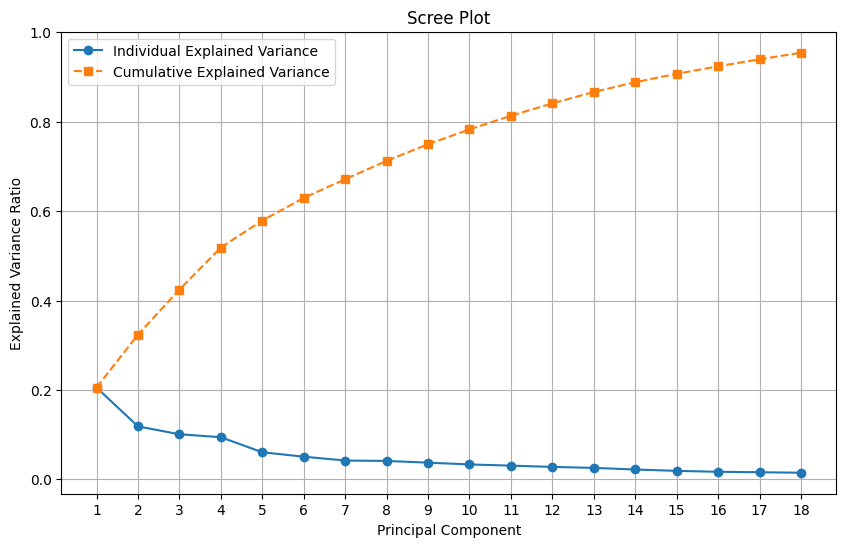

In [230]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', linestyle='--', label='Cumulative Explained Variance')

# Add labels, title, and legend
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.legend(loc='best')
plt.show()


### NN without Monetary_weekdays

In [ ]:
'''from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode 'Country' as a single numeric column
data['Country'] = label_encoder.fit_transform(data['Country'])

# Convert 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract Year, Month, Weekday, and Hour from 'InvoiceDate'
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Weekday'] = data['InvoiceDate'].dt.weekday  # Monday=0, Sunday=6
data['Hour'] = data['InvoiceDate'].dt.hour
data['Minute'] = data['InvoiceDate'].dt.minute'''



"from sklearn.preprocessing import LabelEncoder\n\n# Initialize label encoder\nlabel_encoder = LabelEncoder()\n\n# Encode 'Country' as a single numeric column\ndata['Country'] = label_encoder.fit_transform(data['Country'])\n\n# Convert 'InvoiceDate' to datetime format\ndata['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])\n\n# Extract Year, Month, Weekday, and Hour from 'InvoiceDate'\ndata['Year'] = data['InvoiceDate'].dt.year\ndata['Month'] = data['InvoiceDate'].dt.month\ndata['Weekday'] = data['InvoiceDate'].dt.weekday  # Monday=0, Sunday=6\ndata['Hour'] = data['InvoiceDate'].dt.hour\ndata['Minute'] = data['InvoiceDate'].dt.minute"

In [ ]:
# Drop 'InvoiceDate' if you no longer need it
#data.drop(columns=['InvoiceDate'], inplace=True)

In [231]:
data

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
793275  581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
793276  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
793277  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
793278  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
793279  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Price  Customer ID         Country  Revenue  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00  
...                    ...    ...          ...             ...      ...  
793275 2011-12-09 12:50:00   0.85      12680.0          France    10.20  
793276 2011-12-09 12:50:00   2.10      12680.0          France    12.60  
793277 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793278 2011-12-09 12:50:00   4.15      12680.0          France    16.60  
793279 2011-12-09 12:50:00   4.95      12680.0          France    14.85  

[793280 rows x 9 columns]

In [259]:
# Calculate the indices for the splits
n = len(data)
train_size = int(0.7 * n)  # First 70% for X_train
validation1_size = int(0.1 * n)  # Next 10% for validation1
validation2_size = int(0.1 * n)  # Following 10% for validation2
test_size = int(0.1 * n)  # Last 10% for test

# Split the data sequentially
train_data = data.iloc[:train_size]  # First 70%
validation_data1 = data.iloc[train_size:train_size + validation1_size]  # Next 10%
validation_data2 = data.iloc[train_size + validation1_size:train_size + validation1_size + validation2_size]  # Following 10%
test_data = data.iloc[train_size + validation1_size + validation2_size:]  # Remaining 10%

# Check the shapes of each split to verify
print("Train data shape:", train_data.shape)
print("Validation data 1 shape:", validation_data1.shape)
print("Validation data 2 shape:", validation_data2.shape)
print("Test data shape:", test_data.shape)

Train data shape: (555296, 9)
Validation data 1 shape: (79328, 9)
Validation data 2 shape: (79328, 9)
Test data shape: (79328, 9)


In [260]:
validation_data2

Invoice StockCode                   Description  Quantity  \
634624  566394     20728           LUNCH BAG CARS BLUE        10   
634625  566394     22383        LUNCH BAG SUKI DESIGN         10   
634626  566394     23203      JUMBO BAG VINTAGE DOILY         10   
634627  566394     23201            JUMBO BAG ALPHABET        10   
634628  566394     22147    FELTCRAFT BUTTERFLY HEARTS        12   
...        ...       ...                           ...       ...   
713947  573927     21257   VICTORIAN SEWING BOX MEDIUM         2   
713948  573927     21259   VICTORIAN SEWING BOX SMALL          2   
713949  573927     22795  SWEETHEART RECIPE BOOK STAND         2   
713950  573927     23536        WALL ART VILLAGE SHOW          4   
713951  573927     82583          HOT BATHS METAL SIGN        12   

               InvoiceDate  Price  Customer ID         Country  Revenue  
634624 2011-09-12 12:45:00   1.65      13650.0  United Kingdom     16.5  
634625 2011-09-12 12:45:00   1.65      13650.0  United Kingdom     16.5  
634626 2011-09-12 12:45:00   2.08      13650.0  United Kingdom     20.8  
634627 2011-09-12 12:45:00   2.08      13650.0  United Kingdom     20.8  
634628 2011-09-12 12:45:00   1.45      13650.0  United Kingdom     17.4  
...                    ...    ...          ...             ...      ...  
713947 2011-11-02 09:59:00   7.95      13890.0  United Kingdom     15.9  
713948 2011-11-02 09:59:00   5.95      13890.0  United Kingdom     11.9  
713949 2011-11-02 09:59:00   6.75      13890.0  United Kingdom     13.5  
713950 2011-11-02 09:59:00   5.95      13890.0  United Kingdom     23.8  
713951 2011-11-02 09:59:00   2.10      13890.0  United Kingdom     25.2  

[79328 rows x 9 columns]

In [261]:
# Calculate RFM features for train, validation, and test sets
rfm_train = calculate_rfm_features(train_data, all_customers)
rfm_validation1 = calculate_rfm_features(validation_data1, all_customers)
rfm_validation2 = calculate_rfm_features(validation_data2, all_customers)
rfm_test = calculate_rfm_features(test_data, all_customers)

In [262]:
# Columns to remove
# Columns to remove
columns_to_remove = ['Discount_Frequency', 'Discount_Monetary_Value','Discount_Ratio','Discount_Revenue_Ratio','Discount_Quantity_Value',
                    'Monetary_Weekends_Refunds','refund_total_price_sum',
                    'Quantity_Weekdays_Refunds','Quantity_Last_Two_Weeks_Refunds','refund_unitprice_min','Monetary_Last_Two_Weeks_Refunds',
                    'Refund_Unique_Items','Refund_Monetary_Max','Quantity_Weekends','Quantity_Weekdays','Refund_Monetary_Mean','Refund_Monetary_Min',
                    'Std_Days_Between_Orders','Quantity_Weekdays','Quantity_First_Two_Weeks','Quantity_Last_Two_Weeks','Unique_Items','UnitPrice_Var', 
                    'Monetary_First_Two_Weeks', 'Monetary_Last_Two_Weeks','Frequency_Last_Two_Weeks_Refunds','Monetary_First_Two_Weeks_Refunds',
                    'Frequency_First_Two_Weeks_Refunds', 'Repurchase_Absolute','Frequency_Weekdays_Refunds','Monetary_Weekdays_Refunds','Monetary_Min', 
                    'Avg_Frequency','Frequency_First_Two_Weeks','Frequency_Last_Two_Weeks','Frequency_Weekdays','Total_Price_Sum','Total_Quantity','Refund_to_Purchase_Ratio']
# Drop the specified columns if they exist in the rfm DataFrame
rfm_train = rfm_train.drop(columns=columns_to_remove)
rfm_validation1 = rfm_validation1.drop(columns=columns_to_remove)
rfm_validation2 = rfm_validation2.drop(columns=columns_to_remove)
rfm_test = rfm_test.drop(columns=columns_to_remove)

In [263]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_train[float_columns] = rfm_train[float_columns].round(2)

In [264]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_validation1[float_columns] = rfm_validation1[float_columns].round(2)

In [265]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_validation2[float_columns] = rfm_validation2[float_columns].round(2)

In [266]:
# List of columns to round to 2 decimal places
float_columns = [
    "Recency", "T", "Frequency", "Monetary_Mean", "Monetary_Max",
    "UnitPrice_Mean", "UnitPrice_Min", "UnitPrice_Max", "Unique_Countries",
    "Monetary_Weekdays", "Monetary_Weekends", "Mean_Days_Between_Orders",
    "Max_Days_Between_Orders", "Repurchase_Ratio", "Refund_Recency",
    "Refund_Monetary_Sum", "Refund_Unitprice_Mean", "refund_unitprice_max",
    "refund_unitprice_var"
]

# Round the specified columns to 2 decimal places
rfm_test[float_columns] = rfm_test[float_columns].round(2)

In [267]:
# Prepare X_train and y_train
X_train = rfm_train.drop(['Monetary_Sum', 'Customer ID','Monetary_Weekdays'], axis=1)  # Features from first 70% (rfm_train)
y_train = rfm_validation1['Monetary_Sum']  # Target from next 10% (rfm_validation)

In [268]:
X_val = rfm_validation1.drop(['Monetary_Sum', 'Customer ID','Monetary_Weekdays'], axis=1)  # Features from first 70% (rfm_train)
y_val = rfm_validation2['Monetary_Sum']  # Target from next 10% (rfm_validation)

In [269]:
# Prepare X_test and y_test
X_test = rfm_validation2.drop(['Monetary_Sum', 'Customer ID','Monetary_Weekdays'], axis=1)  # Features from next 20% (rfm_validation)
y_test = rfm_test['Monetary_Sum']  # Target from last 10% (rfm_test)

In [270]:
X_train

Recency      T  Frequency  Monetary_Mean  Monetary_Max  UnitPrice_Mean  \
0       118.0  562.0       75.0          30.60        100.80            3.36   
1         3.0  562.0      610.0          34.69        237.60            4.01   
2       272.0  562.0       40.0          15.33         35.80            3.61   
3         1.0  562.0      728.0         587.82       3884.00            3.69   
4         1.0  562.0      697.0          21.73        171.84            2.92   
...       ...    ...        ...            ...           ...             ...   
5522    562.0    0.0        0.0           0.00          0.00            0.00   
5523    562.0    0.0        0.0           0.00          0.00            0.00   
5524    562.0    0.0        0.0           0.00          0.00            0.00   
5525    562.0    0.0        0.0           0.00          0.00            0.00   
5526    562.0    0.0        0.0           0.00          0.00            0.00   

      UnitPrice_Min  UnitPrice_Max  Unique_Countries  Frequency_Weekends  ...  \
0              0.55           7.95               1.0                   0  ...   
1              0.19          12.75               1.0                  76  ...   
2              0.21           9.95               1.0                   0  ...   
3              0.27          52.78               1.0                  17  ...   
4              0.21          12.75               1.0                  40  ...   
...             ...            ...               ...                 ...  ...   
5522           0.00           0.00               0.0                   0  ...   
5523           0.00           0.00               0.0                   0  ...   
5524           0.00           0.00               0.0                   0  ...   
5525           0.00           0.00               0.0                   0  ...   
5526           0.00           0.00               0.0                   0  ...   

      Refund_Frequency  Quantity_First_Two_Weeks_Refunds  \
0                    7                                 0   
1                   42                               -31   
2                    0                                 0   
3                    4                                 0   
4                    3                                -9   
...                ...                               ...   
5522                 0                                 0   
5523                 0                                 0   
5524                 0                                 0   
5525                 0                                 0   
5526                 0                                 0   

      Frequency_Weekends_Refunds  Quantity_Weekends_Refunds  Refund_Recency  \
0                              0                          0            48.0   
1                              0                          0            22.0   
2                              0                          0           562.0   
3                              2                       -432           323.0   
4                              0                          0           371.0   
...                          ...                        ...             ...   
5522                           0                          0           562.0   
5523                           0                          0           562.0   
5524                           0                          0           562.0   
5525                           0                          0           562.0   
5526                           0                          0           562.0   

      Refund_Monetary_Sum  Refund_Unitprice_Mean  refund_unitprice_max  \
0                 -143.70                   1.83                  2.95   
1                 -576.01                   5.70                 12.75   
2                    0.00                   0.00                  0.00   
3                -2578.40                   3.79                  4.58   
4                  -88.10       

In [271]:
import tensorflow as tf

# Check if any GPU is detected
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [272]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set TensorFlow to use only the first GPU
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print(f"Using GPU: {gpus[0]}")
    except RuntimeError as e:
        print(e)

Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [273]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [274]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [275]:
# Build the FCNN model and train it on the GPU
with tf.device('/GPU:0'):  # Use GPU if available
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/mnt/c/Users/Shashwat/Documents/CapstoneCoding/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [276]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50


173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 6228832.0000 - mae: 449.5445 - val_loss: 4434561.0000 - val_mae: 306.1836
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2271672.7500 - mae: 337.0797 - val_loss: 4146460.7500 - val_mae: 301.8755
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1590091.1250 - mae: 332.3159 - val_loss: 4423823.5000 - val_mae: 305.9125
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ -0s -662us/step - loss: 1845445.2500 - mae: 349.5802 - val_loss: 4286932.5000 - val_mae: 303.6470
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2210924.5000 - mae: 344.6498 - val_loss: 4235411.0000 - val_mae: 297.9034
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1668854.2500 - mae: 340.1497 - val_loss: 4329867.0000 - val_mae: 304.8142
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1178163.1250 - mae: 298.9000 - val_loss: 4014824.0000 - val_mae: 297.5126
Epoch 8/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2182691.

In [277]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2965723.0000 - mae: 432.3462
Test MAE: 277.4040222167969


In [278]:
import matplotlib.pyplot as plt

# Plot training & validation loss and MAE over epochs
def plot_performance(history):
    # Loss plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # MAE plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Training and Validation MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()




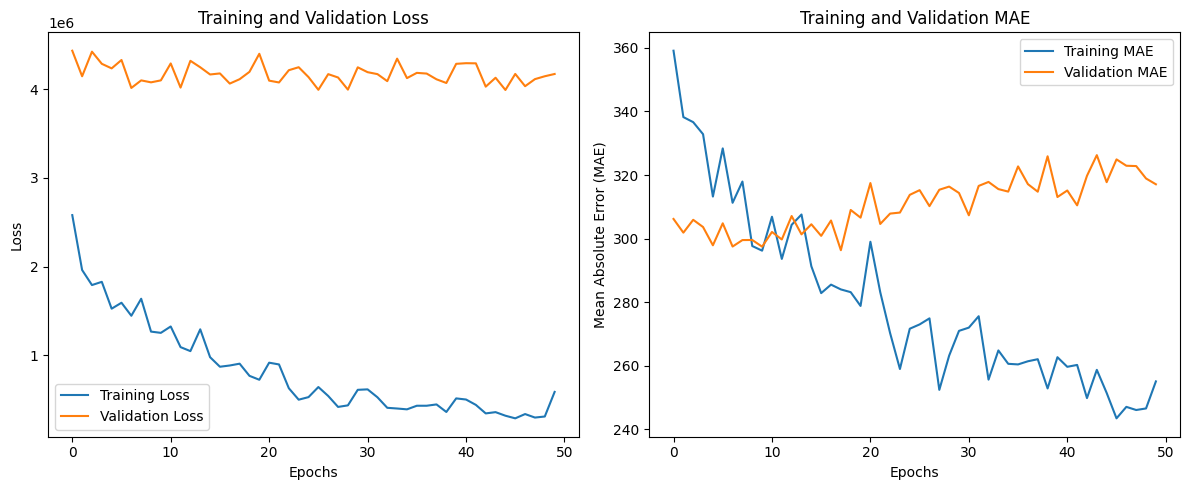

In [279]:
# Call the function with the training history
plot_performance(history)